# Analyzing the Financial Implications of Facility Carbon Emissions and Climate Variability on Parent Company Stocks
Author: Zijing Cheng (zc233)



## Problem statement


This project delves into the intricate relationship between regional climate conditions surrounding factories and the daily stock prices of their parent companies, with a focus on those enterprises for which manufacturing facilities play a critical role. Specifically, we examine factories that have disclosed significant annual carbon emissions, positing that local climate variables can serve as indicators of factory operational efficiency. We hypothesize that climate factors — such as temperature fluctuations, precipitation levels, and extreme weather events — could influence operational aspects like workforce commuting and logistical operations. Such climate-induced disruptions can, in turn, impact production efficiency, overall business performance, and ultimately, the parent company's stock price.

By integrating climate data with stock market performance, this study aims to provide a nuanced understanding of how environmental conditions affect corporate operations and financial outcomes. We plan to use advanced statistical and machine learning techniques to analyze patterns and correlations within the data, offering insights that could inform investors, policymakers, and corporate strategists. In this project, facility carbon emissions data will be the primary filter for selecting stocks to analyze, with the goal of examining the impact of local climate conditions on stock prices. Given that carbon emissions data is available on an annual basis, we will conduct an exploratory data analysis to investigate the potential influence of these emissions on stock market performance and conduct Machine Learning Method on the impact of local climate conditions on stock prices Separately. This approach not only highlights the financial implications of climate change for businesses but also underscores the importance of incorporating climate resilience into corporate planning and investment decisions.

Our methodology will involve collecting detailed climate data for the regions where the selected factories are located, alongside comprehensive stock price information for the corresponding parent companies. This will include examining historical climate trends, identifying significant weather events, and assessing their temporal alignment with fluctuations in stock prices. By establishing a clear link between climate variability and stock market performance, this project aims to contribute valuable insights to the growing field of climate finance, emphasizing the critical need for businesses to adapt to and mitigate the impacts of climate change on their operations.

## Data Source


**Sources of Data**:
Our study aims to thoroughly examine the impact of environmental factors on corporate financial performance, leveraging data from three principal sources:
1.   [Climate Data from Meteostat](https://github.com/meteostat/meteostat-python?tab=readme-ov-file)

*   We source our primary climate data from Meteostat, which provides a simple API for accessing comprehensive historical weather and climate data. The data is aggregated from various public sources, including national weather services such as the National Oceanic and Atmospheric Administration (NOAA) and Germany's national meteorological service (DWD). This dataset includes detailed observations that are essential for analyzing climate variables relevant to the geographic locations of the facilities under study. The integration with OpenCage Geocoder allows us to convert facility ZIP codes into precise geographical coordinates, ensuring the selection of appropriate nearby weather stations from Meteostat’s extensive database.
2.   [Carbon Emissions Data from GHGRP](https://www.epa.gov/ghgreporting/find-and-use-ghgrp-data)

*   Carbon emissions data are obtained from the Environmental Protection Agency’s Greenhouse Gas Reporting Program (GHGRP). This comprehensive dataset details emissions by type and process for significant emission facilities in the U.S., along with information about their highest-level parent companies. It allows us to link emissions data directly to corporate entities and analyze the environmental impact of specific facilities.

3.   [Financial Data from Yahoo Finance](https://developer.yahoo.com/api/)
*    Financial performance data, including daily stock prices, is sourced using the Yahoo Finance API. This dataset includes transactions from 2022 and covers 364 parent companies with 3,733 facilities listed in Carbon Emissions Data from GHGRP. All companies and associated Exchange-Traded Funds (ETFs) are U.S.-based and listed on the U.S. stock market. These stock prices are essential for evaluating the financial implications of environmental performance and changes.
4. [Risk-free Rate from U.S. Department of the Treasury](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_real_long_term&field_tdr_date_value=2022)
* In the CAPM model, we utilize Daily Treasury Real Long-Term Rates as the risk-free rate instead of a standard risk-free rate.


## Methodology


Our project methodology consists of three main phases: **Data Collection and Preprocessing**, **Exploratory Data Analysis (EDA)**, and **Modeling**. Initially, we collect and preprocess climate data from Meteostat, carbon emissions from the EPA’s GHGRP, and financial data from Yahoo Finance, ensuring all data are cleansed and aligned temporally for analysis. In the EDA phase, we use statistical summaries and visualizations to explore relationships and trends between environmental impacts and stock prices. Finally, in the modeling phase, we apply statistical and machine learning techniques, including regression and ensemble methods, to predict how environmental changes affect stock performance, providing actionable insights for stakeholders.



### Data Collection and Preprocessing

In [ ]:
# Import Library
import pandas as pd
# Load CSV file into a DataFrame
stock_codes = pd.read_csv("/content/StockCode.csv")
# Extract and Convert Column to List
stock_codes = stock_codes['STOCK CODE'].to_list()

In [ ]:
pip install yfinance pandas

In [ ]:
import yfinance as yf
import pandas as pd

# Define the start and end dates for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'

# Create an empty DataFrame to store the stock data
stock_data = pd.DataFrame()

# Loop through each stock code to fetch the data
for code in stock_codes:
    # Fetch the stock data from Yahoo Finance
    stock = yf.Ticker(code)
    data = stock.history(start=start_date, end=end_date)

    # Calculate daily returns
    data['Return'] = data['Close'].pct_change()

    # Get the industry and sector classification
    industry = stock.info.get('industry', 'N/A')
    sector = stock.info.get('sector', 'N/A')

    # Create a temporary DataFrame to organize and rename data properly
    temp_df = data[['Close', 'Return']].copy()
    temp_df.rename(columns={'Close': 'StockPrice'}, inplace=True)
    temp_df['Stock'] = code
    temp_df['Industry'] = industry
    temp_df['Sector'] = sector  # Adding sector information

    # Append to the main DataFrame
    stock_data = pd.concat([stock_data, temp_df])

# Reset index to make 'Date' a column
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'index': 'Date'}, inplace=True)

ERROR:yfinance:AGU: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)
ERROR:yfinance:ARNC: No timezone found, symbol may be delisted
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARNC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARNC&crumb=M2YY5ipqKpW
ERROR:yfinance:ARD: No timezone found, symbol may be delisted
ERROR:yfinance:ARD: No timezone found, symbol may be delisted
ERROR:yfinance:BRK.B: No timezone found, symbol may be delisted
ERROR:yfinance:BRK.B: No timezone found, symbol may be delisted
ERROR:yfinance:BF.B: No price data found, symbol may be delisted (1d 2022-01-01 -> 2022-12-31)
ERROR:yfinance:CMO: No timezone found, symbol may be delisted
ERROR:yfinance:CLR: No timezone found, symbol may be delisted
ERROR:yfinance:CTB: No timezone found, symbol may be delisted
ERROR:yfinance:CVA: No timezone 

I compiled a list of stock codes for parent companies listed in the United States using the Yahoo Finance API. During this process, I identified several companies that were delisted in 2022 or lacked trading records for that year. Consequently, these companies were excluded from the dataset to ensure the accuracy and relevance of our analysis.

In [ ]:
print(stock_data.head())

                       Date  StockPrice    Return Stock       Industry  \
0 2022-01-03 00:00:00-05:00  129.228638       NaN   MMM  Conglomerates   
1 2022-01-04 00:00:00-05:00  131.039047  0.014009   MMM  Conglomerates   
2 2022-01-05 00:00:00-05:00  130.501022 -0.004106   MMM  Conglomerates   
3 2022-01-06 00:00:00-05:00  129.417694 -0.008301   MMM  Conglomerates   
4 2022-01-07 00:00:00-05:00  130.835449  0.010955   MMM  Conglomerates   

        Sector  
0  Industrials  
1  Industrials  
2  Industrials  
3  Industrials  
4  Industrials  


In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
# Display the number of unique companies in the dataset
unique_companies = stock_data['Stock'].nunique()
print(f"Number of unique companies: {unique_companies}")

Number of unique companies: 364


In [ ]:
# Summary statistics for stock prices
stock_price_summary = stock_data['StockPrice'].describe()
print("Summary statistics for stock prices:")
print(stock_price_summary)

Summary statistics for stock prices:
count    9.626800e+04
mean     2.010413e+05
std      9.785452e+06
min     -7.324987e+07
25%      2.398919e+01
50%      4.714116e+01
75%      8.351963e+01
max      3.846411e+08
Name: StockPrice, dtype: float64


From the summary of the stock price data, it was observed that some entries recorded negative values for stock prices. However, stock prices should logically never fall below zero. This anomaly suggests a need for further investigation to identify and rectify the underlying issues.

In [ ]:
negative_prices = stock_data[stock_data['StockPrice'] < 0]

In [ ]:
negative_prices

,Date,StockPrice,Return,Stock,Industry,Sector
48839,2022-01-03,-4.538763e+01,NaN,IWTNF,Conglomerates,Industrials
48840,2022-01-04,-4.538763e+01,0.0,IWTNF,Conglomerates,Industrials
48841,2022-01-05,-4.538763e+01,0.0,IWTNF,Conglomerates,Industrials
48842,2022-01-06,-4.538763e+01,0.0,IWTNF,Conglomerates,Industrials
48843,2022-01-07,-4.538763e+01,0.0,IWTNF,Conglomerates,Industrials
...,...,...,...,...,...,...
75437,2022-12-20,-1.242691e+06,0.0,SSNLF,Consumer Electronics,Technology
75438,2022-12-21,-1.242691e+06,0.0,SSNLF,Consumer Electronics,Technology
75439,2022-12-22,-1.242691e+06,0.0,SSNLF,Consumer Electronics,Technology
75440,2022-12-23,-1.242691e+06,0.0,SSNLF,Consumer Electronics,Technology


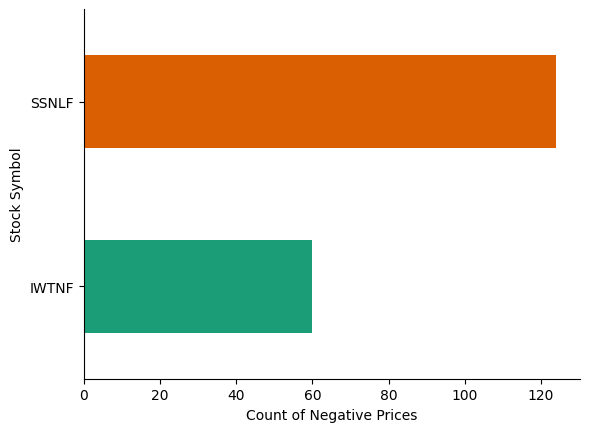

In [ ]:
# @title The Number of Trading Days with Negative Stock Price Stock
import seaborn as sns
import matplotlib.pyplot as plt
ax = negative_prices.groupby('Stock').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Set custom x and y axis titles
ax.set_xlabel('Count of Negative Prices')  # Set the title for the x-axis
ax.set_ylabel('Stock Symbol')  # Set the title for the y-axis

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

From the analysis depicted in the graph above, it appears that the occurrence of negative stock prices is linked to the suspension of IWTNF and SSNLF stocks. Given that a substantial number of trading days with negative prices could adversely affect our model's accuracy, we have opted to remove these two stocks from our dataset.

In [ ]:
stock_data = stock_data[~stock_data['Stock'].isin(['IWTNF', 'SSNLF'])]

In [ ]:
# Load CSV file into a DataFrame
emissions = pd.read_csv("/content/ghgp_data_facility_emissions.csv")
parent_company = pd.read_csv("/content/ghgp_data_parent_company_2022.csv")
facility_id = parent_company['GHGRP FACILITY ID'].tolist()
emissions = emissions[(emissions['Facility Id'].isin(facility_id))]

In [ ]:
# Group by 'Facility Id', and calculate the sum of 'Total reported direct emissions'
emissions_sum = emissions.groupby(['Facility Id'])['Total reported direct emissions'].sum().reset_index()

In [ ]:
print(emissions_sum.head())

   Facility Id  Total reported direct emissions
0    1000002.0                       115616.900
1    1000003.0                        79156.516
2    1000005.0                        76626.784
3    1000007.0                        16693.588
4    1000017.0                       121093.444


In [ ]:
# Merge the two DataFrames on 'Facility Id' and 'GHGRP FACILITY ID'
emissions_parent = parent_company.merge(emissions_sum, right_on='Facility Id', left_on='GHGRP FACILITY ID', how='inner')
# Drop the 'Facility Id' column
emissions_parent = emissions_parent.drop(columns=['Facility Id'])
emissions_parent.head()

,GHGRP FACILITY ID,FRS ID (FACILITY),REPORTING YEAR,FACILITY NAME,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,FACILITY COUNTY,LISTED,PARENT COMPANY NAME,PARENT CO. STREET ADDRESS,PARENT CO. CITY,PARENT CO. STATE,PARENT CO. ZIP,PARENT CO. PERCENT OWNERSHIP,FACILITY NAICS CODE,Total reported direct emissions
0,1003188,1.100006e+11,2022,3M BROWNWOOD,4501 HIGHWAY 377 SOUTH,BROWNWOOD,TX,76801,BROWN COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,326113.0,29520.0400
1,1003408,1.100712e+11,2022,3M INDUSTRIAL MINERAL PRODUCTS DIVISION,3110 WALTERS DRIVE,LITTLE ROCK,AR,72206,PULASKI COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,327999.0,32759.7760
2,1003739,1.100006e+11,2022,3M CO - GUIN,6675 US HIGHWAY 43,GUIN,AL,35563,MARION COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,326113.0,29837.6920
3,1004206,1.100004e+11,2022,3M COMPANY,1400 STATE DOCKS RD.,DECATUR,AL,35609,MORGAN COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,325211.0,38181.6856
4,1004804,1.100004e+11,2022,3M NEVADA PLANT,2120 E. AUSTIN,NEVADA,MO,64772,VERNON COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,326113.0,34976.2680


For assessing total reported direct emissions of parents company, we adopted a weighted approach predicated on the proportionate contributions of the parent company.

In [ ]:
stock_code_df = pd.read_csv("/content/StockCode.csv")
stock_code_df = stock_code_df.iloc[:, :-4]
stock_df = emissions_parent.merge(stock_code_df, on='PARENT COMPANY NAME', how='inner')
stock_df["Total reported direct emissions"] = stock_df["Total reported direct emissions"]*stock_df["PARENT CO. PERCENT OWNERSHIP"]/100
stock_df.head()

,GHGRP FACILITY ID,FRS ID (FACILITY),REPORTING YEAR,FACILITY NAME,FACILITY ADDRESS,FACILITY CITY,FACILITY STATE,FACILITY ZIP,FACILITY COUNTY,LISTED,PARENT COMPANY NAME,PARENT CO. STREET ADDRESS,PARENT CO. CITY,PARENT CO. STATE,PARENT CO. ZIP,PARENT CO. PERCENT OWNERSHIP,FACILITY NAICS CODE,Total reported direct emissions,STOCK CODE
0,1003188,1.100006e+11,2022,3M BROWNWOOD,4501 HIGHWAY 377 SOUTH,BROWNWOOD,TX,76801,BROWN COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,326113.0,29520.0400,MMM
1,1003408,1.100712e+11,2022,3M INDUSTRIAL MINERAL PRODUCTS DIVISION,3110 WALTERS DRIVE,LITTLE ROCK,AR,72206,PULASKI COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,327999.0,32759.7760,MMM
2,1003739,1.100006e+11,2022,3M CO - GUIN,6675 US HIGHWAY 43,GUIN,AL,35563,MARION COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,326113.0,29837.6920,MMM
3,1004206,1.100004e+11,2022,3M COMPANY,1400 STATE DOCKS RD.,DECATUR,AL,35609,MORGAN COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,325211.0,38181.6856,MMM
4,1004804,1.100004e+11,2022,3M NEVADA PLANT,2120 E. AUSTIN,NEVADA,MO,64772,VERNON COUNTY,1.0,3M CO,3M Center,St. Paul,MN,55144-1000,100.0,326113.0,34976.2680,MMM


In [ ]:
pip install opencage

In [ ]:
pip install meteostat

In [ ]:
opencage_api_key = '8a692a201acd47e996928254ea478066'

In [ ]:
from opencage.geocoder import OpenCageGeocode
from meteostat import Stations, Daily
from datetime import datetime

# Initialize OpenCage Geocode client
geocoder = OpenCageGeocode(opencage_api_key)

# List of ZIP codes
zip_codes = [str(zip_code) for zip_code in stock_df['FACILITY ZIP'].unique()]

# Convert ZIP codes to latitudes and longitudes
coordinates = {}
for zip_code in zip_codes:
    result = geocoder.geocode(zip_code, countrycode='us')
    if result:
        latitude = result[0]['geometry']['lat']
        longitude = result[0]['geometry']['lng']
        coordinates[zip_code] = (latitude, longitude)

# Retrieve the climate data for the year 2022 from Meteostat for each ZIP code
all_climate_data = pd.DataFrame()

for zip_code, (lat, lon) in coordinates.items():
    # Find the nearest weather station to the coordinates
    stations = Stations().nearby(lat, lon)
    station = stations.fetch(1)

    # If a station is found, retrieve the climate data for 2022
    if not station.empty:
        station_id = station.index[0]
        data = Daily(station_id, start=datetime(2022, 1, 1), end=datetime(2022, 12, 31))
        data = data.fetch()
        data.reset_index(inplace=True)
        # Rename the index column to 'Date'
        data.rename(columns={'time': 'Date'}, inplace=True)
        # Add the ZIP code as a column
        data['ZIP'] = zip_code
        # Append the data to the all_climate_data DataFrame
        all_climate_data = pd.concat([all_climate_data, data], ignore_index=True)


In [ ]:
# Display the combined climate data
print(all_climate_data)

             Date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0      2022-01-01  12.2  -3.0  24.0   1.7   NaN  274.0  19.5   NaN  1008.6   
1      2022-01-02  -2.0  -7.0   6.0   0.0   NaN  336.0  20.8   NaN  1029.3   
2      2022-01-03   1.6 -10.0  14.0   0.0   NaN  197.0  10.2   NaN  1028.7   
3      2022-01-04   8.0  -5.0  22.0   0.0   NaN  201.0  17.8   NaN  1017.4   
4      2022-01-05   6.3  -3.0  17.0   0.0   NaN    2.0  12.9   NaN  1013.5   
...           ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
755160 2022-12-27  -0.8  -6.0   7.0   0.0   NaN    3.0   1.1   NaN  1025.8   
755161 2022-12-28  -0.2  -7.0  11.0   0.0   NaN  345.0   4.2   NaN  1026.5   
755162 2022-12-29   3.5  -1.0  15.0   0.0   NaN  268.0   4.4   NaN  1026.6   
755163 2022-12-30   7.9  -1.0  18.0   0.0   NaN  220.0   7.9   NaN  1024.8   
755164 2022-12-31  10.6   6.0  13.0   8.0   NaN  229.0   7.5   NaN  1015.8   

        tsun    ZIP  
0        NaN  76801  
1        NaN  76801

In [ ]:
# Calculate summary statistics
summary_statistics = all_climate_data.describe()
# Count the number of missing values
missing_values = all_climate_data.isnull().sum()
print("Summary Statistics for Numerical Columns:")
print(summary_statistics)
print("\nMissing Values Count for Each Column:")
print(missing_values)
print("\nDataFrame Info:")
print(all_climate_data.info())

Summary Statistics for Numerical Columns:
                                Date           tavg           tmin  \
count                         755165  755056.000000  755164.000000   
mean   2022-07-06 03:43:59.300814592      14.619650       8.977184   
min              2022-01-01 00:00:00     -44.300000     -47.800000   
25%              2022-04-09 00:00:00       6.900000       1.000000   
50%              2022-07-08 00:00:00      16.300000      10.000000   
75%              2022-10-04 00:00:00      23.400000      18.000000   
max              2022-12-31 00:00:00      41.300000      35.600000   
std                              NaN      10.888608      10.975642   

                tmax           prcp           snow           wdir  \
count  755164.000000  754376.000000  122404.000000  754599.000000   
mean       20.533059       2.673383       6.578984     188.646424   
min       -42.800000       0.000000       0.000000       0.000000   
25%        12.900000       0.000000       0.000000 

Our dataset features columns with varying levels of missing data, necessitating different imputation strategies.

For precipitation (prcp) and snow (snow), we assumed that the absence of recorded data indicates no occurrence of these weather events on those days. Consequently, we filled all missing entries in these columns with zero, a standard practice in meteorological data handling that aligns with the interpretation that unrecorded precipitation typically implies a lack of rainfall or snowfall.

For other key variables like wind direction (wdir), wind speed (wspd), average temperature (tavg), minimum temperature (tmin), maximum temperature (tmax), and atmospheric pressure (pres), missing values were imputed using the mean values calculated within the same ZIP code groups. This approach leverages the assumption that weather conditions are relatively homogenous within the same geographical area, making the mean a reasonable estimate for missing entries.

Columns with extensive missing data that could not be reliably estimated, such as wind gusts (wpgt) and total sunshine duration (tsun), were removed from the dataset. The rationale for this decision stems from the substantial proportion of missing data which could introduce bias or inaccuracies into our analysis if imputed improperly.




In [ ]:
# Fill NaN values for 'prcp' and 'snow' with 0
all_climate_data['prcp'].fillna(0, inplace=True)
all_climate_data['snow'].fillna(0, inplace=True)
# Drop 'wpgt' and 'tsun' columns
all_climate_data.drop(columns=['wpgt', 'tsun'], inplace=True)
# Define the columns to fill NaN values with the mean per ZIP code
columns_to_fill = ['wdir', 'wspd', 'tavg', 'tmin', 'tmax', 'pres']
# Fill NaN values with the mean per ZIP code for specified columns
for column in columns_to_fill:
    all_climate_data[column] = all_climate_data.groupby('ZIP')[column].transform(lambda x: x.fillna(x.mean()))
all_climate_data[columns_to_fill] = all_climate_data[columns_to_fill].fillna(0)  # This step ensures that if any ZIP code group still has NaN (all were NaN), they are set to 0


In [ ]:
# Verify the dataset info
print(all_climate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755165 entries, 0 to 755164
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    755165 non-null  datetime64[ns]
 1   tavg    755165 non-null  float64       
 2   tmin    755165 non-null  float64       
 3   tmax    755165 non-null  float64       
 4   prcp    755165 non-null  float64       
 5   snow    755165 non-null  float64       
 6   wdir    755165 non-null  float64       
 7   wspd    755165 non-null  float64       
 8   pres    755165 non-null  float64       
 9   ZIP     755165 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 57.6+ MB
None


In [ ]:
stock_df1 = stock_df[['GHGRP FACILITY ID', 'FACILITY ZIP', 'PARENT COMPANY NAME', 'STOCK CODE']]
all_climate_data['ZIP'] = all_climate_data['ZIP'].astype(str)
stock_df1['FACILITY ZIP'] = stock_df1['FACILITY ZIP'].astype(str)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
all_df = all_climate_data.merge(stock_df1, left_on='ZIP', right_on='FACILITY ZIP', how='left')
all_df.head()

,Date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,ZIP,GHGRP FACILITY ID,FACILITY ZIP,PARENT COMPANY NAME,STOCK CODE
0,2022-01-01,12.2,-3.0,24.0,1.7,0.0,274.0,19.5,1008.6,76801,1003188,76801,3M CO,MMM
1,2022-01-02,-2.0,-7.0,6.0,0.0,0.0,336.0,20.8,1029.3,76801,1003188,76801,3M CO,MMM
2,2022-01-03,1.6,-10.0,14.0,0.0,0.0,197.0,10.2,1028.7,76801,1003188,76801,3M CO,MMM
3,2022-01-04,8.0,-5.0,22.0,0.0,0.0,201.0,17.8,1017.4,76801,1003188,76801,3M CO,MMM
4,2022-01-05,6.3,-3.0,17.0,0.0,0.0,2.0,12.9,1013.5,76801,1003188,76801,3M CO,MMM


In [ ]:
grouped_data = all_df.groupby(['STOCK CODE', 'Date']).agg({
    'tavg': 'mean',
    'tmin': 'mean',
    'tmax': 'mean',
    'prcp': 'mean',
    'snow': 'mean',
    'wdir': 'mean',
    'wspd': 'mean',
    'pres': 'mean',
    'GHGRP FACILITY ID': pd.Series.nunique  # This will count unique facility IDs
}).rename(columns={'GHGRP FACILITY ID': 'Facility Count'}).reset_index()
grouped_data.head()

,STOCK CODE,Date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Facility Count
0,AA,2022-01-01,3.800000,-3.133333,7.400000,19.900000,0.0,94.000000,10.300000,1012.066667,3
1,AA,2022-01-02,0.500000,-3.100000,3.700000,4.266667,0.0,268.333333,22.200000,1012.266667,3
2,AA,2022-01-03,-5.333333,-8.666667,-2.033333,1.533333,0.0,273.666667,11.566667,1018.733333,3
3,AA,2022-01-04,-2.233333,-10.133333,3.133333,1.566667,0.0,174.000000,15.400000,1019.533333,3
4,AA,2022-01-05,-0.300000,-5.500000,2.233333,0.833333,0.0,128.000000,17.333333,1014.233333,3


In [ ]:
stock_data.rename(columns={'Stock': 'STOCK CODE'}, inplace=True)

In [ ]:
grouped_data['Date'] = pd.to_datetime(grouped_data['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
merged_data = grouped_data.merge(stock_data, on=['STOCK CODE', 'Date'], how='left')
merged_data.head()

,STOCK CODE,Date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Facility Count,StockPrice,Return,Industry,Sector
0,AA,2022-01-01,3.800000,-3.133333,7.400000,19.900000,0.0,94.000000,10.300000,1012.066667,3,NaN,NaN,NaN,NaN
1,AA,2022-01-02,0.500000,-3.100000,3.700000,4.266667,0.0,268.333333,22.200000,1012.266667,3,NaN,NaN,NaN,NaN
2,AA,2022-01-03,-5.333333,-8.666667,-2.033333,1.533333,0.0,273.666667,11.566667,1018.733333,3,58.996880,NaN,Aluminum,Basic Materials
3,AA,2022-01-04,-2.233333,-10.133333,3.133333,1.566667,0.0,174.000000,15.400000,1019.533333,3,56.230789,-0.046885,Aluminum,Basic Materials
4,AA,2022-01-05,-0.300000,-5.500000,2.233333,0.833333,0.0,128.000000,17.333333,1014.233333,3,57.227745,0.017730,Aluminum,Basic Materials


In [ ]:
merged_data = merged_data.dropna()

### Exploratory Data Analysis (EDA)

#### Summary of Variables

##### Financial Variables

In [ ]:
# Display the number of unique companies in the dataset
unique_companies = merged_data['STOCK CODE'].nunique()
print(f"Number of unique companies: {unique_companies}")

Number of unique companies: 323


In [ ]:
# Summary statistics for stock prices
stock_price_summary = merged_data['StockPrice'].describe()
print("Summary statistics for stock prices:")
print(stock_price_summary)

Summary statistics for stock prices:
count    85292.000000
mean        92.381617
std        312.265408
min          0.468938
25%         26.067222
50%         49.919422
75%         85.285534
max       4500.000000
Name: StockPrice, dtype: float64


In [ ]:
# Calculate daily return statistics
return_summary = merged_data['Return'].describe()
print("Summary statistics for daily returns:")
print(return_summary)

Summary statistics for daily returns:
count    85292.000000
mean         0.000268
std          0.027729
min         -0.609846
25%         -0.012925
50%          0.000000
75%          0.013347
max          0.635652
Name: Return, dtype: float64


In [ ]:
# Sector distribution
# Drop duplicates to ensure each company is only counted once per sector
unique_companies = merged_data.drop_duplicates(subset=['STOCK CODE', 'Sector'])
# Count the number of unique companies per sector
sector_distribution = unique_companies['Sector'].value_counts()
# Print the sector distribution based on unique companies
print("Sector distribution based on unique companies:")
print(sector_distribution)

Sector distribution based on unique companies:
Sector
Basic Materials           78
Industrials               50
Energy                    50
Utilities                 49
Consumer Cyclical         26
Consumer Defensive        25
Healthcare                15
Technology                14
Financial Services        10
Real Estate                2
N/A                        2
Communication Services     2
Name: count, dtype: int64



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



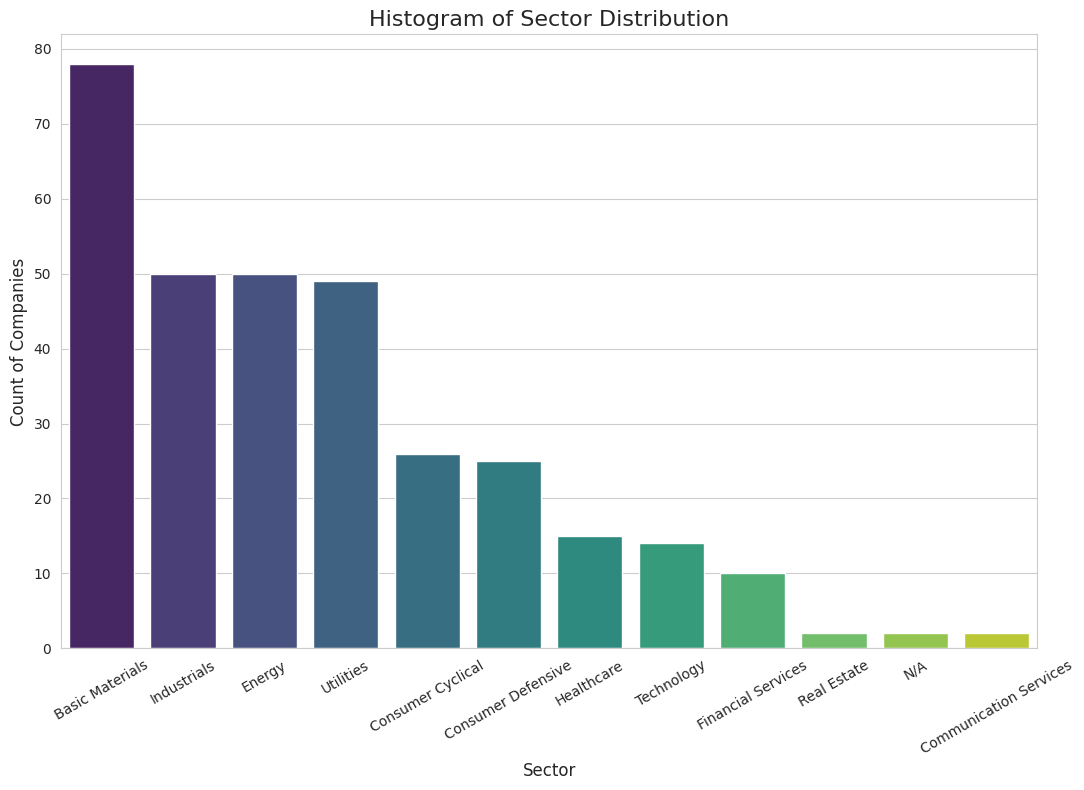

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plot
sns.set_style("whitegrid")

# Create a histogram of the sector distribution
plt.figure(figsize=(11, 8))
ax = sns.barplot(x=sector_distribution.index, y=sector_distribution.values, palette="viridis")

# Set the title and labels
ax.set_title('Histogram of Sector Distribution', fontsize=16)
ax.set_xlabel('Sector', fontsize=12)
ax.set_ylabel('Count of Companies', fontsize=12)

# Rotate x labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.tight_layout()
plt.show()


The histogram illustrates the sectorial distribution of companies that have disclosed their carbon emissions. It's evident from the graph that the Basic Materials sector has the highest number of companies disclosing emissions, which could imply stringent regulatory demands or a proactive stance on environmental transparency in sectors with typically higher emissions.

Following Basic Materials, the Energy and Industrials sectors also demonstrate a substantial number of disclosures. These sectors are known for their environmental impact, and as such, companies within these sectors may be more likely to disclose carbon emissions due to regulatory requirements or to showcase their efforts in managing and reducing their environmental footprint.

On the other end of the spectrum, sectors like Real Estate and Communication Services have relatively few companies making such disclosures. This could indicate that these sectors have less environmental impact or fewer regulatory pressures to report on such metrics, or it may suggest an area where increased transparency could be encouraged.

##### Climate Variables

In [ ]:
selected_columns = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']
stats_selected = merged_data[selected_columns].describe()
stats_selected

,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
count,85292.000000,85292.000000,85292.000000,85292.000000,85292.000000,85292.000000,85292.000000,85292.000000
mean,14.504677,8.861101,20.385440,2.699124,0.979075,187.596366,11.773777,1017.225294
std,10.100832,10.090534,10.593054,5.839578,9.511627,88.138269,5.367253,5.981144
min,-37.100000,-39.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,978.700000
25%,7.200000,1.480000,12.972569,0.000000,0.000000,128.907625,8.100000,1013.575000
50%,15.508712,9.522650,22.000000,0.400000,0.000000,191.000000,10.870417,1016.680000
75%,23.100000,17.325806,29.016667,2.920000,0.000000,251.000000,14.433333,1020.800000
max,39.600000,33.000000,46.500000,287.500000,660.000000,360.000000,51.900000,1047.190000


##### Emissions Variables

In [ ]:
sum_direct_emissions = stock_df.groupby('STOCK CODE')['Total reported direct emissions'].sum()
sum_direct_emissions = sum_direct_emissions.reset_index()
sum_direct_emissions.describe()

,Total reported direct emissions
count,3.490000e+02
mean,3.862974e+06
std,1.028431e+07
min,0.000000e+00
25%,7.256776e+04
50%,3.619476e+05
75%,1.990747e+06
max,7.785628e+07


### Correlation Between Daily Climate Variations and Stock Market Performance

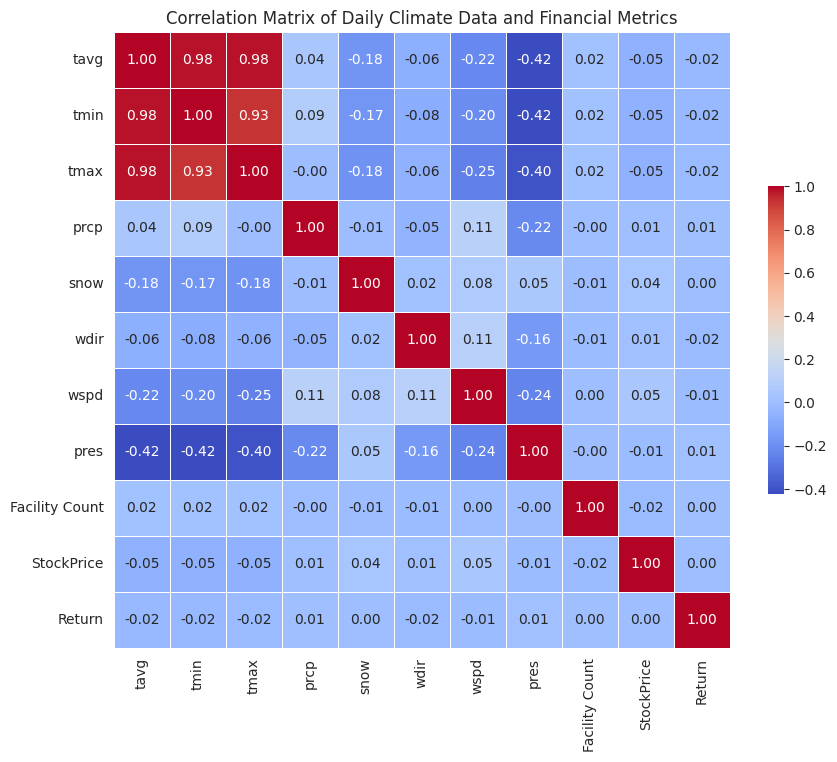

In [ ]:
import numpy as np
# Calculate the correlation matrix
corr = merged_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title('Correlation Matrix of Daily Climate Data and Financial Metrics')
# Show plot
plt.show()



The correlation matrix suggests that daily climate variables—temperature, precipitation, snow, wind speed, and pressure—have negligible correlations with the stock performance of the company in question. High positive correlations between temperature metrics are expected and normal. However, there is no strong evidence that short-term climate fluctuations significantly impact stock prices or returns on a day-to-day basis. The facility count, while slightly correlated with temperature, also does not show a notable connection to stock metrics, indicating that operational scale isn't immediately influenced by or influential to stock movements. Overall, the company's daily stock fluctuations seem to be largely independent of the climate conditions captured in this dataset.

### Correlation Between Annual Plant Emissions, Financial Returns, and Climate Data Averages

In [ ]:
# Calulate the annul return of parent company
merged_data_sorted = merged_data.sort_values(by=['STOCK CODE', 'Date'])
# Group by 'STOCK CODE' and 'Year', and then calculate the annual return
annual_returns = merged_data_sorted.groupby(['STOCK CODE', merged_data_sorted['Date'].dt.year]).apply(lambda x: (x['StockPrice'].iloc[-1] - x['StockPrice'].iloc[0]) / x['StockPrice'].iloc[0])
annual_returns = annual_returns.reset_index(name='Annual Return')
annual_returns = annual_returns[["STOCK CODE","Annual Return"]]
print(annual_returns.head())

  STOCK CODE  Annual Return
0         AA      -0.203778
1        AAL      -0.331230
2       ABBV       0.242279
3        ABT      -0.177784
4        ACA      -0.007259


In [ ]:
# Calulate the mean climate data of facility
selected_data = merged_data[['STOCK CODE', 'Date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'Facility Count']]
# Group by 'STOCK CODE'
grouped_data = selected_data.groupby('STOCK CODE')
# Calculate the mean for climate-related columns
mean_climate_data = grouped_data[['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']].mean()
# Calculate the max for 'Facility Count'
max_facility_count = grouped_data[['Facility Count']].max()
# Combine the results into a single DataFrame
avg_climate = mean_climate_data.join(max_facility_count)
# Reset the index if you want 'STOCK CODE' as a column
avg_climate = avg_climate.reset_index()
print(avg_climate.head())

  STOCK CODE       tavg       tmin       tmax      prcp      snow        wdir  \
0         AA  12.240967   7.128567  17.356000  3.195033  0.256667  178.366333   
1        AAL  16.806000  10.330400  23.160000  2.829200  1.600000  165.720000   
2       ABBV  10.271800   5.510200  15.159200  3.233000  0.000000  204.164000   
3        ABT  14.709200   8.818200  20.545100  2.529300  0.350000  196.070000   
4        ACA  16.434114  10.537714  22.654229  2.944857  1.702857  182.715429   

        wspd         pres  Facility Count  
0  10.930200  1017.880133               4  
1  15.382400  1016.298400               1  
2   9.709000  1017.649200               2  
3  10.526000  1016.513600               4  
4  10.827486  1017.440457               7  


In [ ]:
annual_data = pd.merge(annual_returns, avg_climate, on='STOCK CODE', how='inner')
annual_data = pd.merge(annual_data, sum_direct_emissions, on='STOCK CODE', how='inner')
# Calculate the mean emissions per facility
annual_data['Mean Emissions per Facility'] = annual_data['Total reported direct emissions'] / annual_data['Facility Count']
print(annual_data.head())

  STOCK CODE  Annual Return       tavg       tmin       tmax      prcp  \
0         AA      -0.203778  12.240967   7.128567  17.356000  3.195033   
1        AAL      -0.331230  16.806000  10.330400  23.160000  2.829200   
2       ABBV       0.242279  10.271800   5.510200  15.159200  3.233000   
3        ABT      -0.177784  14.709200   8.818200  20.545100  2.529300   
4        ACA      -0.007259  16.434114  10.537714  22.654229  2.944857   

       snow        wdir       wspd         pres  Facility Count  \
0  0.256667  178.366333  10.930200  1017.880133               4   
1  1.600000  165.720000  15.382400  1016.298400               1   
2  0.000000  204.164000   9.709000  1017.649200               2   
3  0.350000  196.070000  10.526000  1016.513600               4   
4  1.702857  182.715429  10.827486  1017.440457               7   

   Total reported direct emissions  Mean Emissions per Facility  
0                      6013951.454                 1.503488e+06  
1                   

In [ ]:
direct_emissions = annual_data[["STOCK CODE","Total reported direct emissions"]]
sum_direct_emissions = direct_emissions.groupby('STOCK CODE')['Total reported direct emissions'].sum()
sum_direct_emissions = sum_direct_emissions.reset_index()
sum_direct_emissions.describe()

,Total reported direct emissions
count,3.230000e+02
mean,3.948280e+06
std,1.021305e+07
min,0.000000e+00
25%,7.861989e+04
50%,3.865184e+05
75%,2.244705e+06
max,7.785628e+07


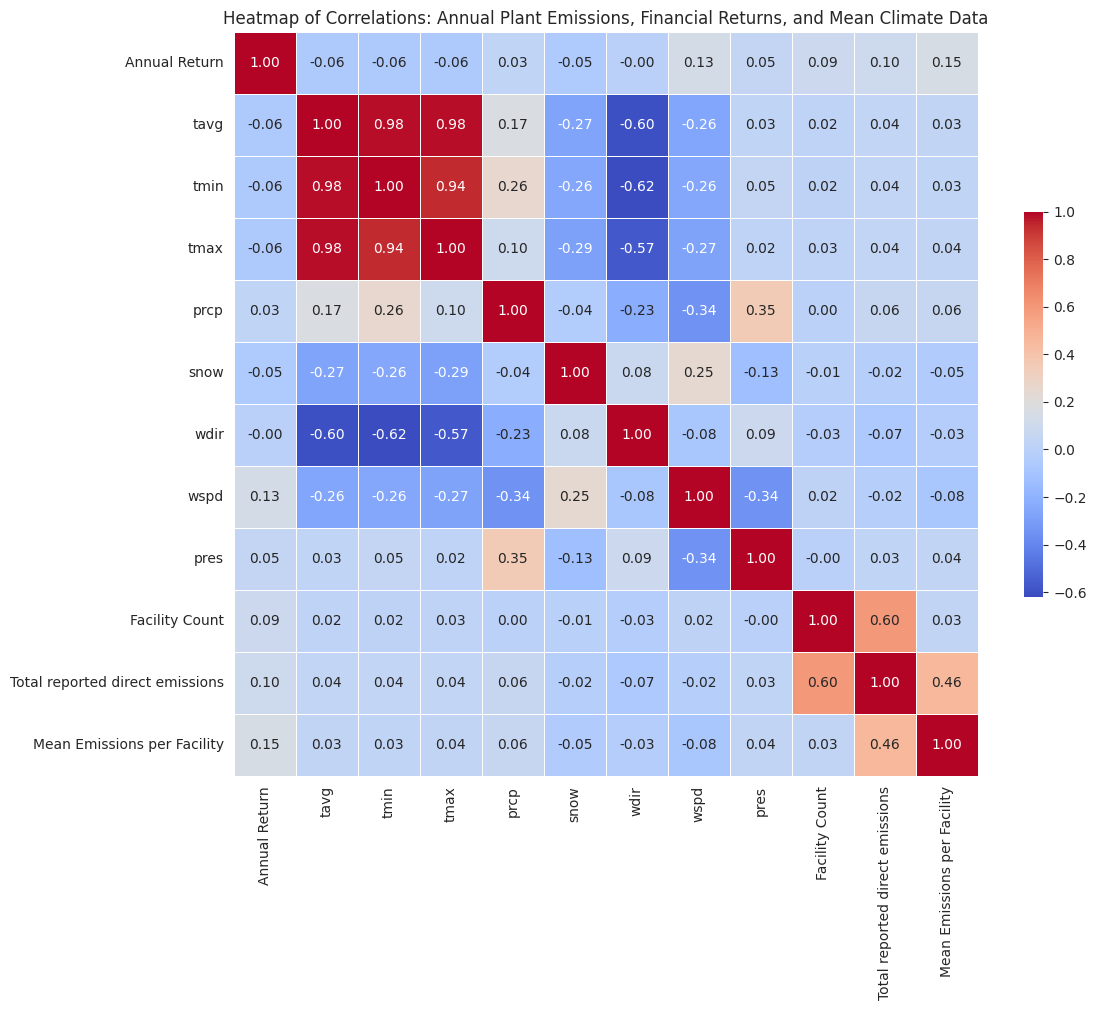

In [ ]:
#Calculate the correlation matrix
correlation_matrix_annual = annual_data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix_annual, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title('Heatmap of Correlations: Annual Plant Emissions, Financial Returns, and Mean Climate Data')
# Show plot
plt.show()


The heatmap indicates a nuanced relationship between emissions and financial returns. The slight positive correlation between emissions—both total and per facility—and annual returns suggests that emissions are not adversely affecting the company's profitability in the observed period. This relationship might reflect that larger, productive facilities, while contributing to higher emissions, also drive greater financial returns due to efficiency or output.

The direct correlation between facility count and total emissions is clear, yet it does not negatively correlate with financial returns, challenging the notion that environmental impact is synonymous with financial detriment in the short term. It points to the possibility that current financial success is not immediately compromised by higher emission levels, which could be influenced by the company's operational scale, market conditions, or regulatory factors.

Overall, the analysis implies that the company’s short-term financial returns are insulated from the environmental costs of emissions, suggesting an area for deeper strategic reflection on long-term sustainability and economic resilience.

For further analysis, variables exhibiting somewhat stronger correlations were selected to model and deepen the understanding of their relationship with annual stock returns.

### Relationship between Extreme Weather in Factory Areas and Parent Company Stock Returns

In our analysis, the definition of adverse weather conditions is critical. To this end, we've established specific thresholds that capture extreme climate events likely to impact operational efficacy. For temperature, we consider both frigid and sweltering conditions, with average temperatures below 0°C indicative of severe cold and above 30°C signaling excessive heat. Minimum temperatures under -10°C are flagged for extreme cold, while maximums over 35°C denote intense heatwaves. Precipitation exceeding 50 mm may lead to significant disruptions, reflecting heavy rainfall, whereas snow accumulation above 10 cm is typically associated with impeded transport and logistical challenges. Wind speeds surpassing 25 m/s are strong enough to be deemed hazardous, and atmospheric pressure below 980 hPa often precedes stormy weather. These thresholds allow us to create binary indicators that robustly delineate normal from potentially disruptive weather conditions for the company’s operations.

In [ ]:
thresholds = {
    'tavg_low': 0,  # Example: 0 degrees Celsius
    'tavg_high': 30,  # Example: 30 degrees Celsius
    'tmin_low': -10,  # Example: -10 degrees Celsius
    'tmax_high': 35,  # Example: 35 degrees Celsius
    'prcp_high': 50,  # Example: 50 mm
    'snow_high': 10,  # Example: 10 cm
    'wspd_high': 25,  # Example: 25 m/s
    'pres_low': 980,  # Example: 980 hPa
}
badweather = merged_data
# Create dummy variables based on the thresholds
badweather['bad_tavg'] = ((badweather['tavg'] <= thresholds['tavg_low']) | (badweather['tavg'] >= thresholds['tavg_high'])).astype(int)
badweather['bad_tmin'] = (badweather['tmin'] <= thresholds['tmin_low']).astype(int)
badweather['bad_tmax'] = (badweather['tmax'] >= thresholds['tmax_high']).astype(int)
badweather['bad_prcp'] = (badweather['prcp'] >= thresholds['prcp_high']).astype(int)
badweather['bad_snow'] = (badweather['snow'] >= thresholds['snow_high']).astype(int)
badweather['bad_wspd'] = (badweather['wspd'] >= thresholds['wspd_high']).astype(int)
badweather['bad_pres'] = (badweather['pres'] <= thresholds['pres_low']).astype(int)

In [ ]:
badweather1 = badweather[['StockPrice','Return','bad_tavg','bad_tmin','bad_tmax','bad_prcp','bad_snow','bad_wspd','bad_pres']]

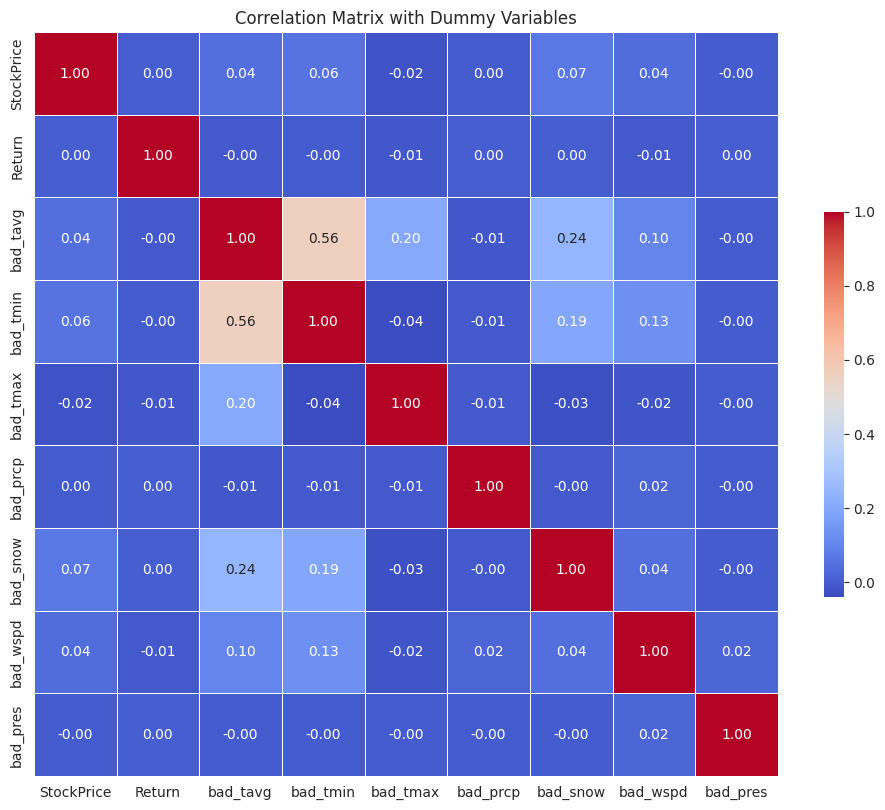

In [ ]:
# Calculate the correlation matrix including the dummy variables
correlation_matrix = badweather1.corr()
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title('Correlation Matrix with Dummy Variables')

# Show plot
plt.show()

The correlation matrix, incorporating dummy variables for adverse weather conditions, provides insights into the interplay between stock price, returns, and weather indicators. Notably, there is no discernible correlation between stock price, returns, and the defined bad weather conditions. This suggests that within the scope of this dataset, adverse weather events, as delineated by the thresholds set, do not exert a direct linear influence on the financial metrics. However, among the weather indicators themselves, correlations emerge. For instance, 'bad_tavg' and 'bad_tmin' exhibit a strong positive correlation, reflecting the expected relationship between extremely low average and minimum temperatures. Similarly, 'bad_tavg' correlates with 'bad_prcp', suggesting that days with adverse average temperatures tend to coincide with significant precipitation. However, these weather conditions, including heavy precipitation and snowfall, do not exhibit correlations with financial metrics.

Additionally, our analysis revealed that compared to using the raw weather data directly, incorporating dummy variables yielded weaker correlations with stock prices. As a result, in subsequent modeling endeavors, we will ignore these dummy variables to delve deeper into the intricate relationship between adverse weather conditions and stock performance.

## Model

The Capital Asset Pricing Model (CAPM) is a foundational tool in finance for estimating expected returns based on systematic risk and the market risk premium. Fama and French (1992) expanded CAPM to include size and value factors, and subsequent research extended it to incorporate momentum (Fama and French, 1993; Carhart, 1997).

E(R)=R_f
​
 +β×(E(R_m
​
 )−R_f
​
 )+ϵ


Where:

E(R): Expected Return on an asset.

R_f : Risk-Free Rate, the rate of return on a risk-free investment.

β: Beta, the measure of systematic risk or volatility of the asset relative to the market.

E(R_m): Expected Market Return, the expected return of the market portfolio.

ϵ: Residual Error, the difference between the actual return and the expected return not explained by the market risk and beta. It captures the idiosyncratic or unsystematic risk specific to the asset.

In this model, we incorporate climate data as an additional factor influencing the expected return
E(R) of an asset. The residual error (ϵ) now encompasses not only the unexplained variance in returns due to market risk (
β) and the difference between the expected market return E(R_m) and the risk-free rate (R_f), but also the impact of climate-related factors on asset performance. This residual error captures any remaining idiosyncratic or unexplained variability in returns after accounting for market risk and climate data.

To achieve our modeling objectives, we utilized two different types of predictive models: linear regression and Long Short-Term Memory (LSTM) networks.

Linear regression was selected due to its effectiveness in elucidating the relationships between the independent variables and the dependent stock return variable, allowing for easy interpretation of how each factor influences stock returns. This model provides a clear quantitative framework to assess the direct impact of standardized environmental factors alongside financial indicators.

Conversely, the LSTM model was chosen for its advanced capability to process sequential data and capture temporal patterns in stock prices, which is essential given the daily frequency of our data. The LSTM's ability to remember information over long periods is particularly beneficial for modeling the nuances of stock return volatility in relation to environmental changes, offering a dynamic view of the data's underlying structures.

To evaluate the accuracy and effectiveness of these models, we employed several metrics: Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) were used to measure the average magnitude of errors in predictions, providing insights into the typical prediction errors made by the models. Additionally, R-squared (R²) was calculated to quantify the proportion of variance in stock returns that our models could explain, thus assessing their explanatory power.

Further enriching our methodology, we incorporated CodeCarbon to estimate the carbon footprint of our computational processes. This tool allowed us to monitor and report the environmental impact of our modeling, aligning our research practices with sustainability goals. By integrating rigorous financial modeling with considerations of environmental impact, our approach not only seeks to enhance the predictive accuracy of stock return models but also contributes to more environmentally responsible research methodologies.

In [ ]:
rf = pd.read_csv("/content/daily-treasury-rates.csv")
rf['Date'] = pd.to_datetime(rf['Date'], format='%m/%d/%Y')
# Rename column and divide by 100
rf.rename(columns={'LT Real Average (10> Yrs)': 'Rf'}, inplace=True)
rf['Rf'] = rf['Rf'] / 100

In [ ]:
def get_daily_returns(ticker, start_date, end_date):
    # Fetch historical data for the ticker
    data = yf.download(ticker, start=start_date, end=end_date)

    # Check if data is empty
    if data.empty:
        return "No data available"

    # Calculate daily returns as percentage changes of the adjusted close prices
    data['Daily Return'] = data['Adj Close'].pct_change()
    return data['Daily Return'].dropna()  # Remove the first NaN value

# Ticker for S&P 500 ETF
ticker = 'SPY'
# Set the date range for the year 2022
start_date = '2022-01-01'
end_date = '2022-12-31'

# Get the daily returns
rm = get_daily_returns(ticker, start_date, end_date)
rm = pd.DataFrame(rm)
rm.reset_index(inplace=True)
rm.rename(columns={'Daily Return': 'Rm'}, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
rm['Date'] = pd.to_datetime(rm['Date'])
rf['Date'] = pd.to_datetime(rf['Date'])
# Merge merged_data and rm by 'Date' with a left join
returns = pd.merge(merged_data, rm, on='Date', how='left')
# Merge merged_data_rm and rf by 'Date' with a left join
returns = pd.merge(returns, rf, on='Date', how='left')

In [ ]:
returns.to_csv('returns.csv')

In [ ]:
import pandas as pd
returns = pd.read_csv("/content/returns.csv")

In [ ]:
pip install codecarbon

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from codecarbon import EmissionsTracker
import numpy as np


# Compute Rm-Rf
returns['Rm-Rf'] = returns['Rm'] - returns['Rf']

# Features and target
features = ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'Rm-Rf']
target = 'Return'

# Normalize features
scaler = StandardScaler()
returns[features] = scaler.fit_transform(returns[features])



We model the stock performance of each company, aiming to explore how climate data from various corporate and factory locations influences daily stock returns. Ultimately, we will concentrate on companies that demonstrate a strong predictive relationship between climate data and stock performance. This focused approach will hopefully yield valuable insights into the interplay between environmental factors and financial outcomes.

In [ ]:
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

def fit_and_evaluate(stock_code):
    # Filter data for the current stock
    stock = returns[returns['STOCK CODE'] == stock_code]
    X = stock[features]
    y = stock[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = {}

    # Linear Regression
    tracker = EmissionsTracker()
    tracker.start()

    model_reg = LinearRegression()
    model_reg.fit(X_train, y_train)
    y_pred_reg = model_reg.predict(X_test)

    mae_reg = mean_absolute_error(y_test, y_pred_reg)
    rmse_reg = mean_squared_error(y_test, y_pred_reg, squared=False)
    r2_reg = r2_score(y_test, y_pred_reg)

    results['Linear'] = (mae_reg, rmse_reg, r2_reg)
    emissions_reg = tracker.stop()

    # LSTM Model
    tracker.start()

    X_train_lstm = np.expand_dims(X_train, axis=2)  # Reshape for LSTM
    X_test_lstm = np.expand_dims(X_test, axis=2)

    model_lstm = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()

    mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
    rmse_lstm = mean_squared_error(y_test, y_pred_lstm, squared=False)
    r2_lstm = r2_score(y_test, y_pred_lstm)

    results['LSTM'] = (mae_lstm, rmse_lstm, r2_lstm)
    emissions_lstm = tracker.stop()

    return results, emissions_reg, emissions_lstm


In [ ]:
returns = returns.dropna()

In [ ]:
stock_codes = returns['STOCK CODE'].unique()
n = len(stock_codes)
batch_size = n // 3

# Create batches
batches = [stock_codes[i:i + batch_size] for i in range(0, n, batch_size)]
# Ensure all stock codes are covered, especially if n is not perfectly divisible by 3
if n % 3 != 0:
    batches[-2] = np.concatenate((batches[-2], batches[-1]))
    batches.pop()

In [ ]:
def process_batch(batch, results_dict, emissions_dict):
    for stock_code in batch:
        results_dict[stock_code], reg_em, lstm_em = fit_and_evaluate(stock_code)
        emissions_dict[stock_code] = {'Linear_Reg_Emissions': reg_em, 'LSTM_Emissions': lstm_em}
    return results_dict, emissions_dict

# Initialize dictionaries to store results and emissions
stocks_results = {}
stocks_emissions = {}

# Process each batch
#

stocks_results, stocks_emissions = process_batch(batches[0], stocks_results, stocks_emissions)
print("Completed processing Batch 1")

# Process Batch 2
stocks_results, stocks_emissions = process_batch(batches[1], stocks_results, stocks_emissions)
print("Completed processing Batch 2")

# Process Batch 3
stocks_results, stocks_emissions = process_batch(batches[2], stocks_results, stocks_emissions)
print("Completed processing Batch 3")



[codecarbon INFO @ 13:22:39] [setup] RAM Tracking...
[codecarbon INFO @ 13:22:39] [setup] GPU Tracking...
[codecarbon INFO @ 13:22:39] No GPU found.
[codecarbon INFO @ 13:22:39] [setup] CPU Tracking...
[codecarbon WARNING @ 13:22:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:22:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:22:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:22:41] >>> Tracker's metadata:
[codecarbon INFO @ 13:22:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:22:41]   Python version: 3.10.12
[codecarbon INFO @ 13:22:41]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 13:22:41]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:22:41]   CPU count: 2
[codecarbon INFO @ 13:22:41]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:22:41]   GPU count: None
[codec

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:22:57] Tracker already stopped !
[codecarbon INFO @ 13:22:57] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:22:57] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:22:57] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:22:57] [setup] RAM Tracking...
[codecarbon INFO @ 13:22:57] [setup] GPU Tracking...
[codecarbon INFO @ 13:22:57] No GPU found.
[codecarbon INFO @ 13:22:57] [setup] CPU Tracking...
[codecarbon WARNING @ 13:22:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:22:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:22:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:22:59] >>> Tracker's metadata:
[codecarbon INFO @ 13:22:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 2s 20ms/step


[codecarbon WARNING @ 13:23:26] Tracker already stopped !
[codecarbon INFO @ 13:23:26] Energy consumed for RAM : 0.000036 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:23:26] Energy consumed for all CPUs : 0.000321 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:23:26] 0.000357 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:23:26] [setup] RAM Tracking...
[codecarbon INFO @ 13:23:26] [setup] GPU Tracking...
[codecarbon INFO @ 13:23:26] No GPU found.
[codecarbon INFO @ 13:23:26] [setup] CPU Tracking...
[codecarbon WARNING @ 13:23:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:23:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:23:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:23:27] >>> Tracker's metadata:
[codecarbon INFO @ 13:23:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:23:44] Tracker already stopped !
[codecarbon INFO @ 13:23:44] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:23:44] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:23:44] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:23:44] [setup] RAM Tracking...
[codecarbon INFO @ 13:23:44] [setup] GPU Tracking...
[codecarbon INFO @ 13:23:44] No GPU found.
[codecarbon INFO @ 13:23:44] [setup] CPU Tracking...
[codecarbon WARNING @ 13:23:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:23:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:23:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:23:45] >>> Tracker's metadata:
[codecarbon INFO @ 13:23:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:24:15] Tracker already stopped !
[codecarbon INFO @ 13:24:15] Energy consumed for RAM : 0.000039 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:24:15] Energy consumed for all CPUs : 0.000353 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:24:15] 0.000393 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:24:15] [setup] RAM Tracking...
[codecarbon INFO @ 13:24:15] [setup] GPU Tracking...
[codecarbon INFO @ 13:24:15] No GPU found.
[codecarbon INFO @ 13:24:15] [setup] CPU Tracking...
[codecarbon WARNING @ 13:24:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:24:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:24:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:24:16] >>> Tracker's metadata:
[codecarbon INFO @ 13:24:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:24:32] Tracker already stopped !
[codecarbon INFO @ 13:24:32] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:24:32] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:24:32] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:24:32] [setup] RAM Tracking...
[codecarbon INFO @ 13:24:32] [setup] GPU Tracking...
[codecarbon INFO @ 13:24:32] No GPU found.
[codecarbon INFO @ 13:24:32] [setup] CPU Tracking...
[codecarbon WARNING @ 13:24:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:24:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:24:33] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:24:33] >>> Tracker's metadata:
[codecarbon INFO @ 13:24:33]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:24:51] Tracker already stopped !
[codecarbon INFO @ 13:24:51] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:24:51] Energy consumed for all CPUs : 0.000211 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:24:51] 0.000235 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:24:51] [setup] RAM Tracking...
[codecarbon INFO @ 13:24:51] [setup] GPU Tracking...
[codecarbon INFO @ 13:24:51] No GPU found.
[codecarbon INFO @ 13:24:51] [setup] CPU Tracking...
[codecarbon WARNING @ 13:24:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:24:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:24:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:24:53] >>> Tracker's metadata:
[codecarbon INFO @ 13:24:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:25:09] Tracker already stopped !
[codecarbon INFO @ 13:25:09] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:25:09] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:25:09] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:09] [setup] RAM Tracking...
[codecarbon INFO @ 13:25:09] [setup] GPU Tracking...
[codecarbon INFO @ 13:25:09] No GPU found.
[codecarbon INFO @ 13:25:09] [setup] CPU Tracking...
[codecarbon WARNING @ 13:25:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:25:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:25:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:25:10] >>> Tracker's metadata:
[codecarbon INFO @ 13:25:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:25:23] Tracker already stopped !
[codecarbon INFO @ 13:25:23] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:25:23] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:25:23] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:23] [setup] RAM Tracking...
[codecarbon INFO @ 13:25:23] [setup] GPU Tracking...
[codecarbon INFO @ 13:25:23] No GPU found.
[codecarbon INFO @ 13:25:23] [setup] CPU Tracking...
[codecarbon WARNING @ 13:25:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:25:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:25:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:25:24] >>> Tracker's metadata:
[codecarbon INFO @ 13:25:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:25:36] Tracker already stopped !
[codecarbon INFO @ 13:25:36] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:25:36] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:25:36] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:25:36] [setup] RAM Tracking...
[codecarbon INFO @ 13:25:36] [setup] GPU Tracking...
[codecarbon INFO @ 13:25:36] No GPU found.
[codecarbon INFO @ 13:25:37] [setup] CPU Tracking...
[codecarbon WARNING @ 13:25:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:25:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:25:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:25:38] >>> Tracker's metadata:
[codecarbon INFO @ 13:25:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:26:08] Tracker already stopped !
[codecarbon INFO @ 13:26:08] Energy consumed for RAM : 0.000040 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:26:08] Energy consumed for all CPUs : 0.000359 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:26:08] 0.000399 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:08] [setup] RAM Tracking...
[codecarbon INFO @ 13:26:08] [setup] GPU Tracking...
[codecarbon INFO @ 13:26:08] No GPU found.
[codecarbon INFO @ 13:26:08] [setup] CPU Tracking...
[codecarbon WARNING @ 13:26:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:26:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:26:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:26:10] >>> Tracker's metadata:
[codecarbon INFO @ 13:26:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 13:26:24] Tracker already stopped !
[codecarbon INFO @ 13:26:24] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:26:24] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:26:24] 0.000183 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:24] [setup] RAM Tracking...
[codecarbon INFO @ 13:26:24] [setup] GPU Tracking...
[codecarbon INFO @ 13:26:24] No GPU found.
[codecarbon INFO @ 13:26:24] [setup] CPU Tracking...
[codecarbon WARNING @ 13:26:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:26:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:26:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:26:25] >>> Tracker's metadata:
[codecarbon INFO @ 13:26:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:26:39] Tracker already stopped !
[codecarbon INFO @ 13:26:39] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:26:39] Energy consumed for all CPUs : 0.000163 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:26:39] 0.000181 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:39] [setup] RAM Tracking...
[codecarbon INFO @ 13:26:39] [setup] GPU Tracking...
[codecarbon INFO @ 13:26:39] No GPU found.
[codecarbon INFO @ 13:26:39] [setup] CPU Tracking...
[codecarbon WARNING @ 13:26:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:26:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:26:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:26:41] >>> Tracker's metadata:
[codecarbon INFO @ 13:26:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:26:55] Tracker already stopped !
[codecarbon INFO @ 13:26:55] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:26:55] Energy consumed for all CPUs : 0.000163 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:26:55] 0.000182 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:26:55] [setup] RAM Tracking...
[codecarbon INFO @ 13:26:55] [setup] GPU Tracking...
[codecarbon INFO @ 13:26:55] No GPU found.
[codecarbon INFO @ 13:26:55] [setup] CPU Tracking...
[codecarbon WARNING @ 13:26:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:26:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:26:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:26:56] >>> Tracker's metadata:
[codecarbon INFO @ 13:26:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:27:12] Tracker already stopped !
[codecarbon INFO @ 13:27:12] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:27:12] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:27:12] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:27:13] [setup] RAM Tracking...
[codecarbon INFO @ 13:27:13] [setup] GPU Tracking...
[codecarbon INFO @ 13:27:13] No GPU found.
[codecarbon INFO @ 13:27:13] [setup] CPU Tracking...
[codecarbon WARNING @ 13:27:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:27:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:27:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:27:14] >>> Tracker's metadata:
[codecarbon INFO @ 13:27:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:27:29] Tracker already stopped !
[codecarbon INFO @ 13:27:29] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:27:29] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:27:29] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:27:29] [setup] RAM Tracking...
[codecarbon INFO @ 13:27:29] [setup] GPU Tracking...
[codecarbon INFO @ 13:27:29] No GPU found.
[codecarbon INFO @ 13:27:29] [setup] CPU Tracking...
[codecarbon WARNING @ 13:27:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:27:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:27:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:27:31] >>> Tracker's metadata:
[codecarbon INFO @ 13:27:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:27:44] Tracker already stopped !
[codecarbon INFO @ 13:27:44] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:27:44] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:27:44] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:27:44] [setup] RAM Tracking...
[codecarbon INFO @ 13:27:44] [setup] GPU Tracking...
[codecarbon INFO @ 13:27:44] No GPU found.
[codecarbon INFO @ 13:27:44] [setup] CPU Tracking...
[codecarbon WARNING @ 13:27:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:27:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:27:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:27:45] >>> Tracker's metadata:
[codecarbon INFO @ 13:27:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:28:03] Tracker already stopped !
[codecarbon INFO @ 13:28:03] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:28:03] Energy consumed for all CPUs : 0.000207 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:28:03] 0.000230 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:03] [setup] RAM Tracking...
[codecarbon INFO @ 13:28:03] [setup] GPU Tracking...
[codecarbon INFO @ 13:28:03] No GPU found.
[codecarbon INFO @ 13:28:03] [setup] CPU Tracking...
[codecarbon WARNING @ 13:28:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:28:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:28:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:28:04] >>> Tracker's metadata:
[codecarbon INFO @ 13:28:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:28:17] Tracker already stopped !
[codecarbon INFO @ 13:28:17] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:28:17] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:28:17] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:17] [setup] RAM Tracking...
[codecarbon INFO @ 13:28:17] [setup] GPU Tracking...
[codecarbon INFO @ 13:28:17] No GPU found.
[codecarbon INFO @ 13:28:17] [setup] CPU Tracking...
[codecarbon WARNING @ 13:28:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:28:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:28:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:28:18] >>> Tracker's metadata:
[codecarbon INFO @ 13:28:18]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:28:30] Tracker already stopped !
[codecarbon INFO @ 13:28:30] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:28:30] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:28:30] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:30] [setup] RAM Tracking...
[codecarbon INFO @ 13:28:30] [setup] GPU Tracking...
[codecarbon INFO @ 13:28:30] No GPU found.
[codecarbon INFO @ 13:28:30] [setup] CPU Tracking...
[codecarbon WARNING @ 13:28:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:28:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:28:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:28:32] >>> Tracker's metadata:
[codecarbon INFO @ 13:28:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:28:44] Tracker already stopped !
[codecarbon INFO @ 13:28:44] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:28:44] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:28:44] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:28:44] [setup] RAM Tracking...
[codecarbon INFO @ 13:28:44] [setup] GPU Tracking...
[codecarbon INFO @ 13:28:44] No GPU found.
[codecarbon INFO @ 13:28:44] [setup] CPU Tracking...
[codecarbon WARNING @ 13:28:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:28:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:28:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:28:46] >>> Tracker's metadata:
[codecarbon INFO @ 13:28:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:29:00] Tracker already stopped !
[codecarbon INFO @ 13:29:00] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:29:00] Energy consumed for all CPUs : 0.000171 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:29:00] 0.000190 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:00] [setup] RAM Tracking...
[codecarbon INFO @ 13:29:00] [setup] GPU Tracking...
[codecarbon INFO @ 13:29:00] No GPU found.
[codecarbon INFO @ 13:29:00] [setup] CPU Tracking...
[codecarbon WARNING @ 13:29:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:29:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:29:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:29:02] >>> Tracker's metadata:
[codecarbon INFO @ 13:29:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:29:18] Tracker already stopped !
[codecarbon INFO @ 13:29:18] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:29:18] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:29:18] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:18] [setup] RAM Tracking...
[codecarbon INFO @ 13:29:18] [setup] GPU Tracking...
[codecarbon INFO @ 13:29:18] No GPU found.
[codecarbon INFO @ 13:29:18] [setup] CPU Tracking...
[codecarbon WARNING @ 13:29:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:29:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:29:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:29:19] >>> Tracker's metadata:
[codecarbon INFO @ 13:29:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 13:29:35] Tracker already stopped !
[codecarbon INFO @ 13:29:35] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:29:35] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:29:35] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:35] [setup] RAM Tracking...
[codecarbon INFO @ 13:29:35] [setup] GPU Tracking...
[codecarbon INFO @ 13:29:35] No GPU found.
[codecarbon INFO @ 13:29:35] [setup] CPU Tracking...
[codecarbon WARNING @ 13:29:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:29:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:29:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:29:36] >>> Tracker's metadata:
[codecarbon INFO @ 13:29:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:29:52] Tracker already stopped !
[codecarbon INFO @ 13:29:52] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:29:52] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:29:52] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:29:52] [setup] RAM Tracking...
[codecarbon INFO @ 13:29:52] [setup] GPU Tracking...
[codecarbon INFO @ 13:29:52] No GPU found.
[codecarbon INFO @ 13:29:52] [setup] CPU Tracking...
[codecarbon WARNING @ 13:29:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:29:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:29:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:29:53] >>> Tracker's metadata:
[codecarbon INFO @ 13:29:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:30:10] Tracker already stopped !
[codecarbon INFO @ 13:30:10] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:30:10] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:30:10] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:10] [setup] RAM Tracking...
[codecarbon INFO @ 13:30:10] [setup] GPU Tracking...
[codecarbon INFO @ 13:30:10] No GPU found.
[codecarbon INFO @ 13:30:10] [setup] CPU Tracking...
[codecarbon WARNING @ 13:30:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:30:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:30:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:30:11] >>> Tracker's metadata:
[codecarbon INFO @ 13:30:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:30:26] Tracker already stopped !
[codecarbon INFO @ 13:30:26] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:30:26] Energy consumed for all CPUs : 0.000176 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:30:26] 0.000195 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:26] [setup] RAM Tracking...
[codecarbon INFO @ 13:30:26] [setup] GPU Tracking...
[codecarbon INFO @ 13:30:26] No GPU found.
[codecarbon INFO @ 13:30:26] [setup] CPU Tracking...
[codecarbon WARNING @ 13:30:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:30:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:30:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:30:27] >>> Tracker's metadata:
[codecarbon INFO @ 13:30:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:30:43] Tracker already stopped !
[codecarbon INFO @ 13:30:43] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:30:43] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:30:43] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:43] [setup] RAM Tracking...
[codecarbon INFO @ 13:30:43] [setup] GPU Tracking...
[codecarbon INFO @ 13:30:43] No GPU found.
[codecarbon INFO @ 13:30:43] [setup] CPU Tracking...
[codecarbon WARNING @ 13:30:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:30:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:30:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:30:45] >>> Tracker's metadata:
[codecarbon INFO @ 13:30:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:30:57] Tracker already stopped !
[codecarbon INFO @ 13:30:57] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:30:57] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:30:57] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:30:57] [setup] RAM Tracking...
[codecarbon INFO @ 13:30:57] [setup] GPU Tracking...
[codecarbon INFO @ 13:30:57] No GPU found.
[codecarbon INFO @ 13:30:57] [setup] CPU Tracking...
[codecarbon WARNING @ 13:30:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:30:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:30:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:30:58] >>> Tracker's metadata:
[codecarbon INFO @ 13:30:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:31:11] Tracker already stopped !
[codecarbon INFO @ 13:31:11] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:31:11] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:31:11] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:31:11] [setup] RAM Tracking...
[codecarbon INFO @ 13:31:11] [setup] GPU Tracking...
[codecarbon INFO @ 13:31:11] No GPU found.
[codecarbon INFO @ 13:31:11] [setup] CPU Tracking...
[codecarbon WARNING @ 13:31:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:31:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:31:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:31:12] >>> Tracker's metadata:
[codecarbon INFO @ 13:31:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:31:24] Tracker already stopped !
[codecarbon INFO @ 13:31:24] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:31:24] Energy consumed for all CPUs : 0.000138 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:31:24] 0.000153 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:31:24] [setup] RAM Tracking...
[codecarbon INFO @ 13:31:24] [setup] GPU Tracking...
[codecarbon INFO @ 13:31:24] No GPU found.
[codecarbon INFO @ 13:31:24] [setup] CPU Tracking...
[codecarbon WARNING @ 13:31:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:31:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:31:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:31:25] >>> Tracker's metadata:
[codecarbon INFO @ 13:31:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:31:41] Tracker already stopped !
[codecarbon INFO @ 13:31:41] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:31:41] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:31:41] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:31:41] [setup] RAM Tracking...
[codecarbon INFO @ 13:31:41] [setup] GPU Tracking...
[codecarbon INFO @ 13:31:41] No GPU found.
[codecarbon INFO @ 13:31:41] [setup] CPU Tracking...
[codecarbon WARNING @ 13:31:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:31:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:31:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:31:42] >>> Tracker's metadata:
[codecarbon INFO @ 13:31:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:32:00] Tracker already stopped !
[codecarbon INFO @ 13:32:00] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:32:00] Energy consumed for all CPUs : 0.000213 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:32:00] 0.000237 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:00] [setup] RAM Tracking...
[codecarbon INFO @ 13:32:00] [setup] GPU Tracking...
[codecarbon INFO @ 13:32:00] No GPU found.
[codecarbon INFO @ 13:32:00] [setup] CPU Tracking...
[codecarbon WARNING @ 13:32:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:32:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:32:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:32:02] >>> Tracker's metadata:
[codecarbon INFO @ 13:32:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:32:18] Tracker already stopped !
[codecarbon INFO @ 13:32:18] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:32:18] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:32:18] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:18] [setup] RAM Tracking...
[codecarbon INFO @ 13:32:18] [setup] GPU Tracking...
[codecarbon INFO @ 13:32:18] No GPU found.
[codecarbon INFO @ 13:32:18] [setup] CPU Tracking...
[codecarbon WARNING @ 13:32:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:32:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:32:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:32:19] >>> Tracker's metadata:
[codecarbon INFO @ 13:32:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:32:31] Tracker already stopped !
[codecarbon INFO @ 13:32:31] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:32:31] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:32:31] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:31] [setup] RAM Tracking...
[codecarbon INFO @ 13:32:31] [setup] GPU Tracking...
[codecarbon INFO @ 13:32:31] No GPU found.
[codecarbon INFO @ 13:32:31] [setup] CPU Tracking...
[codecarbon WARNING @ 13:32:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:32:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:32:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:32:32] >>> Tracker's metadata:
[codecarbon INFO @ 13:32:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:32:45] Tracker already stopped !
[codecarbon INFO @ 13:32:45] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:32:45] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:32:45] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:32:45] [setup] RAM Tracking...
[codecarbon INFO @ 13:32:45] [setup] GPU Tracking...
[codecarbon INFO @ 13:32:45] No GPU found.
[codecarbon INFO @ 13:32:45] [setup] CPU Tracking...
[codecarbon WARNING @ 13:32:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:32:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:32:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:32:46] >>> Tracker's metadata:
[codecarbon INFO @ 13:32:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:33:02] Tracker already stopped !
[codecarbon INFO @ 13:33:02] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:33:02] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:33:02] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:02] [setup] RAM Tracking...
[codecarbon INFO @ 13:33:02] [setup] GPU Tracking...
[codecarbon INFO @ 13:33:02] No GPU found.
[codecarbon INFO @ 13:33:02] [setup] CPU Tracking...
[codecarbon WARNING @ 13:33:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:33:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:33:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:33:03] >>> Tracker's metadata:
[codecarbon INFO @ 13:33:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:33:15] Tracker already stopped !
[codecarbon INFO @ 13:33:15] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:33:15] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:33:15] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:15] [setup] RAM Tracking...
[codecarbon INFO @ 13:33:15] [setup] GPU Tracking...
[codecarbon INFO @ 13:33:15] No GPU found.
[codecarbon INFO @ 13:33:15] [setup] CPU Tracking...
[codecarbon WARNING @ 13:33:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:33:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:33:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:33:16] >>> Tracker's metadata:
[codecarbon INFO @ 13:33:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:33:32] Tracker already stopped !
[codecarbon INFO @ 13:33:32] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:33:32] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:33:32] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:32] [setup] RAM Tracking...
[codecarbon INFO @ 13:33:32] [setup] GPU Tracking...
[codecarbon INFO @ 13:33:32] No GPU found.
[codecarbon INFO @ 13:33:32] [setup] CPU Tracking...
[codecarbon WARNING @ 13:33:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:33:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:33:33] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:33:33] >>> Tracker's metadata:
[codecarbon INFO @ 13:33:33]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:33:47] Tracker already stopped !
[codecarbon INFO @ 13:33:47] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:33:47] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:33:47] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:33:47] [setup] RAM Tracking...
[codecarbon INFO @ 13:33:47] [setup] GPU Tracking...
[codecarbon INFO @ 13:33:47] No GPU found.
[codecarbon INFO @ 13:33:47] [setup] CPU Tracking...
[codecarbon WARNING @ 13:33:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:33:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:33:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:33:48] >>> Tracker's metadata:
[codecarbon INFO @ 13:33:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:34:04] Tracker already stopped !
[codecarbon INFO @ 13:34:04] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:34:04] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:34:04] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:34:04] [setup] RAM Tracking...
[codecarbon INFO @ 13:34:04] [setup] GPU Tracking...
[codecarbon INFO @ 13:34:04] No GPU found.
[codecarbon INFO @ 13:34:04] [setup] CPU Tracking...
[codecarbon WARNING @ 13:34:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:34:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:34:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:34:05] >>> Tracker's metadata:
[codecarbon INFO @ 13:34:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 13:34:22] Tracker already stopped !
[codecarbon INFO @ 13:34:22] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:34:22] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:34:22] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:34:22] [setup] RAM Tracking...
[codecarbon INFO @ 13:34:22] [setup] GPU Tracking...
[codecarbon INFO @ 13:34:22] No GPU found.
[codecarbon INFO @ 13:34:22] [setup] CPU Tracking...
[codecarbon WARNING @ 13:34:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:34:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:34:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:34:23] >>> Tracker's metadata:
[codecarbon INFO @ 13:34:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 6ms/step


[codecarbon WARNING @ 13:34:39] Tracker already stopped !
[codecarbon INFO @ 13:34:39] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:34:39] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:34:39] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:34:39] [setup] RAM Tracking...
[codecarbon INFO @ 13:34:39] [setup] GPU Tracking...
[codecarbon INFO @ 13:34:39] No GPU found.
[codecarbon INFO @ 13:34:39] [setup] CPU Tracking...
[codecarbon WARNING @ 13:34:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:34:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:34:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:34:40] >>> Tracker's metadata:
[codecarbon INFO @ 13:34:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:34:53] Tracker already stopped !
[codecarbon INFO @ 13:34:53] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:34:53] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:34:53] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:34:53] [setup] RAM Tracking...
[codecarbon INFO @ 13:34:53] [setup] GPU Tracking...
[codecarbon INFO @ 13:34:53] No GPU found.
[codecarbon INFO @ 13:34:53] [setup] CPU Tracking...
[codecarbon WARNING @ 13:34:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:34:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:34:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:34:54] >>> Tracker's metadata:
[codecarbon INFO @ 13:34:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 13:35:06] Tracker already stopped !
[codecarbon INFO @ 13:35:06] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:35:06] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:35:06] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:06] [setup] RAM Tracking...
[codecarbon INFO @ 13:35:06] [setup] GPU Tracking...
[codecarbon INFO @ 13:35:06] No GPU found.
[codecarbon INFO @ 13:35:06] [setup] CPU Tracking...
[codecarbon WARNING @ 13:35:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:35:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:35:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:35:08] >>> Tracker's metadata:
[codecarbon INFO @ 13:35:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 13:35:24] Tracker already stopped !
[codecarbon INFO @ 13:35:24] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:35:24] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:35:24] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:24] [setup] RAM Tracking...
[codecarbon INFO @ 13:35:24] [setup] GPU Tracking...
[codecarbon INFO @ 13:35:24] No GPU found.
[codecarbon INFO @ 13:35:24] [setup] CPU Tracking...
[codecarbon WARNING @ 13:35:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:35:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:35:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:35:26] >>> Tracker's metadata:
[codecarbon INFO @ 13:35:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:35:42] Tracker already stopped !
[codecarbon INFO @ 13:35:42] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:35:42] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:35:42] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:42] [setup] RAM Tracking...
[codecarbon INFO @ 13:35:42] [setup] GPU Tracking...
[codecarbon INFO @ 13:35:42] No GPU found.
[codecarbon INFO @ 13:35:42] [setup] CPU Tracking...
[codecarbon WARNING @ 13:35:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:35:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:35:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:35:43] >>> Tracker's metadata:
[codecarbon INFO @ 13:35:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:35:56] Tracker already stopped !
[codecarbon INFO @ 13:35:56] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:35:56] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:35:56] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:35:56] [setup] RAM Tracking...
[codecarbon INFO @ 13:35:56] [setup] GPU Tracking...
[codecarbon INFO @ 13:35:56] No GPU found.
[codecarbon INFO @ 13:35:56] [setup] CPU Tracking...
[codecarbon WARNING @ 13:35:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:35:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:35:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:35:57] >>> Tracker's metadata:
[codecarbon INFO @ 13:35:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:36:10] Tracker already stopped !
[codecarbon INFO @ 13:36:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:36:10] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:36:10] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:10] [setup] RAM Tracking...
[codecarbon INFO @ 13:36:10] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:10] No GPU found.
[codecarbon INFO @ 13:36:10] [setup] CPU Tracking...
[codecarbon WARNING @ 13:36:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:36:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:11] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:36:24] Tracker already stopped !
[codecarbon INFO @ 13:36:24] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:36:24] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:36:24] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:24] [setup] RAM Tracking...
[codecarbon INFO @ 13:36:24] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:24] No GPU found.
[codecarbon INFO @ 13:36:24] [setup] CPU Tracking...
[codecarbon WARNING @ 13:36:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:36:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:25] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:36:42] Tracker already stopped !
[codecarbon INFO @ 13:36:42] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:36:42] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:36:42] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:42] [setup] RAM Tracking...
[codecarbon INFO @ 13:36:42] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:42] No GPU found.
[codecarbon INFO @ 13:36:42] [setup] CPU Tracking...
[codecarbon WARNING @ 13:36:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:36:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:36:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:36:43] >>> Tracker's metadata:
[codecarbon INFO @ 13:36:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:36:59] Tracker already stopped !
[codecarbon INFO @ 13:36:59] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:36:59] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:36:59] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:36:59] [setup] RAM Tracking...
[codecarbon INFO @ 13:36:59] [setup] GPU Tracking...
[codecarbon INFO @ 13:36:59] No GPU found.
[codecarbon INFO @ 13:36:59] [setup] CPU Tracking...
[codecarbon WARNING @ 13:36:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:37:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:00] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:37:16] Tracker already stopped !
[codecarbon INFO @ 13:37:16] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:37:16] Energy consumed for all CPUs : 0.000179 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:16] 0.000199 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:37:16] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:16] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:16] No GPU found.
[codecarbon INFO @ 13:37:16] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:37:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:17] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:37:33] Tracker already stopped !
[codecarbon INFO @ 13:37:33] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:37:33] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:33] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:37:33] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:33] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:33] No GPU found.
[codecarbon INFO @ 13:37:33] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:37:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:35] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:37:53] Tracker already stopped !
[codecarbon INFO @ 13:37:53] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:37:53] Energy consumed for all CPUs : 0.000213 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:37:53] 0.000237 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:37:53] [setup] RAM Tracking...
[codecarbon INFO @ 13:37:53] [setup] GPU Tracking...
[codecarbon INFO @ 13:37:53] No GPU found.
[codecarbon INFO @ 13:37:53] [setup] CPU Tracking...
[codecarbon WARNING @ 13:37:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:37:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:37:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:37:54] >>> Tracker's metadata:
[codecarbon INFO @ 13:37:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:38:07] Tracker already stopped !
[codecarbon INFO @ 13:38:07] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:38:07] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:38:07] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:07] [setup] RAM Tracking...
[codecarbon INFO @ 13:38:07] [setup] GPU Tracking...
[codecarbon INFO @ 13:38:07] No GPU found.
[codecarbon INFO @ 13:38:07] [setup] CPU Tracking...
[codecarbon WARNING @ 13:38:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:38:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:38:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:38:08] >>> Tracker's metadata:
[codecarbon INFO @ 13:38:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:38:25] Tracker already stopped !
[codecarbon INFO @ 13:38:25] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:38:25] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:38:25] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:25] [setup] RAM Tracking...
[codecarbon INFO @ 13:38:25] [setup] GPU Tracking...
[codecarbon INFO @ 13:38:25] No GPU found.
[codecarbon INFO @ 13:38:25] [setup] CPU Tracking...
[codecarbon WARNING @ 13:38:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:38:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:38:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:38:26] >>> Tracker's metadata:
[codecarbon INFO @ 13:38:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:38:38] Tracker already stopped !
[codecarbon INFO @ 13:38:38] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:38:38] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:38:38] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:38] [setup] RAM Tracking...
[codecarbon INFO @ 13:38:38] [setup] GPU Tracking...
[codecarbon INFO @ 13:38:38] No GPU found.
[codecarbon INFO @ 13:38:38] [setup] CPU Tracking...
[codecarbon WARNING @ 13:38:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:38:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:38:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:38:39] >>> Tracker's metadata:
[codecarbon INFO @ 13:38:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:38:51] Tracker already stopped !
[codecarbon INFO @ 13:38:51] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:38:51] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:38:51] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:38:51] [setup] RAM Tracking...
[codecarbon INFO @ 13:38:52] [setup] GPU Tracking...
[codecarbon INFO @ 13:38:52] No GPU found.
[codecarbon INFO @ 13:38:52] [setup] CPU Tracking...
[codecarbon WARNING @ 13:38:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:38:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:38:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:38:53] >>> Tracker's metadata:
[codecarbon INFO @ 13:38:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:39:08] Tracker already stopped !
[codecarbon INFO @ 13:39:08] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:39:08] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:39:08] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:08] [setup] RAM Tracking...
[codecarbon INFO @ 13:39:08] [setup] GPU Tracking...
[codecarbon INFO @ 13:39:08] No GPU found.
[codecarbon INFO @ 13:39:08] [setup] CPU Tracking...
[codecarbon WARNING @ 13:39:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:39:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:39:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:39:09] >>> Tracker's metadata:
[codecarbon INFO @ 13:39:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:39:26] Tracker already stopped !
[codecarbon INFO @ 13:39:26] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:39:26] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:39:26] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:26] [setup] RAM Tracking...
[codecarbon INFO @ 13:39:26] [setup] GPU Tracking...
[codecarbon INFO @ 13:39:26] No GPU found.
[codecarbon INFO @ 13:39:26] [setup] CPU Tracking...
[codecarbon WARNING @ 13:39:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:39:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:39:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:39:27] >>> Tracker's metadata:
[codecarbon INFO @ 13:39:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:39:39] Tracker already stopped !
[codecarbon INFO @ 13:39:39] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:39:39] Energy consumed for all CPUs : 0.000136 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:39:39] 0.000151 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:39] [setup] RAM Tracking...
[codecarbon INFO @ 13:39:39] [setup] GPU Tracking...
[codecarbon INFO @ 13:39:39] No GPU found.
[codecarbon INFO @ 13:39:39] [setup] CPU Tracking...
[codecarbon WARNING @ 13:39:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:39:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:39:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:39:41] >>> Tracker's metadata:
[codecarbon INFO @ 13:39:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:39:56] Tracker already stopped !
[codecarbon INFO @ 13:39:56] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:39:56] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:39:56] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:39:56] [setup] RAM Tracking...
[codecarbon INFO @ 13:39:56] [setup] GPU Tracking...
[codecarbon INFO @ 13:39:56] No GPU found.
[codecarbon INFO @ 13:39:56] [setup] CPU Tracking...
[codecarbon WARNING @ 13:39:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:39:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:39:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:39:57] >>> Tracker's metadata:
[codecarbon INFO @ 13:39:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:40:23] Tracker already stopped !
[codecarbon INFO @ 13:40:23] Energy consumed for RAM : 0.000034 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:40:23] Energy consumed for all CPUs : 0.000303 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:40:23] 0.000337 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:23] [setup] RAM Tracking...
[codecarbon INFO @ 13:40:23] [setup] GPU Tracking...
[codecarbon INFO @ 13:40:23] No GPU found.
[codecarbon INFO @ 13:40:23] [setup] CPU Tracking...
[codecarbon WARNING @ 13:40:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:40:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:40:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:40:24] >>> Tracker's metadata:
[codecarbon INFO @ 13:40:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:40:38] Tracker already stopped !
[codecarbon INFO @ 13:40:38] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:40:38] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:40:38] 0.000173 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:38] [setup] RAM Tracking...
[codecarbon INFO @ 13:40:38] [setup] GPU Tracking...
[codecarbon INFO @ 13:40:38] No GPU found.
[codecarbon INFO @ 13:40:38] [setup] CPU Tracking...
[codecarbon WARNING @ 13:40:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:40:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:40:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:40:39] >>> Tracker's metadata:
[codecarbon INFO @ 13:40:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:40:55] Tracker already stopped !
[codecarbon INFO @ 13:40:55] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:40:55] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:40:55] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:40:55] [setup] RAM Tracking...
[codecarbon INFO @ 13:40:55] [setup] GPU Tracking...
[codecarbon INFO @ 13:40:55] No GPU found.
[codecarbon INFO @ 13:40:55] [setup] CPU Tracking...
[codecarbon WARNING @ 13:40:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:40:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:40:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:40:57] >>> Tracker's metadata:
[codecarbon INFO @ 13:40:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:41:10] Tracker already stopped !
[codecarbon INFO @ 13:41:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:41:10] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:41:10] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:10] [setup] RAM Tracking...
[codecarbon INFO @ 13:41:10] [setup] GPU Tracking...
[codecarbon INFO @ 13:41:10] No GPU found.
[codecarbon INFO @ 13:41:10] [setup] CPU Tracking...
[codecarbon WARNING @ 13:41:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:41:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:41:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:41:11] >>> Tracker's metadata:
[codecarbon INFO @ 13:41:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 13:41:24] Tracker already stopped !
[codecarbon INFO @ 13:41:24] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:41:24] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:41:24] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:24] [setup] RAM Tracking...
[codecarbon INFO @ 13:41:24] [setup] GPU Tracking...
[codecarbon INFO @ 13:41:24] No GPU found.
[codecarbon INFO @ 13:41:24] [setup] CPU Tracking...
[codecarbon WARNING @ 13:41:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:41:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:41:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:41:25] >>> Tracker's metadata:
[codecarbon INFO @ 13:41:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:41:40] Tracker already stopped !
[codecarbon INFO @ 13:41:40] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:41:40] Energy consumed for all CPUs : 0.000179 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:41:40] 0.000199 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:40] [setup] RAM Tracking...
[codecarbon INFO @ 13:41:40] [setup] GPU Tracking...
[codecarbon INFO @ 13:41:40] No GPU found.
[codecarbon INFO @ 13:41:40] [setup] CPU Tracking...
[codecarbon WARNING @ 13:41:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:41:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:41:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:41:41] >>> Tracker's metadata:
[codecarbon INFO @ 13:41:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:41:54] Tracker already stopped !
[codecarbon INFO @ 13:41:54] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:41:54] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:41:54] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:41:54] [setup] RAM Tracking...
[codecarbon INFO @ 13:41:54] [setup] GPU Tracking...
[codecarbon INFO @ 13:41:54] No GPU found.
[codecarbon INFO @ 13:41:54] [setup] CPU Tracking...
[codecarbon WARNING @ 13:41:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:41:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:41:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:41:55] >>> Tracker's metadata:
[codecarbon INFO @ 13:41:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:42:08] Tracker already stopped !
[codecarbon INFO @ 13:42:08] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:42:08] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:42:08] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:08] [setup] RAM Tracking...
[codecarbon INFO @ 13:42:08] [setup] GPU Tracking...
[codecarbon INFO @ 13:42:08] No GPU found.
[codecarbon INFO @ 13:42:08] [setup] CPU Tracking...
[codecarbon WARNING @ 13:42:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:42:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:42:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:42:09] >>> Tracker's metadata:
[codecarbon INFO @ 13:42:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:42:21] Tracker already stopped !
[codecarbon INFO @ 13:42:21] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:42:21] Energy consumed for all CPUs : 0.000138 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:42:21] 0.000154 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:21] [setup] RAM Tracking...
[codecarbon INFO @ 13:42:21] [setup] GPU Tracking...
[codecarbon INFO @ 13:42:21] No GPU found.
[codecarbon INFO @ 13:42:21] [setup] CPU Tracking...
[codecarbon WARNING @ 13:42:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:42:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:42:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:42:22] >>> Tracker's metadata:
[codecarbon INFO @ 13:42:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:42:35] Tracker already stopped !
[codecarbon INFO @ 13:42:35] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:42:35] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:42:35] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:35] [setup] RAM Tracking...
[codecarbon INFO @ 13:42:35] [setup] GPU Tracking...
[codecarbon INFO @ 13:42:35] No GPU found.
[codecarbon INFO @ 13:42:35] [setup] CPU Tracking...
[codecarbon WARNING @ 13:42:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:42:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:42:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:42:36] >>> Tracker's metadata:
[codecarbon INFO @ 13:42:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:42:52] Tracker already stopped !
[codecarbon INFO @ 13:42:52] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:42:52] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:42:52] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:42:52] [setup] RAM Tracking...
[codecarbon INFO @ 13:42:52] [setup] GPU Tracking...
[codecarbon INFO @ 13:42:52] No GPU found.
[codecarbon INFO @ 13:42:52] [setup] CPU Tracking...
[codecarbon WARNING @ 13:42:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:42:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:42:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:42:53] >>> Tracker's metadata:
[codecarbon INFO @ 13:42:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:43:10] Tracker already stopped !
[codecarbon INFO @ 13:43:10] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:43:10] Energy consumed for all CPUs : 0.000200 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:43:10] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:10] [setup] RAM Tracking...
[codecarbon INFO @ 13:43:10] [setup] GPU Tracking...
[codecarbon INFO @ 13:43:10] No GPU found.
[codecarbon INFO @ 13:43:10] [setup] CPU Tracking...
[codecarbon WARNING @ 13:43:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:43:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:43:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:43:11] >>> Tracker's metadata:
[codecarbon INFO @ 13:43:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 13:43:25] Tracker already stopped !
[codecarbon INFO @ 13:43:25] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:43:25] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:43:25] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:25] [setup] RAM Tracking...
[codecarbon INFO @ 13:43:25] [setup] GPU Tracking...
[codecarbon INFO @ 13:43:25] No GPU found.
[codecarbon INFO @ 13:43:25] [setup] CPU Tracking...
[codecarbon WARNING @ 13:43:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:43:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:43:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:43:26] >>> Tracker's metadata:
[codecarbon INFO @ 13:43:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 13:43:40] Tracker already stopped !
[codecarbon INFO @ 13:43:40] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:43:40] Energy consumed for all CPUs : 0.000159 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:43:40] 0.000176 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:40] [setup] RAM Tracking...
[codecarbon INFO @ 13:43:40] [setup] GPU Tracking...
[codecarbon INFO @ 13:43:40] No GPU found.
[codecarbon INFO @ 13:43:40] [setup] CPU Tracking...
[codecarbon WARNING @ 13:43:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:43:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:43:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:43:41] >>> Tracker's metadata:
[codecarbon INFO @ 13:43:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:43:57] Tracker already stopped !
[codecarbon INFO @ 13:43:57] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:43:57] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:43:57] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:43:57] [setup] RAM Tracking...
[codecarbon INFO @ 13:43:57] [setup] GPU Tracking...
[codecarbon INFO @ 13:43:57] No GPU found.
[codecarbon INFO @ 13:43:57] [setup] CPU Tracking...
[codecarbon WARNING @ 13:43:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:43:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:43:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:43:58] >>> Tracker's metadata:
[codecarbon INFO @ 13:43:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:44:11] Tracker already stopped !
[codecarbon INFO @ 13:44:11] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:44:11] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:44:11] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:11] [setup] RAM Tracking...
[codecarbon INFO @ 13:44:11] [setup] GPU Tracking...
[codecarbon INFO @ 13:44:11] No GPU found.
[codecarbon INFO @ 13:44:11] [setup] CPU Tracking...
[codecarbon WARNING @ 13:44:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:44:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:44:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:44:12] >>> Tracker's metadata:
[codecarbon INFO @ 13:44:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:44:28] Tracker already stopped !
[codecarbon INFO @ 13:44:28] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:44:28] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:44:28] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:28] [setup] RAM Tracking...
[codecarbon INFO @ 13:44:28] [setup] GPU Tracking...
[codecarbon INFO @ 13:44:28] No GPU found.
[codecarbon INFO @ 13:44:28] [setup] CPU Tracking...
[codecarbon WARNING @ 13:44:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:44:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:44:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:44:29] >>> Tracker's metadata:
[codecarbon INFO @ 13:44:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 13:44:41] Tracker already stopped !
[codecarbon INFO @ 13:44:41] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:44:41] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:44:41] 0.000155 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:41] [setup] RAM Tracking...
[codecarbon INFO @ 13:44:41] [setup] GPU Tracking...
[codecarbon INFO @ 13:44:41] No GPU found.
[codecarbon INFO @ 13:44:41] [setup] CPU Tracking...
[codecarbon WARNING @ 13:44:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:44:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:44:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:44:43] >>> Tracker's metadata:
[codecarbon INFO @ 13:44:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 13:44:55] Tracker already stopped !
[codecarbon INFO @ 13:44:55] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:44:55] Energy consumed for all CPUs : 0.000139 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:44:55] 0.000155 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:44:55] [setup] RAM Tracking...
[codecarbon INFO @ 13:44:55] [setup] GPU Tracking...
[codecarbon INFO @ 13:44:55] No GPU found.
[codecarbon INFO @ 13:44:55] [setup] CPU Tracking...
[codecarbon WARNING @ 13:44:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:44:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:44:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:44:56] >>> Tracker's metadata:
[codecarbon INFO @ 13:44:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 6ms/step


[codecarbon WARNING @ 13:45:23] Tracker already stopped !
[codecarbon INFO @ 13:45:23] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:45:23] Energy consumed for all CPUs : 0.000312 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:45:23] 0.000346 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:45:23] [setup] RAM Tracking...
[codecarbon INFO @ 13:45:23] [setup] GPU Tracking...
[codecarbon INFO @ 13:45:23] No GPU found.
[codecarbon INFO @ 13:45:23] [setup] CPU Tracking...
[codecarbon WARNING @ 13:45:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:45:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:45:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:45:24] >>> Tracker's metadata:
[codecarbon INFO @ 13:45:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:45:39] Tracker already stopped !
[codecarbon INFO @ 13:45:39] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:45:39] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:45:39] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:45:40] [setup] RAM Tracking...
[codecarbon INFO @ 13:45:40] [setup] GPU Tracking...
[codecarbon INFO @ 13:45:40] No GPU found.
[codecarbon INFO @ 13:45:40] [setup] CPU Tracking...
[codecarbon WARNING @ 13:45:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:45:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:45:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:45:41] >>> Tracker's metadata:
[codecarbon INFO @ 13:45:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:45:53] Tracker already stopped !
[codecarbon INFO @ 13:45:53] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:45:53] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:45:53] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:45:53] [setup] RAM Tracking...
[codecarbon INFO @ 13:45:53] [setup] GPU Tracking...
[codecarbon INFO @ 13:45:53] No GPU found.
[codecarbon INFO @ 13:45:53] [setup] CPU Tracking...
[codecarbon WARNING @ 13:45:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:45:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:45:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:45:54] >>> Tracker's metadata:
[codecarbon INFO @ 13:45:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:46:06] Tracker already stopped !
[codecarbon INFO @ 13:46:06] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:46:06] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:46:06] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:07] [setup] RAM Tracking...
[codecarbon INFO @ 13:46:07] [setup] GPU Tracking...
[codecarbon INFO @ 13:46:07] No GPU found.
[codecarbon INFO @ 13:46:07] [setup] CPU Tracking...
[codecarbon WARNING @ 13:46:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:46:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:46:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:46:08] >>> Tracker's metadata:
[codecarbon INFO @ 13:46:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:46:20] Tracker already stopped !
[codecarbon INFO @ 13:46:20] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:46:20] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:46:20] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:20] [setup] RAM Tracking...
[codecarbon INFO @ 13:46:20] [setup] GPU Tracking...
[codecarbon INFO @ 13:46:20] No GPU found.
[codecarbon INFO @ 13:46:20] [setup] CPU Tracking...
[codecarbon WARNING @ 13:46:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:46:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:46:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:46:21] >>> Tracker's metadata:
[codecarbon INFO @ 13:46:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:46:42] Tracker already stopped !
[codecarbon INFO @ 13:46:42] Energy consumed for RAM : 0.000027 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:46:42] Energy consumed for all CPUs : 0.000238 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:46:42] 0.000265 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:42] [setup] RAM Tracking...
[codecarbon INFO @ 13:46:42] [setup] GPU Tracking...
[codecarbon INFO @ 13:46:42] No GPU found.
[codecarbon INFO @ 13:46:42] [setup] CPU Tracking...
[codecarbon WARNING @ 13:46:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:46:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:46:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:46:43] >>> Tracker's metadata:
[codecarbon INFO @ 13:46:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 13:46:57] Tracker already stopped !
[codecarbon INFO @ 13:46:57] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:46:57] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:46:57] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:46:57] [setup] RAM Tracking...
[codecarbon INFO @ 13:46:57] [setup] GPU Tracking...
[codecarbon INFO @ 13:46:57] No GPU found.
[codecarbon INFO @ 13:46:57] [setup] CPU Tracking...
[codecarbon WARNING @ 13:46:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:46:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:46:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:46:58] >>> Tracker's metadata:
[codecarbon INFO @ 13:46:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:47:16] Tracker already stopped !
[codecarbon INFO @ 13:47:16] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:47:16] Energy consumed for all CPUs : 0.000213 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:47:16] 0.000236 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:47:17] [setup] RAM Tracking...
[codecarbon INFO @ 13:47:17] [setup] GPU Tracking...
[codecarbon INFO @ 13:47:17] No GPU found.
[codecarbon INFO @ 13:47:17] [setup] CPU Tracking...
[codecarbon WARNING @ 13:47:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:47:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:47:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:47:18] >>> Tracker's metadata:
[codecarbon INFO @ 13:47:18]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:47:33] Tracker already stopped !
[codecarbon INFO @ 13:47:33] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:47:33] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:47:33] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:47:33] [setup] RAM Tracking...
[codecarbon INFO @ 13:47:33] [setup] GPU Tracking...
[codecarbon INFO @ 13:47:33] No GPU found.
[codecarbon INFO @ 13:47:33] [setup] CPU Tracking...
[codecarbon WARNING @ 13:47:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:47:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:47:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:47:35] >>> Tracker's metadata:
[codecarbon INFO @ 13:47:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:47:50] Tracker already stopped !
[codecarbon INFO @ 13:47:50] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:47:50] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:47:50] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:47:50] [setup] RAM Tracking...
[codecarbon INFO @ 13:47:50] [setup] GPU Tracking...
[codecarbon INFO @ 13:47:50] No GPU found.
[codecarbon INFO @ 13:47:50] [setup] CPU Tracking...
[codecarbon WARNING @ 13:47:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:47:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:47:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:47:51] >>> Tracker's metadata:
[codecarbon INFO @ 13:47:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:48:08] Tracker already stopped !
[codecarbon INFO @ 13:48:08] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:48:08] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:48:08] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:08] [setup] RAM Tracking...
[codecarbon INFO @ 13:48:08] [setup] GPU Tracking...
[codecarbon INFO @ 13:48:08] No GPU found.
[codecarbon INFO @ 13:48:08] [setup] CPU Tracking...
[codecarbon WARNING @ 13:48:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:48:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:48:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:48:09] >>> Tracker's metadata:
[codecarbon INFO @ 13:48:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:48:25] Tracker already stopped !
[codecarbon INFO @ 13:48:25] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:48:25] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:48:25] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:25] [setup] RAM Tracking...
[codecarbon INFO @ 13:48:25] [setup] GPU Tracking...
[codecarbon INFO @ 13:48:25] No GPU found.
[codecarbon INFO @ 13:48:25] [setup] CPU Tracking...
[codecarbon WARNING @ 13:48:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:48:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:48:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:48:26] >>> Tracker's metadata:
[codecarbon INFO @ 13:48:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:48:42] Tracker already stopped !
[codecarbon INFO @ 13:48:42] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:48:42] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:48:42] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:42] [setup] RAM Tracking...
[codecarbon INFO @ 13:48:42] [setup] GPU Tracking...
[codecarbon INFO @ 13:48:42] No GPU found.
[codecarbon INFO @ 13:48:42] [setup] CPU Tracking...
[codecarbon WARNING @ 13:48:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:48:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:48:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:48:43] >>> Tracker's metadata:
[codecarbon INFO @ 13:48:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:48:56] Tracker already stopped !
[codecarbon INFO @ 13:48:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:48:56] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:48:56] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:48:56] [setup] RAM Tracking...
[codecarbon INFO @ 13:48:56] [setup] GPU Tracking...
[codecarbon INFO @ 13:48:56] No GPU found.
[codecarbon INFO @ 13:48:56] [setup] CPU Tracking...
[codecarbon WARNING @ 13:48:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:48:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:48:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:48:57] >>> Tracker's metadata:
[codecarbon INFO @ 13:48:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:49:09] Tracker already stopped !
[codecarbon INFO @ 13:49:09] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:49:09] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:49:09] 0.000156 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:09] [setup] RAM Tracking...
[codecarbon INFO @ 13:49:09] [setup] GPU Tracking...
[codecarbon INFO @ 13:49:09] No GPU found.
[codecarbon INFO @ 13:49:09] [setup] CPU Tracking...
[codecarbon WARNING @ 13:49:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:49:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:49:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:49:11] >>> Tracker's metadata:
[codecarbon INFO @ 13:49:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:49:23] Tracker already stopped !
[codecarbon INFO @ 13:49:23] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:49:23] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:49:23] 0.000156 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:23] [setup] RAM Tracking...
[codecarbon INFO @ 13:49:23] [setup] GPU Tracking...
[codecarbon INFO @ 13:49:23] No GPU found.
[codecarbon INFO @ 13:49:23] [setup] CPU Tracking...
[codecarbon WARNING @ 13:49:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:49:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:49:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:49:24] >>> Tracker's metadata:
[codecarbon INFO @ 13:49:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:49:36] Tracker already stopped !
[codecarbon INFO @ 13:49:36] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:49:36] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:49:36] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:37] [setup] RAM Tracking...
[codecarbon INFO @ 13:49:37] [setup] GPU Tracking...
[codecarbon INFO @ 13:49:37] No GPU found.
[codecarbon INFO @ 13:49:37] [setup] CPU Tracking...
[codecarbon WARNING @ 13:49:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:49:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:49:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:49:38] >>> Tracker's metadata:
[codecarbon INFO @ 13:49:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:49:50] Tracker already stopped !
[codecarbon INFO @ 13:49:50] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:49:50] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:49:50] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:49:50] [setup] RAM Tracking...
[codecarbon INFO @ 13:49:50] [setup] GPU Tracking...
[codecarbon INFO @ 13:49:50] No GPU found.
[codecarbon INFO @ 13:49:50] [setup] CPU Tracking...
[codecarbon WARNING @ 13:49:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:49:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:49:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:49:52] >>> Tracker's metadata:
[codecarbon INFO @ 13:49:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:50:07] Tracker already stopped !
[codecarbon INFO @ 13:50:07] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:50:07] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:50:07] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:50:07] [setup] RAM Tracking...
[codecarbon INFO @ 13:50:07] [setup] GPU Tracking...
[codecarbon INFO @ 13:50:07] No GPU found.
[codecarbon INFO @ 13:50:07] [setup] CPU Tracking...
[codecarbon WARNING @ 13:50:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:50:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:50:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:50:08] >>> Tracker's metadata:
[codecarbon INFO @ 13:50:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:50:30] Tracker already stopped !
[codecarbon INFO @ 13:50:30] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:50:30] Energy consumed for all CPUs : 0.000252 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:50:30] 0.000280 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:50:30] [setup] RAM Tracking...
[codecarbon INFO @ 13:50:30] [setup] GPU Tracking...
[codecarbon INFO @ 13:50:30] No GPU found.
[codecarbon INFO @ 13:50:30] [setup] CPU Tracking...
[codecarbon WARNING @ 13:50:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:50:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:50:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:50:31] >>> Tracker's metadata:
[codecarbon INFO @ 13:50:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:50:45] Tracker already stopped !
[codecarbon INFO @ 13:50:45] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:50:45] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:50:45] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:50:45] [setup] RAM Tracking...
[codecarbon INFO @ 13:50:45] [setup] GPU Tracking...
[codecarbon INFO @ 13:50:45] No GPU found.
[codecarbon INFO @ 13:50:45] [setup] CPU Tracking...
[codecarbon WARNING @ 13:50:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:50:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:50:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:50:46] >>> Tracker's metadata:
[codecarbon INFO @ 13:50:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 13:51:00] Tracker already stopped !
[codecarbon INFO @ 13:51:00] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:51:00] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:51:00] 0.000177 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:00] [setup] RAM Tracking...
[codecarbon INFO @ 13:51:00] [setup] GPU Tracking...
[codecarbon INFO @ 13:51:00] No GPU found.
[codecarbon INFO @ 13:51:00] [setup] CPU Tracking...
[codecarbon WARNING @ 13:51:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:51:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:51:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:51:01] >>> Tracker's metadata:
[codecarbon INFO @ 13:51:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:51:17] Tracker already stopped !
[codecarbon INFO @ 13:51:17] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:51:17] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:51:17] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:17] [setup] RAM Tracking...
[codecarbon INFO @ 13:51:17] [setup] GPU Tracking...
[codecarbon INFO @ 13:51:17] No GPU found.
[codecarbon INFO @ 13:51:17] [setup] CPU Tracking...
[codecarbon WARNING @ 13:51:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:51:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:51:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:51:19] >>> Tracker's metadata:
[codecarbon INFO @ 13:51:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 13:51:35] Tracker already stopped !
[codecarbon INFO @ 13:51:35] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:51:35] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:51:35] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:35] [setup] RAM Tracking...
[codecarbon INFO @ 13:51:35] [setup] GPU Tracking...
[codecarbon INFO @ 13:51:35] No GPU found.
[codecarbon INFO @ 13:51:35] [setup] CPU Tracking...
[codecarbon WARNING @ 13:51:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:51:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:51:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:51:36] >>> Tracker's metadata:
[codecarbon INFO @ 13:51:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:51:49] Tracker already stopped !
[codecarbon INFO @ 13:51:49] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:51:49] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:51:49] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:51:49] [setup] RAM Tracking...
[codecarbon INFO @ 13:51:49] [setup] GPU Tracking...
[codecarbon INFO @ 13:51:49] No GPU found.
[codecarbon INFO @ 13:51:49] [setup] CPU Tracking...
[codecarbon WARNING @ 13:51:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:51:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:51:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:51:50] >>> Tracker's metadata:
[codecarbon INFO @ 13:51:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:52:06] Tracker already stopped !
[codecarbon INFO @ 13:52:06] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:52:06] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:52:06] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:06] [setup] RAM Tracking...
[codecarbon INFO @ 13:52:06] [setup] GPU Tracking...
[codecarbon INFO @ 13:52:06] No GPU found.
[codecarbon INFO @ 13:52:06] [setup] CPU Tracking...
[codecarbon WARNING @ 13:52:06] No CPU tracking mode found. Falling back on CPU constant mode.


Completed processing Batch 1


[codecarbon WARNING @ 13:52:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:52:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:52:07] >>> Tracker's metadata:
[codecarbon INFO @ 13:52:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 13:52:07]   Python version: 3.10.12
[codecarbon INFO @ 13:52:07]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 13:52:07]   Available RAM : 12.675 GB
[codecarbon INFO @ 13:52:07]   CPU count: 2
[codecarbon INFO @ 13:52:07]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:52:07]   GPU count: None
[codecarbon INFO @ 13:52:07]   GPU model: None
[codecarbon INFO @ 13:52:08] Energy consumed for RAM : 0.000000 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:52:08] Energy consumed for all CPUs : 0.000000 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:52:08] 0.000000 kWh of electricity

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:52:20] Tracker already stopped !
[codecarbon INFO @ 13:52:20] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:52:20] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:52:20] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:21] [setup] RAM Tracking...
[codecarbon INFO @ 13:52:21] [setup] GPU Tracking...
[codecarbon INFO @ 13:52:21] No GPU found.
[codecarbon INFO @ 13:52:21] [setup] CPU Tracking...
[codecarbon WARNING @ 13:52:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:52:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:52:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:52:22] >>> Tracker's metadata:
[codecarbon INFO @ 13:52:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:52:38] Tracker already stopped !
[codecarbon INFO @ 13:52:38] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:52:38] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:52:38] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:38] [setup] RAM Tracking...
[codecarbon INFO @ 13:52:38] [setup] GPU Tracking...
[codecarbon INFO @ 13:52:38] No GPU found.
[codecarbon INFO @ 13:52:38] [setup] CPU Tracking...
[codecarbon WARNING @ 13:52:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:52:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:52:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:52:40] >>> Tracker's metadata:
[codecarbon INFO @ 13:52:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:52:52] Tracker already stopped !
[codecarbon INFO @ 13:52:52] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:52:52] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:52:52] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:52:52] [setup] RAM Tracking...
[codecarbon INFO @ 13:52:52] [setup] GPU Tracking...
[codecarbon INFO @ 13:52:52] No GPU found.
[codecarbon INFO @ 13:52:52] [setup] CPU Tracking...
[codecarbon WARNING @ 13:52:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:52:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:52:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:52:54] >>> Tracker's metadata:
[codecarbon INFO @ 13:52:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:53:09] Tracker already stopped !
[codecarbon INFO @ 13:53:09] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:53:09] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:53:09] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:09] [setup] RAM Tracking...
[codecarbon INFO @ 13:53:09] [setup] GPU Tracking...
[codecarbon INFO @ 13:53:09] No GPU found.
[codecarbon INFO @ 13:53:09] [setup] CPU Tracking...
[codecarbon WARNING @ 13:53:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:53:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:53:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:53:11] >>> Tracker's metadata:
[codecarbon INFO @ 13:53:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:53:23] Tracker already stopped !
[codecarbon INFO @ 13:53:23] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:53:23] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:53:23] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:23] [setup] RAM Tracking...
[codecarbon INFO @ 13:53:23] [setup] GPU Tracking...
[codecarbon INFO @ 13:53:23] No GPU found.
[codecarbon INFO @ 13:53:23] [setup] CPU Tracking...
[codecarbon WARNING @ 13:53:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:53:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:53:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:53:24] >>> Tracker's metadata:
[codecarbon INFO @ 13:53:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:53:37] Tracker already stopped !
[codecarbon INFO @ 13:53:37] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:53:37] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:53:37] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:37] [setup] RAM Tracking...
[codecarbon INFO @ 13:53:37] [setup] GPU Tracking...
[codecarbon INFO @ 13:53:37] No GPU found.
[codecarbon INFO @ 13:53:37] [setup] CPU Tracking...
[codecarbon WARNING @ 13:53:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:53:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:53:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:53:38] >>> Tracker's metadata:
[codecarbon INFO @ 13:53:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:53:54] Tracker already stopped !
[codecarbon INFO @ 13:53:54] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:53:54] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:53:54] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:53:54] [setup] RAM Tracking...
[codecarbon INFO @ 13:53:54] [setup] GPU Tracking...
[codecarbon INFO @ 13:53:54] No GPU found.
[codecarbon INFO @ 13:53:54] [setup] CPU Tracking...
[codecarbon WARNING @ 13:53:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:53:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:53:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:53:55] >>> Tracker's metadata:
[codecarbon INFO @ 13:53:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:54:08] Tracker already stopped !
[codecarbon INFO @ 13:54:08] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:54:08] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:54:08] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:54:08] [setup] RAM Tracking...
[codecarbon INFO @ 13:54:08] [setup] GPU Tracking...
[codecarbon INFO @ 13:54:08] No GPU found.
[codecarbon INFO @ 13:54:08] [setup] CPU Tracking...
[codecarbon WARNING @ 13:54:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:54:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:54:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:54:09] >>> Tracker's metadata:
[codecarbon INFO @ 13:54:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:54:24] Tracker already stopped !
[codecarbon INFO @ 13:54:24] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:54:24] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:54:24] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:54:25] [setup] RAM Tracking...
[codecarbon INFO @ 13:54:25] [setup] GPU Tracking...
[codecarbon INFO @ 13:54:25] No GPU found.
[codecarbon INFO @ 13:54:25] [setup] CPU Tracking...
[codecarbon WARNING @ 13:54:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:54:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:54:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:54:26] >>> Tracker's metadata:
[codecarbon INFO @ 13:54:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:54:48] Tracker already stopped !
[codecarbon INFO @ 13:54:48] Energy consumed for RAM : 0.000029 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:54:48] Energy consumed for all CPUs : 0.000260 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:54:48] 0.000289 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:54:48] [setup] RAM Tracking...
[codecarbon INFO @ 13:54:48] [setup] GPU Tracking...
[codecarbon INFO @ 13:54:48] No GPU found.
[codecarbon INFO @ 13:54:48] [setup] CPU Tracking...
[codecarbon WARNING @ 13:54:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:54:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:54:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:54:49] >>> Tracker's metadata:
[codecarbon INFO @ 13:54:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

1/1 [==============================] - 1s 850ms/step


[codecarbon WARNING @ 13:55:05] Tracker already stopped !
[codecarbon INFO @ 13:55:05] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:55:05] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:55:05] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:05] [setup] RAM Tracking...
[codecarbon INFO @ 13:55:05] [setup] GPU Tracking...
[codecarbon INFO @ 13:55:05] No GPU found.
[codecarbon INFO @ 13:55:05] [setup] CPU Tracking...
[codecarbon WARNING @ 13:55:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:55:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:55:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:55:07] >>> Tracker's metadata:
[codecarbon INFO @ 13:55:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 13:55:21] Tracker already stopped !
[codecarbon INFO @ 13:55:21] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:55:21] Energy consumed for all CPUs : 0.000169 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:55:21] 0.000188 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:21] [setup] RAM Tracking...
[codecarbon INFO @ 13:55:21] [setup] GPU Tracking...
[codecarbon INFO @ 13:55:21] No GPU found.
[codecarbon INFO @ 13:55:21] [setup] CPU Tracking...
[codecarbon WARNING @ 13:55:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:55:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:55:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:55:23] >>> Tracker's metadata:
[codecarbon INFO @ 13:55:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 13:55:36] Tracker already stopped !
[codecarbon INFO @ 13:55:36] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:55:36] Energy consumed for all CPUs : 0.000158 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:55:36] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:36] [setup] RAM Tracking...
[codecarbon INFO @ 13:55:36] [setup] GPU Tracking...
[codecarbon INFO @ 13:55:36] No GPU found.
[codecarbon INFO @ 13:55:36] [setup] CPU Tracking...
[codecarbon WARNING @ 13:55:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:55:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:55:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:55:37] >>> Tracker's metadata:
[codecarbon INFO @ 13:55:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 13:55:53] Tracker already stopped !
[codecarbon INFO @ 13:55:53] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:55:53] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:55:53] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:55:53] [setup] RAM Tracking...
[codecarbon INFO @ 13:55:53] [setup] GPU Tracking...
[codecarbon INFO @ 13:55:53] No GPU found.
[codecarbon INFO @ 13:55:53] [setup] CPU Tracking...
[codecarbon WARNING @ 13:55:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:55:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:55:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:55:54] >>> Tracker's metadata:
[codecarbon INFO @ 13:55:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:56:11] Tracker already stopped !
[codecarbon INFO @ 13:56:11] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:56:11] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:56:11] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:11] [setup] RAM Tracking...
[codecarbon INFO @ 13:56:11] [setup] GPU Tracking...
[codecarbon INFO @ 13:56:11] No GPU found.
[codecarbon INFO @ 13:56:11] [setup] CPU Tracking...
[codecarbon WARNING @ 13:56:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:56:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:56:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:56:12] >>> Tracker's metadata:
[codecarbon INFO @ 13:56:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 13:56:28] Tracker already stopped !
[codecarbon INFO @ 13:56:28] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:56:28] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:56:28] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:28] [setup] RAM Tracking...
[codecarbon INFO @ 13:56:28] [setup] GPU Tracking...
[codecarbon INFO @ 13:56:28] No GPU found.
[codecarbon INFO @ 13:56:28] [setup] CPU Tracking...
[codecarbon WARNING @ 13:56:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:56:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:56:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:56:29] >>> Tracker's metadata:
[codecarbon INFO @ 13:56:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:56:42] Tracker already stopped !
[codecarbon INFO @ 13:56:42] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:56:42] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:56:42] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:42] [setup] RAM Tracking...
[codecarbon INFO @ 13:56:42] [setup] GPU Tracking...
[codecarbon INFO @ 13:56:42] No GPU found.
[codecarbon INFO @ 13:56:42] [setup] CPU Tracking...
[codecarbon WARNING @ 13:56:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:56:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:56:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:56:43] >>> Tracker's metadata:
[codecarbon INFO @ 13:56:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:56:56] Tracker already stopped !
[codecarbon INFO @ 13:56:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:56:56] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:56:56] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:56:56] [setup] RAM Tracking...
[codecarbon INFO @ 13:56:56] [setup] GPU Tracking...
[codecarbon INFO @ 13:56:56] No GPU found.
[codecarbon INFO @ 13:56:56] [setup] CPU Tracking...
[codecarbon WARNING @ 13:56:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:56:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:56:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:56:57] >>> Tracker's metadata:
[codecarbon INFO @ 13:56:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

7/7 [==============================] - 1s 5ms/step


[codecarbon WARNING @ 13:57:23] Tracker already stopped !
[codecarbon INFO @ 13:57:23] Energy consumed for RAM : 0.000034 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:57:23] Energy consumed for all CPUs : 0.000305 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:57:23] 0.000339 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:23] [setup] RAM Tracking...
[codecarbon INFO @ 13:57:23] [setup] GPU Tracking...
[codecarbon INFO @ 13:57:23] No GPU found.
[codecarbon INFO @ 13:57:23] [setup] CPU Tracking...
[codecarbon WARNING @ 13:57:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:57:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:57:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:57:24] >>> Tracker's metadata:
[codecarbon INFO @ 13:57:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:57:37] Tracker already stopped !
[codecarbon INFO @ 13:57:37] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:57:37] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:57:37] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:37] [setup] RAM Tracking...
[codecarbon INFO @ 13:57:37] [setup] GPU Tracking...
[codecarbon INFO @ 13:57:37] No GPU found.
[codecarbon INFO @ 13:57:37] [setup] CPU Tracking...
[codecarbon WARNING @ 13:57:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:57:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:57:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:57:38] >>> Tracker's metadata:
[codecarbon INFO @ 13:57:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 13:57:50] Tracker already stopped !
[codecarbon INFO @ 13:57:50] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:57:50] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:57:50] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:57:50] [setup] RAM Tracking...
[codecarbon INFO @ 13:57:50] [setup] GPU Tracking...
[codecarbon INFO @ 13:57:50] No GPU found.
[codecarbon INFO @ 13:57:50] [setup] CPU Tracking...
[codecarbon WARNING @ 13:57:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:57:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:57:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:57:52] >>> Tracker's metadata:
[codecarbon INFO @ 13:57:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 13:58:04] Tracker already stopped !
[codecarbon INFO @ 13:58:04] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:58:04] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:58:04] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:04] [setup] RAM Tracking...
[codecarbon INFO @ 13:58:04] [setup] GPU Tracking...
[codecarbon INFO @ 13:58:04] No GPU found.
[codecarbon INFO @ 13:58:04] [setup] CPU Tracking...
[codecarbon WARNING @ 13:58:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:58:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:58:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:58:05] >>> Tracker's metadata:
[codecarbon INFO @ 13:58:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:58:22] Tracker already stopped !
[codecarbon INFO @ 13:58:22] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:58:22] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:58:22] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:22] [setup] RAM Tracking...
[codecarbon INFO @ 13:58:22] [setup] GPU Tracking...
[codecarbon INFO @ 13:58:22] No GPU found.
[codecarbon INFO @ 13:58:22] [setup] CPU Tracking...
[codecarbon WARNING @ 13:58:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:58:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:58:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:58:23] >>> Tracker's metadata:
[codecarbon INFO @ 13:58:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:58:36] Tracker already stopped !
[codecarbon INFO @ 13:58:36] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:58:36] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:58:36] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:36] [setup] RAM Tracking...
[codecarbon INFO @ 13:58:36] [setup] GPU Tracking...
[codecarbon INFO @ 13:58:36] No GPU found.
[codecarbon INFO @ 13:58:36] [setup] CPU Tracking...
[codecarbon WARNING @ 13:58:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:58:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:58:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:58:37] >>> Tracker's metadata:
[codecarbon INFO @ 13:58:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:58:53] Tracker already stopped !
[codecarbon INFO @ 13:58:53] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:58:53] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:58:53] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:58:53] [setup] RAM Tracking...
[codecarbon INFO @ 13:58:53] [setup] GPU Tracking...
[codecarbon INFO @ 13:58:53] No GPU found.
[codecarbon INFO @ 13:58:53] [setup] CPU Tracking...
[codecarbon WARNING @ 13:58:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:58:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:58:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:58:54] >>> Tracker's metadata:
[codecarbon INFO @ 13:58:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 13:59:11] Tracker already stopped !
[codecarbon INFO @ 13:59:11] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:59:11] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:59:11] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:59:11] [setup] RAM Tracking...
[codecarbon INFO @ 13:59:11] [setup] GPU Tracking...
[codecarbon INFO @ 13:59:11] No GPU found.
[codecarbon INFO @ 13:59:11] [setup] CPU Tracking...
[codecarbon WARNING @ 13:59:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:59:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:59:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:59:12] >>> Tracker's metadata:
[codecarbon INFO @ 13:59:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 13:59:28] Tracker already stopped !
[codecarbon INFO @ 13:59:28] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:59:28] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:59:28] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:59:28] [setup] RAM Tracking...
[codecarbon INFO @ 13:59:28] [setup] GPU Tracking...
[codecarbon INFO @ 13:59:28] No GPU found.
[codecarbon INFO @ 13:59:28] [setup] CPU Tracking...
[codecarbon WARNING @ 13:59:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:59:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:59:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:59:29] >>> Tracker's metadata:
[codecarbon INFO @ 13:59:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 13:59:51] Tracker already stopped !
[codecarbon INFO @ 13:59:51] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 13:59:51] Energy consumed for all CPUs : 0.000253 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 13:59:51] 0.000281 kWh of electricity used since the beginning.
[codecarbon INFO @ 13:59:51] [setup] RAM Tracking...
[codecarbon INFO @ 13:59:51] [setup] GPU Tracking...
[codecarbon INFO @ 13:59:51] No GPU found.
[codecarbon INFO @ 13:59:51] [setup] CPU Tracking...
[codecarbon WARNING @ 13:59:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 13:59:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 13:59:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 13:59:52] >>> Tracker's metadata:
[codecarbon INFO @ 13:59:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:00:07] Tracker already stopped !
[codecarbon INFO @ 14:00:07] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:00:07] Energy consumed for all CPUs : 0.000167 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:00:07] 0.000185 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:07] [setup] RAM Tracking...
[codecarbon INFO @ 14:00:07] [setup] GPU Tracking...
[codecarbon INFO @ 14:00:07] No GPU found.
[codecarbon INFO @ 14:00:07] [setup] CPU Tracking...
[codecarbon WARNING @ 14:00:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:00:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:00:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:00:08] >>> Tracker's metadata:
[codecarbon INFO @ 14:00:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:00:25] Tracker already stopped !
[codecarbon INFO @ 14:00:25] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:00:25] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:00:25] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:25] [setup] RAM Tracking...
[codecarbon INFO @ 14:00:25] [setup] GPU Tracking...
[codecarbon INFO @ 14:00:25] No GPU found.
[codecarbon INFO @ 14:00:25] [setup] CPU Tracking...
[codecarbon WARNING @ 14:00:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:00:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:00:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:00:26] >>> Tracker's metadata:
[codecarbon INFO @ 14:00:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:00:41] Tracker already stopped !
[codecarbon INFO @ 14:00:41] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:00:41] Energy consumed for all CPUs : 0.000172 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:00:41] 0.000191 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:41] [setup] RAM Tracking...
[codecarbon INFO @ 14:00:41] [setup] GPU Tracking...
[codecarbon INFO @ 14:00:41] No GPU found.
[codecarbon INFO @ 14:00:41] [setup] CPU Tracking...
[codecarbon WARNING @ 14:00:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:00:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:00:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:00:43] >>> Tracker's metadata:
[codecarbon INFO @ 14:00:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:00:57] Tracker already stopped !
[codecarbon INFO @ 14:00:57] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:00:57] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:00:57] 0.000184 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:00:57] [setup] RAM Tracking...
[codecarbon INFO @ 14:00:57] [setup] GPU Tracking...
[codecarbon INFO @ 14:00:57] No GPU found.
[codecarbon INFO @ 14:00:57] [setup] CPU Tracking...
[codecarbon WARNING @ 14:00:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:00:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:00:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:00:58] >>> Tracker's metadata:
[codecarbon INFO @ 14:00:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:01:12] Tracker already stopped !
[codecarbon INFO @ 14:01:12] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:01:12] Energy consumed for all CPUs : 0.000166 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:01:12] 0.000185 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:12] [setup] RAM Tracking...
[codecarbon INFO @ 14:01:12] [setup] GPU Tracking...
[codecarbon INFO @ 14:01:12] No GPU found.
[codecarbon INFO @ 14:01:12] [setup] CPU Tracking...
[codecarbon WARNING @ 14:01:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:01:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:01:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:01:14] >>> Tracker's metadata:
[codecarbon INFO @ 14:01:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:01:28] Tracker already stopped !
[codecarbon INFO @ 14:01:28] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:01:28] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:01:28] 0.000184 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:28] [setup] RAM Tracking...
[codecarbon INFO @ 14:01:28] [setup] GPU Tracking...
[codecarbon INFO @ 14:01:28] No GPU found.
[codecarbon INFO @ 14:01:28] [setup] CPU Tracking...
[codecarbon WARNING @ 14:01:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:01:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:01:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:01:29] >>> Tracker's metadata:
[codecarbon INFO @ 14:01:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:01:44] Tracker already stopped !
[codecarbon INFO @ 14:01:44] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:01:44] Energy consumed for all CPUs : 0.000166 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:01:44] 0.000185 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:01:44] [setup] RAM Tracking...
[codecarbon INFO @ 14:01:44] [setup] GPU Tracking...
[codecarbon INFO @ 14:01:44] No GPU found.
[codecarbon INFO @ 14:01:44] [setup] CPU Tracking...
[codecarbon WARNING @ 14:01:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:01:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:01:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:01:45] >>> Tracker's metadata:
[codecarbon INFO @ 14:01:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:02:01] Tracker already stopped !
[codecarbon INFO @ 14:02:01] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:02:01] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:02:01] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:02:01] [setup] RAM Tracking...
[codecarbon INFO @ 14:02:01] [setup] GPU Tracking...
[codecarbon INFO @ 14:02:01] No GPU found.
[codecarbon INFO @ 14:02:01] [setup] CPU Tracking...
[codecarbon WARNING @ 14:02:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:02:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:02:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:02:02] >>> Tracker's metadata:
[codecarbon INFO @ 14:02:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:02:15] Tracker already stopped !
[codecarbon INFO @ 14:02:15] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:02:15] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:02:15] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:02:15] [setup] RAM Tracking...
[codecarbon INFO @ 14:02:15] [setup] GPU Tracking...
[codecarbon INFO @ 14:02:15] No GPU found.
[codecarbon INFO @ 14:02:15] [setup] CPU Tracking...
[codecarbon WARNING @ 14:02:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:02:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:02:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:02:17] >>> Tracker's metadata:
[codecarbon INFO @ 14:02:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:02:29] Tracker already stopped !
[codecarbon INFO @ 14:02:29] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:02:29] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:02:29] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:02:29] [setup] RAM Tracking...
[codecarbon INFO @ 14:02:29] [setup] GPU Tracking...
[codecarbon INFO @ 14:02:29] No GPU found.
[codecarbon INFO @ 14:02:29] [setup] CPU Tracking...
[codecarbon WARNING @ 14:02:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:02:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:02:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:02:30] >>> Tracker's metadata:
[codecarbon INFO @ 14:02:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:02:48] Tracker already stopped !
[codecarbon INFO @ 14:02:48] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:02:48] Energy consumed for all CPUs : 0.000203 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:02:48] 0.000225 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:02:48] [setup] RAM Tracking...
[codecarbon INFO @ 14:02:48] [setup] GPU Tracking...
[codecarbon INFO @ 14:02:48] No GPU found.
[codecarbon INFO @ 14:02:48] [setup] CPU Tracking...
[codecarbon WARNING @ 14:02:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:02:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:02:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:02:49] >>> Tracker's metadata:
[codecarbon INFO @ 14:02:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:03:05] Tracker already stopped !
[codecarbon INFO @ 14:03:05] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:03:05] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:03:05] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:05] [setup] RAM Tracking...
[codecarbon INFO @ 14:03:05] [setup] GPU Tracking...
[codecarbon INFO @ 14:03:05] No GPU found.
[codecarbon INFO @ 14:03:05] [setup] CPU Tracking...
[codecarbon WARNING @ 14:03:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:03:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:03:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:03:06] >>> Tracker's metadata:
[codecarbon INFO @ 14:03:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:03:22] Tracker already stopped !
[codecarbon INFO @ 14:03:22] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:03:22] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:03:22] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:22] [setup] RAM Tracking...
[codecarbon INFO @ 14:03:22] [setup] GPU Tracking...
[codecarbon INFO @ 14:03:22] No GPU found.
[codecarbon INFO @ 14:03:22] [setup] CPU Tracking...
[codecarbon WARNING @ 14:03:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:03:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:03:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:03:23] >>> Tracker's metadata:
[codecarbon INFO @ 14:03:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:03:35] Tracker already stopped !
[codecarbon INFO @ 14:03:35] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:03:35] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:03:35] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:35] [setup] RAM Tracking...
[codecarbon INFO @ 14:03:35] [setup] GPU Tracking...
[codecarbon INFO @ 14:03:35] No GPU found.
[codecarbon INFO @ 14:03:35] [setup] CPU Tracking...
[codecarbon WARNING @ 14:03:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:03:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:03:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:03:36] >>> Tracker's metadata:
[codecarbon INFO @ 14:03:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:03:53] Tracker already stopped !
[codecarbon INFO @ 14:03:53] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:03:53] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:03:53] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:03:53] [setup] RAM Tracking...
[codecarbon INFO @ 14:03:53] [setup] GPU Tracking...
[codecarbon INFO @ 14:03:53] No GPU found.
[codecarbon INFO @ 14:03:53] [setup] CPU Tracking...
[codecarbon WARNING @ 14:03:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:03:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:03:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:03:54] >>> Tracker's metadata:
[codecarbon INFO @ 14:03:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:04:10] Tracker already stopped !
[codecarbon INFO @ 14:04:10] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:04:10] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:04:10] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:10] [setup] RAM Tracking...
[codecarbon INFO @ 14:04:10] [setup] GPU Tracking...
[codecarbon INFO @ 14:04:10] No GPU found.
[codecarbon INFO @ 14:04:10] [setup] CPU Tracking...
[codecarbon WARNING @ 14:04:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:04:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:04:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:04:11] >>> Tracker's metadata:
[codecarbon INFO @ 14:04:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:04:24] Tracker already stopped !
[codecarbon INFO @ 14:04:24] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:04:24] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:04:24] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:24] [setup] RAM Tracking...
[codecarbon INFO @ 14:04:24] [setup] GPU Tracking...
[codecarbon INFO @ 14:04:24] No GPU found.
[codecarbon INFO @ 14:04:24] [setup] CPU Tracking...
[codecarbon WARNING @ 14:04:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:04:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:04:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:04:25] >>> Tracker's metadata:
[codecarbon INFO @ 14:04:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 20ms/step


[codecarbon WARNING @ 14:04:42] Tracker already stopped !
[codecarbon INFO @ 14:04:42] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:04:42] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:04:42] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:42] [setup] RAM Tracking...
[codecarbon INFO @ 14:04:42] [setup] GPU Tracking...
[codecarbon INFO @ 14:04:42] No GPU found.
[codecarbon INFO @ 14:04:42] [setup] CPU Tracking...
[codecarbon WARNING @ 14:04:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:04:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:04:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:04:43] >>> Tracker's metadata:
[codecarbon INFO @ 14:04:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:04:59] Tracker already stopped !
[codecarbon INFO @ 14:04:59] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:04:59] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:04:59] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:04:59] [setup] RAM Tracking...
[codecarbon INFO @ 14:04:59] [setup] GPU Tracking...
[codecarbon INFO @ 14:04:59] No GPU found.
[codecarbon INFO @ 14:04:59] [setup] CPU Tracking...
[codecarbon WARNING @ 14:04:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:05:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:05:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:05:00] >>> Tracker's metadata:
[codecarbon INFO @ 14:05:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 14:05:16] Tracker already stopped !
[codecarbon INFO @ 14:05:16] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:05:16] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:05:16] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:05:16] [setup] RAM Tracking...
[codecarbon INFO @ 14:05:16] [setup] GPU Tracking...
[codecarbon INFO @ 14:05:16] No GPU found.
[codecarbon INFO @ 14:05:16] [setup] CPU Tracking...
[codecarbon WARNING @ 14:05:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:05:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:05:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:05:17] >>> Tracker's metadata:
[codecarbon INFO @ 14:05:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:05:40] Tracker already stopped !
[codecarbon INFO @ 14:05:40] Energy consumed for RAM : 0.000030 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:05:40] Energy consumed for all CPUs : 0.000266 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:05:40] 0.000296 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:05:40] [setup] RAM Tracking...
[codecarbon INFO @ 14:05:40] [setup] GPU Tracking...
[codecarbon INFO @ 14:05:40] No GPU found.
[codecarbon INFO @ 14:05:40] [setup] CPU Tracking...
[codecarbon WARNING @ 14:05:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:05:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:05:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:05:42] >>> Tracker's metadata:
[codecarbon INFO @ 14:05:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:05:59] Tracker already stopped !
[codecarbon INFO @ 14:05:59] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:05:59] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:05:59] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:05:59] [setup] RAM Tracking...
[codecarbon INFO @ 14:05:59] [setup] GPU Tracking...
[codecarbon INFO @ 14:05:59] No GPU found.
[codecarbon INFO @ 14:05:59] [setup] CPU Tracking...
[codecarbon WARNING @ 14:05:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:06:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:06:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:06:00] >>> Tracker's metadata:
[codecarbon INFO @ 14:06:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:06:16] Tracker already stopped !
[codecarbon INFO @ 14:06:16] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:06:16] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:06:16] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:06:16] [setup] RAM Tracking...
[codecarbon INFO @ 14:06:16] [setup] GPU Tracking...
[codecarbon INFO @ 14:06:16] No GPU found.
[codecarbon INFO @ 14:06:16] [setup] CPU Tracking...
[codecarbon WARNING @ 14:06:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:06:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:06:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:06:17] >>> Tracker's metadata:
[codecarbon INFO @ 14:06:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:06:33] Tracker already stopped !
[codecarbon INFO @ 14:06:33] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:06:33] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:06:33] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:06:33] [setup] RAM Tracking...
[codecarbon INFO @ 14:06:33] [setup] GPU Tracking...
[codecarbon INFO @ 14:06:33] No GPU found.
[codecarbon INFO @ 14:06:33] [setup] CPU Tracking...
[codecarbon WARNING @ 14:06:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:06:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:06:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:06:34] >>> Tracker's metadata:
[codecarbon INFO @ 14:06:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:06:49] Tracker already stopped !
[codecarbon INFO @ 14:06:49] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:06:49] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:06:49] 0.000194 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:06:49] [setup] RAM Tracking...
[codecarbon INFO @ 14:06:49] [setup] GPU Tracking...
[codecarbon INFO @ 14:06:49] No GPU found.
[codecarbon INFO @ 14:06:49] [setup] CPU Tracking...
[codecarbon WARNING @ 14:06:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:06:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:06:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:06:51] >>> Tracker's metadata:
[codecarbon INFO @ 14:06:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 14:07:06] Tracker already stopped !
[codecarbon INFO @ 14:07:06] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:07:06] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:07:06] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:06] [setup] RAM Tracking...
[codecarbon INFO @ 14:07:06] [setup] GPU Tracking...
[codecarbon INFO @ 14:07:06] No GPU found.
[codecarbon INFO @ 14:07:06] [setup] CPU Tracking...
[codecarbon WARNING @ 14:07:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:07:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:07:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:07:08] >>> Tracker's metadata:
[codecarbon INFO @ 14:07:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:07:22] Tracker already stopped !
[codecarbon INFO @ 14:07:22] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:07:22] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:07:22] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:22] [setup] RAM Tracking...
[codecarbon INFO @ 14:07:22] [setup] GPU Tracking...
[codecarbon INFO @ 14:07:22] No GPU found.
[codecarbon INFO @ 14:07:22] [setup] CPU Tracking...
[codecarbon WARNING @ 14:07:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:07:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:07:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:07:23] >>> Tracker's metadata:
[codecarbon INFO @ 14:07:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:07:36] Tracker already stopped !
[codecarbon INFO @ 14:07:36] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:07:36] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:07:36] 0.000173 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:36] [setup] RAM Tracking...
[codecarbon INFO @ 14:07:36] [setup] GPU Tracking...
[codecarbon INFO @ 14:07:36] No GPU found.
[codecarbon INFO @ 14:07:36] [setup] CPU Tracking...
[codecarbon WARNING @ 14:07:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:07:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:07:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:07:37] >>> Tracker's metadata:
[codecarbon INFO @ 14:07:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:07:54] Tracker already stopped !
[codecarbon INFO @ 14:07:54] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:07:54] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:07:54] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:07:54] [setup] RAM Tracking...
[codecarbon INFO @ 14:07:54] [setup] GPU Tracking...
[codecarbon INFO @ 14:07:54] No GPU found.
[codecarbon INFO @ 14:07:54] [setup] CPU Tracking...
[codecarbon WARNING @ 14:07:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:07:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:07:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:07:55] >>> Tracker's metadata:
[codecarbon INFO @ 14:07:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:08:08] Tracker already stopped !
[codecarbon INFO @ 14:08:08] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:08:08] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:08:08] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:08] [setup] RAM Tracking...
[codecarbon INFO @ 14:08:08] [setup] GPU Tracking...
[codecarbon INFO @ 14:08:08] No GPU found.
[codecarbon INFO @ 14:08:08] [setup] CPU Tracking...
[codecarbon WARNING @ 14:08:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:08:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:08:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:08:09] >>> Tracker's metadata:
[codecarbon INFO @ 14:08:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:08:25] Tracker already stopped !
[codecarbon INFO @ 14:08:25] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:08:25] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:08:25] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:25] [setup] RAM Tracking...
[codecarbon INFO @ 14:08:25] [setup] GPU Tracking...
[codecarbon INFO @ 14:08:25] No GPU found.
[codecarbon INFO @ 14:08:25] [setup] CPU Tracking...
[codecarbon WARNING @ 14:08:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:08:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:08:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:08:26] >>> Tracker's metadata:
[codecarbon INFO @ 14:08:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:08:39] Tracker already stopped !
[codecarbon INFO @ 14:08:39] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:08:39] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:08:39] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:39] [setup] RAM Tracking...
[codecarbon INFO @ 14:08:39] [setup] GPU Tracking...
[codecarbon INFO @ 14:08:39] No GPU found.
[codecarbon INFO @ 14:08:39] [setup] CPU Tracking...
[codecarbon WARNING @ 14:08:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:08:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:08:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:08:40] >>> Tracker's metadata:
[codecarbon INFO @ 14:08:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:08:57] Tracker already stopped !
[codecarbon INFO @ 14:08:57] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:08:57] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:08:57] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:08:57] [setup] RAM Tracking...
[codecarbon INFO @ 14:08:57] [setup] GPU Tracking...
[codecarbon INFO @ 14:08:57] No GPU found.
[codecarbon INFO @ 14:08:57] [setup] CPU Tracking...
[codecarbon WARNING @ 14:08:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:08:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:08:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:08:58] >>> Tracker's metadata:
[codecarbon INFO @ 14:08:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:09:11] Tracker already stopped !
[codecarbon INFO @ 14:09:11] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:09:11] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:09:11] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:11] [setup] RAM Tracking...
[codecarbon INFO @ 14:09:11] [setup] GPU Tracking...
[codecarbon INFO @ 14:09:11] No GPU found.
[codecarbon INFO @ 14:09:11] [setup] CPU Tracking...
[codecarbon WARNING @ 14:09:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:09:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:09:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:09:12] >>> Tracker's metadata:
[codecarbon INFO @ 14:09:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:09:24] Tracker already stopped !
[codecarbon INFO @ 14:09:24] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:09:24] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:09:24] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:24] [setup] RAM Tracking...
[codecarbon INFO @ 14:09:24] [setup] GPU Tracking...
[codecarbon INFO @ 14:09:24] No GPU found.
[codecarbon INFO @ 14:09:24] [setup] CPU Tracking...
[codecarbon WARNING @ 14:09:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:09:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:09:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:09:25] >>> Tracker's metadata:
[codecarbon INFO @ 14:09:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:09:37] Tracker already stopped !
[codecarbon INFO @ 14:09:37] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:09:37] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:09:37] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:38] [setup] RAM Tracking...
[codecarbon INFO @ 14:09:38] [setup] GPU Tracking...
[codecarbon INFO @ 14:09:38] No GPU found.
[codecarbon INFO @ 14:09:38] [setup] CPU Tracking...
[codecarbon WARNING @ 14:09:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:09:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:09:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:09:39] >>> Tracker's metadata:
[codecarbon INFO @ 14:09:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:09:54] Tracker already stopped !
[codecarbon INFO @ 14:09:54] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:09:54] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:09:54] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:09:54] [setup] RAM Tracking...
[codecarbon INFO @ 14:09:54] [setup] GPU Tracking...
[codecarbon INFO @ 14:09:54] No GPU found.
[codecarbon INFO @ 14:09:54] [setup] CPU Tracking...
[codecarbon WARNING @ 14:09:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:09:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:09:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:09:56] >>> Tracker's metadata:
[codecarbon INFO @ 14:09:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:10:13] Tracker already stopped !
[codecarbon INFO @ 14:10:13] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:10:13] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:10:13] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:13] [setup] RAM Tracking...
[codecarbon INFO @ 14:10:13] [setup] GPU Tracking...
[codecarbon INFO @ 14:10:13] No GPU found.
[codecarbon INFO @ 14:10:13] [setup] CPU Tracking...
[codecarbon WARNING @ 14:10:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:10:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:10:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:10:14] >>> Tracker's metadata:
[codecarbon INFO @ 14:10:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:10:28] Tracker already stopped !
[codecarbon INFO @ 14:10:28] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:10:28] Energy consumed for all CPUs : 0.000162 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:10:28] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:28] [setup] RAM Tracking...
[codecarbon INFO @ 14:10:28] [setup] GPU Tracking...
[codecarbon INFO @ 14:10:28] No GPU found.
[codecarbon INFO @ 14:10:28] [setup] CPU Tracking...
[codecarbon WARNING @ 14:10:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:10:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:10:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:10:29] >>> Tracker's metadata:
[codecarbon INFO @ 14:10:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:10:42] Tracker already stopped !
[codecarbon INFO @ 14:10:42] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:10:42] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:10:42] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:42] [setup] RAM Tracking...
[codecarbon INFO @ 14:10:42] [setup] GPU Tracking...
[codecarbon INFO @ 14:10:42] No GPU found.
[codecarbon INFO @ 14:10:42] [setup] CPU Tracking...
[codecarbon WARNING @ 14:10:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:10:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:10:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:10:43] >>> Tracker's metadata:
[codecarbon INFO @ 14:10:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:10:55] Tracker already stopped !
[codecarbon INFO @ 14:10:55] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:10:55] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:10:55] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:10:55] [setup] RAM Tracking...
[codecarbon INFO @ 14:10:55] [setup] GPU Tracking...
[codecarbon INFO @ 14:10:55] No GPU found.
[codecarbon INFO @ 14:10:55] [setup] CPU Tracking...
[codecarbon WARNING @ 14:10:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:10:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:10:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:10:56] >>> Tracker's metadata:
[codecarbon INFO @ 14:10:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:11:12] Tracker already stopped !
[codecarbon INFO @ 14:11:12] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:11:12] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:11:12] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:12] [setup] RAM Tracking...
[codecarbon INFO @ 14:11:12] [setup] GPU Tracking...
[codecarbon INFO @ 14:11:12] No GPU found.
[codecarbon INFO @ 14:11:12] [setup] CPU Tracking...
[codecarbon WARNING @ 14:11:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:11:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:11:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:11:13] >>> Tracker's metadata:
[codecarbon INFO @ 14:11:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:11:26] Tracker already stopped !
[codecarbon INFO @ 14:11:26] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:11:26] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:11:26] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:26] [setup] RAM Tracking...
[codecarbon INFO @ 14:11:26] [setup] GPU Tracking...
[codecarbon INFO @ 14:11:26] No GPU found.
[codecarbon INFO @ 14:11:26] [setup] CPU Tracking...
[codecarbon WARNING @ 14:11:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:11:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:11:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:11:27] >>> Tracker's metadata:
[codecarbon INFO @ 14:11:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 10s 16ms/step


[codecarbon WARNING @ 14:11:49] Tracker already stopped !
[codecarbon INFO @ 14:11:49] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:11:49] Energy consumed for all CPUs : 0.000251 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:11:49] 0.000279 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:11:49] [setup] RAM Tracking...
[codecarbon INFO @ 14:11:49] [setup] GPU Tracking...
[codecarbon INFO @ 14:11:49] No GPU found.
[codecarbon INFO @ 14:11:49] [setup] CPU Tracking...
[codecarbon WARNING @ 14:11:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:11:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:11:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:11:50] >>> Tracker's metadata:
[codecarbon INFO @ 14:11:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:12:07] Tracker already stopped !
[codecarbon INFO @ 14:12:07] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:12:07] Energy consumed for all CPUs : 0.000204 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:12:07] 0.000226 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:08] [setup] RAM Tracking...
[codecarbon INFO @ 14:12:08] [setup] GPU Tracking...
[codecarbon INFO @ 14:12:08] No GPU found.
[codecarbon INFO @ 14:12:08] [setup] CPU Tracking...
[codecarbon WARNING @ 14:12:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:12:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:12:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:12:09] >>> Tracker's metadata:
[codecarbon INFO @ 14:12:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:12:25] Tracker already stopped !
[codecarbon INFO @ 14:12:25] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:12:25] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:12:25] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:25] [setup] RAM Tracking...
[codecarbon INFO @ 14:12:25] [setup] GPU Tracking...
[codecarbon INFO @ 14:12:25] No GPU found.
[codecarbon INFO @ 14:12:25] [setup] CPU Tracking...
[codecarbon WARNING @ 14:12:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:12:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:12:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:12:26] >>> Tracker's metadata:
[codecarbon INFO @ 14:12:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:12:41] Tracker already stopped !
[codecarbon INFO @ 14:12:41] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:12:41] Energy consumed for all CPUs : 0.000171 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:12:41] 0.000191 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:41] [setup] RAM Tracking...
[codecarbon INFO @ 14:12:41] [setup] GPU Tracking...
[codecarbon INFO @ 14:12:41] No GPU found.
[codecarbon INFO @ 14:12:41] [setup] CPU Tracking...
[codecarbon WARNING @ 14:12:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:12:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:12:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:12:42] >>> Tracker's metadata:
[codecarbon INFO @ 14:12:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:12:59] Tracker already stopped !
[codecarbon INFO @ 14:12:59] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:12:59] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:12:59] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:12:59] [setup] RAM Tracking...
[codecarbon INFO @ 14:12:59] [setup] GPU Tracking...
[codecarbon INFO @ 14:12:59] No GPU found.
[codecarbon INFO @ 14:12:59] [setup] CPU Tracking...
[codecarbon WARNING @ 14:12:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:13:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:13:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:13:00] >>> Tracker's metadata:
[codecarbon INFO @ 14:13:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:13:16] Tracker already stopped !
[codecarbon INFO @ 14:13:16] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:13:16] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:13:16] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:16] [setup] RAM Tracking...
[codecarbon INFO @ 14:13:16] [setup] GPU Tracking...
[codecarbon INFO @ 14:13:16] No GPU found.
[codecarbon INFO @ 14:13:16] [setup] CPU Tracking...
[codecarbon WARNING @ 14:13:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:13:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:13:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:13:17] >>> Tracker's metadata:
[codecarbon INFO @ 14:13:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:13:33] Tracker already stopped !
[codecarbon INFO @ 14:13:33] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:13:33] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:13:33] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:33] [setup] RAM Tracking...
[codecarbon INFO @ 14:13:33] [setup] GPU Tracking...
[codecarbon INFO @ 14:13:33] No GPU found.
[codecarbon INFO @ 14:13:33] [setup] CPU Tracking...
[codecarbon WARNING @ 14:13:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:13:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:13:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:13:34] >>> Tracker's metadata:
[codecarbon INFO @ 14:13:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:13:51] Tracker already stopped !
[codecarbon INFO @ 14:13:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:13:51] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:13:51] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:13:51] [setup] RAM Tracking...
[codecarbon INFO @ 14:13:51] [setup] GPU Tracking...
[codecarbon INFO @ 14:13:51] No GPU found.
[codecarbon INFO @ 14:13:51] [setup] CPU Tracking...
[codecarbon WARNING @ 14:13:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:13:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:13:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:13:52] >>> Tracker's metadata:
[codecarbon INFO @ 14:13:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:14:08] Tracker already stopped !
[codecarbon INFO @ 14:14:08] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:14:08] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:14:08] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:08] [setup] RAM Tracking...
[codecarbon INFO @ 14:14:08] [setup] GPU Tracking...
[codecarbon INFO @ 14:14:08] No GPU found.
[codecarbon INFO @ 14:14:08] [setup] CPU Tracking...
[codecarbon WARNING @ 14:14:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:14:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:14:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:14:09] >>> Tracker's metadata:
[codecarbon INFO @ 14:14:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:14:25] Tracker already stopped !
[codecarbon INFO @ 14:14:25] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:14:25] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:14:25] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:26] [setup] RAM Tracking...
[codecarbon INFO @ 14:14:26] [setup] GPU Tracking...
[codecarbon INFO @ 14:14:26] No GPU found.
[codecarbon INFO @ 14:14:26] [setup] CPU Tracking...
[codecarbon WARNING @ 14:14:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:14:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:14:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:14:27] >>> Tracker's metadata:
[codecarbon INFO @ 14:14:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:14:43] Tracker already stopped !
[codecarbon INFO @ 14:14:43] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:14:43] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:14:43] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:14:43] [setup] RAM Tracking...
[codecarbon INFO @ 14:14:43] [setup] GPU Tracking...
[codecarbon INFO @ 14:14:43] No GPU found.
[codecarbon INFO @ 14:14:43] [setup] CPU Tracking...
[codecarbon WARNING @ 14:14:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:14:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:14:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:14:44] >>> Tracker's metadata:
[codecarbon INFO @ 14:14:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:15:00] Tracker already stopped !
[codecarbon INFO @ 14:15:00] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:15:00] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:15:00] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:15:00] [setup] RAM Tracking...
[codecarbon INFO @ 14:15:00] [setup] GPU Tracking...
[codecarbon INFO @ 14:15:00] No GPU found.
[codecarbon INFO @ 14:15:00] [setup] CPU Tracking...
[codecarbon WARNING @ 14:15:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:15:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:15:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:15:01] >>> Tracker's metadata:
[codecarbon INFO @ 14:15:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:15:19] Tracker already stopped !
[codecarbon INFO @ 14:15:19] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:15:19] Energy consumed for all CPUs : 0.000204 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:15:19] 0.000227 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:15:19] [setup] RAM Tracking...
[codecarbon INFO @ 14:15:19] [setup] GPU Tracking...
[codecarbon INFO @ 14:15:19] No GPU found.
[codecarbon INFO @ 14:15:19] [setup] CPU Tracking...
[codecarbon WARNING @ 14:15:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:15:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:15:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:15:20] >>> Tracker's metadata:
[codecarbon INFO @ 14:15:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 14:15:34] Tracker already stopped !
[codecarbon INFO @ 14:15:34] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:15:34] Energy consumed for all CPUs : 0.000158 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:15:34] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:15:34] [setup] RAM Tracking...
[codecarbon INFO @ 14:15:34] [setup] GPU Tracking...
[codecarbon INFO @ 14:15:34] No GPU found.
[codecarbon INFO @ 14:15:34] [setup] CPU Tracking...
[codecarbon WARNING @ 14:15:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:15:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:15:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:15:35] >>> Tracker's metadata:
[codecarbon INFO @ 14:15:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:15:48] Tracker already stopped !
[codecarbon INFO @ 14:15:48] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:15:48] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:15:48] 0.000173 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:15:48] [setup] RAM Tracking...
[codecarbon INFO @ 14:15:48] [setup] GPU Tracking...
[codecarbon INFO @ 14:15:48] No GPU found.
[codecarbon INFO @ 14:15:48] [setup] CPU Tracking...
[codecarbon WARNING @ 14:15:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:15:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:15:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:15:50] >>> Tracker's metadata:
[codecarbon INFO @ 14:15:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:16:03] Tracker already stopped !
[codecarbon INFO @ 14:16:03] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:16:03] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:16:03] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:03] [setup] RAM Tracking...
[codecarbon INFO @ 14:16:03] [setup] GPU Tracking...
[codecarbon INFO @ 14:16:03] No GPU found.
[codecarbon INFO @ 14:16:03] [setup] CPU Tracking...
[codecarbon WARNING @ 14:16:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:16:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:16:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:16:04] >>> Tracker's metadata:
[codecarbon INFO @ 14:16:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:16:16] Tracker already stopped !
[codecarbon INFO @ 14:16:16] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:16:16] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:16:16] 0.000156 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:16] [setup] RAM Tracking...
[codecarbon INFO @ 14:16:16] [setup] GPU Tracking...
[codecarbon INFO @ 14:16:16] No GPU found.
[codecarbon INFO @ 14:16:16] [setup] CPU Tracking...
[codecarbon WARNING @ 14:16:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:16:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:16:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:16:18] >>> Tracker's metadata:
[codecarbon INFO @ 14:16:18]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:16:35] Tracker already stopped !
[codecarbon INFO @ 14:16:35] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:16:35] Energy consumed for all CPUs : 0.000201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:16:35] 0.000224 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:35] [setup] RAM Tracking...
[codecarbon INFO @ 14:16:35] [setup] GPU Tracking...
[codecarbon INFO @ 14:16:35] No GPU found.
[codecarbon INFO @ 14:16:35] [setup] CPU Tracking...
[codecarbon WARNING @ 14:16:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:16:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:16:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:16:36] >>> Tracker's metadata:
[codecarbon INFO @ 14:16:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:16:52] Tracker already stopped !
[codecarbon INFO @ 14:16:52] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:16:52] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:16:52] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:16:52] [setup] RAM Tracking...
[codecarbon INFO @ 14:16:52] [setup] GPU Tracking...
[codecarbon INFO @ 14:16:52] No GPU found.
[codecarbon INFO @ 14:16:52] [setup] CPU Tracking...
[codecarbon WARNING @ 14:16:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:16:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:16:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:16:54] >>> Tracker's metadata:
[codecarbon INFO @ 14:16:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:17:10] Tracker already stopped !
[codecarbon INFO @ 14:17:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:17:10] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:17:10] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:10] [setup] RAM Tracking...
[codecarbon INFO @ 14:17:10] [setup] GPU Tracking...
[codecarbon INFO @ 14:17:10] No GPU found.
[codecarbon INFO @ 14:17:10] [setup] CPU Tracking...
[codecarbon WARNING @ 14:17:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:17:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:17:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:17:11] >>> Tracker's metadata:
[codecarbon INFO @ 14:17:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:17:24] Tracker already stopped !
[codecarbon INFO @ 14:17:24] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:17:24] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:17:24] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:24] [setup] RAM Tracking...
[codecarbon INFO @ 14:17:24] [setup] GPU Tracking...
[codecarbon INFO @ 14:17:24] No GPU found.
[codecarbon INFO @ 14:17:24] [setup] CPU Tracking...
[codecarbon WARNING @ 14:17:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:17:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:17:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:17:26] >>> Tracker's metadata:
[codecarbon INFO @ 14:17:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:17:42] Tracker already stopped !
[codecarbon INFO @ 14:17:42] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:17:42] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:17:42] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:42] [setup] RAM Tracking...
[codecarbon INFO @ 14:17:42] [setup] GPU Tracking...
[codecarbon INFO @ 14:17:42] No GPU found.
[codecarbon INFO @ 14:17:42] [setup] CPU Tracking...
[codecarbon WARNING @ 14:17:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:17:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:17:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:17:44] >>> Tracker's metadata:
[codecarbon INFO @ 14:17:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:17:57] Tracker already stopped !
[codecarbon INFO @ 14:17:57] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:17:57] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:17:57] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:17:57] [setup] RAM Tracking...
[codecarbon INFO @ 14:17:57] [setup] GPU Tracking...
[codecarbon INFO @ 14:17:57] No GPU found.
[codecarbon INFO @ 14:17:57] [setup] CPU Tracking...
[codecarbon WARNING @ 14:17:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:17:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:17:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:17:58] >>> Tracker's metadata:
[codecarbon INFO @ 14:17:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:18:12] Tracker already stopped !
[codecarbon INFO @ 14:18:12] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:18:12] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:18:12] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:12] [setup] RAM Tracking...
[codecarbon INFO @ 14:18:12] [setup] GPU Tracking...
[codecarbon INFO @ 14:18:12] No GPU found.
[codecarbon INFO @ 14:18:12] [setup] CPU Tracking...
[codecarbon WARNING @ 14:18:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:18:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:18:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:18:13] >>> Tracker's metadata:
[codecarbon INFO @ 14:18:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:18:27] Tracker already stopped !
[codecarbon INFO @ 14:18:27] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:18:27] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:18:27] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:27] [setup] RAM Tracking...
[codecarbon INFO @ 14:18:27] [setup] GPU Tracking...
[codecarbon INFO @ 14:18:27] No GPU found.
[codecarbon INFO @ 14:18:27] [setup] CPU Tracking...
[codecarbon WARNING @ 14:18:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:18:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:18:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:18:28] >>> Tracker's metadata:
[codecarbon INFO @ 14:18:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:18:42] Tracker already stopped !
[codecarbon INFO @ 14:18:42] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:18:42] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:18:42] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:18:42] [setup] RAM Tracking...
[codecarbon INFO @ 14:18:42] [setup] GPU Tracking...
[codecarbon INFO @ 14:18:42] No GPU found.
[codecarbon INFO @ 14:18:42] [setup] CPU Tracking...
[codecarbon WARNING @ 14:18:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:18:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:18:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:18:44] >>> Tracker's metadata:
[codecarbon INFO @ 14:18:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:19:00] Tracker already stopped !
[codecarbon INFO @ 14:19:00] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:19:00] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:19:00] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:00] [setup] RAM Tracking...
[codecarbon INFO @ 14:19:00] [setup] GPU Tracking...
[codecarbon INFO @ 14:19:00] No GPU found.
[codecarbon INFO @ 14:19:00] [setup] CPU Tracking...
[codecarbon WARNING @ 14:19:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:19:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:19:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:19:01] >>> Tracker's metadata:
[codecarbon INFO @ 14:19:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:19:13] Tracker already stopped !
[codecarbon INFO @ 14:19:13] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:19:13] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:19:13] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:13] [setup] RAM Tracking...
[codecarbon INFO @ 14:19:13] [setup] GPU Tracking...
[codecarbon INFO @ 14:19:13] No GPU found.
[codecarbon INFO @ 14:19:13] [setup] CPU Tracking...
[codecarbon WARNING @ 14:19:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:19:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:19:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:19:15] >>> Tracker's metadata:
[codecarbon INFO @ 14:19:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:19:41] Tracker already stopped !
[codecarbon INFO @ 14:19:41] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:19:41] Energy consumed for all CPUs : 0.000310 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:19:41] 0.000345 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:41] [setup] RAM Tracking...
[codecarbon INFO @ 14:19:41] [setup] GPU Tracking...
[codecarbon INFO @ 14:19:41] No GPU found.
[codecarbon INFO @ 14:19:41] [setup] CPU Tracking...
[codecarbon WARNING @ 14:19:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:19:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:19:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:19:43] >>> Tracker's metadata:
[codecarbon INFO @ 14:19:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:19:58] Tracker already stopped !
[codecarbon INFO @ 14:19:58] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:19:58] Energy consumed for all CPUs : 0.000178 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:19:58] 0.000198 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:19:58] [setup] RAM Tracking...
[codecarbon INFO @ 14:19:58] [setup] GPU Tracking...
[codecarbon INFO @ 14:19:58] No GPU found.
[codecarbon INFO @ 14:19:58] [setup] CPU Tracking...
[codecarbon WARNING @ 14:19:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:19:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:19:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:19:59] >>> Tracker's metadata:
[codecarbon INFO @ 14:19:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:20:16] Tracker already stopped !
[codecarbon INFO @ 14:20:16] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:20:16] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:20:16] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:20:16] [setup] RAM Tracking...
[codecarbon INFO @ 14:20:16] [setup] GPU Tracking...
[codecarbon INFO @ 14:20:16] No GPU found.
[codecarbon INFO @ 14:20:16] [setup] CPU Tracking...
[codecarbon WARNING @ 14:20:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:20:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:20:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:20:17] >>> Tracker's metadata:
[codecarbon INFO @ 14:20:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:20:33] Tracker already stopped !
[codecarbon INFO @ 14:20:33] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:20:33] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:20:33] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:20:33] [setup] RAM Tracking...
[codecarbon INFO @ 14:20:33] [setup] GPU Tracking...
[codecarbon INFO @ 14:20:33] No GPU found.
[codecarbon INFO @ 14:20:33] [setup] CPU Tracking...
[codecarbon WARNING @ 14:20:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:20:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:20:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:20:34] >>> Tracker's metadata:
[codecarbon INFO @ 14:20:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 21ms/step


[codecarbon WARNING @ 14:20:52] Tracker already stopped !
[codecarbon INFO @ 14:20:52] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:20:52] Energy consumed for all CPUs : 0.000204 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:20:52] 0.000227 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:20:52] [setup] RAM Tracking...
[codecarbon INFO @ 14:20:52] [setup] GPU Tracking...
[codecarbon INFO @ 14:20:52] No GPU found.
[codecarbon INFO @ 14:20:52] [setup] CPU Tracking...
[codecarbon WARNING @ 14:20:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:20:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:20:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:20:53] >>> Tracker's metadata:
[codecarbon INFO @ 14:20:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:21:08] Tracker already stopped !
[codecarbon INFO @ 14:21:08] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:21:08] Energy consumed for all CPUs : 0.000172 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:21:08] 0.000192 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:08] [setup] RAM Tracking...
[codecarbon INFO @ 14:21:08] [setup] GPU Tracking...
[codecarbon INFO @ 14:21:08] No GPU found.
[codecarbon INFO @ 14:21:08] [setup] CPU Tracking...
[codecarbon WARNING @ 14:21:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:21:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:21:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:21:09] >>> Tracker's metadata:
[codecarbon INFO @ 14:21:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:21:25] Tracker already stopped !
[codecarbon INFO @ 14:21:25] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:21:25] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:21:25] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:25] [setup] RAM Tracking...
[codecarbon INFO @ 14:21:25] [setup] GPU Tracking...
[codecarbon INFO @ 14:21:25] No GPU found.
[codecarbon INFO @ 14:21:25] [setup] CPU Tracking...
[codecarbon WARNING @ 14:21:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:21:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:21:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:21:26] >>> Tracker's metadata:
[codecarbon INFO @ 14:21:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:21:41] Tracker already stopped !
[codecarbon INFO @ 14:21:41] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:21:41] Energy consumed for all CPUs : 0.000173 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:21:41] 0.000193 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:41] [setup] RAM Tracking...
[codecarbon INFO @ 14:21:41] [setup] GPU Tracking...
[codecarbon INFO @ 14:21:41] No GPU found.
[codecarbon INFO @ 14:21:41] [setup] CPU Tracking...
[codecarbon WARNING @ 14:21:41] No CPU tracking mode found. Falling back on CPU constant mode.


Completed processing Batch 2


[codecarbon WARNING @ 14:21:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:21:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:21:43] >>> Tracker's metadata:
[codecarbon INFO @ 14:21:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 14:21:43]   Python version: 3.10.12
[codecarbon INFO @ 14:21:43]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 14:21:43]   Available RAM : 12.675 GB
[codecarbon INFO @ 14:21:43]   CPU count: 2
[codecarbon INFO @ 14:21:43]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:21:43]   GPU count: None
[codecarbon INFO @ 14:21:43]   GPU model: None
[codecarbon INFO @ 14:21:43] Energy consumed for RAM : 0.000000 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:21:43] Energy consumed for all CPUs : 0.000000 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:21:43] 0.000000 kWh of electricity

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:21:58] Tracker already stopped !
[codecarbon INFO @ 14:21:58] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:21:58] Energy consumed for all CPUs : 0.000171 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:21:58] 0.000190 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:21:58] [setup] RAM Tracking...
[codecarbon INFO @ 14:21:58] [setup] GPU Tracking...
[codecarbon INFO @ 14:21:58] No GPU found.
[codecarbon INFO @ 14:21:58] [setup] CPU Tracking...
[codecarbon WARNING @ 14:21:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:21:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:21:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:21:59] >>> Tracker's metadata:
[codecarbon INFO @ 14:21:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:22:13] Tracker already stopped !
[codecarbon INFO @ 14:22:13] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:22:13] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:22:13] 0.000184 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:22:13] [setup] RAM Tracking...
[codecarbon INFO @ 14:22:13] [setup] GPU Tracking...
[codecarbon INFO @ 14:22:13] No GPU found.
[codecarbon INFO @ 14:22:13] [setup] CPU Tracking...
[codecarbon WARNING @ 14:22:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:22:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:22:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:22:14] >>> Tracker's metadata:
[codecarbon INFO @ 14:22:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:22:30] Tracker already stopped !
[codecarbon INFO @ 14:22:30] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:22:30] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:22:30] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:22:30] [setup] RAM Tracking...
[codecarbon INFO @ 14:22:30] [setup] GPU Tracking...
[codecarbon INFO @ 14:22:30] No GPU found.
[codecarbon INFO @ 14:22:30] [setup] CPU Tracking...
[codecarbon WARNING @ 14:22:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:22:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:22:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:22:32] >>> Tracker's metadata:
[codecarbon INFO @ 14:22:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:22:46] Tracker already stopped !
[codecarbon INFO @ 14:22:46] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:22:46] Energy consumed for all CPUs : 0.000162 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:22:46] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:22:46] [setup] RAM Tracking...
[codecarbon INFO @ 14:22:46] [setup] GPU Tracking...
[codecarbon INFO @ 14:22:46] No GPU found.
[codecarbon INFO @ 14:22:46] [setup] CPU Tracking...
[codecarbon WARNING @ 14:22:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:22:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:22:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:22:47] >>> Tracker's metadata:
[codecarbon INFO @ 14:22:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:23:01] Tracker already stopped !
[codecarbon INFO @ 14:23:01] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:23:01] Energy consumed for all CPUs : 0.000162 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:23:01] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:01] [setup] RAM Tracking...
[codecarbon INFO @ 14:23:01] [setup] GPU Tracking...
[codecarbon INFO @ 14:23:01] No GPU found.
[codecarbon INFO @ 14:23:01] [setup] CPU Tracking...
[codecarbon WARNING @ 14:23:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:23:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:23:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:23:02] >>> Tracker's metadata:
[codecarbon INFO @ 14:23:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:23:18] Tracker already stopped !
[codecarbon INFO @ 14:23:18] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:23:18] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:23:18] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:18] [setup] RAM Tracking...
[codecarbon INFO @ 14:23:18] [setup] GPU Tracking...
[codecarbon INFO @ 14:23:18] No GPU found.
[codecarbon INFO @ 14:23:18] [setup] CPU Tracking...
[codecarbon WARNING @ 14:23:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:23:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:23:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:23:19] >>> Tracker's metadata:
[codecarbon INFO @ 14:23:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:23:35] Tracker already stopped !
[codecarbon INFO @ 14:23:35] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:23:35] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:23:35] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:35] [setup] RAM Tracking...
[codecarbon INFO @ 14:23:35] [setup] GPU Tracking...
[codecarbon INFO @ 14:23:35] No GPU found.
[codecarbon INFO @ 14:23:35] [setup] CPU Tracking...
[codecarbon WARNING @ 14:23:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:23:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:23:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:23:37] >>> Tracker's metadata:
[codecarbon INFO @ 14:23:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:23:50] Tracker already stopped !
[codecarbon INFO @ 14:23:50] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:23:50] Energy consumed for all CPUs : 0.000158 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:23:50] 0.000176 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:23:50] [setup] RAM Tracking...
[codecarbon INFO @ 14:23:50] [setup] GPU Tracking...
[codecarbon INFO @ 14:23:50] No GPU found.
[codecarbon INFO @ 14:23:50] [setup] CPU Tracking...
[codecarbon WARNING @ 14:23:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:23:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:23:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:23:52] >>> Tracker's metadata:
[codecarbon INFO @ 14:23:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 14:24:05] Tracker already stopped !
[codecarbon INFO @ 14:24:05] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:24:05] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:24:05] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:05] [setup] RAM Tracking...
[codecarbon INFO @ 14:24:05] [setup] GPU Tracking...
[codecarbon INFO @ 14:24:05] No GPU found.
[codecarbon INFO @ 14:24:05] [setup] CPU Tracking...
[codecarbon WARNING @ 14:24:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:24:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:24:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:24:06] >>> Tracker's metadata:
[codecarbon INFO @ 14:24:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:24:19] Tracker already stopped !
[codecarbon INFO @ 14:24:19] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:24:19] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:24:19] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:20] [setup] RAM Tracking...
[codecarbon INFO @ 14:24:20] [setup] GPU Tracking...
[codecarbon INFO @ 14:24:20] No GPU found.
[codecarbon INFO @ 14:24:20] [setup] CPU Tracking...
[codecarbon WARNING @ 14:24:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:24:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:24:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:24:21] >>> Tracker's metadata:
[codecarbon INFO @ 14:24:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 14:24:47] Tracker already stopped !
[codecarbon INFO @ 14:24:47] Energy consumed for RAM : 0.000034 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:24:47] Energy consumed for all CPUs : 0.000305 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:24:47] 0.000340 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:24:47] [setup] RAM Tracking...
[codecarbon INFO @ 14:24:47] [setup] GPU Tracking...
[codecarbon INFO @ 14:24:47] No GPU found.
[codecarbon INFO @ 14:24:47] [setup] CPU Tracking...
[codecarbon WARNING @ 14:24:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:24:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:24:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:24:48] >>> Tracker's metadata:
[codecarbon INFO @ 14:24:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:25:04] Tracker already stopped !
[codecarbon INFO @ 14:25:04] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:25:04] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:25:04] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:04] [setup] RAM Tracking...
[codecarbon INFO @ 14:25:04] [setup] GPU Tracking...
[codecarbon INFO @ 14:25:04] No GPU found.
[codecarbon INFO @ 14:25:04] [setup] CPU Tracking...
[codecarbon WARNING @ 14:25:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:25:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:25:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:25:05] >>> Tracker's metadata:
[codecarbon INFO @ 14:25:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:25:19] Tracker already stopped !
[codecarbon INFO @ 14:25:19] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:25:19] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:25:19] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:19] [setup] RAM Tracking...
[codecarbon INFO @ 14:25:19] [setup] GPU Tracking...
[codecarbon INFO @ 14:25:19] No GPU found.
[codecarbon INFO @ 14:25:19] [setup] CPU Tracking...
[codecarbon WARNING @ 14:25:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:25:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:25:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:25:20] >>> Tracker's metadata:
[codecarbon INFO @ 14:25:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:25:33] Tracker already stopped !
[codecarbon INFO @ 14:25:33] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:25:33] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:25:33] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:33] [setup] RAM Tracking...
[codecarbon INFO @ 14:25:33] [setup] GPU Tracking...
[codecarbon INFO @ 14:25:33] No GPU found.
[codecarbon INFO @ 14:25:33] [setup] CPU Tracking...
[codecarbon WARNING @ 14:25:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:25:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:25:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:25:35] >>> Tracker's metadata:
[codecarbon INFO @ 14:25:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:25:49] Tracker already stopped !
[codecarbon INFO @ 14:25:49] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:25:49] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:25:49] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:25:49] [setup] RAM Tracking...
[codecarbon INFO @ 14:25:49] [setup] GPU Tracking...
[codecarbon INFO @ 14:25:49] No GPU found.
[codecarbon INFO @ 14:25:49] [setup] CPU Tracking...
[codecarbon WARNING @ 14:25:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:25:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:25:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:25:50] >>> Tracker's metadata:
[codecarbon INFO @ 14:25:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:26:06] Tracker already stopped !
[codecarbon INFO @ 14:26:06] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:26:06] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:26:06] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:26:06] [setup] RAM Tracking...
[codecarbon INFO @ 14:26:06] [setup] GPU Tracking...
[codecarbon INFO @ 14:26:06] No GPU found.
[codecarbon INFO @ 14:26:06] [setup] CPU Tracking...
[codecarbon WARNING @ 14:26:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:26:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:26:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:26:07] >>> Tracker's metadata:
[codecarbon INFO @ 14:26:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:26:23] Tracker already stopped !
[codecarbon INFO @ 14:26:23] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:26:23] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:26:23] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:26:23] [setup] RAM Tracking...
[codecarbon INFO @ 14:26:23] [setup] GPU Tracking...
[codecarbon INFO @ 14:26:23] No GPU found.
[codecarbon INFO @ 14:26:23] [setup] CPU Tracking...
[codecarbon WARNING @ 14:26:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:26:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:26:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:26:24] >>> Tracker's metadata:
[codecarbon INFO @ 14:26:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:26:41] Tracker already stopped !
[codecarbon INFO @ 14:26:41] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:26:41] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:26:41] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:26:41] [setup] RAM Tracking...
[codecarbon INFO @ 14:26:41] [setup] GPU Tracking...
[codecarbon INFO @ 14:26:41] No GPU found.
[codecarbon INFO @ 14:26:41] [setup] CPU Tracking...
[codecarbon WARNING @ 14:26:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:26:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:26:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:26:42] >>> Tracker's metadata:
[codecarbon INFO @ 14:26:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:26:58] Tracker already stopped !
[codecarbon INFO @ 14:26:58] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:26:58] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:26:58] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:26:58] [setup] RAM Tracking...
[codecarbon INFO @ 14:26:58] [setup] GPU Tracking...
[codecarbon INFO @ 14:26:58] No GPU found.
[codecarbon INFO @ 14:26:58] [setup] CPU Tracking...
[codecarbon WARNING @ 14:26:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:27:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:27:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:27:00] >>> Tracker's metadata:
[codecarbon INFO @ 14:27:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:27:13] Tracker already stopped !
[codecarbon INFO @ 14:27:13] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:27:13] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:27:13] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:13] [setup] RAM Tracking...
[codecarbon INFO @ 14:27:13] [setup] GPU Tracking...
[codecarbon INFO @ 14:27:13] No GPU found.
[codecarbon INFO @ 14:27:13] [setup] CPU Tracking...
[codecarbon WARNING @ 14:27:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:27:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:27:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:27:14] >>> Tracker's metadata:
[codecarbon INFO @ 14:27:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:27:27] Tracker already stopped !
[codecarbon INFO @ 14:27:27] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:27:27] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:27:27] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:27] [setup] RAM Tracking...
[codecarbon INFO @ 14:27:27] [setup] GPU Tracking...
[codecarbon INFO @ 14:27:27] No GPU found.
[codecarbon INFO @ 14:27:27] [setup] CPU Tracking...
[codecarbon WARNING @ 14:27:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:27:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:27:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:27:28] >>> Tracker's metadata:
[codecarbon INFO @ 14:27:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:27:45] Tracker already stopped !
[codecarbon INFO @ 14:27:45] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:27:45] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:27:45] 0.000212 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:45] [setup] RAM Tracking...
[codecarbon INFO @ 14:27:45] [setup] GPU Tracking...
[codecarbon INFO @ 14:27:45] No GPU found.
[codecarbon INFO @ 14:27:45] [setup] CPU Tracking...
[codecarbon WARNING @ 14:27:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:27:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:27:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:27:46] >>> Tracker's metadata:
[codecarbon INFO @ 14:27:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:27:59] Tracker already stopped !
[codecarbon INFO @ 14:27:59] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:27:59] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:27:59] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:27:59] [setup] RAM Tracking...
[codecarbon INFO @ 14:27:59] [setup] GPU Tracking...
[codecarbon INFO @ 14:27:59] No GPU found.
[codecarbon INFO @ 14:27:59] [setup] CPU Tracking...
[codecarbon WARNING @ 14:27:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:28:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:28:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:28:00] >>> Tracker's metadata:
[codecarbon INFO @ 14:28:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:28:28] Tracker already stopped !
[codecarbon INFO @ 14:28:28] Energy consumed for RAM : 0.000036 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:28:28] Energy consumed for all CPUs : 0.000324 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:28:28] 0.000360 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:28] [setup] RAM Tracking...
[codecarbon INFO @ 14:28:28] [setup] GPU Tracking...
[codecarbon INFO @ 14:28:28] No GPU found.
[codecarbon INFO @ 14:28:28] [setup] CPU Tracking...
[codecarbon WARNING @ 14:28:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:28:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:28:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:28:29] >>> Tracker's metadata:
[codecarbon INFO @ 14:28:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:28:56] Tracker already stopped !
[codecarbon INFO @ 14:28:56] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:28:56] Energy consumed for all CPUs : 0.000317 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:28:56] 0.000352 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:28:56] [setup] RAM Tracking...
[codecarbon INFO @ 14:28:56] [setup] GPU Tracking...
[codecarbon INFO @ 14:28:56] No GPU found.
[codecarbon INFO @ 14:28:56] [setup] CPU Tracking...
[codecarbon WARNING @ 14:28:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:28:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:28:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:28:57] >>> Tracker's metadata:
[codecarbon INFO @ 14:28:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:29:13] Tracker already stopped !
[codecarbon INFO @ 14:29:13] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:29:13] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:29:13] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:13] [setup] RAM Tracking...
[codecarbon INFO @ 14:29:13] [setup] GPU Tracking...
[codecarbon INFO @ 14:29:13] No GPU found.
[codecarbon INFO @ 14:29:13] [setup] CPU Tracking...
[codecarbon WARNING @ 14:29:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:29:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:29:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:29:14] >>> Tracker's metadata:
[codecarbon INFO @ 14:29:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:29:29] Tracker already stopped !
[codecarbon INFO @ 14:29:29] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:29:29] Energy consumed for all CPUs : 0.000169 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:29:29] 0.000188 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:29] [setup] RAM Tracking...
[codecarbon INFO @ 14:29:29] [setup] GPU Tracking...
[codecarbon INFO @ 14:29:29] No GPU found.
[codecarbon INFO @ 14:29:29] [setup] CPU Tracking...
[codecarbon WARNING @ 14:29:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:29:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:29:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:29:30] >>> Tracker's metadata:
[codecarbon INFO @ 14:29:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 20ms/step


[codecarbon WARNING @ 14:29:46] Tracker already stopped !
[codecarbon INFO @ 14:29:46] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:29:46] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:29:46] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:29:46] [setup] RAM Tracking...
[codecarbon INFO @ 14:29:46] [setup] GPU Tracking...
[codecarbon INFO @ 14:29:46] No GPU found.
[codecarbon INFO @ 14:29:46] [setup] CPU Tracking...
[codecarbon WARNING @ 14:29:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:29:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:29:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:29:47] >>> Tracker's metadata:
[codecarbon INFO @ 14:29:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:30:04] Tracker already stopped !
[codecarbon INFO @ 14:30:04] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:30:04] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:30:04] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:30:04] [setup] RAM Tracking...
[codecarbon INFO @ 14:30:04] [setup] GPU Tracking...
[codecarbon INFO @ 14:30:04] No GPU found.
[codecarbon INFO @ 14:30:04] [setup] CPU Tracking...
[codecarbon WARNING @ 14:30:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:30:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:30:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:30:05] >>> Tracker's metadata:
[codecarbon INFO @ 14:30:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:30:20] Tracker already stopped !
[codecarbon INFO @ 14:30:20] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:30:20] Energy consumed for all CPUs : 0.000169 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:30:20] 0.000188 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:30:20] [setup] RAM Tracking...
[codecarbon INFO @ 14:30:20] [setup] GPU Tracking...
[codecarbon INFO @ 14:30:20] No GPU found.
[codecarbon INFO @ 14:30:20] [setup] CPU Tracking...
[codecarbon WARNING @ 14:30:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:30:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:30:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:30:21] >>> Tracker's metadata:
[codecarbon INFO @ 14:30:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:30:37] Tracker already stopped !
[codecarbon INFO @ 14:30:37] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:30:37] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:30:37] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:30:37] [setup] RAM Tracking...
[codecarbon INFO @ 14:30:37] [setup] GPU Tracking...
[codecarbon INFO @ 14:30:37] No GPU found.
[codecarbon INFO @ 14:30:37] [setup] CPU Tracking...
[codecarbon WARNING @ 14:30:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:30:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:30:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:30:38] >>> Tracker's metadata:
[codecarbon INFO @ 14:30:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:30:55] Tracker already stopped !
[codecarbon INFO @ 14:30:55] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:30:55] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:30:55] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:30:55] [setup] RAM Tracking...
[codecarbon INFO @ 14:30:55] [setup] GPU Tracking...
[codecarbon INFO @ 14:30:55] No GPU found.
[codecarbon INFO @ 14:30:55] [setup] CPU Tracking...
[codecarbon WARNING @ 14:30:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:30:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:30:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:30:56] >>> Tracker's metadata:
[codecarbon INFO @ 14:30:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:31:12] Tracker already stopped !
[codecarbon INFO @ 14:31:12] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:31:12] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:31:12] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:12] [setup] RAM Tracking...
[codecarbon INFO @ 14:31:12] [setup] GPU Tracking...
[codecarbon INFO @ 14:31:12] No GPU found.
[codecarbon INFO @ 14:31:12] [setup] CPU Tracking...
[codecarbon WARNING @ 14:31:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:31:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:31:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:31:13] >>> Tracker's metadata:
[codecarbon INFO @ 14:31:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:31:40] Tracker already stopped !
[codecarbon INFO @ 14:31:40] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:31:40] Energy consumed for all CPUs : 0.000309 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:31:40] 0.000344 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:40] [setup] RAM Tracking...
[codecarbon INFO @ 14:31:40] [setup] GPU Tracking...
[codecarbon INFO @ 14:31:40] No GPU found.
[codecarbon INFO @ 14:31:40] [setup] CPU Tracking...
[codecarbon WARNING @ 14:31:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:31:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:31:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:31:41] >>> Tracker's metadata:
[codecarbon INFO @ 14:31:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:31:58] Tracker already stopped !
[codecarbon INFO @ 14:31:58] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:31:58] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:31:58] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:31:58] [setup] RAM Tracking...
[codecarbon INFO @ 14:31:58] [setup] GPU Tracking...
[codecarbon INFO @ 14:31:58] No GPU found.
[codecarbon INFO @ 14:31:58] [setup] CPU Tracking...
[codecarbon WARNING @ 14:31:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:31:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:31:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:31:59] >>> Tracker's metadata:
[codecarbon INFO @ 14:31:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:32:15] Tracker already stopped !
[codecarbon INFO @ 14:32:15] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:32:15] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:32:15] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:15] [setup] RAM Tracking...
[codecarbon INFO @ 14:32:15] [setup] GPU Tracking...
[codecarbon INFO @ 14:32:15] No GPU found.
[codecarbon INFO @ 14:32:15] [setup] CPU Tracking...
[codecarbon WARNING @ 14:32:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:32:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:32:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:32:16] >>> Tracker's metadata:
[codecarbon INFO @ 14:32:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:32:30] Tracker already stopped !
[codecarbon INFO @ 14:32:30] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:32:30] Energy consumed for all CPUs : 0.000166 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:32:30] 0.000184 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:31] [setup] RAM Tracking...
[codecarbon INFO @ 14:32:31] [setup] GPU Tracking...
[codecarbon INFO @ 14:32:31] No GPU found.
[codecarbon INFO @ 14:32:31] [setup] CPU Tracking...
[codecarbon WARNING @ 14:32:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:32:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:32:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:32:32] >>> Tracker's metadata:
[codecarbon INFO @ 14:32:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:32:46] Tracker already stopped !
[codecarbon INFO @ 14:32:46] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:32:46] Energy consumed for all CPUs : 0.000168 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:32:46] 0.000186 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:32:46] [setup] RAM Tracking...
[codecarbon INFO @ 14:32:46] [setup] GPU Tracking...
[codecarbon INFO @ 14:32:46] No GPU found.
[codecarbon INFO @ 14:32:46] [setup] CPU Tracking...
[codecarbon WARNING @ 14:32:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:32:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:32:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:32:48] >>> Tracker's metadata:
[codecarbon INFO @ 14:32:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 21ms/step


[codecarbon WARNING @ 14:33:02] Tracker already stopped !
[codecarbon INFO @ 14:33:02] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:33:02] Energy consumed for all CPUs : 0.000170 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:33:02] 0.000189 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:33:02] [setup] RAM Tracking...
[codecarbon INFO @ 14:33:02] [setup] GPU Tracking...
[codecarbon INFO @ 14:33:02] No GPU found.
[codecarbon INFO @ 14:33:02] [setup] CPU Tracking...
[codecarbon WARNING @ 14:33:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:33:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:33:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:33:04] >>> Tracker's metadata:
[codecarbon INFO @ 14:33:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:33:17] Tracker already stopped !
[codecarbon INFO @ 14:33:17] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:33:17] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:33:17] 0.000177 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:33:18] [setup] RAM Tracking...
[codecarbon INFO @ 14:33:18] [setup] GPU Tracking...
[codecarbon INFO @ 14:33:18] No GPU found.
[codecarbon INFO @ 14:33:18] [setup] CPU Tracking...
[codecarbon WARNING @ 14:33:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:33:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:33:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:33:19] >>> Tracker's metadata:
[codecarbon INFO @ 14:33:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:33:33] Tracker already stopped !
[codecarbon INFO @ 14:33:33] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:33:33] Energy consumed for all CPUs : 0.000162 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:33:33] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:33:33] [setup] RAM Tracking...
[codecarbon INFO @ 14:33:33] [setup] GPU Tracking...
[codecarbon INFO @ 14:33:33] No GPU found.
[codecarbon INFO @ 14:33:33] [setup] CPU Tracking...
[codecarbon WARNING @ 14:33:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:33:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:33:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:33:34] >>> Tracker's metadata:
[codecarbon INFO @ 14:33:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 14:33:51] Tracker already stopped !
[codecarbon INFO @ 14:33:51] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:33:51] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:33:51] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:33:51] [setup] RAM Tracking...
[codecarbon INFO @ 14:33:51] [setup] GPU Tracking...
[codecarbon INFO @ 14:33:51] No GPU found.
[codecarbon INFO @ 14:33:51] [setup] CPU Tracking...
[codecarbon WARNING @ 14:33:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:33:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:33:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:33:53] >>> Tracker's metadata:
[codecarbon INFO @ 14:33:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:34:07] Tracker already stopped !
[codecarbon INFO @ 14:34:07] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:34:07] Energy consumed for all CPUs : 0.000162 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:34:07] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:07] [setup] RAM Tracking...
[codecarbon INFO @ 14:34:07] [setup] GPU Tracking...
[codecarbon INFO @ 14:34:07] No GPU found.
[codecarbon INFO @ 14:34:07] [setup] CPU Tracking...
[codecarbon WARNING @ 14:34:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:34:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:34:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:34:08] >>> Tracker's metadata:
[codecarbon INFO @ 14:34:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:34:22] Tracker already stopped !
[codecarbon INFO @ 14:34:22] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:34:22] Energy consumed for all CPUs : 0.000158 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:34:22] 0.000176 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:22] [setup] RAM Tracking...
[codecarbon INFO @ 14:34:22] [setup] GPU Tracking...
[codecarbon INFO @ 14:34:22] No GPU found.
[codecarbon INFO @ 14:34:22] [setup] CPU Tracking...
[codecarbon WARNING @ 14:34:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:34:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:34:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:34:23] >>> Tracker's metadata:
[codecarbon INFO @ 14:34:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:34:37] Tracker already stopped !
[codecarbon INFO @ 14:34:37] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:34:37] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:34:37] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:37] [setup] RAM Tracking...
[codecarbon INFO @ 14:34:37] [setup] GPU Tracking...
[codecarbon INFO @ 14:34:37] No GPU found.
[codecarbon INFO @ 14:34:37] [setup] CPU Tracking...
[codecarbon WARNING @ 14:34:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:34:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:34:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:34:38] >>> Tracker's metadata:
[codecarbon INFO @ 14:34:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 14:34:52] Tracker already stopped !
[codecarbon INFO @ 14:34:52] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:34:52] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:34:52] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:34:52] [setup] RAM Tracking...
[codecarbon INFO @ 14:34:52] [setup] GPU Tracking...
[codecarbon INFO @ 14:34:52] No GPU found.
[codecarbon INFO @ 14:34:52] [setup] CPU Tracking...
[codecarbon WARNING @ 14:34:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:34:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:34:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:34:53] >>> Tracker's metadata:
[codecarbon INFO @ 14:34:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:35:10] Tracker already stopped !
[codecarbon INFO @ 14:35:10] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:35:10] Energy consumed for all CPUs : 0.000200 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:35:10] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:35:10] [setup] RAM Tracking...
[codecarbon INFO @ 14:35:10] [setup] GPU Tracking...
[codecarbon INFO @ 14:35:10] No GPU found.
[codecarbon INFO @ 14:35:10] [setup] CPU Tracking...
[codecarbon WARNING @ 14:35:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:35:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:35:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:35:12] >>> Tracker's metadata:
[codecarbon INFO @ 14:35:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 14:35:29] Tracker already stopped !
[codecarbon INFO @ 14:35:29] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:35:29] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:35:29] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:35:29] [setup] RAM Tracking...
[codecarbon INFO @ 14:35:29] [setup] GPU Tracking...
[codecarbon INFO @ 14:35:29] No GPU found.
[codecarbon INFO @ 14:35:29] [setup] CPU Tracking...
[codecarbon WARNING @ 14:35:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:35:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:35:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:35:30] >>> Tracker's metadata:
[codecarbon INFO @ 14:35:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:35:43] Tracker already stopped !
[codecarbon INFO @ 14:35:43] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:35:43] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:35:43] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:35:43] [setup] RAM Tracking...
[codecarbon INFO @ 14:35:43] [setup] GPU Tracking...
[codecarbon INFO @ 14:35:43] No GPU found.
[codecarbon INFO @ 14:35:43] [setup] CPU Tracking...
[codecarbon WARNING @ 14:35:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:35:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:35:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:35:45] >>> Tracker's metadata:
[codecarbon INFO @ 14:35:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:36:01] Tracker already stopped !
[codecarbon INFO @ 14:36:01] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:36:01] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:36:01] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:01] [setup] RAM Tracking...
[codecarbon INFO @ 14:36:01] [setup] GPU Tracking...
[codecarbon INFO @ 14:36:01] No GPU found.
[codecarbon INFO @ 14:36:01] [setup] CPU Tracking...
[codecarbon WARNING @ 14:36:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:36:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:36:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:36:02] >>> Tracker's metadata:
[codecarbon INFO @ 14:36:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:36:19] Tracker already stopped !
[codecarbon INFO @ 14:36:19] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:36:19] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:36:19] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:19] [setup] RAM Tracking...
[codecarbon INFO @ 14:36:19] [setup] GPU Tracking...
[codecarbon INFO @ 14:36:19] No GPU found.
[codecarbon INFO @ 14:36:19] [setup] CPU Tracking...
[codecarbon WARNING @ 14:36:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:36:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:36:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:36:20] >>> Tracker's metadata:
[codecarbon INFO @ 14:36:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:36:36] Tracker already stopped !
[codecarbon INFO @ 14:36:36] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:36:36] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:36:36] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:36] [setup] RAM Tracking...
[codecarbon INFO @ 14:36:36] [setup] GPU Tracking...
[codecarbon INFO @ 14:36:36] No GPU found.
[codecarbon INFO @ 14:36:36] [setup] CPU Tracking...
[codecarbon WARNING @ 14:36:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:36:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:36:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:36:37] >>> Tracker's metadata:
[codecarbon INFO @ 14:36:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:36:55] Tracker already stopped !
[codecarbon INFO @ 14:36:55] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:36:55] Energy consumed for all CPUs : 0.000205 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:36:55] 0.000228 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:36:55] [setup] RAM Tracking...
[codecarbon INFO @ 14:36:55] [setup] GPU Tracking...
[codecarbon INFO @ 14:36:55] No GPU found.
[codecarbon INFO @ 14:36:55] [setup] CPU Tracking...
[codecarbon WARNING @ 14:36:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:36:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:36:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:36:57] >>> Tracker's metadata:
[codecarbon INFO @ 14:36:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:37:11] Tracker already stopped !
[codecarbon INFO @ 14:37:11] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:37:11] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:37:11] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:37:11] [setup] RAM Tracking...
[codecarbon INFO @ 14:37:11] [setup] GPU Tracking...
[codecarbon INFO @ 14:37:11] No GPU found.
[codecarbon INFO @ 14:37:11] [setup] CPU Tracking...
[codecarbon WARNING @ 14:37:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:37:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:37:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:37:13] >>> Tracker's metadata:
[codecarbon INFO @ 14:37:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:37:29] Tracker already stopped !
[codecarbon INFO @ 14:37:29] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:37:30] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:37:30] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:37:30] [setup] RAM Tracking...
[codecarbon INFO @ 14:37:30] [setup] GPU Tracking...
[codecarbon INFO @ 14:37:30] No GPU found.
[codecarbon INFO @ 14:37:30] [setup] CPU Tracking...
[codecarbon WARNING @ 14:37:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:37:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:37:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:37:31] >>> Tracker's metadata:
[codecarbon INFO @ 14:37:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 14:37:47] Tracker already stopped !
[codecarbon INFO @ 14:37:47] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:37:47] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:37:47] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:37:48] [setup] RAM Tracking...
[codecarbon INFO @ 14:37:48] [setup] GPU Tracking...
[codecarbon INFO @ 14:37:48] No GPU found.
[codecarbon INFO @ 14:37:48] [setup] CPU Tracking...
[codecarbon WARNING @ 14:37:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:37:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:37:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:37:49] >>> Tracker's metadata:
[codecarbon INFO @ 14:37:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:38:05] Tracker already stopped !
[codecarbon INFO @ 14:38:05] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:38:05] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:38:05] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:38:05] [setup] RAM Tracking...
[codecarbon INFO @ 14:38:05] [setup] GPU Tracking...
[codecarbon INFO @ 14:38:05] No GPU found.
[codecarbon INFO @ 14:38:05] [setup] CPU Tracking...
[codecarbon WARNING @ 14:38:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:38:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:38:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:38:06] >>> Tracker's metadata:
[codecarbon INFO @ 14:38:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

5/5 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:38:26] Tracker already stopped !
[codecarbon INFO @ 14:38:26] Energy consumed for RAM : 0.000026 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:38:26] Energy consumed for all CPUs : 0.000236 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:38:26] 0.000262 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:38:26] [setup] RAM Tracking...
[codecarbon INFO @ 14:38:26] [setup] GPU Tracking...
[codecarbon INFO @ 14:38:26] No GPU found.
[codecarbon INFO @ 14:38:26] [setup] CPU Tracking...
[codecarbon WARNING @ 14:38:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:38:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:38:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:38:28] >>> Tracker's metadata:
[codecarbon INFO @ 14:38:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 19ms/step


[codecarbon WARNING @ 14:39:09] Tracker already stopped !
[codecarbon INFO @ 14:39:09] Energy consumed for RAM : 0.000055 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:39:09] Energy consumed for all CPUs : 0.000489 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:39:09] 0.000544 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:39:09] [setup] RAM Tracking...
[codecarbon INFO @ 14:39:09] [setup] GPU Tracking...
[codecarbon INFO @ 14:39:09] No GPU found.
[codecarbon INFO @ 14:39:09] [setup] CPU Tracking...
[codecarbon WARNING @ 14:39:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:39:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:39:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:39:11] >>> Tracker's metadata:
[codecarbon INFO @ 14:39:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 14:39:39] Tracker already stopped !
[codecarbon INFO @ 14:39:39] Energy consumed for RAM : 0.000037 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:39:39] Energy consumed for all CPUs : 0.000328 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:39:39] 0.000365 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:39:39] [setup] RAM Tracking...
[codecarbon INFO @ 14:39:39] [setup] GPU Tracking...
[codecarbon INFO @ 14:39:39] No GPU found.
[codecarbon INFO @ 14:39:39] [setup] CPU Tracking...
[codecarbon WARNING @ 14:39:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:39:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:39:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:39:40] >>> Tracker's metadata:
[codecarbon INFO @ 14:39:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:39:56] Tracker already stopped !
[codecarbon INFO @ 14:39:56] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:39:56] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:39:56] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:39:56] [setup] RAM Tracking...
[codecarbon INFO @ 14:39:56] [setup] GPU Tracking...
[codecarbon INFO @ 14:39:56] No GPU found.
[codecarbon INFO @ 14:39:56] [setup] CPU Tracking...
[codecarbon WARNING @ 14:39:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:39:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:39:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:39:58] >>> Tracker's metadata:
[codecarbon INFO @ 14:39:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:40:14] Tracker already stopped !
[codecarbon INFO @ 14:40:14] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:40:14] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:40:14] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:40:14] [setup] RAM Tracking...
[codecarbon INFO @ 14:40:14] [setup] GPU Tracking...
[codecarbon INFO @ 14:40:14] No GPU found.
[codecarbon INFO @ 14:40:14] [setup] CPU Tracking...
[codecarbon WARNING @ 14:40:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:40:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:40:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:40:15] >>> Tracker's metadata:
[codecarbon INFO @ 14:40:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 14:40:32] Tracker already stopped !
[codecarbon INFO @ 14:40:32] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:40:32] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:40:32] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:40:32] [setup] RAM Tracking...
[codecarbon INFO @ 14:40:32] [setup] GPU Tracking...
[codecarbon INFO @ 14:40:32] No GPU found.
[codecarbon INFO @ 14:40:32] [setup] CPU Tracking...
[codecarbon WARNING @ 14:40:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:40:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:40:33] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:40:34] >>> Tracker's metadata:
[codecarbon INFO @ 14:40:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 14:40:49] Tracker already stopped !
[codecarbon INFO @ 14:40:49] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:40:49] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:40:49] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:40:50] [setup] RAM Tracking...
[codecarbon INFO @ 14:40:50] [setup] GPU Tracking...
[codecarbon INFO @ 14:40:50] No GPU found.
[codecarbon INFO @ 14:40:50] [setup] CPU Tracking...
[codecarbon WARNING @ 14:40:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:40:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:40:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:40:51] >>> Tracker's metadata:
[codecarbon INFO @ 14:40:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 14:41:07] Tracker already stopped !
[codecarbon INFO @ 14:41:07] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:41:07] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:41:07] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:07] [setup] RAM Tracking...
[codecarbon INFO @ 14:41:07] [setup] GPU Tracking...
[codecarbon INFO @ 14:41:07] No GPU found.
[codecarbon INFO @ 14:41:07] [setup] CPU Tracking...
[codecarbon WARNING @ 14:41:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:41:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:41:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:41:09] >>> Tracker's metadata:
[codecarbon INFO @ 14:41:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:41:25] Tracker already stopped !
[codecarbon INFO @ 14:41:25] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:41:25] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:41:25] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:25] [setup] RAM Tracking...
[codecarbon INFO @ 14:41:25] [setup] GPU Tracking...
[codecarbon INFO @ 14:41:25] No GPU found.
[codecarbon INFO @ 14:41:25] [setup] CPU Tracking...
[codecarbon WARNING @ 14:41:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:41:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:41:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:41:26] >>> Tracker's metadata:
[codecarbon INFO @ 14:41:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:41:42] Tracker already stopped !
[codecarbon INFO @ 14:41:42] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:41:42] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:41:42] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:41:42] [setup] RAM Tracking...
[codecarbon INFO @ 14:41:42] [setup] GPU Tracking...
[codecarbon INFO @ 14:41:42] No GPU found.
[codecarbon INFO @ 14:41:42] [setup] CPU Tracking...
[codecarbon WARNING @ 14:41:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:41:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:41:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:41:43] >>> Tracker's metadata:
[codecarbon INFO @ 14:41:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 23ms/step


[codecarbon WARNING @ 14:42:01] Tracker already stopped !
[codecarbon INFO @ 14:42:01] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:42:01] Energy consumed for all CPUs : 0.000204 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:42:01] 0.000227 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:01] [setup] RAM Tracking...
[codecarbon INFO @ 14:42:01] [setup] GPU Tracking...
[codecarbon INFO @ 14:42:01] No GPU found.
[codecarbon INFO @ 14:42:01] [setup] CPU Tracking...
[codecarbon WARNING @ 14:42:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:42:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:42:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:42:02] >>> Tracker's metadata:
[codecarbon INFO @ 14:42:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 14:42:18] Tracker already stopped !
[codecarbon INFO @ 14:42:18] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:42:18] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:42:18] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:18] [setup] RAM Tracking...
[codecarbon INFO @ 14:42:18] [setup] GPU Tracking...
[codecarbon INFO @ 14:42:18] No GPU found.
[codecarbon INFO @ 14:42:18] [setup] CPU Tracking...
[codecarbon WARNING @ 14:42:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:42:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:42:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:42:19] >>> Tracker's metadata:
[codecarbon INFO @ 14:42:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:42:35] Tracker already stopped !
[codecarbon INFO @ 14:42:35] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:42:35] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:42:35] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:35] [setup] RAM Tracking...
[codecarbon INFO @ 14:42:35] [setup] GPU Tracking...
[codecarbon INFO @ 14:42:35] No GPU found.
[codecarbon INFO @ 14:42:35] [setup] CPU Tracking...
[codecarbon WARNING @ 14:42:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:42:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:42:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:42:36] >>> Tracker's metadata:
[codecarbon INFO @ 14:42:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:42:53] Tracker already stopped !
[codecarbon INFO @ 14:42:53] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:42:53] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:42:53] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:42:53] [setup] RAM Tracking...
[codecarbon INFO @ 14:42:53] [setup] GPU Tracking...
[codecarbon INFO @ 14:42:53] No GPU found.
[codecarbon INFO @ 14:42:53] [setup] CPU Tracking...
[codecarbon WARNING @ 14:42:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:42:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:42:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:42:54] >>> Tracker's metadata:
[codecarbon INFO @ 14:42:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:43:10] Tracker already stopped !
[codecarbon INFO @ 14:43:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:43:10] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:43:10] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:10] [setup] RAM Tracking...
[codecarbon INFO @ 14:43:10] [setup] GPU Tracking...
[codecarbon INFO @ 14:43:10] No GPU found.
[codecarbon INFO @ 14:43:10] [setup] CPU Tracking...
[codecarbon WARNING @ 14:43:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:43:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:43:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:43:11] >>> Tracker's metadata:
[codecarbon INFO @ 14:43:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 14:43:26] Tracker already stopped !
[codecarbon INFO @ 14:43:26] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:43:26] Energy consumed for all CPUs : 0.000166 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:43:26] 0.000185 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:26] [setup] RAM Tracking...
[codecarbon INFO @ 14:43:26] [setup] GPU Tracking...
[codecarbon INFO @ 14:43:26] No GPU found.
[codecarbon INFO @ 14:43:26] [setup] CPU Tracking...
[codecarbon WARNING @ 14:43:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:43:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:43:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:43:27] >>> Tracker's metadata:
[codecarbon INFO @ 14:43:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 14:43:46] Tracker already stopped !
[codecarbon INFO @ 14:43:46] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:43:46] Energy consumed for all CPUs : 0.000219 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:43:46] 0.000243 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:43:46] [setup] RAM Tracking...
[codecarbon INFO @ 14:43:46] [setup] GPU Tracking...
[codecarbon INFO @ 14:43:46] No GPU found.
[codecarbon INFO @ 14:43:46] [setup] CPU Tracking...
[codecarbon WARNING @ 14:43:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:43:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:43:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:43:47] >>> Tracker's metadata:
[codecarbon INFO @ 14:43:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:44:03] Tracker already stopped !
[codecarbon INFO @ 14:44:03] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:44:03] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:44:03] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:44:03] [setup] RAM Tracking...
[codecarbon INFO @ 14:44:03] [setup] GPU Tracking...
[codecarbon INFO @ 14:44:03] No GPU found.
[codecarbon INFO @ 14:44:03] [setup] CPU Tracking...
[codecarbon WARNING @ 14:44:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:44:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:44:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:44:04] >>> Tracker's metadata:
[codecarbon INFO @ 14:44:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 14:44:21] Tracker already stopped !
[codecarbon INFO @ 14:44:21] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:44:21] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:44:21] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:44:21] [setup] RAM Tracking...
[codecarbon INFO @ 14:44:21] [setup] GPU Tracking...
[codecarbon INFO @ 14:44:21] No GPU found.
[codecarbon INFO @ 14:44:21] [setup] CPU Tracking...
[codecarbon WARNING @ 14:44:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:44:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:44:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:44:22] >>> Tracker's metadata:
[codecarbon INFO @ 14:44:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 14:44:36] Tracker already stopped !
[codecarbon INFO @ 14:44:36] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:44:36] Energy consumed for all CPUs : 0.000156 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:44:36] 0.000173 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:44:36] [setup] RAM Tracking...
[codecarbon INFO @ 14:44:36] [setup] GPU Tracking...
[codecarbon INFO @ 14:44:36] No GPU found.
[codecarbon INFO @ 14:44:36] [setup] CPU Tracking...
[codecarbon WARNING @ 14:44:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:44:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:44:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:44:37] >>> Tracker's metadata:
[codecarbon INFO @ 14:44:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 14:44:53] Tracker already stopped !
[codecarbon INFO @ 14:44:53] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 14:44:53] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 14:44:53] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 14:44:53] [setup] RAM Tracking...
[codecarbon INFO @ 14:44:53] [setup] GPU Tracking...
[codecarbon INFO @ 14:44:53] No GPU found.
[codecarbon INFO @ 14:44:53] [setup] CPU Tracking...
[codecarbon WARNING @ 14:44:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 14:44:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 14:44:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 14:44:54] >>> Tracker's metadata:
[codecarbon INFO @ 14:44:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

In [ ]:
def process_batch(batch, results_dict, emissions_dict):
    for stock_code in batch:
        results_dict[stock_code], reg_em, lstm_em = fit_and_evaluate(stock_code)
        emissions_dict[stock_code] = {'Linear_Reg_Emissions': reg_em, 'LSTM_Emissions': lstm_em}
    return results_dict, emissions_dict

# Initialize dictionaries to store results and emissions
stocks_results1 = {}
stocks_emissions1 = {}
for i, batch in enumerate(batches, 1):
  if i ==1:
    stocks_results1, stocks_emissions1 = process_batch(batch, stocks_results1, stocks_emissions1)
    print(f"Completed processing Batch 1")





# Convert dictionaries to DataFrames first, if they are not already in a suitable tabular format
results_df1 = pd.DataFrame.from_dict(stocks_results1, orient='index')
emissions_df1 = pd.DataFrame.from_dict(stocks_emissions1, orient='index')

# Save to CSV
results_df1.to_csv('stocks_results1.csv')
emissions_df1.to_csv('stocks_emissions1.csv')

[codecarbon INFO @ 15:51:30] [setup] RAM Tracking...
[codecarbon INFO @ 15:51:30] [setup] GPU Tracking...
[codecarbon INFO @ 15:51:30] No GPU found.
[codecarbon INFO @ 15:51:30] [setup] CPU Tracking...
[codecarbon WARNING @ 15:51:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:51:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:51:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:51:31] >>> Tracker's metadata:
[codecarbon INFO @ 15:51:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 15:51:31]   Python version: 3.10.12
[codecarbon INFO @ 15:51:31]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 15:51:31]   Available RAM : 12.675 GB
[codecarbon INFO @ 15:51:31]   CPU count: 2
[codecarbon INFO @ 15:51:31]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:51:31]   GPU count: None
[codec

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:51:47] Tracker already stopped !
[codecarbon INFO @ 15:51:47] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:51:47] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:51:47] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:51:47] [setup] RAM Tracking...
[codecarbon INFO @ 15:51:47] [setup] GPU Tracking...
[codecarbon INFO @ 15:51:47] No GPU found.
[codecarbon INFO @ 15:51:47] [setup] CPU Tracking...
[codecarbon WARNING @ 15:51:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:51:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:51:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:51:49] >>> Tracker's metadata:
[codecarbon INFO @ 15:51:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 15:52:05] Tracker already stopped !
[codecarbon INFO @ 15:52:05] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:52:05] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:52:05] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:52:05] [setup] RAM Tracking...
[codecarbon INFO @ 15:52:05] [setup] GPU Tracking...
[codecarbon INFO @ 15:52:05] No GPU found.
[codecarbon INFO @ 15:52:05] [setup] CPU Tracking...
[codecarbon WARNING @ 15:52:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:52:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:52:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:52:06] >>> Tracker's metadata:
[codecarbon INFO @ 15:52:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:52:22] Tracker already stopped !
[codecarbon INFO @ 15:52:22] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:52:22] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:52:22] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:52:23] [setup] RAM Tracking...
[codecarbon INFO @ 15:52:23] [setup] GPU Tracking...
[codecarbon INFO @ 15:52:23] No GPU found.
[codecarbon INFO @ 15:52:23] [setup] CPU Tracking...
[codecarbon WARNING @ 15:52:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:52:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:52:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:52:24] >>> Tracker's metadata:
[codecarbon INFO @ 15:52:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:52:37] Tracker already stopped !
[codecarbon INFO @ 15:52:37] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:52:37] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:52:37] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:52:37] [setup] RAM Tracking...
[codecarbon INFO @ 15:52:37] [setup] GPU Tracking...
[codecarbon INFO @ 15:52:37] No GPU found.
[codecarbon INFO @ 15:52:37] [setup] CPU Tracking...
[codecarbon WARNING @ 15:52:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:52:37] Energy consumed for RAM : 0.000198 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:52:37] Energy consumed for all CPUs : 0.001771 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:52:37] 0.001969 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:52:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:52:51] Tracker already stopped !
[codecarbon INFO @ 15:52:51] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:52:51] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:52:51] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:52:51] [setup] RAM Tracking...
[codecarbon INFO @ 15:52:51] [setup] GPU Tracking...
[codecarbon INFO @ 15:52:51] No GPU found.
[codecarbon INFO @ 15:52:51] [setup] CPU Tracking...
[codecarbon WARNING @ 15:52:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:52:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:52:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:52:52] >>> Tracker's metadata:
[codecarbon INFO @ 15:52:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 15:53:09] Tracker already stopped !
[codecarbon INFO @ 15:53:09] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:53:09] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:53:09] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:53:09] [setup] RAM Tracking...
[codecarbon INFO @ 15:53:09] [setup] GPU Tracking...
[codecarbon INFO @ 15:53:09] No GPU found.
[codecarbon INFO @ 15:53:09] [setup] CPU Tracking...
[codecarbon WARNING @ 15:53:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:53:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:53:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:53:10] >>> Tracker's metadata:
[codecarbon INFO @ 15:53:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:53:22] Tracker already stopped !
[codecarbon INFO @ 15:53:22] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:53:22] Energy consumed for all CPUs : 0.000137 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:53:22] 0.000152 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:53:22] [setup] RAM Tracking...
[codecarbon INFO @ 15:53:22] [setup] GPU Tracking...
[codecarbon INFO @ 15:53:22] No GPU found.
[codecarbon INFO @ 15:53:22] [setup] CPU Tracking...
[codecarbon WARNING @ 15:53:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:53:22] Energy consumed for RAM : 0.000257 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:53:22] Energy consumed for all CPUs : 0.002302 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:53:22] 0.002559 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:53:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:53:39] Tracker already stopped !
[codecarbon INFO @ 15:53:39] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:53:39] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:53:39] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:53:39] [setup] RAM Tracking...
[codecarbon INFO @ 15:53:39] [setup] GPU Tracking...
[codecarbon INFO @ 15:53:39] No GPU found.
[codecarbon INFO @ 15:53:39] [setup] CPU Tracking...
[codecarbon WARNING @ 15:53:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:53:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:53:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:53:41] >>> Tracker's metadata:
[codecarbon INFO @ 15:53:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:53:54] Tracker already stopped !
[codecarbon INFO @ 15:53:54] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:53:54] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:53:54] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:53:54] [setup] RAM Tracking...
[codecarbon INFO @ 15:53:54] [setup] GPU Tracking...
[codecarbon INFO @ 15:53:54] No GPU found.
[codecarbon INFO @ 15:53:54] [setup] CPU Tracking...
[codecarbon WARNING @ 15:53:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:53:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:53:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:53:55] >>> Tracker's metadata:
[codecarbon INFO @ 15:53:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 6ms/step


[codecarbon WARNING @ 15:54:11] Tracker already stopped !
[codecarbon INFO @ 15:54:11] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:54:11] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:54:11] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:54:11] [setup] RAM Tracking...
[codecarbon INFO @ 15:54:11] [setup] GPU Tracking...
[codecarbon INFO @ 15:54:11] No GPU found.
[codecarbon INFO @ 15:54:11] [setup] CPU Tracking...
[codecarbon WARNING @ 15:54:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:54:11] Energy consumed for RAM : 0.000416 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:54:12] Energy consumed for all CPUs : 0.003718 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:54:12] 0.004134 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:54:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:54:25] Tracker already stopped !
[codecarbon INFO @ 15:54:25] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:54:25] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:54:25] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:54:25] [setup] RAM Tracking...
[codecarbon INFO @ 15:54:25] [setup] GPU Tracking...
[codecarbon INFO @ 15:54:25] No GPU found.
[codecarbon INFO @ 15:54:25] [setup] CPU Tracking...
[codecarbon WARNING @ 15:54:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:54:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:54:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:54:26] >>> Tracker's metadata:
[codecarbon INFO @ 15:54:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:54:43] Tracker already stopped !
[codecarbon INFO @ 15:54:43] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:54:43] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:54:43] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:54:43] [setup] RAM Tracking...
[codecarbon INFO @ 15:54:43] [setup] GPU Tracking...
[codecarbon INFO @ 15:54:43] No GPU found.
[codecarbon INFO @ 15:54:43] [setup] CPU Tracking...
[codecarbon WARNING @ 15:54:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:54:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:54:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:54:44] >>> Tracker's metadata:
[codecarbon INFO @ 15:54:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:54:57] Tracker already stopped !
[codecarbon INFO @ 15:54:57] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:54:57] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:54:57] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:54:57] [setup] RAM Tracking...
[codecarbon INFO @ 15:54:57] [setup] GPU Tracking...
[codecarbon INFO @ 15:54:57] No GPU found.
[codecarbon INFO @ 15:54:57] [setup] CPU Tracking...
[codecarbon WARNING @ 15:54:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:54:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:54:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:54:59] >>> Tracker's metadata:
[codecarbon INFO @ 15:54:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:55:15] Tracker already stopped !
[codecarbon INFO @ 15:55:15] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:55:15] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:55:15] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:55:15] [setup] RAM Tracking...
[codecarbon INFO @ 15:55:15] [setup] GPU Tracking...
[codecarbon INFO @ 15:55:15] No GPU found.
[codecarbon INFO @ 15:55:15] [setup] CPU Tracking...
[codecarbon WARNING @ 15:55:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:55:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:55:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:55:16] >>> Tracker's metadata:
[codecarbon INFO @ 15:55:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:55:29] Tracker already stopped !
[codecarbon INFO @ 15:55:29] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:55:29] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:55:29] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:55:29] [setup] RAM Tracking...
[codecarbon INFO @ 15:55:29] [setup] GPU Tracking...
[codecarbon INFO @ 15:55:29] No GPU found.
[codecarbon INFO @ 15:55:29] [setup] CPU Tracking...
[codecarbon WARNING @ 15:55:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:55:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:55:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:55:30] >>> Tracker's metadata:
[codecarbon INFO @ 15:55:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:55:46] Tracker already stopped !
[codecarbon INFO @ 15:55:46] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:55:46] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:55:46] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:55:46] [setup] RAM Tracking...
[codecarbon INFO @ 15:55:46] [setup] GPU Tracking...
[codecarbon INFO @ 15:55:46] No GPU found.
[codecarbon INFO @ 15:55:46] [setup] CPU Tracking...
[codecarbon WARNING @ 15:55:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:55:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:55:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:55:47] >>> Tracker's metadata:
[codecarbon INFO @ 15:55:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:56:01] Tracker already stopped !
[codecarbon INFO @ 15:56:01] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:56:01] Energy consumed for all CPUs : 0.000156 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:56:01] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:56:01] [setup] RAM Tracking...
[codecarbon INFO @ 15:56:01] [setup] GPU Tracking...
[codecarbon INFO @ 15:56:01] No GPU found.
[codecarbon INFO @ 15:56:01] [setup] CPU Tracking...
[codecarbon WARNING @ 15:56:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:56:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:56:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:56:02] >>> Tracker's metadata:
[codecarbon INFO @ 15:56:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 15:56:14] Tracker already stopped !
[codecarbon INFO @ 15:56:14] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:56:14] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:56:14] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:56:14] [setup] RAM Tracking...
[codecarbon INFO @ 15:56:14] [setup] GPU Tracking...
[codecarbon INFO @ 15:56:14] No GPU found.
[codecarbon INFO @ 15:56:14] [setup] CPU Tracking...
[codecarbon WARNING @ 15:56:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:56:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:56:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:56:16] >>> Tracker's metadata:
[codecarbon INFO @ 15:56:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:56:31] Tracker already stopped !
[codecarbon INFO @ 15:56:31] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:56:31] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:56:31] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:56:32] [setup] RAM Tracking...
[codecarbon INFO @ 15:56:32] [setup] GPU Tracking...
[codecarbon INFO @ 15:56:32] No GPU found.
[codecarbon INFO @ 15:56:32] [setup] CPU Tracking...
[codecarbon WARNING @ 15:56:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:56:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:56:33] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:56:33] >>> Tracker's metadata:
[codecarbon INFO @ 15:56:33]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:56:49] Tracker already stopped !
[codecarbon INFO @ 15:56:49] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:56:49] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:56:49] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:56:49] [setup] RAM Tracking...
[codecarbon INFO @ 15:56:49] [setup] GPU Tracking...
[codecarbon INFO @ 15:56:49] No GPU found.
[codecarbon INFO @ 15:56:49] [setup] CPU Tracking...
[codecarbon WARNING @ 15:56:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:56:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:56:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:56:51] >>> Tracker's metadata:
[codecarbon INFO @ 15:56:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:57:04] Tracker already stopped !
[codecarbon INFO @ 15:57:04] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:57:04] Energy consumed for all CPUs : 0.000159 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:57:04] 0.000177 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:57:04] [setup] RAM Tracking...
[codecarbon INFO @ 15:57:04] [setup] GPU Tracking...
[codecarbon INFO @ 15:57:04] No GPU found.
[codecarbon INFO @ 15:57:04] [setup] CPU Tracking...
[codecarbon WARNING @ 15:57:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:57:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:57:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:57:06] >>> Tracker's metadata:
[codecarbon INFO @ 15:57:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:57:21] Tracker already stopped !
[codecarbon INFO @ 15:57:21] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:57:21] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:57:21] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:57:22] [setup] RAM Tracking...
[codecarbon INFO @ 15:57:22] [setup] GPU Tracking...
[codecarbon INFO @ 15:57:22] No GPU found.
[codecarbon INFO @ 15:57:22] [setup] CPU Tracking...
[codecarbon WARNING @ 15:57:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:57:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:57:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:57:23] >>> Tracker's metadata:
[codecarbon INFO @ 15:57:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:57:39] Tracker already stopped !
[codecarbon INFO @ 15:57:39] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:57:39] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:57:39] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:57:39] [setup] RAM Tracking...
[codecarbon INFO @ 15:57:39] [setup] GPU Tracking...
[codecarbon INFO @ 15:57:39] No GPU found.
[codecarbon INFO @ 15:57:39] [setup] CPU Tracking...
[codecarbon WARNING @ 15:57:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:57:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:57:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:57:40] >>> Tracker's metadata:
[codecarbon INFO @ 15:57:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:57:56] Tracker already stopped !
[codecarbon INFO @ 15:57:56] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:57:56] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:57:56] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:57:56] [setup] RAM Tracking...
[codecarbon INFO @ 15:57:56] [setup] GPU Tracking...
[codecarbon INFO @ 15:57:56] No GPU found.
[codecarbon INFO @ 15:57:56] [setup] CPU Tracking...
[codecarbon WARNING @ 15:57:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 15:57:57] Energy consumed for RAM : 0.000713 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:57:57] Energy consumed for all CPUs : 0.006374 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:57:57] 0.007086 kWh of electricity used since the beginning.
[codecarbon WARNING @ 15:57:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 15:58:14] Tracker already stopped !
[codecarbon INFO @ 15:58:14] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:58:14] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:58:14] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:58:14] [setup] RAM Tracking...
[codecarbon INFO @ 15:58:14] [setup] GPU Tracking...
[codecarbon INFO @ 15:58:14] No GPU found.
[codecarbon INFO @ 15:58:14] [setup] CPU Tracking...
[codecarbon WARNING @ 15:58:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:58:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:58:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:58:15] >>> Tracker's metadata:
[codecarbon INFO @ 15:58:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:58:29] Tracker already stopped !
[codecarbon INFO @ 15:58:29] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:58:29] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:58:29] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:58:29] [setup] RAM Tracking...
[codecarbon INFO @ 15:58:29] [setup] GPU Tracking...
[codecarbon INFO @ 15:58:29] No GPU found.
[codecarbon INFO @ 15:58:29] [setup] CPU Tracking...
[codecarbon WARNING @ 15:58:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:58:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:58:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:58:31] >>> Tracker's metadata:
[codecarbon INFO @ 15:58:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 15:58:43] Tracker already stopped !
[codecarbon INFO @ 15:58:43] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:58:43] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:58:43] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:58:43] [setup] RAM Tracking...
[codecarbon INFO @ 15:58:43] [setup] GPU Tracking...
[codecarbon INFO @ 15:58:43] No GPU found.
[codecarbon INFO @ 15:58:43] [setup] CPU Tracking...
[codecarbon WARNING @ 15:58:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:58:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:58:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:58:44] >>> Tracker's metadata:
[codecarbon INFO @ 15:58:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 15:58:59] Tracker already stopped !
[codecarbon INFO @ 15:58:59] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:58:59] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:58:59] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:59:00] [setup] RAM Tracking...
[codecarbon INFO @ 15:59:00] [setup] GPU Tracking...
[codecarbon INFO @ 15:59:00] No GPU found.
[codecarbon INFO @ 15:59:00] [setup] CPU Tracking...
[codecarbon WARNING @ 15:59:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:59:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:59:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:59:01] >>> Tracker's metadata:
[codecarbon INFO @ 15:59:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 15:59:18] Tracker already stopped !
[codecarbon INFO @ 15:59:18] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:59:18] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:59:18] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:59:18] [setup] RAM Tracking...
[codecarbon INFO @ 15:59:18] [setup] GPU Tracking...
[codecarbon INFO @ 15:59:18] No GPU found.
[codecarbon INFO @ 15:59:18] [setup] CPU Tracking...
[codecarbon WARNING @ 15:59:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:59:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:59:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:59:19] >>> Tracker's metadata:
[codecarbon INFO @ 15:59:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 15:59:31] Tracker already stopped !
[codecarbon INFO @ 15:59:31] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:59:31] Energy consumed for all CPUs : 0.000138 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:59:31] 0.000153 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:59:31] [setup] RAM Tracking...
[codecarbon INFO @ 15:59:31] [setup] GPU Tracking...
[codecarbon INFO @ 15:59:31] No GPU found.
[codecarbon INFO @ 15:59:31] [setup] CPU Tracking...
[codecarbon WARNING @ 15:59:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:59:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:59:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:59:32] >>> Tracker's metadata:
[codecarbon INFO @ 15:59:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 3s 12ms/step


[codecarbon WARNING @ 15:59:50] Tracker already stopped !
[codecarbon INFO @ 15:59:50] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 15:59:50] Energy consumed for all CPUs : 0.000210 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:59:50] 0.000233 kWh of electricity used since the beginning.
[codecarbon INFO @ 15:59:50] [setup] RAM Tracking...
[codecarbon INFO @ 15:59:50] [setup] GPU Tracking...
[codecarbon INFO @ 15:59:50] No GPU found.
[codecarbon INFO @ 15:59:50] [setup] CPU Tracking...
[codecarbon WARNING @ 15:59:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:59:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:59:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 15:59:52] >>> Tracker's metadata:
[codecarbon INFO @ 15:59:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:00:08] Tracker already stopped !
[codecarbon INFO @ 16:00:08] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:00:08] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:00:08] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:00:08] [setup] RAM Tracking...
[codecarbon INFO @ 16:00:08] [setup] GPU Tracking...
[codecarbon INFO @ 16:00:08] No GPU found.
[codecarbon INFO @ 16:00:08] [setup] CPU Tracking...
[codecarbon WARNING @ 16:00:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:00:08] Energy consumed for RAM : 0.000793 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:00:08] Energy consumed for all CPUs : 0.007091 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:00:08] 0.007884 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:00:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:00:21] Tracker already stopped !
[codecarbon INFO @ 16:00:21] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:00:21] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:00:21] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:00:21] [setup] RAM Tracking...
[codecarbon INFO @ 16:00:21] [setup] GPU Tracking...
[codecarbon INFO @ 16:00:21] No GPU found.
[codecarbon INFO @ 16:00:21] [setup] CPU Tracking...
[codecarbon WARNING @ 16:00:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:00:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:00:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:00:23] >>> Tracker's metadata:
[codecarbon INFO @ 16:00:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:00:35] Tracker already stopped !
[codecarbon INFO @ 16:00:35] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:00:35] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:00:35] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:00:35] [setup] RAM Tracking...
[codecarbon INFO @ 16:00:35] [setup] GPU Tracking...
[codecarbon INFO @ 16:00:35] No GPU found.
[codecarbon INFO @ 16:00:35] [setup] CPU Tracking...
[codecarbon WARNING @ 16:00:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:00:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:00:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:00:36] >>> Tracker's metadata:
[codecarbon INFO @ 16:00:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:00:52] Tracker already stopped !
[codecarbon INFO @ 16:00:52] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:00:52] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:00:52] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:00:52] [setup] RAM Tracking...
[codecarbon INFO @ 16:00:52] [setup] GPU Tracking...
[codecarbon INFO @ 16:00:52] No GPU found.
[codecarbon INFO @ 16:00:52] [setup] CPU Tracking...
[codecarbon WARNING @ 16:00:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:00:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:00:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:00:53] >>> Tracker's metadata:
[codecarbon INFO @ 16:00:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:01:09] Tracker already stopped !
[codecarbon INFO @ 16:01:09] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:01:09] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:01:09] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:01:09] [setup] RAM Tracking...
[codecarbon INFO @ 16:01:09] [setup] GPU Tracking...
[codecarbon INFO @ 16:01:09] No GPU found.
[codecarbon INFO @ 16:01:09] [setup] CPU Tracking...
[codecarbon WARNING @ 16:01:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:01:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:01:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:01:10] >>> Tracker's metadata:
[codecarbon INFO @ 16:01:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:01:27] Tracker already stopped !
[codecarbon INFO @ 16:01:27] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:01:27] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:01:27] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:01:27] [setup] RAM Tracking...
[codecarbon INFO @ 16:01:27] [setup] GPU Tracking...
[codecarbon INFO @ 16:01:27] No GPU found.
[codecarbon INFO @ 16:01:27] [setup] CPU Tracking...
[codecarbon WARNING @ 16:01:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:01:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:01:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:01:28] >>> Tracker's metadata:
[codecarbon INFO @ 16:01:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:01:43] Tracker already stopped !
[codecarbon INFO @ 16:01:43] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:01:43] Energy consumed for all CPUs : 0.000168 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:01:43] 0.000187 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:01:43] [setup] RAM Tracking...
[codecarbon INFO @ 16:01:43] [setup] GPU Tracking...
[codecarbon INFO @ 16:01:43] No GPU found.
[codecarbon INFO @ 16:01:43] [setup] CPU Tracking...
[codecarbon WARNING @ 16:01:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:01:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:01:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:01:44] >>> Tracker's metadata:
[codecarbon INFO @ 16:01:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:01:56] Tracker already stopped !
[codecarbon INFO @ 16:01:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:01:56] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:01:56] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:01:57] [setup] RAM Tracking...
[codecarbon INFO @ 16:01:57] [setup] GPU Tracking...
[codecarbon INFO @ 16:01:57] No GPU found.
[codecarbon INFO @ 16:01:57] [setup] CPU Tracking...
[codecarbon WARNING @ 16:01:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:01:57] Energy consumed for RAM : 0.001029 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:01:57] Energy consumed for all CPUs : 0.009206 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:01:57] 0.010235 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:01:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:02:10] Tracker already stopped !
[codecarbon INFO @ 16:02:10] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:02:10] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:02:10] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:02:10] [setup] RAM Tracking...
[codecarbon INFO @ 16:02:10] [setup] GPU Tracking...
[codecarbon INFO @ 16:02:10] No GPU found.
[codecarbon INFO @ 16:02:10] [setup] CPU Tracking...
[codecarbon WARNING @ 16:02:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:02:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:02:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:02:11] >>> Tracker's metadata:
[codecarbon INFO @ 16:02:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:02:24] Tracker already stopped !
[codecarbon INFO @ 16:02:24] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:02:24] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:02:24] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:02:24] [setup] RAM Tracking...
[codecarbon INFO @ 16:02:24] [setup] GPU Tracking...
[codecarbon INFO @ 16:02:24] No GPU found.
[codecarbon INFO @ 16:02:24] [setup] CPU Tracking...
[codecarbon WARNING @ 16:02:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:02:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:02:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:02:26] >>> Tracker's metadata:
[codecarbon INFO @ 16:02:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:02:43] Tracker already stopped !
[codecarbon INFO @ 16:02:43] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:02:43] Energy consumed for all CPUs : 0.000200 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:02:43] 0.000223 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:02:43] [setup] RAM Tracking...
[codecarbon INFO @ 16:02:43] [setup] GPU Tracking...
[codecarbon INFO @ 16:02:43] No GPU found.
[codecarbon INFO @ 16:02:43] [setup] CPU Tracking...
[codecarbon WARNING @ 16:02:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:02:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:02:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:02:44] >>> Tracker's metadata:
[codecarbon INFO @ 16:02:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon INFO @ 16:02:57] Energy consumed for RAM : 0.001108 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:02:57] Energy consumed for all CPUs : 0.009913 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:02:57] 0.011022 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:02:57] Tracker already stopped !
[codecarbon INFO @ 16:02:57] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:02:57] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:02:57] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:02:57] [setup] RAM Tracking...
[codecarbon INFO @ 16:02:57] [setup] GPU Tracking...
[codecarbon INFO @ 16:02:57] No GPU found.
[codecarbon INFO @ 16:02:57] [setup] CPU Tracking...
[codecarbon WARNING @ 16:02:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:02:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:03:14] Tracker already stopped !
[codecarbon INFO @ 16:03:14] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:03:14] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:03:14] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:03:14] [setup] RAM Tracking...
[codecarbon INFO @ 16:03:14] [setup] GPU Tracking...
[codecarbon INFO @ 16:03:14] No GPU found.
[codecarbon INFO @ 16:03:14] [setup] CPU Tracking...
[codecarbon WARNING @ 16:03:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:03:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:03:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:03:15] >>> Tracker's metadata:
[codecarbon INFO @ 16:03:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:03:31] Tracker already stopped !
[codecarbon INFO @ 16:03:31] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:03:31] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:03:31] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:03:31] [setup] RAM Tracking...
[codecarbon INFO @ 16:03:31] [setup] GPU Tracking...
[codecarbon INFO @ 16:03:31] No GPU found.
[codecarbon INFO @ 16:03:31] [setup] CPU Tracking...
[codecarbon WARNING @ 16:03:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:03:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:03:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:03:32] >>> Tracker's metadata:
[codecarbon INFO @ 16:03:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:03:48] Tracker already stopped !
[codecarbon INFO @ 16:03:48] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:03:48] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:03:48] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:03:49] [setup] RAM Tracking...
[codecarbon INFO @ 16:03:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:03:49] No GPU found.
[codecarbon INFO @ 16:03:49] [setup] CPU Tracking...
[codecarbon WARNING @ 16:03:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:03:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:03:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:03:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:03:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:04:03] Tracker already stopped !
[codecarbon INFO @ 16:04:03] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:04:03] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:04:03] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:04:03] [setup] RAM Tracking...
[codecarbon INFO @ 16:04:03] [setup] GPU Tracking...
[codecarbon INFO @ 16:04:03] No GPU found.
[codecarbon INFO @ 16:04:03] [setup] CPU Tracking...
[codecarbon WARNING @ 16:04:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:04:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:04:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:04:04] >>> Tracker's metadata:
[codecarbon INFO @ 16:04:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:04:19] Tracker already stopped !
[codecarbon INFO @ 16:04:19] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:04:19] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:04:19] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:04:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:04:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:04:20] No GPU found.
[codecarbon INFO @ 16:04:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:04:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:04:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:04:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:04:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:04:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:04:38] Tracker already stopped !
[codecarbon INFO @ 16:04:38] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:04:38] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:04:38] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:04:38] [setup] RAM Tracking...
[codecarbon INFO @ 16:04:38] [setup] GPU Tracking...
[codecarbon INFO @ 16:04:38] No GPU found.
[codecarbon INFO @ 16:04:38] [setup] CPU Tracking...
[codecarbon WARNING @ 16:04:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:04:38] Energy consumed for RAM : 0.001149 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:04:38] Energy consumed for all CPUs : 0.010278 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:04:38] 0.011427 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:04:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:04:55] Tracker already stopped !
[codecarbon INFO @ 16:04:55] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:04:55] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:04:55] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:04:55] [setup] RAM Tracking...
[codecarbon INFO @ 16:04:55] [setup] GPU Tracking...
[codecarbon INFO @ 16:04:55] No GPU found.
[codecarbon INFO @ 16:04:55] [setup] CPU Tracking...
[codecarbon WARNING @ 16:04:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:04:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:04:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:04:56] >>> Tracker's metadata:
[codecarbon INFO @ 16:04:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:05:09] Tracker already stopped !
[codecarbon INFO @ 16:05:09] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:05:09] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:05:09] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:05:09] [setup] RAM Tracking...
[codecarbon INFO @ 16:05:09] [setup] GPU Tracking...
[codecarbon INFO @ 16:05:09] No GPU found.
[codecarbon INFO @ 16:05:09] [setup] CPU Tracking...
[codecarbon WARNING @ 16:05:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:05:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:05:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:05:10] >>> Tracker's metadata:
[codecarbon INFO @ 16:05:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:05:23] Tracker already stopped !
[codecarbon INFO @ 16:05:23] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:05:23] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:05:23] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:05:23] [setup] RAM Tracking...
[codecarbon INFO @ 16:05:23] [setup] GPU Tracking...
[codecarbon INFO @ 16:05:23] No GPU found.
[codecarbon INFO @ 16:05:23] [setup] CPU Tracking...
[codecarbon WARNING @ 16:05:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:05:23] Energy consumed for RAM : 0.001208 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:05:23] Energy consumed for all CPUs : 0.010809 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:05:23] 0.012018 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:05:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:05:42] Tracker already stopped !
[codecarbon INFO @ 16:05:42] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:05:42] Energy consumed for all CPUs : 0.000203 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:05:42] 0.000225 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:05:42] [setup] RAM Tracking...
[codecarbon INFO @ 16:05:42] [setup] GPU Tracking...
[codecarbon INFO @ 16:05:42] No GPU found.
[codecarbon INFO @ 16:05:42] [setup] CPU Tracking...
[codecarbon WARNING @ 16:05:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:05:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:05:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:05:43] >>> Tracker's metadata:
[codecarbon INFO @ 16:05:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:06:02] Tracker already stopped !
[codecarbon INFO @ 16:06:02] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:06:02] Energy consumed for all CPUs : 0.000214 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:06:02] 0.000238 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:06:02] [setup] RAM Tracking...
[codecarbon INFO @ 16:06:02] [setup] GPU Tracking...
[codecarbon INFO @ 16:06:02] No GPU found.
[codecarbon INFO @ 16:06:02] [setup] CPU Tracking...
[codecarbon WARNING @ 16:06:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:06:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:06:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:06:03] >>> Tracker's metadata:
[codecarbon INFO @ 16:06:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:06:20] Tracker already stopped !
[codecarbon INFO @ 16:06:20] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:06:20] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:06:20] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:06:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:06:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:06:20] No GPU found.
[codecarbon INFO @ 16:06:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:06:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:06:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:06:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:06:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:06:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:06:34] Tracker already stopped !
[codecarbon INFO @ 16:06:34] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:06:34] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:06:34] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:06:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:06:34] [setup] GPU Tracking...
[codecarbon INFO @ 16:06:34] No GPU found.
[codecarbon INFO @ 16:06:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:06:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:06:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:06:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:06:35] >>> Tracker's metadata:
[codecarbon INFO @ 16:06:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:06:51] Tracker already stopped !
[codecarbon INFO @ 16:06:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:06:51] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:06:51] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:06:51] [setup] RAM Tracking...
[codecarbon INFO @ 16:06:51] [setup] GPU Tracking...
[codecarbon INFO @ 16:06:51] No GPU found.
[codecarbon INFO @ 16:06:51] [setup] CPU Tracking...
[codecarbon WARNING @ 16:06:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:06:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:06:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:06:52] >>> Tracker's metadata:
[codecarbon INFO @ 16:06:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:07:05] Tracker already stopped !
[codecarbon INFO @ 16:07:05] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:07:05] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:07:05] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:07:05] [setup] RAM Tracking...
[codecarbon INFO @ 16:07:05] [setup] GPU Tracking...
[codecarbon INFO @ 16:07:05] No GPU found.
[codecarbon INFO @ 16:07:05] [setup] CPU Tracking...
[codecarbon WARNING @ 16:07:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:07:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:07:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:07:06] >>> Tracker's metadata:
[codecarbon INFO @ 16:07:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:07:23] Tracker already stopped !
[codecarbon INFO @ 16:07:23] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:07:23] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:07:23] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:07:23] [setup] RAM Tracking...
[codecarbon INFO @ 16:07:23] [setup] GPU Tracking...
[codecarbon INFO @ 16:07:23] No GPU found.
[codecarbon INFO @ 16:07:23] [setup] CPU Tracking...
[codecarbon WARNING @ 16:07:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:07:23] Energy consumed for RAM : 0.001367 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:07:23] Energy consumed for all CPUs : 0.012225 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:07:23] 0.013591 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:07:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:07:40] Tracker already stopped !
[codecarbon INFO @ 16:07:40] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:07:40] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:07:40] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:07:40] [setup] RAM Tracking...
[codecarbon INFO @ 16:07:40] [setup] GPU Tracking...
[codecarbon INFO @ 16:07:40] No GPU found.
[codecarbon INFO @ 16:07:40] [setup] CPU Tracking...
[codecarbon WARNING @ 16:07:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:07:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:07:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:07:41] >>> Tracker's metadata:
[codecarbon INFO @ 16:07:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:07:58] Tracker already stopped !
[codecarbon INFO @ 16:07:58] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:07:58] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:07:58] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:07:58] [setup] RAM Tracking...
[codecarbon INFO @ 16:07:58] [setup] GPU Tracking...
[codecarbon INFO @ 16:07:58] No GPU found.
[codecarbon INFO @ 16:07:58] [setup] CPU Tracking...
[codecarbon WARNING @ 16:07:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:08:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:08:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:08:00] >>> Tracker's metadata:
[codecarbon INFO @ 16:08:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:08:16] Tracker already stopped !
[codecarbon INFO @ 16:08:16] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:08:16] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:08:16] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:08:16] [setup] RAM Tracking...
[codecarbon INFO @ 16:08:16] [setup] GPU Tracking...
[codecarbon INFO @ 16:08:16] No GPU found.
[codecarbon INFO @ 16:08:16] [setup] CPU Tracking...
[codecarbon WARNING @ 16:08:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:08:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:08:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:08:17] >>> Tracker's metadata:
[codecarbon INFO @ 16:08:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 4s 14ms/step


[codecarbon WARNING @ 16:08:33] Tracker already stopped !
[codecarbon INFO @ 16:08:33] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:08:33] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:08:33] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:08:33] [setup] RAM Tracking...
[codecarbon INFO @ 16:08:33] [setup] GPU Tracking...
[codecarbon INFO @ 16:08:33] No GPU found.
[codecarbon INFO @ 16:08:33] [setup] CPU Tracking...
[codecarbon WARNING @ 16:08:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:08:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:08:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:08:34] >>> Tracker's metadata:
[codecarbon INFO @ 16:08:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:08:51] Tracker already stopped !
[codecarbon INFO @ 16:08:51] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:08:51] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:08:51] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:08:51] [setup] RAM Tracking...
[codecarbon INFO @ 16:08:51] [setup] GPU Tracking...
[codecarbon INFO @ 16:08:51] No GPU found.
[codecarbon INFO @ 16:08:51] [setup] CPU Tracking...
[codecarbon WARNING @ 16:08:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:08:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:08:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:08:52] >>> Tracker's metadata:
[codecarbon INFO @ 16:08:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:09:05] Tracker already stopped !
[codecarbon INFO @ 16:09:05] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:09:05] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:09:05] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:09:05] [setup] RAM Tracking...
[codecarbon INFO @ 16:09:05] [setup] GPU Tracking...
[codecarbon INFO @ 16:09:05] No GPU found.
[codecarbon INFO @ 16:09:05] [setup] CPU Tracking...
[codecarbon WARNING @ 16:09:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:09:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:09:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:09:07] >>> Tracker's metadata:
[codecarbon INFO @ 16:09:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:09:22] Tracker already stopped !
[codecarbon INFO @ 16:09:22] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:09:22] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:09:22] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:09:22] [setup] RAM Tracking...
[codecarbon INFO @ 16:09:22] [setup] GPU Tracking...
[codecarbon INFO @ 16:09:22] No GPU found.
[codecarbon INFO @ 16:09:22] [setup] CPU Tracking...
[codecarbon WARNING @ 16:09:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:09:23] Energy consumed for RAM : 0.001525 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:09:23] Energy consumed for all CPUs : 0.013641 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:09:23] 0.015166 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:09:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:09:37] Tracker already stopped !
[codecarbon INFO @ 16:09:37] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:09:37] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:09:37] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:09:37] [setup] RAM Tracking...
[codecarbon INFO @ 16:09:37] [setup] GPU Tracking...
[codecarbon INFO @ 16:09:37] No GPU found.
[codecarbon INFO @ 16:09:37] [setup] CPU Tracking...
[codecarbon WARNING @ 16:09:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:09:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:09:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:09:38] >>> Tracker's metadata:
[codecarbon INFO @ 16:09:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:09:50] Tracker already stopped !
[codecarbon INFO @ 16:09:50] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:09:50] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:09:50] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:09:51] [setup] RAM Tracking...
[codecarbon INFO @ 16:09:51] [setup] GPU Tracking...
[codecarbon INFO @ 16:09:51] No GPU found.
[codecarbon INFO @ 16:09:51] [setup] CPU Tracking...
[codecarbon WARNING @ 16:09:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:09:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:09:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:09:52] >>> Tracker's metadata:
[codecarbon INFO @ 16:09:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:10:04] Tracker already stopped !
[codecarbon INFO @ 16:10:04] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:10:04] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:10:04] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:10:04] [setup] RAM Tracking...
[codecarbon INFO @ 16:10:04] [setup] GPU Tracking...
[codecarbon INFO @ 16:10:04] No GPU found.
[codecarbon INFO @ 16:10:04] [setup] CPU Tracking...
[codecarbon WARNING @ 16:10:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:10:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:10:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:10:06] >>> Tracker's metadata:
[codecarbon INFO @ 16:10:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:10:22] Tracker already stopped !
[codecarbon INFO @ 16:10:22] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:10:22] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:10:22] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:10:22] [setup] RAM Tracking...
[codecarbon INFO @ 16:10:22] [setup] GPU Tracking...
[codecarbon INFO @ 16:10:22] No GPU found.
[codecarbon INFO @ 16:10:22] [setup] CPU Tracking...
[codecarbon WARNING @ 16:10:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:10:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:10:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:10:23] >>> Tracker's metadata:
[codecarbon INFO @ 16:10:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:10:39] Tracker already stopped !
[codecarbon INFO @ 16:10:39] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:10:39] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:10:39] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:10:39] [setup] RAM Tracking...
[codecarbon INFO @ 16:10:39] [setup] GPU Tracking...
[codecarbon INFO @ 16:10:39] No GPU found.
[codecarbon INFO @ 16:10:39] [setup] CPU Tracking...
[codecarbon WARNING @ 16:10:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:10:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:10:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:10:40] >>> Tracker's metadata:
[codecarbon INFO @ 16:10:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:10:57] Tracker already stopped !
[codecarbon INFO @ 16:10:57] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:10:57] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:10:57] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:10:58] [setup] RAM Tracking...
[codecarbon INFO @ 16:10:58] [setup] GPU Tracking...
[codecarbon INFO @ 16:10:58] No GPU found.
[codecarbon INFO @ 16:10:58] [setup] CPU Tracking...
[codecarbon WARNING @ 16:10:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:10:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:10:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:10:59] >>> Tracker's metadata:
[codecarbon INFO @ 16:10:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:11:15] Tracker already stopped !
[codecarbon INFO @ 16:11:15] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:11:15] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:11:15] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:11:15] [setup] RAM Tracking...
[codecarbon INFO @ 16:11:15] [setup] GPU Tracking...
[codecarbon INFO @ 16:11:15] No GPU found.
[codecarbon INFO @ 16:11:15] [setup] CPU Tracking...
[codecarbon WARNING @ 16:11:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:11:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:11:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:11:16] >>> Tracker's metadata:
[codecarbon INFO @ 16:11:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:11:32] Tracker already stopped !
[codecarbon INFO @ 16:11:32] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:11:32] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:11:32] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:11:35] [setup] RAM Tracking...
[codecarbon INFO @ 16:11:36] [setup] GPU Tracking...
[codecarbon INFO @ 16:11:36] No GPU found.
[codecarbon INFO @ 16:11:36] [setup] CPU Tracking...
[codecarbon WARNING @ 16:11:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:11:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:11:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:11:37] >>> Tracker's metadata:
[codecarbon INFO @ 16:11:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:11:53] Tracker already stopped !
[codecarbon INFO @ 16:11:53] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:11:53] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:11:53] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:11:53] [setup] RAM Tracking...
[codecarbon INFO @ 16:11:53] [setup] GPU Tracking...
[codecarbon INFO @ 16:11:53] No GPU found.
[codecarbon INFO @ 16:11:53] [setup] CPU Tracking...
[codecarbon WARNING @ 16:11:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:11:54] Energy consumed for RAM : 0.001723 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:11:54] Energy consumed for all CPUs : 0.015411 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:11:54] 0.017134 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:11:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:12:07] Tracker already stopped !
[codecarbon INFO @ 16:12:07] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:12:07] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:12:07] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:12:07] [setup] RAM Tracking...
[codecarbon INFO @ 16:12:07] [setup] GPU Tracking...
[codecarbon INFO @ 16:12:07] No GPU found.
[codecarbon INFO @ 16:12:07] [setup] CPU Tracking...
[codecarbon WARNING @ 16:12:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:12:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:12:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:12:08] >>> Tracker's metadata:
[codecarbon INFO @ 16:12:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:12:26] Tracker already stopped !
[codecarbon INFO @ 16:12:26] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:12:26] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:12:26] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:12:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:12:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:12:26] No GPU found.
[codecarbon INFO @ 16:12:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:12:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:12:27] Energy consumed for RAM : 0.001860 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:12:27] Energy consumed for all CPUs : 0.016640 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:12:27] 0.018500 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:12:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:12:40] Tracker already stopped !
[codecarbon INFO @ 16:12:40] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:12:40] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:12:40] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:12:40] [setup] RAM Tracking...
[codecarbon INFO @ 16:12:40] [setup] GPU Tracking...
[codecarbon INFO @ 16:12:40] No GPU found.
[codecarbon INFO @ 16:12:40] [setup] CPU Tracking...
[codecarbon WARNING @ 16:12:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:12:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:12:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:12:41] >>> Tracker's metadata:
[codecarbon INFO @ 16:12:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:12:56] Tracker already stopped !
[codecarbon INFO @ 16:12:56] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:12:56] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:12:56] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:12:56] [setup] RAM Tracking...
[codecarbon INFO @ 16:12:56] [setup] GPU Tracking...
[codecarbon INFO @ 16:12:56] No GPU found.
[codecarbon INFO @ 16:12:56] [setup] CPU Tracking...
[codecarbon WARNING @ 16:12:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:12:57] Energy consumed for RAM : 0.001900 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:12:57] Energy consumed for all CPUs : 0.016994 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:12:57] 0.018894 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:12:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:13:11] Tracker already stopped !
[codecarbon INFO @ 16:13:11] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:13:11] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:13:11] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:13:11] [setup] RAM Tracking...
[codecarbon INFO @ 16:13:11] [setup] GPU Tracking...
[codecarbon INFO @ 16:13:11] No GPU found.
[codecarbon INFO @ 16:13:11] [setup] CPU Tracking...
[codecarbon WARNING @ 16:13:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:13:12] Energy consumed for RAM : 0.001920 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:13:12] Energy consumed for all CPUs : 0.017171 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:13:12] 0.019090 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:13:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:13:29] Tracker already stopped !
[codecarbon INFO @ 16:13:29] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:13:29] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:13:29] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:13:29] [setup] RAM Tracking...
[codecarbon INFO @ 16:13:29] [setup] GPU Tracking...
[codecarbon INFO @ 16:13:29] No GPU found.
[codecarbon INFO @ 16:13:29] [setup] CPU Tracking...
[codecarbon WARNING @ 16:13:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:13:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:13:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:13:30] >>> Tracker's metadata:
[codecarbon INFO @ 16:13:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 16:13:46] Tracker already stopped !
[codecarbon INFO @ 16:13:46] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:13:46] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:13:46] 0.000200 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:13:46] [setup] RAM Tracking...
[codecarbon INFO @ 16:13:46] [setup] GPU Tracking...
[codecarbon INFO @ 16:13:46] No GPU found.
[codecarbon INFO @ 16:13:46] [setup] CPU Tracking...
[codecarbon WARNING @ 16:13:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:13:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:13:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:13:47] >>> Tracker's metadata:
[codecarbon INFO @ 16:13:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:14:03] Tracker already stopped !
[codecarbon INFO @ 16:14:03] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:14:03] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:14:03] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:14:03] [setup] RAM Tracking...
[codecarbon INFO @ 16:14:03] [setup] GPU Tracking...
[codecarbon INFO @ 16:14:03] No GPU found.
[codecarbon INFO @ 16:14:03] [setup] CPU Tracking...
[codecarbon WARNING @ 16:14:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:14:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:14:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:14:04] >>> Tracker's metadata:
[codecarbon INFO @ 16:14:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:14:17] Tracker already stopped !
[codecarbon INFO @ 16:14:17] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:14:17] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:14:17] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:14:17] [setup] RAM Tracking...
[codecarbon INFO @ 16:14:17] [setup] GPU Tracking...
[codecarbon INFO @ 16:14:17] No GPU found.
[codecarbon INFO @ 16:14:17] [setup] CPU Tracking...
[codecarbon WARNING @ 16:14:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:14:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:14:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:14:18] >>> Tracker's metadata:
[codecarbon INFO @ 16:14:18]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:14:35] Tracker already stopped !
[codecarbon INFO @ 16:14:35] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:14:35] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:14:35] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:14:35] [setup] RAM Tracking...
[codecarbon INFO @ 16:14:35] [setup] GPU Tracking...
[codecarbon INFO @ 16:14:35] No GPU found.
[codecarbon INFO @ 16:14:35] [setup] CPU Tracking...
[codecarbon WARNING @ 16:14:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:14:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:14:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:14:36] >>> Tracker's metadata:
[codecarbon INFO @ 16:14:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:14:49] Tracker already stopped !
[codecarbon INFO @ 16:14:49] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:14:49] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:14:49] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:14:49] [setup] RAM Tracking...
[codecarbon INFO @ 16:14:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:14:49] No GPU found.
[codecarbon INFO @ 16:14:49] [setup] CPU Tracking...
[codecarbon WARNING @ 16:14:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:14:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:14:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:14:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:14:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:15:08] Tracker already stopped !
[codecarbon INFO @ 16:15:08] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:15:08] Energy consumed for all CPUs : 0.000204 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:15:08] 0.000226 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:15:08] [setup] RAM Tracking...
[codecarbon INFO @ 16:15:08] [setup] GPU Tracking...
[codecarbon INFO @ 16:15:08] No GPU found.
[codecarbon INFO @ 16:15:08] [setup] CPU Tracking...
[codecarbon WARNING @ 16:15:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:15:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:15:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:15:09] >>> Tracker's metadata:
[codecarbon INFO @ 16:15:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:15:26] Tracker already stopped !
[codecarbon INFO @ 16:15:26] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:15:26] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:15:26] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:15:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:15:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:15:26] No GPU found.
[codecarbon INFO @ 16:15:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:15:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:15:26] Energy consumed for RAM : 0.002003 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:15:26] Energy consumed for all CPUs : 0.017916 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:15:26] 0.019918 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:15:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:15:53] Tracker already stopped !
[codecarbon INFO @ 16:15:53] Energy consumed for RAM : 0.000034 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:15:53] Energy consumed for all CPUs : 0.000303 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:15:53] 0.000337 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:15:53] [setup] RAM Tracking...
[codecarbon INFO @ 16:15:53] [setup] GPU Tracking...
[codecarbon INFO @ 16:15:53] No GPU found.
[codecarbon INFO @ 16:15:53] [setup] CPU Tracking...
[codecarbon WARNING @ 16:15:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:15:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:15:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:15:54] >>> Tracker's metadata:
[codecarbon INFO @ 16:15:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:16:10] Tracker already stopped !
[codecarbon INFO @ 16:16:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:16:10] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:16:10] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:16:10] [setup] RAM Tracking...
[codecarbon INFO @ 16:16:10] [setup] GPU Tracking...
[codecarbon INFO @ 16:16:10] No GPU found.
[codecarbon INFO @ 16:16:10] [setup] CPU Tracking...
[codecarbon WARNING @ 16:16:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:16:11] Energy consumed for RAM : 0.002062 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:16:11] Energy consumed for all CPUs : 0.018447 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:16:11] 0.020509 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:16:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:16:24] Tracker already stopped !
[codecarbon INFO @ 16:16:24] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:16:24] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:16:24] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:16:24] [setup] RAM Tracking...
[codecarbon INFO @ 16:16:24] [setup] GPU Tracking...
[codecarbon INFO @ 16:16:24] No GPU found.
[codecarbon INFO @ 16:16:24] [setup] CPU Tracking...
[codecarbon WARNING @ 16:16:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:16:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:16:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:16:25] >>> Tracker's metadata:
[codecarbon INFO @ 16:16:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:16:38] Tracker already stopped !
[codecarbon INFO @ 16:16:38] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:16:38] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:16:38] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:16:38] [setup] RAM Tracking...
[codecarbon INFO @ 16:16:38] [setup] GPU Tracking...
[codecarbon INFO @ 16:16:38] No GPU found.
[codecarbon INFO @ 16:16:38] [setup] CPU Tracking...
[codecarbon WARNING @ 16:16:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:16:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:16:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:16:39] >>> Tracker's metadata:
[codecarbon INFO @ 16:16:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:16:56] Tracker already stopped !
[codecarbon INFO @ 16:16:56] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:16:56] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:16:56] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:16:56] [setup] RAM Tracking...
[codecarbon INFO @ 16:16:56] [setup] GPU Tracking...
[codecarbon INFO @ 16:16:56] No GPU found.
[codecarbon INFO @ 16:16:56] [setup] CPU Tracking...
[codecarbon WARNING @ 16:16:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:16:56] Energy consumed for RAM : 0.002121 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:16:56] Energy consumed for all CPUs : 0.018978 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:16:56] 0.021099 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:16:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:17:10] Tracker already stopped !
[codecarbon INFO @ 16:17:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:17:10] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:17:10] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:17:10] [setup] RAM Tracking...
[codecarbon INFO @ 16:17:10] [setup] GPU Tracking...
[codecarbon INFO @ 16:17:10] No GPU found.
[codecarbon INFO @ 16:17:10] [setup] CPU Tracking...
[codecarbon WARNING @ 16:17:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:17:11] Energy consumed for RAM : 0.002141 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:17:11] Energy consumed for all CPUs : 0.019155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:17:11] 0.021296 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:17:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:17:27] Tracker already stopped !
[codecarbon INFO @ 16:17:27] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:17:27] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:17:27] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:17:27] [setup] RAM Tracking...
[codecarbon INFO @ 16:17:27] [setup] GPU Tracking...
[codecarbon INFO @ 16:17:27] No GPU found.
[codecarbon INFO @ 16:17:27] [setup] CPU Tracking...
[codecarbon WARNING @ 16:17:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:17:27] Energy consumed for RAM : 0.002256 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:17:27] Energy consumed for all CPUs : 0.020182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:17:27] 0.022438 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:17:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:17:45] Tracker already stopped !
[codecarbon INFO @ 16:17:45] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:17:45] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:17:45] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:17:45] [setup] RAM Tracking...
[codecarbon INFO @ 16:17:45] [setup] GPU Tracking...
[codecarbon INFO @ 16:17:45] No GPU found.
[codecarbon INFO @ 16:17:45] [setup] CPU Tracking...
[codecarbon WARNING @ 16:17:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:17:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:17:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:17:46] >>> Tracker's metadata:
[codecarbon INFO @ 16:17:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 16:17:58] Tracker already stopped !
[codecarbon INFO @ 16:17:58] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:17:58] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:17:58] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:17:59] [setup] RAM Tracking...
[codecarbon INFO @ 16:17:59] [setup] GPU Tracking...
[codecarbon INFO @ 16:17:59] No GPU found.
[codecarbon INFO @ 16:17:59] [setup] CPU Tracking...
[codecarbon WARNING @ 16:17:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:18:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:18:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:18:00] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:18:16] Tracker already stopped !
[codecarbon INFO @ 16:18:16] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:18:16] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:18:16] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:18:16] [setup] RAM Tracking...
[codecarbon INFO @ 16:18:16] [setup] GPU Tracking...
[codecarbon INFO @ 16:18:16] No GPU found.
[codecarbon INFO @ 16:18:16] [setup] CPU Tracking...
[codecarbon WARNING @ 16:18:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:18:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:18:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:18:17] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:18:34] Tracker already stopped !
[codecarbon INFO @ 16:18:34] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:18:34] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:18:34] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:18:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:18:34] [setup] GPU Tracking...
[codecarbon INFO @ 16:18:34] No GPU found.
[codecarbon INFO @ 16:18:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:18:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:18:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:18:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:18:35] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:18:48] Tracker already stopped !
[codecarbon INFO @ 16:18:48] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:18:48] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:18:48] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:18:49] [setup] RAM Tracking...
[codecarbon INFO @ 16:18:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:18:49] No GPU found.
[codecarbon INFO @ 16:18:49] [setup] CPU Tracking...
[codecarbon WARNING @ 16:18:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:18:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:18:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:18:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:18:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:19:16] Tracker already stopped !
[codecarbon INFO @ 16:19:16] Energy consumed for RAM : 0.000034 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:19:16] Energy consumed for all CPUs : 0.000308 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:19:16] 0.000343 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:19:16] [setup] RAM Tracking...
[codecarbon INFO @ 16:19:16] [setup] GPU Tracking...
[codecarbon INFO @ 16:19:16] No GPU found.
[codecarbon INFO @ 16:19:16] [setup] CPU Tracking...
[codecarbon WARNING @ 16:19:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:19:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:19:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:19:17] >>> Tracker's metadata:
[codecarbon INFO @ 16:19:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:19:34] Tracker already stopped !
[codecarbon INFO @ 16:19:34] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:19:34] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:19:34] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:19:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:19:34] [setup] GPU Tracking...
[codecarbon INFO @ 16:19:34] No GPU found.
[codecarbon INFO @ 16:19:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:19:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:19:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:19:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:19:35] >>> Tracker's metadata:
[codecarbon INFO @ 16:19:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:19:52] Tracker already stopped !
[codecarbon INFO @ 16:19:52] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:19:52] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:19:52] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:19:52] [setup] RAM Tracking...
[codecarbon INFO @ 16:19:52] [setup] GPU Tracking...
[codecarbon INFO @ 16:19:52] No GPU found.
[codecarbon INFO @ 16:19:52] [setup] CPU Tracking...
[codecarbon WARNING @ 16:19:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:19:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:19:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:19:53] >>> Tracker's metadata:
[codecarbon INFO @ 16:19:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:20:06] Tracker already stopped !
[codecarbon INFO @ 16:20:06] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:20:06] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:20:06] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:20:06] [setup] RAM Tracking...
[codecarbon INFO @ 16:20:06] [setup] GPU Tracking...
[codecarbon INFO @ 16:20:06] No GPU found.
[codecarbon INFO @ 16:20:06] [setup] CPU Tracking...
[codecarbon WARNING @ 16:20:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:20:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:20:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:20:07] >>> Tracker's metadata:
[codecarbon INFO @ 16:20:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 16:20:21] Tracker already stopped !
[codecarbon INFO @ 16:20:21] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:20:21] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:20:21] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:20:21] [setup] RAM Tracking...
[codecarbon INFO @ 16:20:21] [setup] GPU Tracking...
[codecarbon INFO @ 16:20:21] No GPU found.
[codecarbon INFO @ 16:20:21] [setup] CPU Tracking...
[codecarbon WARNING @ 16:20:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:20:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:20:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:20:22] >>> Tracker's metadata:
[codecarbon INFO @ 16:20:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:20:40] Tracker already stopped !
[codecarbon INFO @ 16:20:40] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:20:40] Energy consumed for all CPUs : 0.000202 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:20:40] 0.000225 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:20:40] [setup] RAM Tracking...
[codecarbon INFO @ 16:20:40] [setup] GPU Tracking...
[codecarbon INFO @ 16:20:40] No GPU found.
[codecarbon INFO @ 16:20:40] [setup] CPU Tracking...
[codecarbon WARNING @ 16:20:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:20:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:20:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:20:41] >>> Tracker's metadata:
[codecarbon INFO @ 16:20:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:20:55] Tracker already stopped !
[codecarbon INFO @ 16:20:55] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:20:55] Energy consumed for all CPUs : 0.000164 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:20:55] 0.000182 kWh of electricity used since the beginning.


Completed processing Batch 1


In [ ]:
def process_batch(batch, results_dict, emissions_dict):
    for stock_code in batch:
        results_dict[stock_code], reg_em, lstm_em = fit_and_evaluate(stock_code)
        emissions_dict[stock_code] = {'Linear_Reg_Emissions': reg_em, 'LSTM_Emissions': lstm_em}
    return results_dict, emissions_dict

# Initialize dictionaries to store results and emissions
stocks_results2 = {}
stocks_emissions2 = {}
for i, batch in enumerate(batches, 1):
  if i ==2:
    stocks_results2, stocks_emissions2 = process_batch(batch, stocks_results2, stocks_emissions2)
    print(f"Completed processing Batch 2")


# Convert dictionaries to DataFrames first, if they are not already in a suitable tabular format
results_df2 = pd.DataFrame.from_dict(stocks_results2, orient='index')
emissions_df2 = pd.DataFrame.from_dict(stocks_emissions2, orient='index')

# Save to CSV
results_df2.to_csv('stocks_results2.csv')
emissions_df2.to_csv('stocks_emissions2.csv')

[codecarbon INFO @ 16:20:55] [setup] RAM Tracking...
[codecarbon INFO @ 16:20:55] [setup] GPU Tracking...
[codecarbon INFO @ 16:20:55] No GPU found.
[codecarbon INFO @ 16:20:55] [setup] CPU Tracking...
[codecarbon WARNING @ 16:20:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:20:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:20:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:20:56] >>> Tracker's metadata:
[codecarbon INFO @ 16:20:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 16:20:56]   Python version: 3.10.12
[codecarbon INFO @ 16:20:56]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 16:20:56]   Available RAM : 12.675 GB
[codecarbon INFO @ 16:20:56]   CPU count: 2
[codecarbon INFO @ 16:20:56]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:20:56]   GPU count: None
[codec

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:21:10] Tracker already stopped !
[codecarbon INFO @ 16:21:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:21:10] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:21:10] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:10] [setup] RAM Tracking...
[codecarbon INFO @ 16:21:10] [setup] GPU Tracking...
[codecarbon INFO @ 16:21:10] No GPU found.
[codecarbon INFO @ 16:21:10] [setup] CPU Tracking...
[codecarbon WARNING @ 16:21:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:21:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:21:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:21:11] >>> Tracker's metadata:
[codecarbon INFO @ 16:21:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:21:25] Tracker already stopped !
[codecarbon INFO @ 16:21:25] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:21:25] Energy consumed for all CPUs : 0.000162 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:21:25] 0.000180 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:25] [setup] RAM Tracking...
[codecarbon INFO @ 16:21:25] [setup] GPU Tracking...
[codecarbon INFO @ 16:21:25] No GPU found.
[codecarbon INFO @ 16:21:25] [setup] CPU Tracking...
[codecarbon WARNING @ 16:21:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:21:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:21:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:21:26] >>> Tracker's metadata:
[codecarbon INFO @ 16:21:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:21:42] Tracker already stopped !
[codecarbon INFO @ 16:21:42] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:21:42] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:21:42] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:42] [setup] RAM Tracking...
[codecarbon INFO @ 16:21:42] [setup] GPU Tracking...
[codecarbon INFO @ 16:21:42] No GPU found.
[codecarbon INFO @ 16:21:42] [setup] CPU Tracking...
[codecarbon WARNING @ 16:21:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:21:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:21:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:21:44] >>> Tracker's metadata:
[codecarbon INFO @ 16:21:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:21:56] Tracker already stopped !
[codecarbon INFO @ 16:21:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:21:56] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:21:56] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:21:56] [setup] RAM Tracking...
[codecarbon INFO @ 16:21:56] [setup] GPU Tracking...
[codecarbon INFO @ 16:21:56] No GPU found.
[codecarbon INFO @ 16:21:56] [setup] CPU Tracking...
[codecarbon WARNING @ 16:21:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:21:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:21:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:21:57] >>> Tracker's metadata:
[codecarbon INFO @ 16:21:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:22:10] Tracker already stopped !
[codecarbon INFO @ 16:22:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:22:10] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:22:10] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:22:11] [setup] RAM Tracking...
[codecarbon INFO @ 16:22:11] [setup] GPU Tracking...
[codecarbon INFO @ 16:22:11] No GPU found.
[codecarbon INFO @ 16:22:11] [setup] CPU Tracking...
[codecarbon WARNING @ 16:22:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:22:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:22:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:22:12] >>> Tracker's metadata:
[codecarbon INFO @ 16:22:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:22:28] Tracker already stopped !
[codecarbon INFO @ 16:22:28] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:22:28] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:22:28] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:22:28] [setup] RAM Tracking...
[codecarbon INFO @ 16:22:28] [setup] GPU Tracking...
[codecarbon INFO @ 16:22:28] No GPU found.
[codecarbon INFO @ 16:22:28] [setup] CPU Tracking...
[codecarbon WARNING @ 16:22:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:22:29] Energy consumed for RAM : 0.002654 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:22:29] Energy consumed for all CPUs : 0.023741 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:22:29] 0.026395 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:22:29] Energy consumed for RAM : 0.002560 kWh. RAM Power 

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:22:45] Tracker already stopped !
[codecarbon INFO @ 16:22:45] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:22:45] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:22:45] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:22:45] [setup] RAM Tracking...
[codecarbon INFO @ 16:22:45] [setup] GPU Tracking...
[codecarbon INFO @ 16:22:45] No GPU found.
[codecarbon INFO @ 16:22:45] [setup] CPU Tracking...
[codecarbon WARNING @ 16:22:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:22:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:22:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:22:47] >>> Tracker's metadata:
[codecarbon INFO @ 16:22:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:23:03] Tracker already stopped !
[codecarbon INFO @ 16:23:03] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:23:03] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:23:03] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:03] [setup] RAM Tracking...
[codecarbon INFO @ 16:23:03] [setup] GPU Tracking...
[codecarbon INFO @ 16:23:03] No GPU found.
[codecarbon INFO @ 16:23:03] [setup] CPU Tracking...
[codecarbon WARNING @ 16:23:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:23:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:23:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:23:04] >>> Tracker's metadata:
[codecarbon INFO @ 16:23:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:23:20] Tracker already stopped !
[codecarbon INFO @ 16:23:20] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:23:20] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:23:20] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:23:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:23:20] No GPU found.
[codecarbon INFO @ 16:23:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:23:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:23:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:23:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:23:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:23:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:23:37] Tracker already stopped !
[codecarbon INFO @ 16:23:37] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:23:37] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:23:37] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:23:37] [setup] RAM Tracking...
[codecarbon INFO @ 16:23:37] [setup] GPU Tracking...
[codecarbon INFO @ 16:23:37] No GPU found.
[codecarbon INFO @ 16:23:37] [setup] CPU Tracking...
[codecarbon WARNING @ 16:23:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:23:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:23:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:23:38] >>> Tracker's metadata:
[codecarbon INFO @ 16:23:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

1/1 [==============================] - 1s 929ms/step


[codecarbon WARNING @ 16:24:00] Tracker already stopped !
[codecarbon INFO @ 16:24:00] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:24:00] Energy consumed for all CPUs : 0.000254 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:24:00] 0.000282 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:24:00] [setup] RAM Tracking...
[codecarbon INFO @ 16:24:00] [setup] GPU Tracking...
[codecarbon INFO @ 16:24:00] No GPU found.
[codecarbon INFO @ 16:24:00] [setup] CPU Tracking...
[codecarbon WARNING @ 16:24:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:24:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:24:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:24:02] >>> Tracker's metadata:
[codecarbon INFO @ 16:24:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:24:19] Tracker already stopped !
[codecarbon INFO @ 16:24:19] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:24:19] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:24:19] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:24:19] [setup] RAM Tracking...
[codecarbon INFO @ 16:24:19] [setup] GPU Tracking...
[codecarbon INFO @ 16:24:19] No GPU found.
[codecarbon INFO @ 16:24:19] [setup] CPU Tracking...
[codecarbon WARNING @ 16:24:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:24:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:24:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:24:20] >>> Tracker's metadata:
[codecarbon INFO @ 16:24:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:24:36] Tracker already stopped !
[codecarbon INFO @ 16:24:36] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:24:36] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:24:36] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:24:36] [setup] RAM Tracking...
[codecarbon INFO @ 16:24:36] [setup] GPU Tracking...
[codecarbon INFO @ 16:24:36] No GPU found.
[codecarbon INFO @ 16:24:36] [setup] CPU Tracking...
[codecarbon WARNING @ 16:24:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:24:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:24:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:24:37] >>> Tracker's metadata:
[codecarbon INFO @ 16:24:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:24:53] Tracker already stopped !
[codecarbon INFO @ 16:24:53] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:24:53] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:24:53] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:24:53] [setup] RAM Tracking...
[codecarbon INFO @ 16:24:53] [setup] GPU Tracking...
[codecarbon INFO @ 16:24:53] No GPU found.
[codecarbon INFO @ 16:24:53] [setup] CPU Tracking...
[codecarbon WARNING @ 16:24:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:24:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:24:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:24:54] >>> Tracker's metadata:
[codecarbon INFO @ 16:24:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:25:11] Tracker already stopped !
[codecarbon INFO @ 16:25:11] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:25:11] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:11] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:25:11] [setup] RAM Tracking...
[codecarbon INFO @ 16:25:11] [setup] GPU Tracking...
[codecarbon INFO @ 16:25:11] No GPU found.
[codecarbon INFO @ 16:25:11] [setup] CPU Tracking...
[codecarbon WARNING @ 16:25:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:25:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:25:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:25:13] >>> Tracker's metadata:
[codecarbon INFO @ 16:25:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:25:26] Tracker already stopped !
[codecarbon INFO @ 16:25:26] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:25:26] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:26] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:25:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:25:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:25:26] No GPU found.
[codecarbon INFO @ 16:25:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:25:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:25:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:25:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:25:27] >>> Tracker's metadata:
[codecarbon INFO @ 16:25:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:25:43] Tracker already stopped !
[codecarbon INFO @ 16:25:43] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:25:43] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:43] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:25:43] [setup] RAM Tracking...
[codecarbon INFO @ 16:25:43] [setup] GPU Tracking...
[codecarbon INFO @ 16:25:43] No GPU found.
[codecarbon INFO @ 16:25:43] [setup] CPU Tracking...
[codecarbon WARNING @ 16:25:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:25:44] Energy consumed for RAM : 0.002912 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:25:44] Energy consumed for all CPUs : 0.026044 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:44] 0.028956 kWh of electricity used since the beginning.
[codecarbon WARNING @ 16:25:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:25:56] Tracker already stopped !
[codecarbon INFO @ 16:25:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:25:56] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:25:56] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:25:56] [setup] RAM Tracking...
[codecarbon INFO @ 16:25:56] [setup] GPU Tracking...
[codecarbon INFO @ 16:25:56] No GPU found.
[codecarbon INFO @ 16:25:56] [setup] CPU Tracking...
[codecarbon WARNING @ 16:25:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:25:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:25:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:25:58] >>> Tracker's metadata:
[codecarbon INFO @ 16:25:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

7/7 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:26:20] Tracker already stopped !
[codecarbon INFO @ 16:26:20] Energy consumed for RAM : 0.000030 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:26:20] Energy consumed for all CPUs : 0.000265 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:20] 0.000294 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:26:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:26:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:26:20] No GPU found.
[codecarbon INFO @ 16:26:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:26:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:26:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:26:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:26:22] >>> Tracker's metadata:
[codecarbon INFO @ 16:26:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:26:34] Tracker already stopped !
[codecarbon INFO @ 16:26:34] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:26:34] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:34] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:26:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:26:34] [setup] GPU Tracking...
[codecarbon INFO @ 16:26:34] No GPU found.
[codecarbon INFO @ 16:26:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:26:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:26:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:26:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:26:36] >>> Tracker's metadata:
[codecarbon INFO @ 16:26:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:26:48] Tracker already stopped !
[codecarbon INFO @ 16:26:48] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:26:48] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:26:48] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:26:48] [setup] RAM Tracking...
[codecarbon INFO @ 16:26:48] [setup] GPU Tracking...
[codecarbon INFO @ 16:26:48] No GPU found.
[codecarbon INFO @ 16:26:48] [setup] CPU Tracking...
[codecarbon WARNING @ 16:26:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:26:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:26:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:26:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:26:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:27:05] Tracker already stopped !
[codecarbon INFO @ 16:27:05] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:27:05] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:05] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:27:05] [setup] RAM Tracking...
[codecarbon INFO @ 16:27:05] [setup] GPU Tracking...
[codecarbon INFO @ 16:27:05] No GPU found.
[codecarbon INFO @ 16:27:05] [setup] CPU Tracking...
[codecarbon WARNING @ 16:27:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:27:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:27:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:27:07] >>> Tracker's metadata:
[codecarbon INFO @ 16:27:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:27:19] Tracker already stopped !
[codecarbon INFO @ 16:27:19] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:27:19] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:19] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:27:19] [setup] RAM Tracking...
[codecarbon INFO @ 16:27:19] [setup] GPU Tracking...
[codecarbon INFO @ 16:27:19] No GPU found.
[codecarbon INFO @ 16:27:19] [setup] CPU Tracking...
[codecarbon WARNING @ 16:27:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:27:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:27:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:27:20] >>> Tracker's metadata:
[codecarbon INFO @ 16:27:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:27:32] Tracker already stopped !
[codecarbon INFO @ 16:27:32] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:27:32] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:32] 0.000155 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:27:32] [setup] RAM Tracking...
[codecarbon INFO @ 16:27:32] [setup] GPU Tracking...
[codecarbon INFO @ 16:27:32] No GPU found.
[codecarbon INFO @ 16:27:32] [setup] CPU Tracking...
[codecarbon WARNING @ 16:27:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:27:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:27:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:27:34] >>> Tracker's metadata:
[codecarbon INFO @ 16:27:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:27:50] Tracker already stopped !
[codecarbon INFO @ 16:27:50] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:27:50] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:27:50] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:27:50] [setup] RAM Tracking...
[codecarbon INFO @ 16:27:50] [setup] GPU Tracking...
[codecarbon INFO @ 16:27:50] No GPU found.
[codecarbon INFO @ 16:27:50] [setup] CPU Tracking...
[codecarbon WARNING @ 16:27:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:27:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:27:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:27:52] >>> Tracker's metadata:
[codecarbon INFO @ 16:27:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:28:08] Tracker already stopped !
[codecarbon INFO @ 16:28:08] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:28:08] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:08] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:28:08] [setup] RAM Tracking...
[codecarbon INFO @ 16:28:08] [setup] GPU Tracking...
[codecarbon INFO @ 16:28:08] No GPU found.
[codecarbon INFO @ 16:28:08] [setup] CPU Tracking...
[codecarbon WARNING @ 16:28:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:28:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:28:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:28:09] >>> Tracker's metadata:
[codecarbon INFO @ 16:28:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:28:24] Tracker already stopped !
[codecarbon INFO @ 16:28:24] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:28:24] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:24] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:28:24] [setup] RAM Tracking...
[codecarbon INFO @ 16:28:24] [setup] GPU Tracking...
[codecarbon INFO @ 16:28:24] No GPU found.
[codecarbon INFO @ 16:28:24] [setup] CPU Tracking...
[codecarbon WARNING @ 16:28:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:28:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:28:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:28:26] >>> Tracker's metadata:
[codecarbon INFO @ 16:28:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:28:38] Tracker already stopped !
[codecarbon INFO @ 16:28:38] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:28:38] Energy consumed for all CPUs : 0.000138 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:38] 0.000154 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:28:38] [setup] RAM Tracking...
[codecarbon INFO @ 16:28:38] [setup] GPU Tracking...
[codecarbon INFO @ 16:28:38] No GPU found.
[codecarbon INFO @ 16:28:38] [setup] CPU Tracking...
[codecarbon WARNING @ 16:28:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:28:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:28:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:28:39] >>> Tracker's metadata:
[codecarbon INFO @ 16:28:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:28:59] Tracker already stopped !
[codecarbon INFO @ 16:28:59] Energy consumed for RAM : 0.000026 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:28:59] Energy consumed for all CPUs : 0.000234 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:28:59] 0.000261 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:28:59] [setup] RAM Tracking...
[codecarbon INFO @ 16:28:59] [setup] GPU Tracking...
[codecarbon INFO @ 16:28:59] No GPU found.
[codecarbon INFO @ 16:28:59] [setup] CPU Tracking...
[codecarbon WARNING @ 16:28:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:29:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:29:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:29:00] >>> Tracker's metadata:
[codecarbon INFO @ 16:29:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:29:17] Tracker already stopped !
[codecarbon INFO @ 16:29:17] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:29:17] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:17] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:29:17] [setup] RAM Tracking...
[codecarbon INFO @ 16:29:17] [setup] GPU Tracking...
[codecarbon INFO @ 16:29:17] No GPU found.
[codecarbon INFO @ 16:29:17] [setup] CPU Tracking...
[codecarbon WARNING @ 16:29:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:29:17] Energy consumed for RAM : 0.003193 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:29:17] Energy consumed for all CPUs : 0.028560 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:17] Energy consumed for RAM : 0.003099 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:29:17] Energy consumed for all CPUs : 0

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:29:31] Tracker already stopped !
[codecarbon INFO @ 16:29:31] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:29:31] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:31] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:29:31] [setup] RAM Tracking...
[codecarbon INFO @ 16:29:31] [setup] GPU Tracking...
[codecarbon INFO @ 16:29:31] No GPU found.
[codecarbon INFO @ 16:29:31] [setup] CPU Tracking...
[codecarbon WARNING @ 16:29:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:29:32] Energy consumed for RAM : 0.003212 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:29:32] Energy consumed for all CPUs : 0.028737 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:32] 0.031949 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:29:32] Energy consumed for RAM : 0.003118 kWh. RAM Power 

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:29:46] Tracker already stopped !
[codecarbon INFO @ 16:29:46] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:29:46] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:29:46] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:29:46] [setup] RAM Tracking...
[codecarbon INFO @ 16:29:46] [setup] GPU Tracking...
[codecarbon INFO @ 16:29:46] No GPU found.
[codecarbon INFO @ 16:29:46] [setup] CPU Tracking...
[codecarbon WARNING @ 16:29:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:29:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:29:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:29:47] >>> Tracker's metadata:
[codecarbon INFO @ 16:29:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:30:00] Tracker already stopped !
[codecarbon INFO @ 16:30:00] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:30:00] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:00] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:30:00] [setup] RAM Tracking...
[codecarbon INFO @ 16:30:00] [setup] GPU Tracking...
[codecarbon INFO @ 16:30:00] No GPU found.
[codecarbon INFO @ 16:30:00] [setup] CPU Tracking...
[codecarbon WARNING @ 16:30:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:30:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:30:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:30:01] >>> Tracker's metadata:
[codecarbon INFO @ 16:30:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:30:14] Tracker already stopped !
[codecarbon INFO @ 16:30:14] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:30:14] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:14] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:30:14] [setup] RAM Tracking...
[codecarbon INFO @ 16:30:14] [setup] GPU Tracking...
[codecarbon INFO @ 16:30:14] No GPU found.
[codecarbon INFO @ 16:30:14] [setup] CPU Tracking...
[codecarbon WARNING @ 16:30:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:30:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:30:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:30:15] >>> Tracker's metadata:
[codecarbon INFO @ 16:30:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:30:28] Tracker already stopped !
[codecarbon INFO @ 16:30:28] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:30:28] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:28] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:30:28] [setup] RAM Tracking...
[codecarbon INFO @ 16:30:28] [setup] GPU Tracking...
[codecarbon INFO @ 16:30:28] No GPU found.
[codecarbon INFO @ 16:30:28] [setup] CPU Tracking...
[codecarbon WARNING @ 16:30:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:30:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:30:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:30:29] >>> Tracker's metadata:
[codecarbon INFO @ 16:30:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:30:42] Tracker already stopped !
[codecarbon INFO @ 16:30:42] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:30:42] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:42] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:30:42] [setup] RAM Tracking...
[codecarbon INFO @ 16:30:42] [setup] GPU Tracking...
[codecarbon INFO @ 16:30:42] No GPU found.
[codecarbon INFO @ 16:30:42] [setup] CPU Tracking...
[codecarbon WARNING @ 16:30:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:30:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:30:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:30:43] >>> Tracker's metadata:
[codecarbon INFO @ 16:30:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:30:55] Tracker already stopped !
[codecarbon INFO @ 16:30:55] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:30:55] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:30:55] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:30:56] [setup] RAM Tracking...
[codecarbon INFO @ 16:30:56] [setup] GPU Tracking...
[codecarbon INFO @ 16:30:56] No GPU found.
[codecarbon INFO @ 16:30:56] [setup] CPU Tracking...
[codecarbon WARNING @ 16:30:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:30:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:30:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:30:57] >>> Tracker's metadata:
[codecarbon INFO @ 16:30:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:31:08] Tracker already stopped !
[codecarbon INFO @ 16:31:08] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:31:08] Energy consumed for all CPUs : 0.000132 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:08] 0.000147 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:31:08] [setup] RAM Tracking...
[codecarbon INFO @ 16:31:08] [setup] GPU Tracking...
[codecarbon INFO @ 16:31:08] No GPU found.
[codecarbon INFO @ 16:31:08] [setup] CPU Tracking...
[codecarbon WARNING @ 16:31:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:31:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:31:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:31:09] >>> Tracker's metadata:
[codecarbon INFO @ 16:31:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:31:26] Tracker already stopped !
[codecarbon INFO @ 16:31:26] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:31:26] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:26] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:31:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:31:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:31:26] No GPU found.
[codecarbon INFO @ 16:31:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:31:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:31:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:31:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:31:27] >>> Tracker's metadata:
[codecarbon INFO @ 16:31:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:31:40] Tracker already stopped !
[codecarbon INFO @ 16:31:40] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:31:40] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:40] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:31:40] [setup] RAM Tracking...
[codecarbon INFO @ 16:31:40] [setup] GPU Tracking...
[codecarbon INFO @ 16:31:40] No GPU found.
[codecarbon INFO @ 16:31:40] [setup] CPU Tracking...
[codecarbon WARNING @ 16:31:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:31:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:31:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:31:41] >>> Tracker's metadata:
[codecarbon INFO @ 16:31:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:31:57] Tracker already stopped !
[codecarbon INFO @ 16:31:57] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:31:57] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:31:57] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:31:57] [setup] RAM Tracking...
[codecarbon INFO @ 16:31:57] [setup] GPU Tracking...
[codecarbon INFO @ 16:31:57] No GPU found.
[codecarbon INFO @ 16:31:57] [setup] CPU Tracking...
[codecarbon WARNING @ 16:31:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:31:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:31:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:31:58] >>> Tracker's metadata:
[codecarbon INFO @ 16:31:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:32:15] Tracker already stopped !
[codecarbon INFO @ 16:32:15] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:32:15] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:15] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:32:15] [setup] RAM Tracking...
[codecarbon INFO @ 16:32:15] [setup] GPU Tracking...
[codecarbon INFO @ 16:32:15] No GPU found.
[codecarbon INFO @ 16:32:15] [setup] CPU Tracking...
[codecarbon WARNING @ 16:32:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:32:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:32:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:32:16] >>> Tracker's metadata:
[codecarbon INFO @ 16:32:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:32:28] Tracker already stopped !
[codecarbon INFO @ 16:32:28] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:32:28] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:28] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:32:28] [setup] RAM Tracking...
[codecarbon INFO @ 16:32:28] [setup] GPU Tracking...
[codecarbon INFO @ 16:32:28] No GPU found.
[codecarbon INFO @ 16:32:28] [setup] CPU Tracking...
[codecarbon WARNING @ 16:32:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:32:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:32:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:32:29] >>> Tracker's metadata:
[codecarbon INFO @ 16:32:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:32:45] Tracker already stopped !
[codecarbon INFO @ 16:32:45] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:32:45] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:32:45] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:32:45] [setup] RAM Tracking...
[codecarbon INFO @ 16:32:45] [setup] GPU Tracking...
[codecarbon INFO @ 16:32:45] No GPU found.
[codecarbon INFO @ 16:32:45] [setup] CPU Tracking...
[codecarbon WARNING @ 16:32:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:32:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:32:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:32:46] >>> Tracker's metadata:
[codecarbon INFO @ 16:32:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:33:03] Tracker already stopped !
[codecarbon INFO @ 16:33:03] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:33:03] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:03] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:33:03] [setup] RAM Tracking...
[codecarbon INFO @ 16:33:03] [setup] GPU Tracking...
[codecarbon INFO @ 16:33:03] No GPU found.
[codecarbon INFO @ 16:33:03] [setup] CPU Tracking...
[codecarbon WARNING @ 16:33:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:33:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:33:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:33:04] >>> Tracker's metadata:
[codecarbon INFO @ 16:33:04]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:33:20] Tracker already stopped !
[codecarbon INFO @ 16:33:20] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:33:20] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:20] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:33:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:33:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:33:20] No GPU found.
[codecarbon INFO @ 16:33:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:33:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:33:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:33:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:33:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:33:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:33:34] Tracker already stopped !
[codecarbon INFO @ 16:33:34] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:33:34] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:34] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:33:34] [setup] RAM Tracking...
[codecarbon INFO @ 16:33:34] [setup] GPU Tracking...
[codecarbon INFO @ 16:33:34] No GPU found.
[codecarbon INFO @ 16:33:34] [setup] CPU Tracking...
[codecarbon WARNING @ 16:33:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:33:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:33:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:33:35] >>> Tracker's metadata:
[codecarbon INFO @ 16:33:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 2s 7ms/step


[codecarbon WARNING @ 16:33:53] Tracker already stopped !
[codecarbon INFO @ 16:33:53] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:33:53] Energy consumed for all CPUs : 0.000205 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:33:53] 0.000228 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:33:53] [setup] RAM Tracking...
[codecarbon INFO @ 16:33:53] [setup] GPU Tracking...
[codecarbon INFO @ 16:33:53] No GPU found.
[codecarbon INFO @ 16:33:53] [setup] CPU Tracking...
[codecarbon WARNING @ 16:33:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:33:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:33:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:33:54] >>> Tracker's metadata:
[codecarbon INFO @ 16:33:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:34:06] Tracker already stopped !
[codecarbon INFO @ 16:34:06] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:34:06] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:06] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:34:06] [setup] RAM Tracking...
[codecarbon INFO @ 16:34:06] [setup] GPU Tracking...
[codecarbon INFO @ 16:34:06] No GPU found.
[codecarbon INFO @ 16:34:06] [setup] CPU Tracking...
[codecarbon WARNING @ 16:34:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:34:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:34:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:34:08] >>> Tracker's metadata:
[codecarbon INFO @ 16:34:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:34:28] Tracker already stopped !
[codecarbon INFO @ 16:34:28] Energy consumed for RAM : 0.000027 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:34:28] Energy consumed for all CPUs : 0.000239 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:28] 0.000266 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:34:28] [setup] RAM Tracking...
[codecarbon INFO @ 16:34:28] [setup] GPU Tracking...
[codecarbon INFO @ 16:34:28] No GPU found.
[codecarbon INFO @ 16:34:28] [setup] CPU Tracking...
[codecarbon WARNING @ 16:34:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:34:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:34:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:34:30] >>> Tracker's metadata:
[codecarbon INFO @ 16:34:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:34:46] Tracker already stopped !
[codecarbon INFO @ 16:34:46] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:34:46] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:34:46] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:34:46] [setup] RAM Tracking...
[codecarbon INFO @ 16:34:46] [setup] GPU Tracking...
[codecarbon INFO @ 16:34:46] No GPU found.
[codecarbon INFO @ 16:34:46] [setup] CPU Tracking...
[codecarbon WARNING @ 16:34:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:34:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:34:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:34:47] >>> Tracker's metadata:
[codecarbon INFO @ 16:34:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:35:01] Tracker already stopped !
[codecarbon INFO @ 16:35:01] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:35:01] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:01] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:35:01] [setup] RAM Tracking...
[codecarbon INFO @ 16:35:01] [setup] GPU Tracking...
[codecarbon INFO @ 16:35:01] No GPU found.
[codecarbon INFO @ 16:35:01] [setup] CPU Tracking...
[codecarbon WARNING @ 16:35:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:35:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:35:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:35:02] >>> Tracker's metadata:
[codecarbon INFO @ 16:35:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:35:15] Tracker already stopped !
[codecarbon INFO @ 16:35:15] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:35:15] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:15] 0.000173 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:35:15] [setup] RAM Tracking...
[codecarbon INFO @ 16:35:15] [setup] GPU Tracking...
[codecarbon INFO @ 16:35:15] No GPU found.
[codecarbon INFO @ 16:35:15] [setup] CPU Tracking...
[codecarbon WARNING @ 16:35:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:35:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:35:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:35:17] >>> Tracker's metadata:
[codecarbon INFO @ 16:35:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:35:30] Tracker already stopped !
[codecarbon INFO @ 16:35:30] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:35:30] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:30] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:35:30] [setup] RAM Tracking...
[codecarbon INFO @ 16:35:30] [setup] GPU Tracking...
[codecarbon INFO @ 16:35:30] No GPU found.
[codecarbon INFO @ 16:35:30] [setup] CPU Tracking...
[codecarbon WARNING @ 16:35:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:35:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:35:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:35:31] >>> Tracker's metadata:
[codecarbon INFO @ 16:35:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 16:35:48] Tracker already stopped !
[codecarbon INFO @ 16:35:48] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:35:48] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:48] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:35:48] [setup] RAM Tracking...
[codecarbon INFO @ 16:35:48] [setup] GPU Tracking...
[codecarbon INFO @ 16:35:48] No GPU found.
[codecarbon INFO @ 16:35:48] [setup] CPU Tracking...
[codecarbon WARNING @ 16:35:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:35:48] Energy consumed for RAM : 0.003709 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:35:48] Energy consumed for all CPUs : 0.033176 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:35:48] 0.036885 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:35:48] Energy consumed for RAM : 0.003615 kWh. RAM Power 

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:36:05] Tracker already stopped !
[codecarbon INFO @ 16:36:05] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:05] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:05] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:05] [setup] RAM Tracking...
[codecarbon INFO @ 16:36:05] [setup] GPU Tracking...
[codecarbon INFO @ 16:36:05] No GPU found.
[codecarbon INFO @ 16:36:05] [setup] CPU Tracking...
[codecarbon WARNING @ 16:36:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:36:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:36:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:36:06] >>> Tracker's metadata:
[codecarbon INFO @ 16:36:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:36:23] Tracker already stopped !
[codecarbon INFO @ 16:36:23] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:23] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:23] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:23] [setup] RAM Tracking...
[codecarbon INFO @ 16:36:23] [setup] GPU Tracking...
[codecarbon INFO @ 16:36:23] No GPU found.
[codecarbon INFO @ 16:36:23] [setup] CPU Tracking...
[codecarbon WARNING @ 16:36:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:36:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:36:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:36:24] >>> Tracker's metadata:
[codecarbon INFO @ 16:36:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:36:40] Tracker already stopped !
[codecarbon INFO @ 16:36:40] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:40] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:40] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:40] [setup] RAM Tracking...
[codecarbon INFO @ 16:36:40] [setup] GPU Tracking...
[codecarbon INFO @ 16:36:40] No GPU found.
[codecarbon INFO @ 16:36:40] [setup] CPU Tracking...
[codecarbon WARNING @ 16:36:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:36:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:36:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:36:41] >>> Tracker's metadata:
[codecarbon INFO @ 16:36:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:36:54] Tracker already stopped !
[codecarbon INFO @ 16:36:54] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:36:54] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:36:54] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:36:54] [setup] RAM Tracking...
[codecarbon INFO @ 16:36:54] [setup] GPU Tracking...
[codecarbon INFO @ 16:36:54] No GPU found.
[codecarbon INFO @ 16:36:54] [setup] CPU Tracking...
[codecarbon WARNING @ 16:36:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:36:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:36:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:36:56] >>> Tracker's metadata:
[codecarbon INFO @ 16:36:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 16:37:09] Tracker already stopped !
[codecarbon INFO @ 16:37:09] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:37:09] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:37:09] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:37:09] [setup] RAM Tracking...
[codecarbon INFO @ 16:37:09] [setup] GPU Tracking...
[codecarbon INFO @ 16:37:09] No GPU found.
[codecarbon INFO @ 16:37:09] [setup] CPU Tracking...
[codecarbon WARNING @ 16:37:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:37:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:37:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:37:10] >>> Tracker's metadata:
[codecarbon INFO @ 16:37:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:37:26] Tracker already stopped !
[codecarbon INFO @ 16:37:26] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:37:26] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:37:26] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:37:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:37:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:37:26] No GPU found.
[codecarbon INFO @ 16:37:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:37:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:37:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:37:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:37:28] >>> Tracker's metadata:
[codecarbon INFO @ 16:37:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:37:43] Tracker already stopped !
[codecarbon INFO @ 16:37:43] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:37:43] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:37:43] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:37:44] [setup] RAM Tracking...
[codecarbon INFO @ 16:37:44] [setup] GPU Tracking...
[codecarbon INFO @ 16:37:44] No GPU found.
[codecarbon INFO @ 16:37:44] [setup] CPU Tracking...
[codecarbon WARNING @ 16:37:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:37:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:37:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:37:45] >>> Tracker's metadata:
[codecarbon INFO @ 16:37:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:38:02] Tracker already stopped !
[codecarbon INFO @ 16:38:02] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:38:02] Energy consumed for all CPUs : 0.000200 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:02] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:38:02] [setup] RAM Tracking...
[codecarbon INFO @ 16:38:02] [setup] GPU Tracking...
[codecarbon INFO @ 16:38:02] No GPU found.
[codecarbon INFO @ 16:38:02] [setup] CPU Tracking...
[codecarbon WARNING @ 16:38:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:38:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:38:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:38:03] >>> Tracker's metadata:
[codecarbon INFO @ 16:38:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:38:16] Tracker already stopped !
[codecarbon INFO @ 16:38:16] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:38:16] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:16] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:38:16] [setup] RAM Tracking...
[codecarbon INFO @ 16:38:16] [setup] GPU Tracking...
[codecarbon INFO @ 16:38:16] No GPU found.
[codecarbon INFO @ 16:38:16] [setup] CPU Tracking...
[codecarbon WARNING @ 16:38:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:38:18] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:38:18] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:38:18] >>> Tracker's metadata:
[codecarbon INFO @ 16:38:18]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:38:31] Tracker already stopped !
[codecarbon INFO @ 16:38:31] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:38:31] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:31] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:38:31] [setup] RAM Tracking...
[codecarbon INFO @ 16:38:31] [setup] GPU Tracking...
[codecarbon INFO @ 16:38:31] No GPU found.
[codecarbon INFO @ 16:38:31] [setup] CPU Tracking...
[codecarbon WARNING @ 16:38:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:38:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:38:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:38:32] >>> Tracker's metadata:
[codecarbon INFO @ 16:38:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:38:48] Tracker already stopped !
[codecarbon INFO @ 16:38:48] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:38:48] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:48] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:38:48] [setup] RAM Tracking...
[codecarbon INFO @ 16:38:48] [setup] GPU Tracking...
[codecarbon INFO @ 16:38:48] No GPU found.
[codecarbon INFO @ 16:38:48] [setup] CPU Tracking...
[codecarbon WARNING @ 16:38:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:38:48] Energy consumed for RAM : 0.003946 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:38:48] Energy consumed for all CPUs : 0.035299 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:38:48] 0.039245 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:38:48] Energy consumed for RAM : 0.003852 kWh. RAM Power 

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:39:02] Tracker already stopped !
[codecarbon INFO @ 16:39:02] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:39:02] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:02] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:39:02] [setup] RAM Tracking...
[codecarbon INFO @ 16:39:02] [setup] GPU Tracking...
[codecarbon INFO @ 16:39:02] No GPU found.
[codecarbon INFO @ 16:39:02] [setup] CPU Tracking...
[codecarbon WARNING @ 16:39:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:39:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:39:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:39:03] >>> Tracker's metadata:
[codecarbon INFO @ 16:39:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:39:20] Tracker already stopped !
[codecarbon INFO @ 16:39:20] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:39:20] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:20] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:39:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:39:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:39:20] No GPU found.
[codecarbon INFO @ 16:39:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:39:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:39:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:39:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:39:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:39:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:39:37] Tracker already stopped !
[codecarbon INFO @ 16:39:37] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:39:37] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:37] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:39:37] [setup] RAM Tracking...
[codecarbon INFO @ 16:39:37] [setup] GPU Tracking...
[codecarbon INFO @ 16:39:37] No GPU found.
[codecarbon INFO @ 16:39:37] [setup] CPU Tracking...
[codecarbon WARNING @ 16:39:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:39:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:39:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:39:38] >>> Tracker's metadata:
[codecarbon INFO @ 16:39:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 16:39:55] Tracker already stopped !
[codecarbon INFO @ 16:39:55] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:39:55] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:39:55] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:39:55] [setup] RAM Tracking...
[codecarbon INFO @ 16:39:55] [setup] GPU Tracking...
[codecarbon INFO @ 16:39:55] No GPU found.
[codecarbon INFO @ 16:39:55] [setup] CPU Tracking...
[codecarbon WARNING @ 16:39:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:39:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:39:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:39:56] >>> Tracker's metadata:
[codecarbon INFO @ 16:39:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:40:12] Tracker already stopped !
[codecarbon INFO @ 16:40:12] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:40:12] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:12] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:40:12] [setup] RAM Tracking...
[codecarbon INFO @ 16:40:12] [setup] GPU Tracking...
[codecarbon INFO @ 16:40:12] No GPU found.
[codecarbon INFO @ 16:40:12] [setup] CPU Tracking...
[codecarbon WARNING @ 16:40:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:40:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:40:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:40:13] >>> Tracker's metadata:
[codecarbon INFO @ 16:40:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:40:26] Tracker already stopped !
[codecarbon INFO @ 16:40:26] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:40:26] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:26] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:40:26] [setup] RAM Tracking...
[codecarbon INFO @ 16:40:26] [setup] GPU Tracking...
[codecarbon INFO @ 16:40:26] No GPU found.
[codecarbon INFO @ 16:40:26] [setup] CPU Tracking...
[codecarbon WARNING @ 16:40:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:40:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:40:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:40:27] >>> Tracker's metadata:
[codecarbon INFO @ 16:40:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:40:44] Tracker already stopped !
[codecarbon INFO @ 16:40:44] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:40:44] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:44] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:40:44] [setup] RAM Tracking...
[codecarbon INFO @ 16:40:44] [setup] GPU Tracking...
[codecarbon INFO @ 16:40:44] No GPU found.
[codecarbon INFO @ 16:40:44] [setup] CPU Tracking...
[codecarbon WARNING @ 16:40:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:40:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:40:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:40:45] >>> Tracker's metadata:
[codecarbon INFO @ 16:40:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:40:57] Tracker already stopped !
[codecarbon INFO @ 16:40:57] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:40:57] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:40:57] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:40:58] [setup] RAM Tracking...
[codecarbon INFO @ 16:40:58] [setup] GPU Tracking...
[codecarbon INFO @ 16:40:58] No GPU found.
[codecarbon INFO @ 16:40:58] [setup] CPU Tracking...
[codecarbon WARNING @ 16:40:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:40:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:40:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:40:59] >>> Tracker's metadata:
[codecarbon INFO @ 16:40:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:41:24] Tracker already stopped !
[codecarbon INFO @ 16:41:24] Energy consumed for RAM : 0.000033 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:41:24] Energy consumed for all CPUs : 0.000292 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:24] 0.000325 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:41:24] [setup] RAM Tracking...
[codecarbon INFO @ 16:41:24] [setup] GPU Tracking...
[codecarbon INFO @ 16:41:24] No GPU found.
[codecarbon INFO @ 16:41:24] [setup] CPU Tracking...
[codecarbon WARNING @ 16:41:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:41:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:41:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:41:25] >>> Tracker's metadata:
[codecarbon INFO @ 16:41:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:41:41] Tracker already stopped !
[codecarbon INFO @ 16:41:41] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:41:41] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:41] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:41:41] [setup] RAM Tracking...
[codecarbon INFO @ 16:41:41] [setup] GPU Tracking...
[codecarbon INFO @ 16:41:41] No GPU found.
[codecarbon INFO @ 16:41:41] [setup] CPU Tracking...
[codecarbon WARNING @ 16:41:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:41:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:41:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:41:42] >>> Tracker's metadata:
[codecarbon INFO @ 16:41:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:41:56] Tracker already stopped !
[codecarbon INFO @ 16:41:56] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:41:56] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:41:56] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:41:56] [setup] RAM Tracking...
[codecarbon INFO @ 16:41:56] [setup] GPU Tracking...
[codecarbon INFO @ 16:41:56] No GPU found.
[codecarbon INFO @ 16:41:56] [setup] CPU Tracking...
[codecarbon WARNING @ 16:41:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:41:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:41:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:41:57] >>> Tracker's metadata:
[codecarbon INFO @ 16:41:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 16:42:13] Tracker already stopped !
[codecarbon INFO @ 16:42:13] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:42:13] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:13] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:42:13] [setup] RAM Tracking...
[codecarbon INFO @ 16:42:13] [setup] GPU Tracking...
[codecarbon INFO @ 16:42:13] No GPU found.
[codecarbon INFO @ 16:42:13] [setup] CPU Tracking...
[codecarbon WARNING @ 16:42:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:42:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:42:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:42:15] >>> Tracker's metadata:
[codecarbon INFO @ 16:42:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:42:30] Tracker already stopped !
[codecarbon INFO @ 16:42:30] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:42:30] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:30] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:42:31] [setup] RAM Tracking...
[codecarbon INFO @ 16:42:31] [setup] GPU Tracking...
[codecarbon INFO @ 16:42:31] No GPU found.
[codecarbon INFO @ 16:42:31] [setup] CPU Tracking...
[codecarbon WARNING @ 16:42:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:42:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:42:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:42:32] >>> Tracker's metadata:
[codecarbon INFO @ 16:42:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:42:48] Tracker already stopped !
[codecarbon INFO @ 16:42:48] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:42:48] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:42:48] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:42:49] [setup] RAM Tracking...
[codecarbon INFO @ 16:42:49] [setup] GPU Tracking...
[codecarbon INFO @ 16:42:49] No GPU found.
[codecarbon INFO @ 16:42:49] [setup] CPU Tracking...
[codecarbon WARNING @ 16:42:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:42:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:42:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:42:50] >>> Tracker's metadata:
[codecarbon INFO @ 16:42:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:43:06] Tracker already stopped !
[codecarbon INFO @ 16:43:06] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:06] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:06] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:06] [setup] RAM Tracking...
[codecarbon INFO @ 16:43:06] [setup] GPU Tracking...
[codecarbon INFO @ 16:43:06] No GPU found.
[codecarbon INFO @ 16:43:06] [setup] CPU Tracking...
[codecarbon WARNING @ 16:43:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:43:06] Energy consumed for RAM : 0.004191 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:06] Energy consumed for all CPUs : 0.037497 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:06] 0.041688 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:06] Energy consumed for RAM : 0.004285 kWh. RAM Power 

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:43:20] Tracker already stopped !
[codecarbon INFO @ 16:43:20] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:20] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:20] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:20] [setup] RAM Tracking...
[codecarbon INFO @ 16:43:20] [setup] GPU Tracking...
[codecarbon INFO @ 16:43:20] No GPU found.
[codecarbon INFO @ 16:43:20] [setup] CPU Tracking...
[codecarbon WARNING @ 16:43:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:43:21] Energy consumed for RAM : 0.004211 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:21] Energy consumed for all CPUs : 0.037674 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:21] 0.041885 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:21] Energy consumed for RAM : 0.004305 kWh. RAM Power 

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:43:38] Tracker already stopped !
[codecarbon INFO @ 16:43:38] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:38] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:38] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:38] [setup] RAM Tracking...
[codecarbon INFO @ 16:43:38] [setup] GPU Tracking...
[codecarbon INFO @ 16:43:38] No GPU found.
[codecarbon INFO @ 16:43:38] [setup] CPU Tracking...
[codecarbon WARNING @ 16:43:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:43:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:43:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:43:39] >>> Tracker's metadata:
[codecarbon INFO @ 16:43:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:43:55] Tracker already stopped !
[codecarbon INFO @ 16:43:55] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:43:55] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:43:55] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:43:55] [setup] RAM Tracking...
[codecarbon INFO @ 16:43:55] [setup] GPU Tracking...
[codecarbon INFO @ 16:43:55] No GPU found.
[codecarbon INFO @ 16:43:55] [setup] CPU Tracking...
[codecarbon WARNING @ 16:43:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:43:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:43:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:43:56] >>> Tracker's metadata:
[codecarbon INFO @ 16:43:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:44:09] Tracker already stopped !
[codecarbon INFO @ 16:44:09] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:44:09] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:44:09] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:44:09] [setup] RAM Tracking...
[codecarbon INFO @ 16:44:09] [setup] GPU Tracking...
[codecarbon INFO @ 16:44:09] No GPU found.
[codecarbon INFO @ 16:44:09] [setup] CPU Tracking...
[codecarbon WARNING @ 16:44:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:44:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:44:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:44:10] >>> Tracker's metadata:
[codecarbon INFO @ 16:44:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:44:27] Tracker already stopped !
[codecarbon INFO @ 16:44:27] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:44:27] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:44:27] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:44:27] [setup] RAM Tracking...
[codecarbon INFO @ 16:44:27] [setup] GPU Tracking...
[codecarbon INFO @ 16:44:27] No GPU found.
[codecarbon INFO @ 16:44:27] [setup] CPU Tracking...
[codecarbon WARNING @ 16:44:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:44:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:44:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:44:28] >>> Tracker's metadata:
[codecarbon INFO @ 16:44:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:44:44] Tracker already stopped !
[codecarbon INFO @ 16:44:44] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:44:44] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:44:44] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:44:44] [setup] RAM Tracking...
[codecarbon INFO @ 16:44:44] [setup] GPU Tracking...
[codecarbon INFO @ 16:44:44] No GPU found.
[codecarbon INFO @ 16:44:44] [setup] CPU Tracking...
[codecarbon WARNING @ 16:44:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:44:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:44:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:44:45] >>> Tracker's metadata:
[codecarbon INFO @ 16:44:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:45:01] Tracker already stopped !
[codecarbon INFO @ 16:45:01] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:45:01] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:45:01] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:45:02] [setup] RAM Tracking...
[codecarbon INFO @ 16:45:02] [setup] GPU Tracking...
[codecarbon INFO @ 16:45:02] No GPU found.
[codecarbon INFO @ 16:45:02] [setup] CPU Tracking...
[codecarbon WARNING @ 16:45:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:45:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:45:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:45:03] >>> Tracker's metadata:
[codecarbon INFO @ 16:45:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:45:19] Tracker already stopped !
[codecarbon INFO @ 16:45:19] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:45:19] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:45:19] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:45:19] [setup] RAM Tracking...
[codecarbon INFO @ 16:45:19] [setup] GPU Tracking...
[codecarbon INFO @ 16:45:19] No GPU found.
[codecarbon INFO @ 16:45:19] [setup] CPU Tracking...
[codecarbon WARNING @ 16:45:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:45:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:45:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:45:21] >>> Tracker's metadata:
[codecarbon INFO @ 16:45:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 16:45:36] Tracker already stopped !
[codecarbon INFO @ 16:45:36] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:45:36] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:45:36] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:45:37] [setup] RAM Tracking...
[codecarbon INFO @ 16:45:37] [setup] GPU Tracking...
[codecarbon INFO @ 16:45:37] No GPU found.
[codecarbon INFO @ 16:45:37] [setup] CPU Tracking...
[codecarbon WARNING @ 16:45:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:45:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:45:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:45:38] >>> Tracker's metadata:
[codecarbon INFO @ 16:45:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:45:50] Tracker already stopped !
[codecarbon INFO @ 16:45:50] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:45:50] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:45:50] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:45:50] [setup] RAM Tracking...
[codecarbon INFO @ 16:45:50] [setup] GPU Tracking...
[codecarbon INFO @ 16:45:50] No GPU found.
[codecarbon INFO @ 16:45:50] [setup] CPU Tracking...
[codecarbon WARNING @ 16:45:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:45:51] Energy consumed for RAM : 0.004409 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:45:51] Energy consumed for all CPUs : 0.039444 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:45:51] 0.043853 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:45:51] Energy consumed for RAM : 0.004503 kWh. RAM Power 

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:46:08] Tracker already stopped !
[codecarbon INFO @ 16:46:08] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:46:08] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:46:08] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:46:08] [setup] RAM Tracking...
[codecarbon INFO @ 16:46:08] [setup] GPU Tracking...
[codecarbon INFO @ 16:46:08] No GPU found.
[codecarbon INFO @ 16:46:08] [setup] CPU Tracking...
[codecarbon WARNING @ 16:46:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:46:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:46:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:46:09] >>> Tracker's metadata:
[codecarbon INFO @ 16:46:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:46:25] Tracker already stopped !
[codecarbon INFO @ 16:46:25] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:46:25] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:46:25] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:46:25] [setup] RAM Tracking...
[codecarbon INFO @ 16:46:25] [setup] GPU Tracking...
[codecarbon INFO @ 16:46:25] No GPU found.
[codecarbon INFO @ 16:46:25] [setup] CPU Tracking...
[codecarbon WARNING @ 16:46:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:46:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:46:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:46:26] >>> Tracker's metadata:
[codecarbon INFO @ 16:46:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 16:46:39] Tracker already stopped !
[codecarbon INFO @ 16:46:39] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:46:39] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:46:39] 0.000156 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:46:39] [setup] RAM Tracking...
[codecarbon INFO @ 16:46:39] [setup] GPU Tracking...
[codecarbon INFO @ 16:46:39] No GPU found.
[codecarbon INFO @ 16:46:39] [setup] CPU Tracking...
[codecarbon WARNING @ 16:46:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:46:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:46:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:46:40] >>> Tracker's metadata:
[codecarbon INFO @ 16:46:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 16:46:52] Tracker already stopped !
[codecarbon INFO @ 16:46:52] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:46:52] Energy consumed for all CPUs : 0.000140 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:46:52] 0.000155 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:46:52] [setup] RAM Tracking...
[codecarbon INFO @ 16:46:52] [setup] GPU Tracking...
[codecarbon INFO @ 16:46:52] No GPU found.
[codecarbon INFO @ 16:46:52] [setup] CPU Tracking...
[codecarbon WARNING @ 16:46:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:46:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:46:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:46:53] >>> Tracker's metadata:
[codecarbon INFO @ 16:46:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 16:47:06] Tracker already stopped !
[codecarbon INFO @ 16:47:06] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:47:06] Energy consumed for all CPUs : 0.000142 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:47:06] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:47:06] [setup] RAM Tracking...
[codecarbon INFO @ 16:47:06] [setup] GPU Tracking...
[codecarbon INFO @ 16:47:06] No GPU found.
[codecarbon INFO @ 16:47:06] [setup] CPU Tracking...
[codecarbon WARNING @ 16:47:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:47:06] Energy consumed for RAM : 0.004508 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:47:06] Energy consumed for all CPUs : 0.040329 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:47:06] 0.044837 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:47:06] Energy consumed for RAM : 0.004602 kWh. RAM Power 

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 16:47:23] Tracker already stopped !
[codecarbon INFO @ 16:47:23] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:47:23] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:47:23] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:47:23] [setup] RAM Tracking...
[codecarbon INFO @ 16:47:23] [setup] GPU Tracking...
[codecarbon INFO @ 16:47:23] No GPU found.
[codecarbon INFO @ 16:47:23] [setup] CPU Tracking...
[codecarbon WARNING @ 16:47:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:47:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:47:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:47:24] >>> Tracker's metadata:
[codecarbon INFO @ 16:47:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:47:40] Tracker already stopped !
[codecarbon INFO @ 16:47:40] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:47:40] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:47:40] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:47:40] [setup] RAM Tracking...
[codecarbon INFO @ 16:47:40] [setup] GPU Tracking...
[codecarbon INFO @ 16:47:40] No GPU found.
[codecarbon INFO @ 16:47:40] [setup] CPU Tracking...
[codecarbon WARNING @ 16:47:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:47:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:47:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:47:41] >>> Tracker's metadata:
[codecarbon INFO @ 16:47:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 16:47:52] Tracker already stopped !
[codecarbon INFO @ 16:47:52] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:47:52] Energy consumed for all CPUs : 0.000131 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:47:52] 0.000145 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:47:53] [setup] RAM Tracking...
[codecarbon INFO @ 16:47:53] [setup] GPU Tracking...
[codecarbon INFO @ 16:47:53] No GPU found.
[codecarbon INFO @ 16:47:53] [setup] CPU Tracking...
[codecarbon WARNING @ 16:47:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:47:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:47:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:47:54] >>> Tracker's metadata:
[codecarbon INFO @ 16:47:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:48:10] Tracker already stopped !
[codecarbon INFO @ 16:48:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:48:10] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:48:10] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:48:10] [setup] RAM Tracking...
[codecarbon INFO @ 16:48:10] [setup] GPU Tracking...
[codecarbon INFO @ 16:48:10] No GPU found.
[codecarbon INFO @ 16:48:10] [setup] CPU Tracking...
[codecarbon WARNING @ 16:48:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:48:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:48:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:48:12] >>> Tracker's metadata:
[codecarbon INFO @ 16:48:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 16:48:27] Tracker already stopped !
[codecarbon INFO @ 16:48:27] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:48:27] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:48:27] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:48:27] [setup] RAM Tracking...
[codecarbon INFO @ 16:48:27] [setup] GPU Tracking...
[codecarbon INFO @ 16:48:27] No GPU found.
[codecarbon INFO @ 16:48:27] [setup] CPU Tracking...
[codecarbon WARNING @ 16:48:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:48:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:48:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:48:29] >>> Tracker's metadata:
[codecarbon INFO @ 16:48:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 16:48:55] Tracker already stopped !
[codecarbon INFO @ 16:48:55] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:48:55] Energy consumed for all CPUs : 0.000311 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:48:55] 0.000346 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:48:55] [setup] RAM Tracking...
[codecarbon INFO @ 16:48:55] [setup] GPU Tracking...
[codecarbon INFO @ 16:48:55] No GPU found.
[codecarbon INFO @ 16:48:55] [setup] CPU Tracking...
[codecarbon WARNING @ 16:48:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:48:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:48:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:48:57] >>> Tracker's metadata:
[codecarbon INFO @ 16:48:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 16:49:11] Tracker already stopped !
[codecarbon INFO @ 16:49:11] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:49:11] Energy consumed for all CPUs : 0.000168 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:49:11] 0.000187 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:49:11] [setup] RAM Tracking...
[codecarbon INFO @ 16:49:11] [setup] GPU Tracking...
[codecarbon INFO @ 16:49:11] No GPU found.
[codecarbon INFO @ 16:49:11] [setup] CPU Tracking...
[codecarbon WARNING @ 16:49:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 16:49:12] Energy consumed for RAM : 0.004674 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:49:12] Energy consumed for all CPUs : 0.041814 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:49:12] 0.046488 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:49:12] Energy consumed for RAM : 0.004768 kWh. RAM Power 

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:49:28] Tracker already stopped !
[codecarbon INFO @ 16:49:28] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:49:28] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:49:28] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:49:28] [setup] RAM Tracking...
[codecarbon INFO @ 16:49:28] [setup] GPU Tracking...
[codecarbon INFO @ 16:49:28] No GPU found.
[codecarbon INFO @ 16:49:28] [setup] CPU Tracking...
[codecarbon WARNING @ 16:49:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:49:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:49:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:49:30] >>> Tracker's metadata:
[codecarbon INFO @ 16:49:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:49:46] Tracker already stopped !
[codecarbon INFO @ 16:49:46] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:49:46] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:49:46] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:49:46] [setup] RAM Tracking...
[codecarbon INFO @ 16:49:46] [setup] GPU Tracking...
[codecarbon INFO @ 16:49:46] No GPU found.
[codecarbon INFO @ 16:49:46] [setup] CPU Tracking...
[codecarbon WARNING @ 16:49:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:49:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:49:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:49:47] >>> Tracker's metadata:
[codecarbon INFO @ 16:49:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 16:50:04] Tracker already stopped !
[codecarbon INFO @ 16:50:04] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:50:04] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:50:04] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 16:50:04] [setup] RAM Tracking...
[codecarbon INFO @ 16:50:04] [setup] GPU Tracking...
[codecarbon INFO @ 16:50:04] No GPU found.
[codecarbon INFO @ 16:50:04] [setup] CPU Tracking...
[codecarbon WARNING @ 16:50:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 16:50:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 16:50:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 16:50:05] >>> Tracker's metadata:
[codecarbon INFO @ 16:50:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 16:50:21] Tracker already stopped !
[codecarbon INFO @ 16:50:21] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 16:50:21] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 16:50:21] 0.000207 kWh of electricity used since the beginning.


Completed processing Batch 2


In [ ]:
def process_batch(batch, results_dict, emissions_dict):
    for stock_code in batch:
        results_dict[stock_code], reg_em, lstm_em = fit_and_evaluate(stock_code)
        emissions_dict[stock_code] = {'Linear_Reg_Emissions': reg_em, 'LSTM_Emissions': lstm_em}
    return results_dict, emissions_dict

# Initialize dictionaries to store results and emissions
stocks_results3 = {}
stocks_emissions3 = {}
for i, batch in enumerate(batches, 1):
  if i ==3:
    stocks_results3, stocks_emissions3 = process_batch(batch, stocks_results3, stocks_emissions3)
    print(f"Completed processing Batch 2")


# Convert dictionaries to DataFrames first, if they are not already in a suitable tabular format
results_df3 = pd.DataFrame.from_dict(stocks_results3, orient='index')
emissions_df3 = pd.DataFrame.from_dict(stocks_emissions3, orient='index')

# Save to CSV
results_df3.to_csv('stocks_results3.csv')
emissions_df3.to_csv('stocks_emissions3.csv')

[codecarbon INFO @ 09:44:01] [setup] RAM Tracking...
[codecarbon INFO @ 09:44:01] [setup] GPU Tracking...
[codecarbon INFO @ 09:44:01] No GPU found.
[codecarbon INFO @ 09:44:01] [setup] CPU Tracking...
[codecarbon WARNING @ 09:44:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:44:02] Energy consumed for RAM : 0.000277 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:44:02] Energy consumed for all CPUs : 0.002479 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:44:02] 0.002756 kWh of electricity used since the beginning.
[codecarbon WARNING @ 09:44:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:44:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:44:02] >>> Tracker's metadata:
[codecarbon INFO @ 09:44:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 09:44:02]   Python version: 3.10.12
[

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:44:18] Tracker already stopped !
[codecarbon INFO @ 09:44:18] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:44:18] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:44:18] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:44:18] [setup] RAM Tracking...
[codecarbon INFO @ 09:44:18] [setup] GPU Tracking...
[codecarbon INFO @ 09:44:18] No GPU found.
[codecarbon INFO @ 09:44:18] [setup] CPU Tracking...
[codecarbon WARNING @ 09:44:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:44:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:44:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:44:20] >>> Tracker's metadata:
[codecarbon INFO @ 09:44:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:44:47] Tracker already stopped !
[codecarbon INFO @ 09:44:47] Energy consumed for RAM : 0.000036 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:44:47] Energy consumed for all CPUs : 0.000323 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:44:47] 0.000359 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:44:47] [setup] RAM Tracking...
[codecarbon INFO @ 09:44:47] [setup] GPU Tracking...
[codecarbon INFO @ 09:44:47] No GPU found.
[codecarbon INFO @ 09:44:47] [setup] CPU Tracking...
[codecarbon WARNING @ 09:44:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:44:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:44:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:44:48] >>> Tracker's metadata:
[codecarbon INFO @ 09:44:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 2s 12ms/step


[codecarbon WARNING @ 09:45:02] Tracker already stopped !
[codecarbon INFO @ 09:45:02] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:45:02] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:45:02] 0.000177 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:45:02] [setup] RAM Tracking...
[codecarbon INFO @ 09:45:02] [setup] GPU Tracking...
[codecarbon INFO @ 09:45:02] No GPU found.
[codecarbon INFO @ 09:45:02] [setup] CPU Tracking...
[codecarbon WARNING @ 09:45:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:45:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:45:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:45:03] >>> Tracker's metadata:
[codecarbon INFO @ 09:45:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:45:20] Tracker already stopped !
[codecarbon INFO @ 09:45:20] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:45:20] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:45:20] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:45:20] [setup] RAM Tracking...
[codecarbon INFO @ 09:45:20] [setup] GPU Tracking...
[codecarbon INFO @ 09:45:20] No GPU found.
[codecarbon INFO @ 09:45:20] [setup] CPU Tracking...
[codecarbon WARNING @ 09:45:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:45:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:45:21] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:45:21] >>> Tracker's metadata:
[codecarbon INFO @ 09:45:21]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:45:37] Tracker already stopped !
[codecarbon INFO @ 09:45:37] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:45:37] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:45:37] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:45:37] [setup] RAM Tracking...
[codecarbon INFO @ 09:45:37] [setup] GPU Tracking...
[codecarbon INFO @ 09:45:37] No GPU found.
[codecarbon INFO @ 09:45:37] [setup] CPU Tracking...
[codecarbon WARNING @ 09:45:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:45:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:45:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:45:39] >>> Tracker's metadata:
[codecarbon INFO @ 09:45:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 2s 12ms/step


[codecarbon WARNING @ 09:45:55] Tracker already stopped !
[codecarbon INFO @ 09:45:55] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:45:55] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:45:55] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:45:55] [setup] RAM Tracking...
[codecarbon INFO @ 09:45:55] [setup] GPU Tracking...
[codecarbon INFO @ 09:45:55] No GPU found.
[codecarbon INFO @ 09:45:55] [setup] CPU Tracking...
[codecarbon WARNING @ 09:45:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:45:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:45:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:45:57] >>> Tracker's metadata:
[codecarbon INFO @ 09:45:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 09:46:12] Tracker already stopped !
[codecarbon INFO @ 09:46:12] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:46:12] Energy consumed for all CPUs : 0.000175 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:46:12] 0.000195 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:46:12] [setup] RAM Tracking...
[codecarbon INFO @ 09:46:12] [setup] GPU Tracking...
[codecarbon INFO @ 09:46:12] No GPU found.
[codecarbon INFO @ 09:46:12] [setup] CPU Tracking...
[codecarbon WARNING @ 09:46:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:46:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:46:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:46:13] >>> Tracker's metadata:
[codecarbon INFO @ 09:46:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:46:26] Tracker already stopped !
[codecarbon INFO @ 09:46:26] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:46:26] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:46:26] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:46:26] [setup] RAM Tracking...
[codecarbon INFO @ 09:46:26] [setup] GPU Tracking...
[codecarbon INFO @ 09:46:26] No GPU found.
[codecarbon INFO @ 09:46:26] [setup] CPU Tracking...
[codecarbon WARNING @ 09:46:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:46:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:46:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:46:27] >>> Tracker's metadata:
[codecarbon INFO @ 09:46:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 2s 10ms/step


[codecarbon WARNING @ 09:46:42] Tracker already stopped !
[codecarbon INFO @ 09:46:42] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:46:42] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:46:42] 0.000193 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:46:42] [setup] RAM Tracking...
[codecarbon INFO @ 09:46:42] [setup] GPU Tracking...
[codecarbon INFO @ 09:46:42] No GPU found.
[codecarbon INFO @ 09:46:42] [setup] CPU Tracking...
[codecarbon WARNING @ 09:46:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:46:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:46:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:46:44] >>> Tracker's metadata:
[codecarbon INFO @ 09:46:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 09:46:59] Tracker already stopped !
[codecarbon INFO @ 09:46:59] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:46:59] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:46:59] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:46:59] [setup] RAM Tracking...
[codecarbon INFO @ 09:46:59] [setup] GPU Tracking...
[codecarbon INFO @ 09:46:59] No GPU found.
[codecarbon INFO @ 09:46:59] [setup] CPU Tracking...
[codecarbon WARNING @ 09:46:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:47:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:47:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:47:01] >>> Tracker's metadata:
[codecarbon INFO @ 09:47:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 09:47:17] Tracker already stopped !
[codecarbon INFO @ 09:47:17] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:47:17] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:47:17] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:47:17] [setup] RAM Tracking...
[codecarbon INFO @ 09:47:17] [setup] GPU Tracking...
[codecarbon INFO @ 09:47:17] No GPU found.
[codecarbon INFO @ 09:47:17] [setup] CPU Tracking...
[codecarbon WARNING @ 09:47:17] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:47:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:47:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:47:19] >>> Tracker's metadata:
[codecarbon INFO @ 09:47:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:47:34] Tracker already stopped !
[codecarbon INFO @ 09:47:34] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:47:34] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:47:34] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:47:34] [setup] RAM Tracking...
[codecarbon INFO @ 09:47:34] [setup] GPU Tracking...
[codecarbon INFO @ 09:47:34] No GPU found.
[codecarbon INFO @ 09:47:34] [setup] CPU Tracking...
[codecarbon WARNING @ 09:47:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:47:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:47:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:47:36] >>> Tracker's metadata:
[codecarbon INFO @ 09:47:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 09:47:51] Tracker already stopped !
[codecarbon INFO @ 09:47:51] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:47:51] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:47:51] 0.000193 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:47:51] [setup] RAM Tracking...
[codecarbon INFO @ 09:47:51] [setup] GPU Tracking...
[codecarbon INFO @ 09:47:51] No GPU found.
[codecarbon INFO @ 09:47:51] [setup] CPU Tracking...
[codecarbon WARNING @ 09:47:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:47:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:47:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:47:52] >>> Tracker's metadata:
[codecarbon INFO @ 09:47:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:48:09] Tracker already stopped !
[codecarbon INFO @ 09:48:09] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:48:09] Energy consumed for all CPUs : 0.000201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:48:09] 0.000224 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:48:09] [setup] RAM Tracking...
[codecarbon INFO @ 09:48:09] [setup] GPU Tracking...
[codecarbon INFO @ 09:48:09] No GPU found.
[codecarbon INFO @ 09:48:09] [setup] CPU Tracking...
[codecarbon WARNING @ 09:48:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:48:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:48:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:48:11] >>> Tracker's metadata:
[codecarbon INFO @ 09:48:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:48:26] Tracker already stopped !
[codecarbon INFO @ 09:48:26] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:48:26] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:48:26] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:48:26] [setup] RAM Tracking...
[codecarbon INFO @ 09:48:26] [setup] GPU Tracking...
[codecarbon INFO @ 09:48:26] No GPU found.
[codecarbon INFO @ 09:48:26] [setup] CPU Tracking...
[codecarbon WARNING @ 09:48:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:48:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:48:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:48:28] >>> Tracker's metadata:
[codecarbon INFO @ 09:48:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 09:48:41] Tracker already stopped !
[codecarbon INFO @ 09:48:41] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:48:41] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:48:41] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:48:41] [setup] RAM Tracking...
[codecarbon INFO @ 09:48:41] [setup] GPU Tracking...
[codecarbon INFO @ 09:48:41] No GPU found.
[codecarbon INFO @ 09:48:41] [setup] CPU Tracking...
[codecarbon WARNING @ 09:48:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:48:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:48:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:48:42] >>> Tracker's metadata:
[codecarbon INFO @ 09:48:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:49:01] Tracker already stopped !
[codecarbon INFO @ 09:49:01] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:49:01] Energy consumed for all CPUs : 0.000213 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:49:01] 0.000237 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:49:01] [setup] RAM Tracking...
[codecarbon INFO @ 09:49:01] [setup] GPU Tracking...
[codecarbon INFO @ 09:49:01] No GPU found.
[codecarbon INFO @ 09:49:01] [setup] CPU Tracking...
[codecarbon WARNING @ 09:49:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:49:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:49:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:49:02] >>> Tracker's metadata:
[codecarbon INFO @ 09:49:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:49:18] Tracker already stopped !
[codecarbon INFO @ 09:49:18] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:49:18] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:49:18] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:49:18] [setup] RAM Tracking...
[codecarbon INFO @ 09:49:18] [setup] GPU Tracking...
[codecarbon INFO @ 09:49:18] No GPU found.
[codecarbon INFO @ 09:49:18] [setup] CPU Tracking...
[codecarbon WARNING @ 09:49:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:49:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:49:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:49:19] >>> Tracker's metadata:
[codecarbon INFO @ 09:49:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:49:31] Tracker already stopped !
[codecarbon INFO @ 09:49:31] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:49:31] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:49:31] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:49:31] [setup] RAM Tracking...
[codecarbon INFO @ 09:49:31] [setup] GPU Tracking...
[codecarbon INFO @ 09:49:31] No GPU found.
[codecarbon INFO @ 09:49:31] [setup] CPU Tracking...
[codecarbon WARNING @ 09:49:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:49:32] Energy consumed for RAM : 0.000712 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:49:32] Energy consumed for all CPUs : 0.006372 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:49:32] 0.007084 kWh of electricity used since the beginning.
[codecarbon WARNING @ 09:49:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:49:45] Tracker already stopped !
[codecarbon INFO @ 09:49:45] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:49:45] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:49:45] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:49:45] [setup] RAM Tracking...
[codecarbon INFO @ 09:49:45] [setup] GPU Tracking...
[codecarbon INFO @ 09:49:45] No GPU found.
[codecarbon INFO @ 09:49:45] [setup] CPU Tracking...
[codecarbon WARNING @ 09:49:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:49:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:49:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:49:46] >>> Tracker's metadata:
[codecarbon INFO @ 09:49:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 09:49:59] Tracker already stopped !
[codecarbon INFO @ 09:49:59] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:49:59] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:49:59] 0.000156 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:49:59] [setup] RAM Tracking...
[codecarbon INFO @ 09:49:59] [setup] GPU Tracking...
[codecarbon INFO @ 09:49:59] No GPU found.
[codecarbon INFO @ 09:49:59] [setup] CPU Tracking...
[codecarbon WARNING @ 09:49:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:50:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:50:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:50:00] >>> Tracker's metadata:
[codecarbon INFO @ 09:50:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:50:18] Tracker already stopped !
[codecarbon INFO @ 09:50:18] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:50:18] Energy consumed for all CPUs : 0.000210 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:50:18] 0.000233 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:50:18] [setup] RAM Tracking...
[codecarbon INFO @ 09:50:18] [setup] GPU Tracking...
[codecarbon INFO @ 09:50:18] No GPU found.
[codecarbon INFO @ 09:50:18] [setup] CPU Tracking...
[codecarbon WARNING @ 09:50:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:50:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:50:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:50:19] >>> Tracker's metadata:
[codecarbon INFO @ 09:50:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:50:35] Tracker already stopped !
[codecarbon INFO @ 09:50:35] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:50:35] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:50:35] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:50:35] [setup] RAM Tracking...
[codecarbon INFO @ 09:50:35] [setup] GPU Tracking...
[codecarbon INFO @ 09:50:35] No GPU found.
[codecarbon INFO @ 09:50:35] [setup] CPU Tracking...
[codecarbon WARNING @ 09:50:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:50:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:50:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:50:36] >>> Tracker's metadata:
[codecarbon INFO @ 09:50:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:50:53] Tracker already stopped !
[codecarbon INFO @ 09:50:53] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:50:53] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:50:53] 0.000214 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:50:53] [setup] RAM Tracking...
[codecarbon INFO @ 09:50:53] [setup] GPU Tracking...
[codecarbon INFO @ 09:50:53] No GPU found.
[codecarbon INFO @ 09:50:53] [setup] CPU Tracking...
[codecarbon WARNING @ 09:50:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:50:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:50:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:50:54] >>> Tracker's metadata:
[codecarbon INFO @ 09:50:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:51:10] Tracker already stopped !
[codecarbon INFO @ 09:51:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:51:10] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:51:10] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:10] [setup] RAM Tracking...
[codecarbon INFO @ 09:51:10] [setup] GPU Tracking...
[codecarbon INFO @ 09:51:10] No GPU found.
[codecarbon INFO @ 09:51:10] [setup] CPU Tracking...
[codecarbon WARNING @ 09:51:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:51:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:51:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:51:11] >>> Tracker's metadata:
[codecarbon INFO @ 09:51:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:51:24] Tracker already stopped !
[codecarbon INFO @ 09:51:24] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:51:24] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:51:24] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:24] [setup] RAM Tracking...
[codecarbon INFO @ 09:51:24] [setup] GPU Tracking...
[codecarbon INFO @ 09:51:24] No GPU found.
[codecarbon INFO @ 09:51:24] [setup] CPU Tracking...
[codecarbon WARNING @ 09:51:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:51:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:51:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:51:25] >>> Tracker's metadata:
[codecarbon INFO @ 09:51:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 09:51:41] Tracker already stopped !
[codecarbon INFO @ 09:51:41] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:51:41] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:51:41] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:41] [setup] RAM Tracking...
[codecarbon INFO @ 09:51:41] [setup] GPU Tracking...
[codecarbon INFO @ 09:51:41] No GPU found.
[codecarbon INFO @ 09:51:41] [setup] CPU Tracking...
[codecarbon WARNING @ 09:51:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:51:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:51:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:51:43] >>> Tracker's metadata:
[codecarbon INFO @ 09:51:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 09:51:58] Tracker already stopped !
[codecarbon INFO @ 09:51:58] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:51:58] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:51:58] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:51:58] [setup] RAM Tracking...
[codecarbon INFO @ 09:51:58] [setup] GPU Tracking...
[codecarbon INFO @ 09:51:58] No GPU found.
[codecarbon INFO @ 09:51:58] [setup] CPU Tracking...
[codecarbon WARNING @ 09:51:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:51:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:51:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:51:59] >>> Tracker's metadata:
[codecarbon INFO @ 09:51:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:52:12] Tracker already stopped !
[codecarbon INFO @ 09:52:12] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:52:12] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:52:12] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:52:12] [setup] RAM Tracking...
[codecarbon INFO @ 09:52:12] [setup] GPU Tracking...
[codecarbon INFO @ 09:52:12] No GPU found.
[codecarbon INFO @ 09:52:12] [setup] CPU Tracking...
[codecarbon WARNING @ 09:52:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:52:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:52:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:52:14] >>> Tracker's metadata:
[codecarbon INFO @ 09:52:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:52:27] Tracker already stopped !
[codecarbon INFO @ 09:52:27] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:52:27] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:52:27] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:52:27] [setup] RAM Tracking...
[codecarbon INFO @ 09:52:27] [setup] GPU Tracking...
[codecarbon INFO @ 09:52:27] No GPU found.
[codecarbon INFO @ 09:52:27] [setup] CPU Tracking...
[codecarbon WARNING @ 09:52:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:52:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:52:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:52:29] >>> Tracker's metadata:
[codecarbon INFO @ 09:52:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 09:52:46] Tracker already stopped !
[codecarbon INFO @ 09:52:46] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:52:46] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:52:46] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:52:46] [setup] RAM Tracking...
[codecarbon INFO @ 09:52:46] [setup] GPU Tracking...
[codecarbon INFO @ 09:52:46] No GPU found.
[codecarbon INFO @ 09:52:46] [setup] CPU Tracking...
[codecarbon WARNING @ 09:52:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:52:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:52:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:52:47] >>> Tracker's metadata:
[codecarbon INFO @ 09:52:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:53:03] Tracker already stopped !
[codecarbon INFO @ 09:53:03] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:53:03] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:53:03] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:03] [setup] RAM Tracking...
[codecarbon INFO @ 09:53:03] [setup] GPU Tracking...
[codecarbon INFO @ 09:53:03] No GPU found.
[codecarbon INFO @ 09:53:03] [setup] CPU Tracking...
[codecarbon WARNING @ 09:53:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:53:03] Energy consumed for RAM : 0.000991 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:53:03] Energy consumed for all CPUs : 0.008861 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:53:03] 0.009852 kWh of electricity used since the beginning.
[codecarbon WARNING @ 09:53:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:53:22] Tracker already stopped !
[codecarbon INFO @ 09:53:22] Energy consumed for RAM : 0.000024 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:53:22] Energy consumed for all CPUs : 0.000213 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:53:22] 0.000237 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:22] [setup] RAM Tracking...
[codecarbon INFO @ 09:53:22] [setup] GPU Tracking...
[codecarbon INFO @ 09:53:22] No GPU found.
[codecarbon INFO @ 09:53:22] [setup] CPU Tracking...
[codecarbon WARNING @ 09:53:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:53:24] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:53:24] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:53:24] >>> Tracker's metadata:
[codecarbon INFO @ 09:53:24]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:53:37] Tracker already stopped !
[codecarbon INFO @ 09:53:37] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:53:37] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:53:37] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:37] [setup] RAM Tracking...
[codecarbon INFO @ 09:53:37] [setup] GPU Tracking...
[codecarbon INFO @ 09:53:37] No GPU found.
[codecarbon INFO @ 09:53:37] [setup] CPU Tracking...
[codecarbon WARNING @ 09:53:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:53:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:53:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:53:38] >>> Tracker's metadata:
[codecarbon INFO @ 09:53:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:53:56] Tracker already stopped !
[codecarbon INFO @ 09:53:56] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:53:56] Energy consumed for all CPUs : 0.000205 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:53:56] 0.000228 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:53:56] [setup] RAM Tracking...
[codecarbon INFO @ 09:53:56] [setup] GPU Tracking...
[codecarbon INFO @ 09:53:56] No GPU found.
[codecarbon INFO @ 09:53:56] [setup] CPU Tracking...
[codecarbon WARNING @ 09:53:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:53:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:53:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:53:57] >>> Tracker's metadata:
[codecarbon INFO @ 09:53:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:54:10] Tracker already stopped !
[codecarbon INFO @ 09:54:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:54:10] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:54:10] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:10] [setup] RAM Tracking...
[codecarbon INFO @ 09:54:10] [setup] GPU Tracking...
[codecarbon INFO @ 09:54:10] No GPU found.
[codecarbon INFO @ 09:54:10] [setup] CPU Tracking...
[codecarbon WARNING @ 09:54:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:54:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:54:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:54:12] >>> Tracker's metadata:
[codecarbon INFO @ 09:54:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:54:24] Tracker already stopped !
[codecarbon INFO @ 09:54:24] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:54:24] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:54:24] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:24] [setup] RAM Tracking...
[codecarbon INFO @ 09:54:24] [setup] GPU Tracking...
[codecarbon INFO @ 09:54:24] No GPU found.
[codecarbon INFO @ 09:54:24] [setup] CPU Tracking...
[codecarbon WARNING @ 09:54:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:54:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:54:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:54:25] >>> Tracker's metadata:
[codecarbon INFO @ 09:54:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:54:41] Tracker already stopped !
[codecarbon INFO @ 09:54:41] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:54:41] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:54:41] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:41] [setup] RAM Tracking...
[codecarbon INFO @ 09:54:41] [setup] GPU Tracking...
[codecarbon INFO @ 09:54:41] No GPU found.
[codecarbon INFO @ 09:54:41] [setup] CPU Tracking...
[codecarbon WARNING @ 09:54:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:54:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:54:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:54:42] >>> Tracker's metadata:
[codecarbon INFO @ 09:54:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 09:54:55] Tracker already stopped !
[codecarbon INFO @ 09:54:55] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:54:55] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:54:55] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:54:55] [setup] RAM Tracking...
[codecarbon INFO @ 09:54:55] [setup] GPU Tracking...
[codecarbon INFO @ 09:54:55] No GPU found.
[codecarbon INFO @ 09:54:55] [setup] CPU Tracking...
[codecarbon WARNING @ 09:54:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:54:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:54:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:54:56] >>> Tracker's metadata:
[codecarbon INFO @ 09:54:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:55:16] Tracker already stopped !
[codecarbon INFO @ 09:55:16] Energy consumed for RAM : 0.000025 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:55:16] Energy consumed for all CPUs : 0.000228 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:55:16] 0.000254 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:55:16] [setup] RAM Tracking...
[codecarbon INFO @ 09:55:16] [setup] GPU Tracking...
[codecarbon INFO @ 09:55:16] No GPU found.
[codecarbon INFO @ 09:55:16] [setup] CPU Tracking...
[codecarbon WARNING @ 09:55:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:55:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:55:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:55:17] >>> Tracker's metadata:
[codecarbon INFO @ 09:55:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:55:30] Tracker already stopped !
[codecarbon INFO @ 09:55:30] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:55:30] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:55:30] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:55:30] [setup] RAM Tracking...
[codecarbon INFO @ 09:55:30] [setup] GPU Tracking...
[codecarbon INFO @ 09:55:30] No GPU found.
[codecarbon INFO @ 09:55:30] [setup] CPU Tracking...
[codecarbon WARNING @ 09:55:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:55:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:55:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:55:31] >>> Tracker's metadata:
[codecarbon INFO @ 09:55:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:56:05] Tracker already stopped !
[codecarbon INFO @ 09:56:05] Energy consumed for RAM : 0.000044 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:56:05] Energy consumed for all CPUs : 0.000395 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:56:05] 0.000439 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:05] [setup] RAM Tracking...
[codecarbon INFO @ 09:56:05] [setup] GPU Tracking...
[codecarbon INFO @ 09:56:05] No GPU found.
[codecarbon INFO @ 09:56:05] [setup] CPU Tracking...
[codecarbon WARNING @ 09:56:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:56:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:56:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:56:06] >>> Tracker's metadata:
[codecarbon INFO @ 09:56:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 6ms/step


[codecarbon WARNING @ 09:56:22] Tracker already stopped !
[codecarbon INFO @ 09:56:22] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:56:22] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:56:22] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:22] [setup] RAM Tracking...
[codecarbon INFO @ 09:56:22] [setup] GPU Tracking...
[codecarbon INFO @ 09:56:22] No GPU found.
[codecarbon INFO @ 09:56:22] [setup] CPU Tracking...
[codecarbon WARNING @ 09:56:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:56:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:56:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:56:23] >>> Tracker's metadata:
[codecarbon INFO @ 09:56:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:56:39] Tracker already stopped !
[codecarbon INFO @ 09:56:39] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:56:39] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:56:39] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:39] [setup] RAM Tracking...
[codecarbon INFO @ 09:56:39] [setup] GPU Tracking...
[codecarbon INFO @ 09:56:39] No GPU found.
[codecarbon INFO @ 09:56:39] [setup] CPU Tracking...
[codecarbon WARNING @ 09:56:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:56:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:56:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:56:40] >>> Tracker's metadata:
[codecarbon INFO @ 09:56:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:56:53] Tracker already stopped !
[codecarbon INFO @ 09:56:53] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:56:53] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:56:53] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:56:53] [setup] RAM Tracking...
[codecarbon INFO @ 09:56:53] [setup] GPU Tracking...
[codecarbon INFO @ 09:56:53] No GPU found.
[codecarbon INFO @ 09:56:53] [setup] CPU Tracking...
[codecarbon WARNING @ 09:56:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:56:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:56:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:56:54] >>> Tracker's metadata:
[codecarbon INFO @ 09:56:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:57:07] Tracker already stopped !
[codecarbon INFO @ 09:57:07] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:57:07] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:57:07] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:07] [setup] RAM Tracking...
[codecarbon INFO @ 09:57:07] [setup] GPU Tracking...
[codecarbon INFO @ 09:57:07] No GPU found.
[codecarbon INFO @ 09:57:07] [setup] CPU Tracking...
[codecarbon WARNING @ 09:57:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:57:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:57:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:57:09] >>> Tracker's metadata:
[codecarbon INFO @ 09:57:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:57:25] Tracker already stopped !
[codecarbon INFO @ 09:57:25] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:57:25] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:57:25] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:25] [setup] RAM Tracking...
[codecarbon INFO @ 09:57:25] [setup] GPU Tracking...
[codecarbon INFO @ 09:57:25] No GPU found.
[codecarbon INFO @ 09:57:25] [setup] CPU Tracking...
[codecarbon WARNING @ 09:57:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:57:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:57:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:57:26] >>> Tracker's metadata:
[codecarbon INFO @ 09:57:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:57:46] Tracker already stopped !
[codecarbon INFO @ 09:57:46] Energy consumed for RAM : 0.000026 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:57:46] Energy consumed for all CPUs : 0.000235 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:57:46] 0.000261 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:57:46] [setup] RAM Tracking...
[codecarbon INFO @ 09:57:46] [setup] GPU Tracking...
[codecarbon INFO @ 09:57:46] No GPU found.
[codecarbon INFO @ 09:57:46] [setup] CPU Tracking...
[codecarbon WARNING @ 09:57:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:57:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:57:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:57:47] >>> Tracker's metadata:
[codecarbon INFO @ 09:57:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:58:00] Tracker already stopped !
[codecarbon INFO @ 09:58:00] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:58:00] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:58:00] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:01] [setup] RAM Tracking...
[codecarbon INFO @ 09:58:01] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:01] No GPU found.
[codecarbon INFO @ 09:58:01] [setup] CPU Tracking...
[codecarbon WARNING @ 09:58:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:58:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:58:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:58:02] >>> Tracker's metadata:
[codecarbon INFO @ 09:58:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon INFO @ 09:58:18] Energy consumed for RAM : 0.001406 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:58:18] Energy consumed for all CPUs : 0.012579 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:58:18] 0.013985 kWh of electricity used since the beginning.
[codecarbon WARNING @ 09:58:18] Tracker already stopped !
[codecarbon INFO @ 09:58:18] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:58:18] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:58:18] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:18] [setup] RAM Tracking...
[codecarbon INFO @ 09:58:18] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:18] No GPU found.
[codecarbon INFO @ 09:58:18] [setup] CPU Tracking...
[codecarbon WARNING @ 09:58:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:58:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:58:32] Tracker already stopped !
[codecarbon INFO @ 09:58:32] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:58:32] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:58:32] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:32] [setup] RAM Tracking...
[codecarbon INFO @ 09:58:32] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:32] No GPU found.
[codecarbon INFO @ 09:58:32] [setup] CPU Tracking...
[codecarbon WARNING @ 09:58:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:58:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:58:33] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:58:33] >>> Tracker's metadata:
[codecarbon INFO @ 09:58:33]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:58:45] Tracker already stopped !
[codecarbon INFO @ 09:58:45] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:58:45] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:58:45] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:45] [setup] RAM Tracking...
[codecarbon INFO @ 09:58:45] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:45] No GPU found.
[codecarbon INFO @ 09:58:45] [setup] CPU Tracking...
[codecarbon WARNING @ 09:58:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:58:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:58:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:58:47] >>> Tracker's metadata:
[codecarbon INFO @ 09:58:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:58:59] Tracker already stopped !
[codecarbon INFO @ 09:58:59] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:58:59] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:58:59] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:58:59] [setup] RAM Tracking...
[codecarbon INFO @ 09:58:59] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:59] No GPU found.
[codecarbon INFO @ 09:58:59] [setup] CPU Tracking...
[codecarbon WARNING @ 09:58:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:59:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:59:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:59:00] >>> Tracker's metadata:
[codecarbon INFO @ 09:59:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 09:59:13] Tracker already stopped !
[codecarbon INFO @ 09:59:13] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:59:13] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:59:13] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:13] [setup] RAM Tracking...
[codecarbon INFO @ 09:59:13] [setup] GPU Tracking...
[codecarbon INFO @ 09:59:13] No GPU found.
[codecarbon INFO @ 09:59:13] [setup] CPU Tracking...
[codecarbon WARNING @ 09:59:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:59:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:59:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:59:15] >>> Tracker's metadata:
[codecarbon INFO @ 09:59:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 09:59:31] Tracker already stopped !
[codecarbon INFO @ 09:59:31] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:59:31] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:59:31] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:31] [setup] RAM Tracking...
[codecarbon INFO @ 09:59:31] [setup] GPU Tracking...
[codecarbon INFO @ 09:59:31] No GPU found.
[codecarbon INFO @ 09:59:31] [setup] CPU Tracking...
[codecarbon WARNING @ 09:59:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 09:59:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:59:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:59:32] >>> Tracker's metadata:
[codecarbon INFO @ 09:59:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 09:59:48] Tracker already stopped !
[codecarbon INFO @ 09:59:48] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:59:48] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:59:48] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 09:59:48] [setup] RAM Tracking...
[codecarbon INFO @ 09:59:48] [setup] GPU Tracking...
[codecarbon INFO @ 09:59:48] No GPU found.
[codecarbon INFO @ 09:59:48] [setup] CPU Tracking...
[codecarbon WARNING @ 09:59:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 09:59:48] Energy consumed for RAM : 0.001525 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 09:59:48] Energy consumed for all CPUs : 0.013641 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 09:59:48] 0.015166 kWh of electricity used since the beginning.
[codecarbon WARNING @ 09:59:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 10:00:07] Tracker already stopped !
[codecarbon INFO @ 10:00:07] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:00:07] Energy consumed for all CPUs : 0.000206 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:00:07] 0.000229 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:07] [setup] RAM Tracking...
[codecarbon INFO @ 10:00:07] [setup] GPU Tracking...
[codecarbon INFO @ 10:00:07] No GPU found.
[codecarbon INFO @ 10:00:07] [setup] CPU Tracking...
[codecarbon WARNING @ 10:00:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:00:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:00:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:00:08] >>> Tracker's metadata:
[codecarbon INFO @ 10:00:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:00:24] Tracker already stopped !
[codecarbon INFO @ 10:00:24] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:00:24] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:00:24] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:24] [setup] RAM Tracking...
[codecarbon INFO @ 10:00:24] [setup] GPU Tracking...
[codecarbon INFO @ 10:00:24] No GPU found.
[codecarbon INFO @ 10:00:24] [setup] CPU Tracking...
[codecarbon WARNING @ 10:00:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:00:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:00:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:00:25] >>> Tracker's metadata:
[codecarbon INFO @ 10:00:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:00:42] Tracker already stopped !
[codecarbon INFO @ 10:00:42] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:00:42] Energy consumed for all CPUs : 0.000201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:00:42] 0.000223 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:43] [setup] RAM Tracking...
[codecarbon INFO @ 10:00:43] [setup] GPU Tracking...
[codecarbon INFO @ 10:00:43] No GPU found.
[codecarbon INFO @ 10:00:43] [setup] CPU Tracking...
[codecarbon WARNING @ 10:00:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:00:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:00:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:00:44] >>> Tracker's metadata:
[codecarbon INFO @ 10:00:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:00:59] Tracker already stopped !
[codecarbon INFO @ 10:00:59] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:00:59] Energy consumed for all CPUs : 0.000182 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:00:59] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:00:59] [setup] RAM Tracking...
[codecarbon INFO @ 10:00:59] [setup] GPU Tracking...
[codecarbon INFO @ 10:00:59] No GPU found.
[codecarbon INFO @ 10:00:59] [setup] CPU Tracking...
[codecarbon WARNING @ 10:00:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:01:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:01:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:01:01] >>> Tracker's metadata:
[codecarbon INFO @ 10:01:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:01:14] Tracker already stopped !
[codecarbon INFO @ 10:01:14] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:01:14] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:01:14] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:14] [setup] RAM Tracking...
[codecarbon INFO @ 10:01:14] [setup] GPU Tracking...
[codecarbon INFO @ 10:01:14] No GPU found.
[codecarbon INFO @ 10:01:14] [setup] CPU Tracking...
[codecarbon WARNING @ 10:01:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:01:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:01:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:01:15] >>> Tracker's metadata:
[codecarbon INFO @ 10:01:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 10:01:27] Tracker already stopped !
[codecarbon INFO @ 10:01:27] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:01:28] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:01:28] 0.000159 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:28] [setup] RAM Tracking...
[codecarbon INFO @ 10:01:28] [setup] GPU Tracking...
[codecarbon INFO @ 10:01:28] No GPU found.
[codecarbon INFO @ 10:01:28] [setup] CPU Tracking...
[codecarbon WARNING @ 10:01:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:01:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:01:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:01:29] >>> Tracker's metadata:
[codecarbon INFO @ 10:01:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:01:41] Tracker already stopped !
[codecarbon INFO @ 10:01:41] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:01:41] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:01:41] 0.000157 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:41] [setup] RAM Tracking...
[codecarbon INFO @ 10:01:41] [setup] GPU Tracking...
[codecarbon INFO @ 10:01:41] No GPU found.
[codecarbon INFO @ 10:01:41] [setup] CPU Tracking...
[codecarbon WARNING @ 10:01:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:01:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:01:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:01:42] >>> Tracker's metadata:
[codecarbon INFO @ 10:01:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:01:55] Tracker already stopped !
[codecarbon INFO @ 10:01:55] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:01:55] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:01:55] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:01:55] [setup] RAM Tracking...
[codecarbon INFO @ 10:01:55] [setup] GPU Tracking...
[codecarbon INFO @ 10:01:55] No GPU found.
[codecarbon INFO @ 10:01:55] [setup] CPU Tracking...
[codecarbon WARNING @ 10:01:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:01:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:01:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:01:56] >>> Tracker's metadata:
[codecarbon INFO @ 10:01:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 3s 14ms/step


[codecarbon WARNING @ 10:02:10] Tracker already stopped !
[codecarbon INFO @ 10:02:10] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:02:10] Energy consumed for all CPUs : 0.000168 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:02:10] 0.000187 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:02:10] [setup] RAM Tracking...
[codecarbon INFO @ 10:02:10] [setup] GPU Tracking...
[codecarbon INFO @ 10:02:10] No GPU found.
[codecarbon INFO @ 10:02:10] [setup] CPU Tracking...
[codecarbon WARNING @ 10:02:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:02:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:02:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:02:12] >>> Tracker's metadata:
[codecarbon INFO @ 10:02:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:02:28] Tracker already stopped !
[codecarbon INFO @ 10:02:28] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:02:28] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:02:28] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:02:28] [setup] RAM Tracking...
[codecarbon INFO @ 10:02:28] [setup] GPU Tracking...
[codecarbon INFO @ 10:02:28] No GPU found.
[codecarbon INFO @ 10:02:28] [setup] CPU Tracking...
[codecarbon WARNING @ 10:02:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:02:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:02:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:02:29] >>> Tracker's metadata:
[codecarbon INFO @ 10:02:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon INFO @ 10:02:50] Energy consumed for RAM : 0.001764 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:02:50] Energy consumed for all CPUs : 0.015781 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:02:50] 0.017545 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:02:50] Tracker already stopped !
[codecarbon INFO @ 10:02:50] Energy consumed for RAM : 0.000026 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:02:50] Energy consumed for all CPUs : 0.000236 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:02:50] 0.000263 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:02:50] [setup] RAM Tracking...
[codecarbon INFO @ 10:02:50] [setup] GPU Tracking...
[codecarbon INFO @ 10:02:50] No GPU found.
[codecarbon INFO @ 10:02:50] [setup] CPU Tracking...
[codecarbon WARNING @ 10:02:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:02:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 10:03:04] Tracker already stopped !
[codecarbon INFO @ 10:03:04] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:03:04] Energy consumed for all CPUs : 0.000158 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:03:04] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:04] [setup] RAM Tracking...
[codecarbon INFO @ 10:03:04] [setup] GPU Tracking...
[codecarbon INFO @ 10:03:04] No GPU found.
[codecarbon INFO @ 10:03:04] [setup] CPU Tracking...
[codecarbon WARNING @ 10:03:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:03:05] Energy consumed for RAM : 0.001784 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:03:05] Energy consumed for all CPUs : 0.015959 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:03:05] 0.017742 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:03:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:03:23] Tracker already stopped !
[codecarbon INFO @ 10:03:23] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:03:23] Energy consumed for all CPUs : 0.000207 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:03:23] 0.000230 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:23] [setup] RAM Tracking...
[codecarbon INFO @ 10:03:23] [setup] GPU Tracking...
[codecarbon INFO @ 10:03:23] No GPU found.
[codecarbon INFO @ 10:03:23] [setup] CPU Tracking...
[codecarbon WARNING @ 10:03:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:03:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:03:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:03:25] >>> Tracker's metadata:
[codecarbon INFO @ 10:03:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:03:37] Tracker already stopped !
[codecarbon INFO @ 10:03:37] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:03:37] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:03:37] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:37] [setup] RAM Tracking...
[codecarbon INFO @ 10:03:37] [setup] GPU Tracking...
[codecarbon INFO @ 10:03:37] No GPU found.
[codecarbon INFO @ 10:03:37] [setup] CPU Tracking...
[codecarbon WARNING @ 10:03:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:03:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:03:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:03:39] >>> Tracker's metadata:
[codecarbon INFO @ 10:03:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:03:52] Tracker already stopped !
[codecarbon INFO @ 10:03:52] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:03:52] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:03:52] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:03:52] [setup] RAM Tracking...
[codecarbon INFO @ 10:03:52] [setup] GPU Tracking...
[codecarbon INFO @ 10:03:52] No GPU found.
[codecarbon INFO @ 10:03:52] [setup] CPU Tracking...
[codecarbon WARNING @ 10:03:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:03:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:03:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:03:53] >>> Tracker's metadata:
[codecarbon INFO @ 10:03:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:04:09] Tracker already stopped !
[codecarbon INFO @ 10:04:09] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:04:09] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:04:09] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:09] [setup] RAM Tracking...
[codecarbon INFO @ 10:04:09] [setup] GPU Tracking...
[codecarbon INFO @ 10:04:09] No GPU found.
[codecarbon INFO @ 10:04:09] [setup] CPU Tracking...
[codecarbon WARNING @ 10:04:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:04:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:04:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:04:10] >>> Tracker's metadata:
[codecarbon INFO @ 10:04:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:04:26] Tracker already stopped !
[codecarbon INFO @ 10:04:26] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:04:26] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:04:26] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:26] [setup] RAM Tracking...
[codecarbon INFO @ 10:04:26] [setup] GPU Tracking...
[codecarbon INFO @ 10:04:26] No GPU found.
[codecarbon INFO @ 10:04:26] [setup] CPU Tracking...
[codecarbon WARNING @ 10:04:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:04:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:04:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:04:27] >>> Tracker's metadata:
[codecarbon INFO @ 10:04:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:04:40] Tracker already stopped !
[codecarbon INFO @ 10:04:40] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:04:40] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:04:40] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:40] [setup] RAM Tracking...
[codecarbon INFO @ 10:04:40] [setup] GPU Tracking...
[codecarbon INFO @ 10:04:40] No GPU found.
[codecarbon INFO @ 10:04:40] [setup] CPU Tracking...
[codecarbon WARNING @ 10:04:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:04:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:04:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:04:41] >>> Tracker's metadata:
[codecarbon INFO @ 10:04:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:04:54] Tracker already stopped !
[codecarbon INFO @ 10:04:54] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:04:54] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:04:54] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:04:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:04:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:04:54] No GPU found.
[codecarbon INFO @ 10:04:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:04:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:04:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:04:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:04:56] >>> Tracker's metadata:
[codecarbon INFO @ 10:04:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 10:05:12] Tracker already stopped !
[codecarbon INFO @ 10:05:12] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:05:12] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:05:12] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:05:12] [setup] RAM Tracking...
[codecarbon INFO @ 10:05:12] [setup] GPU Tracking...
[codecarbon INFO @ 10:05:12] No GPU found.
[codecarbon INFO @ 10:05:12] [setup] CPU Tracking...
[codecarbon WARNING @ 10:05:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:05:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:05:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:05:13] >>> Tracker's metadata:
[codecarbon INFO @ 10:05:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:05:26] Tracker already stopped !
[codecarbon INFO @ 10:05:26] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:05:26] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:05:26] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:05:26] [setup] RAM Tracking...
[codecarbon INFO @ 10:05:26] [setup] GPU Tracking...
[codecarbon INFO @ 10:05:26] No GPU found.
[codecarbon INFO @ 10:05:26] [setup] CPU Tracking...
[codecarbon WARNING @ 10:05:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:05:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:05:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:05:27] >>> Tracker's metadata:
[codecarbon INFO @ 10:05:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 6s 11ms/step


[codecarbon WARNING @ 10:05:48] Tracker already stopped !
[codecarbon INFO @ 10:05:48] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:05:48] Energy consumed for all CPUs : 0.000248 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:05:48] 0.000275 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:05:48] [setup] RAM Tracking...
[codecarbon INFO @ 10:05:48] [setup] GPU Tracking...
[codecarbon INFO @ 10:05:48] No GPU found.
[codecarbon INFO @ 10:05:48] [setup] CPU Tracking...
[codecarbon WARNING @ 10:05:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:05:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:05:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:05:50] >>> Tracker's metadata:
[codecarbon INFO @ 10:05:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:06:04] Tracker already stopped !
[codecarbon INFO @ 10:06:04] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:06:04] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:06:04] 0.000183 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:04] [setup] RAM Tracking...
[codecarbon INFO @ 10:06:04] [setup] GPU Tracking...
[codecarbon INFO @ 10:06:04] No GPU found.
[codecarbon INFO @ 10:06:04] [setup] CPU Tracking...
[codecarbon WARNING @ 10:06:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:06:05] Energy consumed for RAM : 0.002021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:06:05] Energy consumed for all CPUs : 0.018082 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:06:05] 0.020104 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:06:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:06:19] Tracker already stopped !
[codecarbon INFO @ 10:06:19] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:06:19] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:06:19] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:19] [setup] RAM Tracking...
[codecarbon INFO @ 10:06:19] [setup] GPU Tracking...
[codecarbon INFO @ 10:06:19] No GPU found.
[codecarbon INFO @ 10:06:19] [setup] CPU Tracking...
[codecarbon WARNING @ 10:06:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:06:20] Energy consumed for RAM : 0.002041 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:06:20] Energy consumed for all CPUs : 0.018259 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:06:20] 0.020300 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:06:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 10:06:37] Tracker already stopped !
[codecarbon INFO @ 10:06:37] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:06:37] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:06:37] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:37] [setup] RAM Tracking...
[codecarbon INFO @ 10:06:37] [setup] GPU Tracking...
[codecarbon INFO @ 10:06:37] No GPU found.
[codecarbon INFO @ 10:06:37] [setup] CPU Tracking...
[codecarbon WARNING @ 10:06:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:06:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:06:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:06:38] >>> Tracker's metadata:
[codecarbon INFO @ 10:06:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:06:51] Tracker already stopped !
[codecarbon INFO @ 10:06:51] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:06:51] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:06:51] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:06:51] [setup] RAM Tracking...
[codecarbon INFO @ 10:06:51] [setup] GPU Tracking...
[codecarbon INFO @ 10:06:51] No GPU found.
[codecarbon INFO @ 10:06:51] [setup] CPU Tracking...
[codecarbon WARNING @ 10:06:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:06:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:06:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:06:52] >>> Tracker's metadata:
[codecarbon INFO @ 10:06:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:07:08] Tracker already stopped !
[codecarbon INFO @ 10:07:08] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:07:08] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:07:08] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:08] [setup] RAM Tracking...
[codecarbon INFO @ 10:07:08] [setup] GPU Tracking...
[codecarbon INFO @ 10:07:08] No GPU found.
[codecarbon INFO @ 10:07:08] [setup] CPU Tracking...
[codecarbon WARNING @ 10:07:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:07:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:07:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:07:09] >>> Tracker's metadata:
[codecarbon INFO @ 10:07:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:07:22] Tracker already stopped !
[codecarbon INFO @ 10:07:22] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:07:22] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:07:22] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:22] [setup] RAM Tracking...
[codecarbon INFO @ 10:07:22] [setup] GPU Tracking...
[codecarbon INFO @ 10:07:22] No GPU found.
[codecarbon INFO @ 10:07:22] [setup] CPU Tracking...
[codecarbon WARNING @ 10:07:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:07:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:07:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:07:23] >>> Tracker's metadata:
[codecarbon INFO @ 10:07:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:07:40] Tracker already stopped !
[codecarbon INFO @ 10:07:40] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:07:40] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:07:40] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:40] [setup] RAM Tracking...
[codecarbon INFO @ 10:07:40] [setup] GPU Tracking...
[codecarbon INFO @ 10:07:40] No GPU found.
[codecarbon INFO @ 10:07:40] [setup] CPU Tracking...
[codecarbon WARNING @ 10:07:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:07:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:07:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:07:41] >>> Tracker's metadata:
[codecarbon INFO @ 10:07:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:07:57] Tracker already stopped !
[codecarbon INFO @ 10:07:57] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:07:57] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:07:57] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:07:57] [setup] RAM Tracking...
[codecarbon INFO @ 10:07:57] [setup] GPU Tracking...
[codecarbon INFO @ 10:07:57] No GPU found.
[codecarbon INFO @ 10:07:57] [setup] CPU Tracking...
[codecarbon WARNING @ 10:07:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:07:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:07:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:07:58] >>> Tracker's metadata:
[codecarbon INFO @ 10:07:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:08:11] Tracker already stopped !
[codecarbon INFO @ 10:08:11] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:08:11] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:08:11] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:11] [setup] RAM Tracking...
[codecarbon INFO @ 10:08:11] [setup] GPU Tracking...
[codecarbon INFO @ 10:08:11] No GPU found.
[codecarbon INFO @ 10:08:11] [setup] CPU Tracking...
[codecarbon WARNING @ 10:08:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:08:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:08:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:08:12] >>> Tracker's metadata:
[codecarbon INFO @ 10:08:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:08:25] Tracker already stopped !
[codecarbon INFO @ 10:08:25] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:08:25] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:08:25] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:25] [setup] RAM Tracking...
[codecarbon INFO @ 10:08:25] [setup] GPU Tracking...
[codecarbon INFO @ 10:08:25] No GPU found.
[codecarbon INFO @ 10:08:25] [setup] CPU Tracking...
[codecarbon WARNING @ 10:08:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:08:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:08:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:08:27] >>> Tracker's metadata:
[codecarbon INFO @ 10:08:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:08:39] Tracker already stopped !
[codecarbon INFO @ 10:08:39] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:08:39] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:08:39] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:39] [setup] RAM Tracking...
[codecarbon INFO @ 10:08:39] [setup] GPU Tracking...
[codecarbon INFO @ 10:08:39] No GPU found.
[codecarbon INFO @ 10:08:39] [setup] CPU Tracking...
[codecarbon WARNING @ 10:08:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:08:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:08:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:08:41] >>> Tracker's metadata:
[codecarbon INFO @ 10:08:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 6ms/step


[codecarbon WARNING @ 10:08:57] Tracker already stopped !
[codecarbon INFO @ 10:08:57] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:08:57] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:08:57] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:08:57] [setup] RAM Tracking...
[codecarbon INFO @ 10:08:57] [setup] GPU Tracking...
[codecarbon INFO @ 10:08:57] No GPU found.
[codecarbon INFO @ 10:08:57] [setup] CPU Tracking...
[codecarbon WARNING @ 10:08:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:08:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:08:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:08:58] >>> Tracker's metadata:
[codecarbon INFO @ 10:08:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:09:11] Tracker already stopped !
[codecarbon INFO @ 10:09:11] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:09:11] Energy consumed for all CPUs : 0.000149 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:09:11] 0.000166 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:09:11] [setup] RAM Tracking...
[codecarbon INFO @ 10:09:11] [setup] GPU Tracking...
[codecarbon INFO @ 10:09:11] No GPU found.
[codecarbon INFO @ 10:09:11] [setup] CPU Tracking...
[codecarbon WARNING @ 10:09:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:09:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:09:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:09:12] >>> Tracker's metadata:
[codecarbon INFO @ 10:09:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:09:33] Tracker already stopped !
[codecarbon INFO @ 10:09:33] Energy consumed for RAM : 0.000028 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:09:33] Energy consumed for all CPUs : 0.000248 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:09:33] 0.000276 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:09:33] [setup] RAM Tracking...
[codecarbon INFO @ 10:09:33] [setup] GPU Tracking...
[codecarbon INFO @ 10:09:33] No GPU found.
[codecarbon INFO @ 10:09:33] [setup] CPU Tracking...
[codecarbon WARNING @ 10:09:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:09:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:09:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:09:35] >>> Tracker's metadata:
[codecarbon INFO @ 10:09:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:09:48] Tracker already stopped !
[codecarbon INFO @ 10:09:48] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:09:48] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:09:48] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:09:48] [setup] RAM Tracking...
[codecarbon INFO @ 10:09:48] [setup] GPU Tracking...
[codecarbon INFO @ 10:09:48] No GPU found.
[codecarbon INFO @ 10:09:48] [setup] CPU Tracking...
[codecarbon WARNING @ 10:09:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:09:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:09:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:09:50] >>> Tracker's metadata:
[codecarbon INFO @ 10:09:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:10:06] Tracker already stopped !
[codecarbon INFO @ 10:10:06] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:10:06] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:10:06] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:06] [setup] RAM Tracking...
[codecarbon INFO @ 10:10:06] [setup] GPU Tracking...
[codecarbon INFO @ 10:10:06] No GPU found.
[codecarbon INFO @ 10:10:06] [setup] CPU Tracking...
[codecarbon WARNING @ 10:10:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:10:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:10:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:10:07] >>> Tracker's metadata:
[codecarbon INFO @ 10:10:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:10:21] Tracker already stopped !
[codecarbon INFO @ 10:10:21] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:10:21] Energy consumed for all CPUs : 0.000156 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:10:21] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:21] [setup] RAM Tracking...
[codecarbon INFO @ 10:10:21] [setup] GPU Tracking...
[codecarbon INFO @ 10:10:21] No GPU found.
[codecarbon INFO @ 10:10:21] [setup] CPU Tracking...
[codecarbon WARNING @ 10:10:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:10:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:10:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:10:22] >>> Tracker's metadata:
[codecarbon INFO @ 10:10:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:10:34] Tracker already stopped !
[codecarbon INFO @ 10:10:34] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:10:34] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:10:34] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:34] [setup] RAM Tracking...
[codecarbon INFO @ 10:10:34] [setup] GPU Tracking...
[codecarbon INFO @ 10:10:34] No GPU found.
[codecarbon INFO @ 10:10:34] [setup] CPU Tracking...
[codecarbon WARNING @ 10:10:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:10:35] Energy consumed for RAM : 0.002377 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:10:35] Energy consumed for all CPUs : 0.021269 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:10:35] 0.023646 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:10:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:10:51] Tracker already stopped !
[codecarbon INFO @ 10:10:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:10:51] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:10:51] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:10:51] [setup] RAM Tracking...
[codecarbon INFO @ 10:10:51] [setup] GPU Tracking...
[codecarbon INFO @ 10:10:51] No GPU found.
[codecarbon INFO @ 10:10:51] [setup] CPU Tracking...
[codecarbon WARNING @ 10:10:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:10:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:10:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:10:53] >>> Tracker's metadata:
[codecarbon INFO @ 10:10:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:11:08] Tracker already stopped !
[codecarbon INFO @ 10:11:08] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:11:08] Energy consumed for all CPUs : 0.000180 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:11:08] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:08] [setup] RAM Tracking...
[codecarbon INFO @ 10:11:08] [setup] GPU Tracking...
[codecarbon INFO @ 10:11:08] No GPU found.
[codecarbon INFO @ 10:11:08] [setup] CPU Tracking...
[codecarbon WARNING @ 10:11:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:11:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:11:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:11:09] >>> Tracker's metadata:
[codecarbon INFO @ 10:11:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:11:26] Tracker already stopped !
[codecarbon INFO @ 10:11:26] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:11:26] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:11:26] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:26] [setup] RAM Tracking...
[codecarbon INFO @ 10:11:26] [setup] GPU Tracking...
[codecarbon INFO @ 10:11:26] No GPU found.
[codecarbon INFO @ 10:11:26] [setup] CPU Tracking...
[codecarbon WARNING @ 10:11:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:11:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:11:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:11:27] >>> Tracker's metadata:
[codecarbon INFO @ 10:11:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:11:40] Tracker already stopped !
[codecarbon INFO @ 10:11:40] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:11:40] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:11:40] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:40] [setup] RAM Tracking...
[codecarbon INFO @ 10:11:40] [setup] GPU Tracking...
[codecarbon INFO @ 10:11:40] No GPU found.
[codecarbon INFO @ 10:11:40] [setup] CPU Tracking...
[codecarbon WARNING @ 10:11:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:11:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:11:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:11:42] >>> Tracker's metadata:
[codecarbon INFO @ 10:11:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:11:57] Tracker already stopped !
[codecarbon INFO @ 10:11:57] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:11:57] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:11:57] 0.000202 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:11:57] [setup] RAM Tracking...
[codecarbon INFO @ 10:11:57] [setup] GPU Tracking...
[codecarbon INFO @ 10:11:57] No GPU found.
[codecarbon INFO @ 10:11:57] [setup] CPU Tracking...
[codecarbon WARNING @ 10:11:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:11:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:11:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:11:58] >>> Tracker's metadata:
[codecarbon INFO @ 10:11:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:12:15] Tracker already stopped !
[codecarbon INFO @ 10:12:15] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:12:15] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:12:15] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:12:15] [setup] RAM Tracking...
[codecarbon INFO @ 10:12:15] [setup] GPU Tracking...
[codecarbon INFO @ 10:12:15] No GPU found.
[codecarbon INFO @ 10:12:15] [setup] CPU Tracking...
[codecarbon WARNING @ 10:12:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:12:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:12:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:12:16] >>> Tracker's metadata:
[codecarbon INFO @ 10:12:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:12:32] Tracker already stopped !
[codecarbon INFO @ 10:12:33] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:12:33] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:12:33] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:12:33] [setup] RAM Tracking...
[codecarbon INFO @ 10:12:33] [setup] GPU Tracking...
[codecarbon INFO @ 10:12:33] No GPU found.
[codecarbon INFO @ 10:12:33] [setup] CPU Tracking...
[codecarbon WARNING @ 10:12:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:12:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:12:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:12:34] >>> Tracker's metadata:
[codecarbon INFO @ 10:12:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:12:51] Tracker already stopped !
[codecarbon INFO @ 10:12:51] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:12:51] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:12:51] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:12:51] [setup] RAM Tracking...
[codecarbon INFO @ 10:12:51] [setup] GPU Tracking...
[codecarbon INFO @ 10:12:51] No GPU found.
[codecarbon INFO @ 10:12:51] [setup] CPU Tracking...
[codecarbon WARNING @ 10:12:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:12:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:12:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:12:52] >>> Tracker's metadata:
[codecarbon INFO @ 10:12:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 2s 12ms/step


[codecarbon WARNING @ 10:13:06] Tracker already stopped !
[codecarbon INFO @ 10:13:06] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:13:06] Energy consumed for all CPUs : 0.000158 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:13:06] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:06] [setup] RAM Tracking...
[codecarbon INFO @ 10:13:06] [setup] GPU Tracking...
[codecarbon INFO @ 10:13:06] No GPU found.
[codecarbon INFO @ 10:13:06] [setup] CPU Tracking...
[codecarbon WARNING @ 10:13:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:13:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:13:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:13:07] >>> Tracker's metadata:
[codecarbon INFO @ 10:13:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:13:20] Tracker already stopped !
[codecarbon INFO @ 10:13:20] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:13:20] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:13:20] 0.000163 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:20] Energy consumed for RAM : 0.002595 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:13:20] Energy consumed for all CPUs : 0.023216 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:13:20] 0.025811 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:20] [setup] RAM Tracking...
[codecarbon INFO @ 10:13:20] [setup] GPU Tracking...
[codecarbon INFO @ 10:13:20] No GPU found.
[codecarbon INFO @ 10:13:20] [setup] CPU Tracking...
[codecarbon WARNING @ 10:13:20] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:13:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:13:40] Tracker already stopped !
[codecarbon INFO @ 10:13:40] Energy consumed for RAM : 0.000025 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:13:40] Energy consumed for all CPUs : 0.000223 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:13:40] 0.000247 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:40] [setup] RAM Tracking...
[codecarbon INFO @ 10:13:40] [setup] GPU Tracking...
[codecarbon INFO @ 10:13:40] No GPU found.
[codecarbon INFO @ 10:13:40] [setup] CPU Tracking...
[codecarbon WARNING @ 10:13:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:13:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:13:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:13:41] >>> Tracker's metadata:
[codecarbon INFO @ 10:13:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:13:58] Tracker already stopped !
[codecarbon INFO @ 10:13:58] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:13:58] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:13:58] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:13:58] [setup] RAM Tracking...
[codecarbon INFO @ 10:13:58] [setup] GPU Tracking...
[codecarbon INFO @ 10:13:58] No GPU found.
[codecarbon INFO @ 10:13:58] [setup] CPU Tracking...
[codecarbon WARNING @ 10:13:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:14:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:14:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:14:00] >>> Tracker's metadata:
[codecarbon INFO @ 10:14:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:14:16] Tracker already stopped !
[codecarbon INFO @ 10:14:16] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:14:16] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:14:16] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:16] [setup] RAM Tracking...
[codecarbon INFO @ 10:14:16] [setup] GPU Tracking...
[codecarbon INFO @ 10:14:16] No GPU found.
[codecarbon INFO @ 10:14:16] [setup] CPU Tracking...
[codecarbon WARNING @ 10:14:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:14:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:14:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:14:17] >>> Tracker's metadata:
[codecarbon INFO @ 10:14:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:14:34] Tracker already stopped !
[codecarbon INFO @ 10:14:34] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:14:34] Energy consumed for all CPUs : 0.000195 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:14:34] 0.000217 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:34] [setup] RAM Tracking...
[codecarbon INFO @ 10:14:34] [setup] GPU Tracking...
[codecarbon INFO @ 10:14:34] No GPU found.
[codecarbon INFO @ 10:14:34] [setup] CPU Tracking...
[codecarbon WARNING @ 10:14:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:14:35] Energy consumed for RAM : 0.002694 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:14:35] Energy consumed for all CPUs : 0.024100 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:14:35] 0.026794 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:14:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:14:51] Tracker already stopped !
[codecarbon INFO @ 10:14:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:14:51] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:14:51] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:14:51] [setup] RAM Tracking...
[codecarbon INFO @ 10:14:52] [setup] GPU Tracking...
[codecarbon INFO @ 10:14:52] No GPU found.
[codecarbon INFO @ 10:14:52] [setup] CPU Tracking...
[codecarbon WARNING @ 10:14:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:14:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:14:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:14:53] >>> Tracker's metadata:
[codecarbon INFO @ 10:14:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:15:07] Tracker already stopped !
[codecarbon INFO @ 10:15:07] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:15:07] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:15:07] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:15:07] [setup] RAM Tracking...
[codecarbon INFO @ 10:15:07] [setup] GPU Tracking...
[codecarbon INFO @ 10:15:07] No GPU found.
[codecarbon INFO @ 10:15:07] [setup] CPU Tracking...
[codecarbon WARNING @ 10:15:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:15:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:15:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:15:08] >>> Tracker's metadata:
[codecarbon INFO @ 10:15:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:15:25] Tracker already stopped !
[codecarbon INFO @ 10:15:25] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:15:25] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:15:25] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:15:25] [setup] RAM Tracking...
[codecarbon INFO @ 10:15:25] [setup] GPU Tracking...
[codecarbon INFO @ 10:15:25] No GPU found.
[codecarbon INFO @ 10:15:25] [setup] CPU Tracking...
[codecarbon WARNING @ 10:15:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:15:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:15:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:15:26] >>> Tracker's metadata:
[codecarbon INFO @ 10:15:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:15:42] Tracker already stopped !
[codecarbon INFO @ 10:15:42] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:15:42] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:15:42] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:15:42] [setup] RAM Tracking...
[codecarbon INFO @ 10:15:42] [setup] GPU Tracking...
[codecarbon INFO @ 10:15:42] No GPU found.
[codecarbon INFO @ 10:15:42] [setup] CPU Tracking...
[codecarbon WARNING @ 10:15:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:15:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:15:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:15:43] >>> Tracker's metadata:
[codecarbon INFO @ 10:15:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:16:00] Tracker already stopped !
[codecarbon INFO @ 10:16:00] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:16:00] Energy consumed for all CPUs : 0.000201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:16:00] 0.000224 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:00] [setup] RAM Tracking...
[codecarbon INFO @ 10:16:00] [setup] GPU Tracking...
[codecarbon INFO @ 10:16:00] No GPU found.
[codecarbon INFO @ 10:16:00] [setup] CPU Tracking...
[codecarbon WARNING @ 10:16:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:16:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:16:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:16:01] >>> Tracker's metadata:
[codecarbon INFO @ 10:16:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:16:18] Tracker already stopped !
[codecarbon INFO @ 10:16:18] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:16:18] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:16:18] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:18] [setup] RAM Tracking...
[codecarbon INFO @ 10:16:18] [setup] GPU Tracking...
[codecarbon INFO @ 10:16:18] No GPU found.
[codecarbon INFO @ 10:16:18] [setup] CPU Tracking...
[codecarbon WARNING @ 10:16:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:16:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:16:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:16:19] >>> Tracker's metadata:
[codecarbon INFO @ 10:16:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:16:33] Tracker already stopped !
[codecarbon INFO @ 10:16:33] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:16:33] Energy consumed for all CPUs : 0.000164 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:16:33] 0.000182 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:33] [setup] RAM Tracking...
[codecarbon INFO @ 10:16:33] [setup] GPU Tracking...
[codecarbon INFO @ 10:16:33] No GPU found.
[codecarbon INFO @ 10:16:33] [setup] CPU Tracking...
[codecarbon WARNING @ 10:16:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:16:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:16:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:16:34] >>> Tracker's metadata:
[codecarbon INFO @ 10:16:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 10:16:51] Tracker already stopped !
[codecarbon INFO @ 10:16:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:16:51] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:16:51] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:16:51] [setup] RAM Tracking...
[codecarbon INFO @ 10:16:51] [setup] GPU Tracking...
[codecarbon INFO @ 10:16:51] No GPU found.
[codecarbon INFO @ 10:16:51] [setup] CPU Tracking...
[codecarbon WARNING @ 10:16:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:16:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:16:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:16:52] >>> Tracker's metadata:
[codecarbon INFO @ 10:16:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

1/1 [==============================] - 1s 858ms/step


[codecarbon WARNING @ 10:17:03] Tracker already stopped !
[codecarbon INFO @ 10:17:03] Energy consumed for RAM : 0.000015 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:17:03] Energy consumed for all CPUs : 0.000131 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:17:03] 0.000146 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:03] [setup] RAM Tracking...
[codecarbon INFO @ 10:17:03] [setup] GPU Tracking...
[codecarbon INFO @ 10:17:03] No GPU found.
[codecarbon INFO @ 10:17:03] [setup] CPU Tracking...
[codecarbon WARNING @ 10:17:03] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:17:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:17:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:17:05] >>> Tracker's metadata:
[codecarbon INFO @ 10:17:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:17:21] Tracker already stopped !
[codecarbon INFO @ 10:17:21] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:17:21] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:17:21] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:21] [setup] RAM Tracking...
[codecarbon INFO @ 10:17:21] [setup] GPU Tracking...
[codecarbon INFO @ 10:17:21] No GPU found.
[codecarbon INFO @ 10:17:21] [setup] CPU Tracking...
[codecarbon WARNING @ 10:17:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:17:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:17:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:17:22] >>> Tracker's metadata:
[codecarbon INFO @ 10:17:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:17:35] Tracker already stopped !
[codecarbon INFO @ 10:17:35] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:17:35] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:17:35] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:35] [setup] RAM Tracking...
[codecarbon INFO @ 10:17:35] [setup] GPU Tracking...
[codecarbon INFO @ 10:17:35] No GPU found.
[codecarbon INFO @ 10:17:35] [setup] CPU Tracking...
[codecarbon WARNING @ 10:17:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:17:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:17:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:17:36] >>> Tracker's metadata:
[codecarbon INFO @ 10:17:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:17:49] Tracker already stopped !
[codecarbon INFO @ 10:17:49] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:17:49] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:17:49] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:17:49] [setup] RAM Tracking...
[codecarbon INFO @ 10:17:49] [setup] GPU Tracking...
[codecarbon INFO @ 10:17:49] No GPU found.
[codecarbon INFO @ 10:17:49] [setup] CPU Tracking...
[codecarbon WARNING @ 10:17:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:17:50] Energy consumed for RAM : 0.002951 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:17:50] Energy consumed for all CPUs : 0.026401 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:17:50] 0.029352 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:17:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:18:07] Tracker already stopped !
[codecarbon INFO @ 10:18:07] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:18:07] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:18:07] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:07] [setup] RAM Tracking...
[codecarbon INFO @ 10:18:07] [setup] GPU Tracking...
[codecarbon INFO @ 10:18:07] No GPU found.
[codecarbon INFO @ 10:18:07] [setup] CPU Tracking...
[codecarbon WARNING @ 10:18:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:18:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:18:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:18:08] >>> Tracker's metadata:
[codecarbon INFO @ 10:18:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:18:30] Tracker already stopped !
[codecarbon INFO @ 10:18:30] Energy consumed for RAM : 0.000029 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:18:30] Energy consumed for all CPUs : 0.000262 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:18:30] 0.000291 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:30] [setup] RAM Tracking...
[codecarbon INFO @ 10:18:30] [setup] GPU Tracking...
[codecarbon INFO @ 10:18:30] No GPU found.
[codecarbon INFO @ 10:18:30] [setup] CPU Tracking...
[codecarbon WARNING @ 10:18:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:18:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:18:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:18:32] >>> Tracker's metadata:
[codecarbon INFO @ 10:18:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:18:46] Tracker already stopped !
[codecarbon INFO @ 10:18:46] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:18:46] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:18:46] 0.000184 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:18:46] [setup] RAM Tracking...
[codecarbon INFO @ 10:18:46] [setup] GPU Tracking...
[codecarbon INFO @ 10:18:46] No GPU found.
[codecarbon INFO @ 10:18:46] [setup] CPU Tracking...
[codecarbon WARNING @ 10:18:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:18:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:18:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:18:47] >>> Tracker's metadata:
[codecarbon INFO @ 10:18:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:19:01] Tracker already stopped !
[codecarbon INFO @ 10:19:01] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:19:01] Energy consumed for all CPUs : 0.000164 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:19:01] 0.000182 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:19:01] [setup] RAM Tracking...
[codecarbon INFO @ 10:19:01] [setup] GPU Tracking...
[codecarbon INFO @ 10:19:01] No GPU found.
[codecarbon INFO @ 10:19:01] [setup] CPU Tracking...
[codecarbon WARNING @ 10:19:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:19:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:19:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:19:03] >>> Tracker's metadata:
[codecarbon INFO @ 10:19:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

7/7 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:19:30] Tracker already stopped !
[codecarbon INFO @ 10:19:30] Energy consumed for RAM : 0.000036 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:19:30] Energy consumed for all CPUs : 0.000325 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:19:30] 0.000361 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:19:31] [setup] RAM Tracking...
[codecarbon INFO @ 10:19:31] [setup] GPU Tracking...
[codecarbon INFO @ 10:19:31] No GPU found.
[codecarbon INFO @ 10:19:31] [setup] CPU Tracking...
[codecarbon WARNING @ 10:19:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:19:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:19:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:19:32] >>> Tracker's metadata:
[codecarbon INFO @ 10:19:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:19:45] Tracker already stopped !
[codecarbon INFO @ 10:19:45] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:19:45] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:19:45] 0.000165 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:19:45] [setup] RAM Tracking...
[codecarbon INFO @ 10:19:45] [setup] GPU Tracking...
[codecarbon INFO @ 10:19:45] No GPU found.
[codecarbon INFO @ 10:19:45] [setup] CPU Tracking...
[codecarbon WARNING @ 10:19:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:19:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:19:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:19:46] >>> Tracker's metadata:
[codecarbon INFO @ 10:19:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:20:02] Tracker already stopped !
[codecarbon INFO @ 10:20:02] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:20:02] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:20:02] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:02] [setup] RAM Tracking...
[codecarbon INFO @ 10:20:02] [setup] GPU Tracking...
[codecarbon INFO @ 10:20:02] No GPU found.
[codecarbon INFO @ 10:20:02] [setup] CPU Tracking...
[codecarbon WARNING @ 10:20:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:20:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:20:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:20:03] >>> Tracker's metadata:
[codecarbon INFO @ 10:20:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:20:18] Tracker already stopped !
[codecarbon INFO @ 10:20:18] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:20:18] Energy consumed for all CPUs : 0.000167 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:20:18] 0.000185 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:18] [setup] RAM Tracking...
[codecarbon INFO @ 10:20:18] [setup] GPU Tracking...
[codecarbon INFO @ 10:20:18] No GPU found.
[codecarbon INFO @ 10:20:18] [setup] CPU Tracking...
[codecarbon WARNING @ 10:20:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:20:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:20:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:20:19] >>> Tracker's metadata:
[codecarbon INFO @ 10:20:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:20:36] Tracker already stopped !
[codecarbon INFO @ 10:20:36] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:20:36] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:20:36] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:36] [setup] RAM Tracking...
[codecarbon INFO @ 10:20:36] [setup] GPU Tracking...
[codecarbon INFO @ 10:20:36] No GPU found.
[codecarbon INFO @ 10:20:36] [setup] CPU Tracking...
[codecarbon WARNING @ 10:20:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:20:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:20:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:20:37] >>> Tracker's metadata:
[codecarbon INFO @ 10:20:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:20:53] Tracker already stopped !
[codecarbon INFO @ 10:20:53] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:20:53] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:20:53] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:20:53] [setup] RAM Tracking...
[codecarbon INFO @ 10:20:53] [setup] GPU Tracking...
[codecarbon INFO @ 10:20:53] No GPU found.
[codecarbon INFO @ 10:20:53] [setup] CPU Tracking...
[codecarbon WARNING @ 10:20:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:20:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:20:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:20:54] >>> Tracker's metadata:
[codecarbon INFO @ 10:20:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 2s 9ms/step


[codecarbon WARNING @ 10:21:12] Tracker already stopped !
[codecarbon INFO @ 10:21:12] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:21:12] Energy consumed for all CPUs : 0.000207 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:21:12] 0.000230 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:12] [setup] RAM Tracking...
[codecarbon INFO @ 10:21:12] [setup] GPU Tracking...
[codecarbon INFO @ 10:21:12] No GPU found.
[codecarbon INFO @ 10:21:12] [setup] CPU Tracking...
[codecarbon WARNING @ 10:21:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:21:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:21:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:21:14] >>> Tracker's metadata:
[codecarbon INFO @ 10:21:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:21:27] Tracker already stopped !
[codecarbon INFO @ 10:21:27] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:21:27] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:21:27] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:27] [setup] RAM Tracking...
[codecarbon INFO @ 10:21:27] [setup] GPU Tracking...
[codecarbon INFO @ 10:21:27] No GPU found.
[codecarbon INFO @ 10:21:27] [setup] CPU Tracking...
[codecarbon WARNING @ 10:21:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:21:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:21:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:21:28] >>> Tracker's metadata:
[codecarbon INFO @ 10:21:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:21:41] Tracker already stopped !
[codecarbon INFO @ 10:21:41] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:21:41] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:21:41] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:41] [setup] RAM Tracking...
[codecarbon INFO @ 10:21:41] [setup] GPU Tracking...
[codecarbon INFO @ 10:21:41] No GPU found.
[codecarbon INFO @ 10:21:41] [setup] CPU Tracking...
[codecarbon WARNING @ 10:21:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:21:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:21:42] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:21:42] >>> Tracker's metadata:
[codecarbon INFO @ 10:21:42]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:21:58] Tracker already stopped !
[codecarbon INFO @ 10:21:58] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:21:58] Energy consumed for all CPUs : 0.000181 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:21:58] 0.000201 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:21:58] [setup] RAM Tracking...
[codecarbon INFO @ 10:21:58] [setup] GPU Tracking...
[codecarbon INFO @ 10:21:58] No GPU found.
[codecarbon INFO @ 10:21:58] [setup] CPU Tracking...
[codecarbon WARNING @ 10:21:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:21:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:21:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:21:59] >>> Tracker's metadata:
[codecarbon INFO @ 10:21:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:22:12] Tracker already stopped !
[codecarbon INFO @ 10:22:12] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:22:12] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:22:12] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:12] [setup] RAM Tracking...
[codecarbon INFO @ 10:22:12] [setup] GPU Tracking...
[codecarbon INFO @ 10:22:12] No GPU found.
[codecarbon INFO @ 10:22:12] [setup] CPU Tracking...
[codecarbon WARNING @ 10:22:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:22:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:22:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:22:14] >>> Tracker's metadata:
[codecarbon INFO @ 10:22:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:22:30] Tracker already stopped !
[codecarbon INFO @ 10:22:30] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:22:30] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:22:30] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:30] [setup] RAM Tracking...
[codecarbon INFO @ 10:22:30] [setup] GPU Tracking...
[codecarbon INFO @ 10:22:30] No GPU found.
[codecarbon INFO @ 10:22:30] [setup] CPU Tracking...
[codecarbon WARNING @ 10:22:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:22:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:22:32] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:22:32] >>> Tracker's metadata:
[codecarbon INFO @ 10:22:32]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:22:44] Tracker already stopped !
[codecarbon INFO @ 10:22:44] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:22:44] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:22:44] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:22:44] [setup] RAM Tracking...
[codecarbon INFO @ 10:22:44] [setup] GPU Tracking...
[codecarbon INFO @ 10:22:44] No GPU found.
[codecarbon INFO @ 10:22:44] [setup] CPU Tracking...
[codecarbon WARNING @ 10:22:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:22:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:22:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:22:45] >>> Tracker's metadata:
[codecarbon INFO @ 10:22:45]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:23:01] Tracker already stopped !
[codecarbon INFO @ 10:23:01] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:23:01] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:01] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:01] [setup] RAM Tracking...
[codecarbon INFO @ 10:23:01] [setup] GPU Tracking...
[codecarbon INFO @ 10:23:01] No GPU found.
[codecarbon INFO @ 10:23:01] [setup] CPU Tracking...
[codecarbon WARNING @ 10:23:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:23:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:23:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:23:03] >>> Tracker's metadata:
[codecarbon INFO @ 10:23:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:23:19] Tracker already stopped !
[codecarbon INFO @ 10:23:19] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:23:19] Energy consumed for all CPUs : 0.000196 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:19] 0.000218 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:19] [setup] RAM Tracking...
[codecarbon INFO @ 10:23:19] [setup] GPU Tracking...
[codecarbon INFO @ 10:23:19] No GPU found.
[codecarbon INFO @ 10:23:19] [setup] CPU Tracking...
[codecarbon WARNING @ 10:23:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:23:20] Energy consumed for RAM : 0.003386 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:23:20] Energy consumed for all CPUs : 0.030296 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:20] 0.033682 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:23:21] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:23:34] Tracker already stopped !
[codecarbon INFO @ 10:23:34] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:23:34] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:34] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:34] [setup] RAM Tracking...
[codecarbon INFO @ 10:23:34] [setup] GPU Tracking...
[codecarbon INFO @ 10:23:34] No GPU found.
[codecarbon INFO @ 10:23:34] [setup] CPU Tracking...
[codecarbon WARNING @ 10:23:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:23:35] Energy consumed for RAM : 0.003406 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:23:35] Energy consumed for all CPUs : 0.030473 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:35] 0.033879 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:23:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:23:48] Tracker already stopped !
[codecarbon INFO @ 10:23:48] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:23:48] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:23:48] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:23:48] [setup] RAM Tracking...
[codecarbon INFO @ 10:23:48] [setup] GPU Tracking...
[codecarbon INFO @ 10:23:48] No GPU found.
[codecarbon INFO @ 10:23:48] [setup] CPU Tracking...
[codecarbon WARNING @ 10:23:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:23:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:23:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:23:49] >>> Tracker's metadata:
[codecarbon INFO @ 10:23:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:24:14] Tracker already stopped !
[codecarbon INFO @ 10:24:14] Energy consumed for RAM : 0.000032 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:24:14] Energy consumed for all CPUs : 0.000285 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:14] 0.000316 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:14] [setup] RAM Tracking...
[codecarbon INFO @ 10:24:14] [setup] GPU Tracking...
[codecarbon INFO @ 10:24:14] No GPU found.
[codecarbon INFO @ 10:24:14] [setup] CPU Tracking...
[codecarbon WARNING @ 10:24:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:24:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:24:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:24:15] >>> Tracker's metadata:
[codecarbon INFO @ 10:24:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 18ms/step


[codecarbon WARNING @ 10:24:32] Tracker already stopped !
[codecarbon INFO @ 10:24:32] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:24:32] Energy consumed for all CPUs : 0.000202 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:32] 0.000225 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:32] [setup] RAM Tracking...
[codecarbon INFO @ 10:24:32] [setup] GPU Tracking...
[codecarbon INFO @ 10:24:32] No GPU found.
[codecarbon INFO @ 10:24:32] [setup] CPU Tracking...
[codecarbon WARNING @ 10:24:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:24:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:24:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:24:34] >>> Tracker's metadata:
[codecarbon INFO @ 10:24:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:24:50] Tracker already stopped !
[codecarbon INFO @ 10:24:50] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:24:50] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:24:50] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:24:50] [setup] RAM Tracking...
[codecarbon INFO @ 10:24:50] [setup] GPU Tracking...
[codecarbon INFO @ 10:24:50] No GPU found.
[codecarbon INFO @ 10:24:50] [setup] CPU Tracking...
[codecarbon WARNING @ 10:24:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:24:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:24:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:24:52] >>> Tracker's metadata:
[codecarbon INFO @ 10:24:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:25:07] Tracker already stopped !
[codecarbon INFO @ 10:25:07] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:25:07] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:07] 0.000194 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:07] [setup] RAM Tracking...
[codecarbon INFO @ 10:25:07] [setup] GPU Tracking...
[codecarbon INFO @ 10:25:07] No GPU found.
[codecarbon INFO @ 10:25:07] [setup] CPU Tracking...
[codecarbon WARNING @ 10:25:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:25:08] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:25:08] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:25:08] >>> Tracker's metadata:
[codecarbon INFO @ 10:25:08]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:25:21] Tracker already stopped !
[codecarbon INFO @ 10:25:21] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:25:21] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:21] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:21] [setup] RAM Tracking...
[codecarbon INFO @ 10:25:21] [setup] GPU Tracking...
[codecarbon INFO @ 10:25:21] No GPU found.
[codecarbon INFO @ 10:25:21] [setup] CPU Tracking...
[codecarbon WARNING @ 10:25:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:25:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:25:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:25:22] >>> Tracker's metadata:
[codecarbon INFO @ 10:25:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:25:38] Tracker already stopped !
[codecarbon INFO @ 10:25:38] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:25:38] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:38] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:38] [setup] RAM Tracking...
[codecarbon INFO @ 10:25:38] [setup] GPU Tracking...
[codecarbon INFO @ 10:25:38] No GPU found.
[codecarbon INFO @ 10:25:39] [setup] CPU Tracking...
[codecarbon WARNING @ 10:25:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:25:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:25:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:25:40] >>> Tracker's metadata:
[codecarbon INFO @ 10:25:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:25:54] Tracker already stopped !
[codecarbon INFO @ 10:25:54] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:25:54] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:25:54] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:25:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:25:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:25:54] No GPU found.
[codecarbon INFO @ 10:25:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:25:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:25:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:25:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:25:55] >>> Tracker's metadata:
[codecarbon INFO @ 10:25:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:26:12] Tracker already stopped !
[codecarbon INFO @ 10:26:12] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:26:12] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:12] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:12] [setup] RAM Tracking...
[codecarbon INFO @ 10:26:12] [setup] GPU Tracking...
[codecarbon INFO @ 10:26:12] No GPU found.
[codecarbon INFO @ 10:26:12] [setup] CPU Tracking...
[codecarbon WARNING @ 10:26:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:26:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:26:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:26:13] >>> Tracker's metadata:
[codecarbon INFO @ 10:26:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:26:29] Tracker already stopped !
[codecarbon INFO @ 10:26:29] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:26:29] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:29] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:29] [setup] RAM Tracking...
[codecarbon INFO @ 10:26:29] [setup] GPU Tracking...
[codecarbon INFO @ 10:26:29] No GPU found.
[codecarbon INFO @ 10:26:29] [setup] CPU Tracking...
[codecarbon WARNING @ 10:26:29] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:26:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:26:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:26:30] >>> Tracker's metadata:
[codecarbon INFO @ 10:26:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:26:47] Tracker already stopped !
[codecarbon INFO @ 10:26:47] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:26:47] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:26:47] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:26:47] [setup] RAM Tracking...
[codecarbon INFO @ 10:26:47] [setup] GPU Tracking...
[codecarbon INFO @ 10:26:47] No GPU found.
[codecarbon INFO @ 10:26:47] [setup] CPU Tracking...
[codecarbon WARNING @ 10:26:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:26:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:26:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:26:48] >>> Tracker's metadata:
[codecarbon INFO @ 10:26:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:27:04] Tracker already stopped !
[codecarbon INFO @ 10:27:04] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:27:04] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:27:04] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:04] [setup] RAM Tracking...
[codecarbon INFO @ 10:27:04] [setup] GPU Tracking...
[codecarbon INFO @ 10:27:04] No GPU found.
[codecarbon INFO @ 10:27:04] [setup] CPU Tracking...
[codecarbon WARNING @ 10:27:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:27:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:27:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:27:06] >>> Tracker's metadata:
[codecarbon INFO @ 10:27:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:27:22] Tracker already stopped !
[codecarbon INFO @ 10:27:22] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:27:22] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:27:22] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:22] [setup] RAM Tracking...
[codecarbon INFO @ 10:27:22] [setup] GPU Tracking...
[codecarbon INFO @ 10:27:22] No GPU found.
[codecarbon INFO @ 10:27:22] [setup] CPU Tracking...
[codecarbon WARNING @ 10:27:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:27:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:27:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:27:23] >>> Tracker's metadata:
[codecarbon INFO @ 10:27:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:27:39] Tracker already stopped !
[codecarbon INFO @ 10:27:39] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:27:39] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:27:39] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:39] [setup] RAM Tracking...
[codecarbon INFO @ 10:27:39] [setup] GPU Tracking...
[codecarbon INFO @ 10:27:39] No GPU found.
[codecarbon INFO @ 10:27:39] [setup] CPU Tracking...
[codecarbon WARNING @ 10:27:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:27:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:27:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:27:40] >>> Tracker's metadata:
[codecarbon INFO @ 10:27:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 22ms/step


[codecarbon WARNING @ 10:27:53] Tracker already stopped !
[codecarbon INFO @ 10:27:53] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:27:53] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:27:53] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:27:53] [setup] RAM Tracking...
[codecarbon INFO @ 10:27:53] [setup] GPU Tracking...
[codecarbon INFO @ 10:27:53] No GPU found.
[codecarbon INFO @ 10:27:53] [setup] CPU Tracking...
[codecarbon WARNING @ 10:27:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:27:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:27:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:27:54] >>> Tracker's metadata:
[codecarbon INFO @ 10:27:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:28:10] Tracker already stopped !
[codecarbon INFO @ 10:28:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:28:10] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:28:10] 0.000205 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:10] [setup] RAM Tracking...
[codecarbon INFO @ 10:28:10] [setup] GPU Tracking...
[codecarbon INFO @ 10:28:10] No GPU found.
[codecarbon INFO @ 10:28:10] [setup] CPU Tracking...
[codecarbon WARNING @ 10:28:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:28:11] Energy consumed for RAM : 0.003770 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:28:11] Energy consumed for all CPUs : 0.033729 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:28:11] 0.037499 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:28:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:28:27] Tracker already stopped !
[codecarbon INFO @ 10:28:27] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:28:27] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:28:27] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:27] [setup] RAM Tracking...
[codecarbon INFO @ 10:28:27] [setup] GPU Tracking...
[codecarbon INFO @ 10:28:27] No GPU found.
[codecarbon INFO @ 10:28:27] [setup] CPU Tracking...
[codecarbon WARNING @ 10:28:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:28:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:28:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:28:28] >>> Tracker's metadata:
[codecarbon INFO @ 10:28:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:28:41] Tracker already stopped !
[codecarbon INFO @ 10:28:41] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:28:41] Energy consumed for all CPUs : 0.000143 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:28:41] 0.000158 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:41] [setup] RAM Tracking...
[codecarbon INFO @ 10:28:41] [setup] GPU Tracking...
[codecarbon INFO @ 10:28:41] No GPU found.
[codecarbon INFO @ 10:28:41] [setup] CPU Tracking...
[codecarbon WARNING @ 10:28:41] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:28:41] Energy consumed for RAM : 0.003810 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:28:41] Energy consumed for all CPUs : 0.034083 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:28:41] 0.037893 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:28:42] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:28:58] Tracker already stopped !
[codecarbon INFO @ 10:28:58] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:28:58] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:28:58] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:28:58] [setup] RAM Tracking...
[codecarbon INFO @ 10:28:58] [setup] GPU Tracking...
[codecarbon INFO @ 10:28:58] No GPU found.
[codecarbon INFO @ 10:28:58] [setup] CPU Tracking...
[codecarbon WARNING @ 10:28:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:29:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:29:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:29:00] >>> Tracker's metadata:
[codecarbon INFO @ 10:29:00]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:29:13] Tracker already stopped !
[codecarbon INFO @ 10:29:13] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:29:13] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:29:13] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:29:13] [setup] RAM Tracking...
[codecarbon INFO @ 10:29:13] [setup] GPU Tracking...
[codecarbon INFO @ 10:29:13] No GPU found.
[codecarbon INFO @ 10:29:13] [setup] CPU Tracking...
[codecarbon WARNING @ 10:29:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:29:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:29:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:29:14] >>> Tracker's metadata:
[codecarbon INFO @ 10:29:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:29:30] Tracker already stopped !
[codecarbon INFO @ 10:29:30] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:29:30] Energy consumed for all CPUs : 0.000184 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:29:30] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:29:30] [setup] RAM Tracking...
[codecarbon INFO @ 10:29:30] [setup] GPU Tracking...
[codecarbon INFO @ 10:29:30] No GPU found.
[codecarbon INFO @ 10:29:30] [setup] CPU Tracking...
[codecarbon WARNING @ 10:29:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:29:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:29:31] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:29:31] >>> Tracker's metadata:
[codecarbon INFO @ 10:29:31]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:29:48] Tracker already stopped !
[codecarbon INFO @ 10:29:48] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:29:48] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:29:48] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:29:48] [setup] RAM Tracking...
[codecarbon INFO @ 10:29:48] [setup] GPU Tracking...
[codecarbon INFO @ 10:29:48] No GPU found.
[codecarbon INFO @ 10:29:48] [setup] CPU Tracking...
[codecarbon WARNING @ 10:29:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:29:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:29:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:29:49] >>> Tracker's metadata:
[codecarbon INFO @ 10:29:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:30:05] Tracker already stopped !
[codecarbon INFO @ 10:30:05] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:30:05] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:30:05] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:05] [setup] RAM Tracking...
[codecarbon INFO @ 10:30:05] [setup] GPU Tracking...
[codecarbon INFO @ 10:30:05] No GPU found.
[codecarbon INFO @ 10:30:05] [setup] CPU Tracking...
[codecarbon WARNING @ 10:30:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:30:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:30:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:30:06] >>> Tracker's metadata:
[codecarbon INFO @ 10:30:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 10:30:32] Tracker already stopped !
[codecarbon INFO @ 10:30:32] Energy consumed for RAM : 0.000033 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:30:32] Energy consumed for all CPUs : 0.000299 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:30:32] 0.000333 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:32] [setup] RAM Tracking...
[codecarbon INFO @ 10:30:32] [setup] GPU Tracking...
[codecarbon INFO @ 10:30:32] No GPU found.
[codecarbon INFO @ 10:30:32] [setup] CPU Tracking...
[codecarbon WARNING @ 10:30:32] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:30:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:30:33] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:30:33] >>> Tracker's metadata:
[codecarbon INFO @ 10:30:33]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:30:50] Tracker already stopped !
[codecarbon INFO @ 10:30:50] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:30:50] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:30:50] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:30:50] [setup] RAM Tracking...
[codecarbon INFO @ 10:30:50] [setup] GPU Tracking...
[codecarbon INFO @ 10:30:50] No GPU found.
[codecarbon INFO @ 10:30:50] [setup] CPU Tracking...
[codecarbon WARNING @ 10:30:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:30:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:30:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:30:51] >>> Tracker's metadata:
[codecarbon INFO @ 10:30:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 10:31:05] Tracker already stopped !
[codecarbon INFO @ 10:31:05] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:31:05] Energy consumed for all CPUs : 0.000168 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:31:05] 0.000186 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:31:06] [setup] RAM Tracking...
[codecarbon INFO @ 10:31:06] [setup] GPU Tracking...
[codecarbon INFO @ 10:31:06] No GPU found.
[codecarbon INFO @ 10:31:06] [setup] CPU Tracking...
[codecarbon WARNING @ 10:31:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:31:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:31:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:31:07] >>> Tracker's metadata:
[codecarbon INFO @ 10:31:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:31:20] Tracker already stopped !
[codecarbon INFO @ 10:31:20] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:31:20] Energy consumed for all CPUs : 0.000159 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:31:20] 0.000176 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:31:20] [setup] RAM Tracking...
[codecarbon INFO @ 10:31:20] [setup] GPU Tracking...
[codecarbon INFO @ 10:31:20] No GPU found.
[codecarbon INFO @ 10:31:20] [setup] CPU Tracking...
[codecarbon WARNING @ 10:31:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:31:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:31:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:31:22] >>> Tracker's metadata:
[codecarbon INFO @ 10:31:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:31:38] Tracker already stopped !
[codecarbon INFO @ 10:31:38] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:31:38] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:31:38] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:31:38] [setup] RAM Tracking...
[codecarbon INFO @ 10:31:38] [setup] GPU Tracking...
[codecarbon INFO @ 10:31:38] No GPU found.
[codecarbon INFO @ 10:31:38] [setup] CPU Tracking...
[codecarbon WARNING @ 10:31:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:31:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:31:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:31:40] >>> Tracker's metadata:
[codecarbon INFO @ 10:31:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:31:55] Tracker already stopped !
[codecarbon INFO @ 10:31:55] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:31:55] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:31:55] 0.000203 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:31:55] [setup] RAM Tracking...
[codecarbon INFO @ 10:31:55] [setup] GPU Tracking...
[codecarbon INFO @ 10:31:55] No GPU found.
[codecarbon INFO @ 10:31:55] [setup] CPU Tracking...
[codecarbon WARNING @ 10:31:55] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:31:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:31:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:31:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:31:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:32:10] Tracker already stopped !
[codecarbon INFO @ 10:32:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:32:10] Energy consumed for all CPUs : 0.000152 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:32:10] 0.000169 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:10] [setup] RAM Tracking...
[codecarbon INFO @ 10:32:10] [setup] GPU Tracking...
[codecarbon INFO @ 10:32:10] No GPU found.
[codecarbon INFO @ 10:32:10] [setup] CPU Tracking...
[codecarbon WARNING @ 10:32:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:32:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:32:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:32:11] >>> Tracker's metadata:
[codecarbon INFO @ 10:32:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:32:24] Tracker already stopped !
[codecarbon INFO @ 10:32:24] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:32:24] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:32:24] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:24] [setup] RAM Tracking...
[codecarbon INFO @ 10:32:24] [setup] GPU Tracking...
[codecarbon INFO @ 10:32:24] No GPU found.
[codecarbon INFO @ 10:32:24] [setup] CPU Tracking...
[codecarbon WARNING @ 10:32:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:32:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:32:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:32:26] >>> Tracker's metadata:
[codecarbon INFO @ 10:32:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:32:42] Tracker already stopped !
[codecarbon INFO @ 10:32:42] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:32:42] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:32:42] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:42] [setup] RAM Tracking...
[codecarbon INFO @ 10:32:42] [setup] GPU Tracking...
[codecarbon INFO @ 10:32:42] No GPU found.
[codecarbon INFO @ 10:32:42] [setup] CPU Tracking...
[codecarbon WARNING @ 10:32:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:32:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:32:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:32:43] >>> Tracker's metadata:
[codecarbon INFO @ 10:32:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:32:56] Tracker already stopped !
[codecarbon INFO @ 10:32:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:32:56] Energy consumed for all CPUs : 0.000146 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:32:56] 0.000162 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:32:56] [setup] RAM Tracking...
[codecarbon INFO @ 10:32:56] [setup] GPU Tracking...
[codecarbon INFO @ 10:32:56] No GPU found.
[codecarbon INFO @ 10:32:56] [setup] CPU Tracking...
[codecarbon WARNING @ 10:32:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:32:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:32:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:32:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:32:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:33:13] Tracker already stopped !
[codecarbon INFO @ 10:33:13] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:33:13] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:33:13] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:13] [setup] RAM Tracking...
[codecarbon INFO @ 10:33:13] [setup] GPU Tracking...
[codecarbon INFO @ 10:33:13] No GPU found.
[codecarbon INFO @ 10:33:13] [setup] CPU Tracking...
[codecarbon WARNING @ 10:33:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:33:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:33:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:33:15] >>> Tracker's metadata:
[codecarbon INFO @ 10:33:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:33:28] Tracker already stopped !
[codecarbon INFO @ 10:33:28] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:33:28] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:33:28] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:28] [setup] RAM Tracking...
[codecarbon INFO @ 10:33:28] [setup] GPU Tracking...
[codecarbon INFO @ 10:33:28] No GPU found.
[codecarbon INFO @ 10:33:28] [setup] CPU Tracking...
[codecarbon WARNING @ 10:33:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:33:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:33:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:33:29] >>> Tracker's metadata:
[codecarbon INFO @ 10:33:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:33:46] Tracker already stopped !
[codecarbon INFO @ 10:33:46] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:33:46] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:33:46] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:33:46] [setup] RAM Tracking...
[codecarbon INFO @ 10:33:46] [setup] GPU Tracking...
[codecarbon INFO @ 10:33:46] No GPU found.
[codecarbon INFO @ 10:33:46] [setup] CPU Tracking...
[codecarbon WARNING @ 10:33:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:33:46] Energy consumed for RAM : 0.004212 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:33:46] Energy consumed for all CPUs : 0.037679 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:33:46] 0.041891 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:33:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:34:00] Tracker already stopped !
[codecarbon INFO @ 10:34:00] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:34:00] Energy consumed for all CPUs : 0.000148 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:34:00] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:00] [setup] RAM Tracking...
[codecarbon INFO @ 10:34:00] [setup] GPU Tracking...
[codecarbon INFO @ 10:34:00] No GPU found.
[codecarbon INFO @ 10:34:00] [setup] CPU Tracking...
[codecarbon WARNING @ 10:34:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:34:01] Energy consumed for RAM : 0.004232 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:34:01] Energy consumed for all CPUs : 0.037857 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:34:01] 0.042088 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:34:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:34:14] Tracker already stopped !
[codecarbon INFO @ 10:34:14] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:34:14] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:34:14] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:14] [setup] RAM Tracking...
[codecarbon INFO @ 10:34:14] [setup] GPU Tracking...
[codecarbon INFO @ 10:34:14] No GPU found.
[codecarbon INFO @ 10:34:14] [setup] CPU Tracking...
[codecarbon WARNING @ 10:34:14] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:34:15] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:34:15] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:34:15] >>> Tracker's metadata:
[codecarbon INFO @ 10:34:15]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:34:28] Tracker already stopped !
[codecarbon INFO @ 10:34:28] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:34:28] Energy consumed for all CPUs : 0.000145 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:34:28] 0.000161 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:28] [setup] RAM Tracking...
[codecarbon INFO @ 10:34:28] [setup] GPU Tracking...
[codecarbon INFO @ 10:34:28] No GPU found.
[codecarbon INFO @ 10:34:28] [setup] CPU Tracking...
[codecarbon WARNING @ 10:34:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:34:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:34:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:34:29] >>> Tracker's metadata:
[codecarbon INFO @ 10:34:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:34:42] Tracker already stopped !
[codecarbon INFO @ 10:34:42] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:34:42] Energy consumed for all CPUs : 0.000144 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:34:42] 0.000160 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:42] [setup] RAM Tracking...
[codecarbon INFO @ 10:34:42] [setup] GPU Tracking...
[codecarbon INFO @ 10:34:42] No GPU found.
[codecarbon INFO @ 10:34:42] [setup] CPU Tracking...
[codecarbon WARNING @ 10:34:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:34:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:34:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:34:43] >>> Tracker's metadata:
[codecarbon INFO @ 10:34:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:34:56] Tracker already stopped !
[codecarbon INFO @ 10:34:56] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:34:56] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:34:56] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:34:56] [setup] RAM Tracking...
[codecarbon INFO @ 10:34:56] [setup] GPU Tracking...
[codecarbon INFO @ 10:34:56] No GPU found.
[codecarbon INFO @ 10:34:56] [setup] CPU Tracking...
[codecarbon WARNING @ 10:34:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:34:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:34:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:34:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:34:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:35:10] Tracker already stopped !
[codecarbon INFO @ 10:35:10] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:35:10] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:35:10] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:35:10] [setup] RAM Tracking...
[codecarbon INFO @ 10:35:10] [setup] GPU Tracking...
[codecarbon INFO @ 10:35:10] No GPU found.
[codecarbon INFO @ 10:35:10] [setup] CPU Tracking...
[codecarbon WARNING @ 10:35:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:35:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:35:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:35:12] >>> Tracker's metadata:
[codecarbon INFO @ 10:35:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:35:25] Tracker already stopped !
[codecarbon INFO @ 10:35:25] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:35:25] Energy consumed for all CPUs : 0.000156 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:35:25] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:35:25] [setup] RAM Tracking...
[codecarbon INFO @ 10:35:25] [setup] GPU Tracking...
[codecarbon INFO @ 10:35:25] No GPU found.
[codecarbon INFO @ 10:35:25] [setup] CPU Tracking...
[codecarbon WARNING @ 10:35:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:35:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:35:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:35:26] >>> Tracker's metadata:
[codecarbon INFO @ 10:35:26]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 10:35:43] Tracker already stopped !
[codecarbon INFO @ 10:35:43] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:35:43] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:35:43] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:35:43] [setup] RAM Tracking...
[codecarbon INFO @ 10:35:43] [setup] GPU Tracking...
[codecarbon INFO @ 10:35:43] No GPU found.
[codecarbon INFO @ 10:35:43] [setup] CPU Tracking...
[codecarbon WARNING @ 10:35:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:35:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:35:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:35:44] >>> Tracker's metadata:
[codecarbon INFO @ 10:35:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:36:01] Tracker already stopped !
[codecarbon INFO @ 10:36:01] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:36:01] Energy consumed for all CPUs : 0.000204 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:36:01] 0.000227 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:02] [setup] RAM Tracking...
[codecarbon INFO @ 10:36:02] [setup] GPU Tracking...
[codecarbon INFO @ 10:36:02] No GPU found.
[codecarbon INFO @ 10:36:02] [setup] CPU Tracking...
[codecarbon WARNING @ 10:36:02] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:36:03] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:36:03] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:36:03] >>> Tracker's metadata:
[codecarbon INFO @ 10:36:03]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:36:16] Tracker already stopped !
[codecarbon INFO @ 10:36:16] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:36:16] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:36:16] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:16] Energy consumed for RAM : 0.004410 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:36:16] Energy consumed for all CPUs : 0.039450 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:36:16] 0.043859 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:16] [setup] RAM Tracking...
[codecarbon INFO @ 10:36:16] [setup] GPU Tracking...
[codecarbon INFO @ 10:36:16] No GPU found.
[codecarbon INFO @ 10:36:16] [setup] CPU Tracking...
[codecarbon WARNING @ 10:36:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:36:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:36:33] Tracker already stopped !
[codecarbon INFO @ 10:36:33] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:36:33] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:36:33] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:33] [setup] RAM Tracking...
[codecarbon INFO @ 10:36:33] [setup] GPU Tracking...
[codecarbon INFO @ 10:36:33] No GPU found.
[codecarbon INFO @ 10:36:33] [setup] CPU Tracking...
[codecarbon WARNING @ 10:36:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:36:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:36:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:36:34] >>> Tracker's metadata:
[codecarbon INFO @ 10:36:34]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:36:48] Tracker already stopped !
[codecarbon INFO @ 10:36:48] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:36:48] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:36:48] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:36:48] [setup] RAM Tracking...
[codecarbon INFO @ 10:36:48] [setup] GPU Tracking...
[codecarbon INFO @ 10:36:48] No GPU found.
[codecarbon INFO @ 10:36:48] [setup] CPU Tracking...
[codecarbon WARNING @ 10:36:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:36:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:36:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:36:49] >>> Tracker's metadata:
[codecarbon INFO @ 10:36:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 11s 16ms/step


[codecarbon WARNING @ 10:37:12] Tracker already stopped !
[codecarbon INFO @ 10:37:12] Energy consumed for RAM : 0.000030 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:37:12] Energy consumed for all CPUs : 0.000270 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:37:12] 0.000300 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:12] [setup] RAM Tracking...
[codecarbon INFO @ 10:37:12] [setup] GPU Tracking...
[codecarbon INFO @ 10:37:12] No GPU found.
[codecarbon INFO @ 10:37:12] [setup] CPU Tracking...
[codecarbon WARNING @ 10:37:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:37:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:37:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:37:13] >>> Tracker's metadata:
[codecarbon INFO @ 10:37:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:37:31] Tracker already stopped !
[codecarbon INFO @ 10:37:31] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:37:31] Energy consumed for all CPUs : 0.000203 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:37:31] 0.000226 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:31] [setup] RAM Tracking...
[codecarbon INFO @ 10:37:31] [setup] GPU Tracking...
[codecarbon INFO @ 10:37:31] No GPU found.
[codecarbon INFO @ 10:37:31] [setup] CPU Tracking...
[codecarbon WARNING @ 10:37:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:37:31] Energy consumed for RAM : 0.004509 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:37:31] Energy consumed for all CPUs : 0.040335 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:37:31] 0.044843 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:37:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 16ms/step


[codecarbon WARNING @ 10:37:46] Tracker already stopped !
[codecarbon INFO @ 10:37:46] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:37:46] Energy consumed for all CPUs : 0.000166 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:37:46] 0.000185 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:37:47] [setup] RAM Tracking...
[codecarbon INFO @ 10:37:47] [setup] GPU Tracking...
[codecarbon INFO @ 10:37:47] No GPU found.
[codecarbon INFO @ 10:37:47] [setup] CPU Tracking...
[codecarbon WARNING @ 10:37:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:37:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:37:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:37:48] >>> Tracker's metadata:
[codecarbon INFO @ 10:37:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:38:04] Tracker already stopped !
[codecarbon INFO @ 10:38:04] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:38:04] Energy consumed for all CPUs : 0.000186 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:38:04] 0.000207 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:04] [setup] RAM Tracking...
[codecarbon INFO @ 10:38:04] [setup] GPU Tracking...
[codecarbon INFO @ 10:38:04] No GPU found.
[codecarbon INFO @ 10:38:04] [setup] CPU Tracking...
[codecarbon WARNING @ 10:38:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:38:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:38:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:38:05] >>> Tracker's metadata:
[codecarbon INFO @ 10:38:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:38:22] Tracker already stopped !
[codecarbon INFO @ 10:38:22] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:38:22] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:38:22] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:22] [setup] RAM Tracking...
[codecarbon INFO @ 10:38:22] [setup] GPU Tracking...
[codecarbon INFO @ 10:38:22] No GPU found.
[codecarbon INFO @ 10:38:22] [setup] CPU Tracking...
[codecarbon WARNING @ 10:38:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:38:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:38:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:38:23] >>> Tracker's metadata:
[codecarbon INFO @ 10:38:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:38:40] Tracker already stopped !
[codecarbon INFO @ 10:38:40] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:38:40] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:38:40] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:40] [setup] RAM Tracking...
[codecarbon INFO @ 10:38:40] [setup] GPU Tracking...
[codecarbon INFO @ 10:38:40] No GPU found.
[codecarbon INFO @ 10:38:40] [setup] CPU Tracking...
[codecarbon WARNING @ 10:38:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:38:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:38:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:38:41] >>> Tracker's metadata:
[codecarbon INFO @ 10:38:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:38:58] Tracker already stopped !
[codecarbon INFO @ 10:38:58] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:38:58] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:38:58] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:38:58] [setup] RAM Tracking...
[codecarbon INFO @ 10:38:58] [setup] GPU Tracking...
[codecarbon INFO @ 10:38:58] No GPU found.
[codecarbon INFO @ 10:38:58] [setup] CPU Tracking...
[codecarbon WARNING @ 10:38:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:38:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:38:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:38:59] >>> Tracker's metadata:
[codecarbon INFO @ 10:38:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon INFO @ 10:39:16] Energy consumed for RAM : 0.004647 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:39:16] Energy consumed for all CPUs : 0.041573 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:39:16] 0.046220 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:39:16] Tracker already stopped !
[codecarbon INFO @ 10:39:16] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:39:16] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:39:16] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:39:16] [setup] RAM Tracking...
[codecarbon INFO @ 10:39:16] [setup] GPU Tracking...
[codecarbon INFO @ 10:39:16] No GPU found.
[codecarbon INFO @ 10:39:16] [setup] CPU Tracking...
[codecarbon WARNING @ 10:39:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:39:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:39:34] Tracker already stopped !
[codecarbon INFO @ 10:39:34] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:39:34] Energy consumed for all CPUs : 0.000200 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:39:35] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:39:35] [setup] RAM Tracking...
[codecarbon INFO @ 10:39:35] [setup] GPU Tracking...
[codecarbon INFO @ 10:39:35] No GPU found.
[codecarbon INFO @ 10:39:35] [setup] CPU Tracking...
[codecarbon WARNING @ 10:39:35] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:39:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:39:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:39:36] >>> Tracker's metadata:
[codecarbon INFO @ 10:39:36]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:39:50] Tracker already stopped !
[codecarbon INFO @ 10:39:50] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:39:50] Energy consumed for all CPUs : 0.000165 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:39:50] 0.000183 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:39:50] [setup] RAM Tracking...
[codecarbon INFO @ 10:39:50] [setup] GPU Tracking...
[codecarbon INFO @ 10:39:50] No GPU found.
[codecarbon INFO @ 10:39:50] [setup] CPU Tracking...
[codecarbon WARNING @ 10:39:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:39:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:39:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:39:51] >>> Tracker's metadata:
[codecarbon INFO @ 10:39:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:40:06] Tracker already stopped !
[codecarbon INFO @ 10:40:06] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:40:06] Energy consumed for all CPUs : 0.000170 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:40:06] 0.000189 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:06] [setup] RAM Tracking...
[codecarbon INFO @ 10:40:06] [setup] GPU Tracking...
[codecarbon INFO @ 10:40:06] No GPU found.
[codecarbon INFO @ 10:40:06] [setup] CPU Tracking...
[codecarbon WARNING @ 10:40:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:40:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:40:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:40:07] >>> Tracker's metadata:
[codecarbon INFO @ 10:40:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:40:21] Tracker already stopped !
[codecarbon INFO @ 10:40:21] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:40:21] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:40:21] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:21] [setup] RAM Tracking...
[codecarbon INFO @ 10:40:21] [setup] GPU Tracking...
[codecarbon INFO @ 10:40:21] No GPU found.
[codecarbon INFO @ 10:40:21] [setup] CPU Tracking...
[codecarbon WARNING @ 10:40:21] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:40:22] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:40:22] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:40:22] >>> Tracker's metadata:
[codecarbon INFO @ 10:40:22]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:40:36] Tracker already stopped !
[codecarbon INFO @ 10:40:36] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:40:36] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:40:36] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:36] [setup] RAM Tracking...
[codecarbon INFO @ 10:40:36] [setup] GPU Tracking...
[codecarbon INFO @ 10:40:36] No GPU found.
[codecarbon INFO @ 10:40:36] [setup] CPU Tracking...
[codecarbon WARNING @ 10:40:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:40:37] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:40:37] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:40:37] >>> Tracker's metadata:
[codecarbon INFO @ 10:40:37]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:40:54] Tracker already stopped !
[codecarbon INFO @ 10:40:54] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:40:54] Energy consumed for all CPUs : 0.000194 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:40:54] 0.000216 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:40:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:40:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:40:54] No GPU found.
[codecarbon INFO @ 10:40:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:40:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:40:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:40:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:40:55] >>> Tracker's metadata:
[codecarbon INFO @ 10:40:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:41:09] Tracker already stopped !
[codecarbon INFO @ 10:41:09] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:41:09] Energy consumed for all CPUs : 0.000161 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:41:09] 0.000179 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:09] [setup] RAM Tracking...
[codecarbon INFO @ 10:41:09] [setup] GPU Tracking...
[codecarbon INFO @ 10:41:09] No GPU found.
[codecarbon INFO @ 10:41:09] [setup] CPU Tracking...
[codecarbon WARNING @ 10:41:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:41:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:41:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:41:11] >>> Tracker's metadata:
[codecarbon INFO @ 10:41:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:41:24] Tracker already stopped !
[codecarbon INFO @ 10:41:24] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:41:24] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:41:24] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:24] [setup] RAM Tracking...
[codecarbon INFO @ 10:41:24] [setup] GPU Tracking...
[codecarbon INFO @ 10:41:24] No GPU found.
[codecarbon INFO @ 10:41:24] [setup] CPU Tracking...
[codecarbon WARNING @ 10:41:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:41:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:41:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:41:25] >>> Tracker's metadata:
[codecarbon INFO @ 10:41:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:41:38] Tracker already stopped !
[codecarbon INFO @ 10:41:38] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:41:38] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:41:38] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:38] [setup] RAM Tracking...
[codecarbon INFO @ 10:41:38] [setup] GPU Tracking...
[codecarbon INFO @ 10:41:38] No GPU found.
[codecarbon INFO @ 10:41:38] [setup] CPU Tracking...
[codecarbon WARNING @ 10:41:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:41:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:41:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:41:40] >>> Tracker's metadata:
[codecarbon INFO @ 10:41:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 10:41:53] Tracker already stopped !
[codecarbon INFO @ 10:41:53] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:41:53] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:41:53] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:41:53] [setup] RAM Tracking...
[codecarbon INFO @ 10:41:53] [setup] GPU Tracking...
[codecarbon INFO @ 10:41:53] No GPU found.
[codecarbon INFO @ 10:41:53] [setup] CPU Tracking...
[codecarbon WARNING @ 10:41:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:41:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:41:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:41:54] >>> Tracker's metadata:
[codecarbon INFO @ 10:41:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:42:10] Tracker already stopped !
[codecarbon INFO @ 10:42:10] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:42:10] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:42:10] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:42:10] [setup] RAM Tracking...
[codecarbon INFO @ 10:42:10] [setup] GPU Tracking...
[codecarbon INFO @ 10:42:10] No GPU found.
[codecarbon INFO @ 10:42:10] [setup] CPU Tracking...
[codecarbon WARNING @ 10:42:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:42:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:42:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:42:12] >>> Tracker's metadata:
[codecarbon INFO @ 10:42:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:42:28] Tracker already stopped !
[codecarbon INFO @ 10:42:28] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:42:28] Energy consumed for all CPUs : 0.000187 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:42:28] 0.000208 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:42:28] [setup] RAM Tracking...
[codecarbon INFO @ 10:42:28] [setup] GPU Tracking...
[codecarbon INFO @ 10:42:28] No GPU found.
[codecarbon INFO @ 10:42:28] [setup] CPU Tracking...
[codecarbon WARNING @ 10:42:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:42:29] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:42:29] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:42:29] >>> Tracker's metadata:
[codecarbon INFO @ 10:42:29]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon INFO @ 10:42:46] Energy consumed for RAM : 0.004924 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:42:46] Energy consumed for all CPUs : 0.044052 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:42:46] 0.048976 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:42:46] Tracker already stopped !
[codecarbon INFO @ 10:42:46] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:42:46] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:42:46] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:42:46] [setup] RAM Tracking...
[codecarbon INFO @ 10:42:46] [setup] GPU Tracking...
[codecarbon INFO @ 10:42:46] No GPU found.
[codecarbon INFO @ 10:42:46] [setup] CPU Tracking...
[codecarbon WARNING @ 10:42:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:42:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:43:04] Tracker already stopped !
[codecarbon INFO @ 10:43:04] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:43:04] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:43:04] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:04] [setup] RAM Tracking...
[codecarbon INFO @ 10:43:04] [setup] GPU Tracking...
[codecarbon INFO @ 10:43:04] No GPU found.
[codecarbon INFO @ 10:43:04] [setup] CPU Tracking...
[codecarbon WARNING @ 10:43:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:43:05] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:43:05] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:43:05] >>> Tracker's metadata:
[codecarbon INFO @ 10:43:05]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:43:18] Tracker already stopped !
[codecarbon INFO @ 10:43:18] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:43:18] Energy consumed for all CPUs : 0.000156 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:43:18] 0.000174 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:18] [setup] RAM Tracking...
[codecarbon INFO @ 10:43:18] [setup] GPU Tracking...
[codecarbon INFO @ 10:43:18] No GPU found.
[codecarbon INFO @ 10:43:18] [setup] CPU Tracking...
[codecarbon WARNING @ 10:43:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:43:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:43:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:43:20] >>> Tracker's metadata:
[codecarbon INFO @ 10:43:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 19ms/step


[codecarbon WARNING @ 10:43:37] Tracker already stopped !
[codecarbon INFO @ 10:43:37] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:43:37] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:43:37] 0.000220 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:37] [setup] RAM Tracking...
[codecarbon INFO @ 10:43:37] [setup] GPU Tracking...
[codecarbon INFO @ 10:43:37] No GPU found.
[codecarbon INFO @ 10:43:37] [setup] CPU Tracking...
[codecarbon WARNING @ 10:43:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:43:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:43:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:43:38] >>> Tracker's metadata:
[codecarbon INFO @ 10:43:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:43:54] Tracker already stopped !
[codecarbon INFO @ 10:43:54] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:43:54] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:43:54] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:43:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:43:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:43:54] No GPU found.
[codecarbon INFO @ 10:43:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:43:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:43:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:43:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:43:56] >>> Tracker's metadata:
[codecarbon INFO @ 10:43:56]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:44:13] Tracker already stopped !
[codecarbon INFO @ 10:44:13] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:44:13] Energy consumed for all CPUs : 0.000201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:44:13] 0.000223 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:13] [setup] RAM Tracking...
[codecarbon INFO @ 10:44:13] [setup] GPU Tracking...
[codecarbon INFO @ 10:44:13] No GPU found.
[codecarbon INFO @ 10:44:13] [setup] CPU Tracking...
[codecarbon WARNING @ 10:44:13] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:44:14] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:44:14] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:44:14] >>> Tracker's metadata:
[codecarbon INFO @ 10:44:14]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:44:31] Tracker already stopped !
[codecarbon INFO @ 10:44:31] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:44:31] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:44:31] 0.000212 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:31] [setup] RAM Tracking...
[codecarbon INFO @ 10:44:31] [setup] GPU Tracking...
[codecarbon INFO @ 10:44:31] No GPU found.
[codecarbon INFO @ 10:44:31] [setup] CPU Tracking...
[codecarbon WARNING @ 10:44:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:44:31] Energy consumed for RAM : 0.005063 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:44:31] Energy consumed for all CPUs : 0.045291 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:44:31] 0.050354 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:44:32] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:44:45] Tracker already stopped !
[codecarbon INFO @ 10:44:45] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:44:45] Energy consumed for all CPUs : 0.000154 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:44:45] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:45] [setup] RAM Tracking...
[codecarbon INFO @ 10:44:45] [setup] GPU Tracking...
[codecarbon INFO @ 10:44:45] No GPU found.
[codecarbon INFO @ 10:44:45] [setup] CPU Tracking...
[codecarbon WARNING @ 10:44:45] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:44:46] Energy consumed for RAM : 0.005082 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:44:46] Energy consumed for all CPUs : 0.045468 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:44:46] 0.050551 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:44:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:44:59] Tracker already stopped !
[codecarbon INFO @ 10:44:59] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:44:59] Energy consumed for all CPUs : 0.000147 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:44:59] 0.000164 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:44:59] [setup] RAM Tracking...
[codecarbon INFO @ 10:44:59] [setup] GPU Tracking...
[codecarbon INFO @ 10:44:59] No GPU found.
[codecarbon INFO @ 10:44:59] [setup] CPU Tracking...
[codecarbon WARNING @ 10:44:59] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:45:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:45:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:45:01] >>> Tracker's metadata:
[codecarbon INFO @ 10:45:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:45:18] Tracker already stopped !
[codecarbon INFO @ 10:45:18] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:45:18] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:45:18] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:45:18] [setup] RAM Tracking...
[codecarbon INFO @ 10:45:18] [setup] GPU Tracking...
[codecarbon INFO @ 10:45:18] No GPU found.
[codecarbon INFO @ 10:45:18] [setup] CPU Tracking...
[codecarbon WARNING @ 10:45:18] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:45:19] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:45:19] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:45:19] >>> Tracker's metadata:
[codecarbon INFO @ 10:45:19]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 17ms/step


[codecarbon WARNING @ 10:45:47] Tracker already stopped !
[codecarbon INFO @ 10:45:47] Energy consumed for RAM : 0.000036 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:45:47] Energy consumed for all CPUs : 0.000326 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:45:47] 0.000363 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:45:47] [setup] RAM Tracking...
[codecarbon INFO @ 10:45:47] [setup] GPU Tracking...
[codecarbon INFO @ 10:45:47] No GPU found.
[codecarbon INFO @ 10:45:47] [setup] CPU Tracking...
[codecarbon WARNING @ 10:45:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:45:48] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:45:48] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:45:48] >>> Tracker's metadata:
[codecarbon INFO @ 10:45:48]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:46:06] Tracker already stopped !
[codecarbon INFO @ 10:46:06] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:46:06] Energy consumed for all CPUs : 0.000203 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:46:06] 0.000226 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:06] [setup] RAM Tracking...
[codecarbon INFO @ 10:46:06] [setup] GPU Tracking...
[codecarbon INFO @ 10:46:06] No GPU found.
[codecarbon INFO @ 10:46:06] [setup] CPU Tracking...
[codecarbon WARNING @ 10:46:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:46:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:46:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:46:07] >>> Tracker's metadata:
[codecarbon INFO @ 10:46:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:46:23] Tracker already stopped !
[codecarbon INFO @ 10:46:23] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:46:23] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:46:23] 0.000212 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:23] [setup] RAM Tracking...
[codecarbon INFO @ 10:46:23] [setup] GPU Tracking...
[codecarbon INFO @ 10:46:23] No GPU found.
[codecarbon INFO @ 10:46:23] [setup] CPU Tracking...
[codecarbon WARNING @ 10:46:23] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:46:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:46:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:46:25] >>> Tracker's metadata:
[codecarbon INFO @ 10:46:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:46:39] Tracker already stopped !
[codecarbon INFO @ 10:46:39] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:46:39] Energy consumed for all CPUs : 0.000171 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:46:39] 0.000190 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:40] [setup] RAM Tracking...
[codecarbon INFO @ 10:46:40] [setup] GPU Tracking...
[codecarbon INFO @ 10:46:40] No GPU found.
[codecarbon INFO @ 10:46:40] [setup] CPU Tracking...
[codecarbon WARNING @ 10:46:40] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:46:41] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:46:41] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:46:41] >>> Tracker's metadata:
[codecarbon INFO @ 10:46:41]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:46:56] Tracker already stopped !
[codecarbon INFO @ 10:46:56] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:46:56] Energy consumed for all CPUs : 0.000176 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:46:56] 0.000196 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:46:56] [setup] RAM Tracking...
[codecarbon INFO @ 10:46:56] [setup] GPU Tracking...
[codecarbon INFO @ 10:46:56] No GPU found.
[codecarbon INFO @ 10:46:56] [setup] CPU Tracking...
[codecarbon WARNING @ 10:46:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:46:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:46:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:46:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:46:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:47:15] Tracker already stopped !
[codecarbon INFO @ 10:47:15] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:47:15] Energy consumed for all CPUs : 0.000205 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:47:15] 0.000228 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:47:15] [setup] RAM Tracking...
[codecarbon INFO @ 10:47:15] [setup] GPU Tracking...
[codecarbon INFO @ 10:47:15] No GPU found.
[codecarbon INFO @ 10:47:15] [setup] CPU Tracking...
[codecarbon WARNING @ 10:47:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:47:16] Energy consumed for RAM : 0.005280 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:47:16] Energy consumed for all CPUs : 0.047238 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:47:16] 0.052518 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:47:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:47:33] Tracker already stopped !
[codecarbon INFO @ 10:47:33] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:47:33] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:47:33] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:47:33] [setup] RAM Tracking...
[codecarbon INFO @ 10:47:33] [setup] GPU Tracking...
[codecarbon INFO @ 10:47:33] No GPU found.
[codecarbon INFO @ 10:47:33] [setup] CPU Tracking...
[codecarbon WARNING @ 10:47:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:47:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:47:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:47:35] >>> Tracker's metadata:
[codecarbon INFO @ 10:47:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:47:47] Tracker already stopped !
[codecarbon INFO @ 10:47:47] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:47:48] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:47:48] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:47:48] [setup] RAM Tracking...
[codecarbon INFO @ 10:47:48] [setup] GPU Tracking...
[codecarbon INFO @ 10:47:48] No GPU found.
[codecarbon INFO @ 10:47:48] [setup] CPU Tracking...
[codecarbon WARNING @ 10:47:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:47:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:47:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:47:49] >>> Tracker's metadata:
[codecarbon INFO @ 10:47:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:48:05] Tracker already stopped !
[codecarbon INFO @ 10:48:05] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:48:05] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:48:05] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:05] [setup] RAM Tracking...
[codecarbon INFO @ 10:48:05] [setup] GPU Tracking...
[codecarbon INFO @ 10:48:05] No GPU found.
[codecarbon INFO @ 10:48:05] [setup] CPU Tracking...
[codecarbon WARNING @ 10:48:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:48:06] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:48:06] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:48:06] >>> Tracker's metadata:
[codecarbon INFO @ 10:48:06]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 10:48:19] Tracker already stopped !
[codecarbon INFO @ 10:48:19] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:48:19] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:48:19] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:19] [setup] RAM Tracking...
[codecarbon INFO @ 10:48:19] [setup] GPU Tracking...
[codecarbon INFO @ 10:48:19] No GPU found.
[codecarbon INFO @ 10:48:19] [setup] CPU Tracking...
[codecarbon WARNING @ 10:48:19] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:48:20] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:48:20] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:48:20] >>> Tracker's metadata:
[codecarbon INFO @ 10:48:20]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:48:37] Tracker already stopped !
[codecarbon INFO @ 10:48:37] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:48:37] Energy consumed for all CPUs : 0.000193 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:48:37] 0.000215 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:37] [setup] RAM Tracking...
[codecarbon INFO @ 10:48:37] [setup] GPU Tracking...
[codecarbon INFO @ 10:48:37] No GPU found.
[codecarbon INFO @ 10:48:37] [setup] CPU Tracking...
[codecarbon WARNING @ 10:48:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:48:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:48:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:48:38] >>> Tracker's metadata:
[codecarbon INFO @ 10:48:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:48:54] Tracker already stopped !
[codecarbon INFO @ 10:48:54] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:48:54] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:48:54] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:48:54] [setup] RAM Tracking...
[codecarbon INFO @ 10:48:54] [setup] GPU Tracking...
[codecarbon INFO @ 10:48:54] No GPU found.
[codecarbon INFO @ 10:48:54] [setup] CPU Tracking...
[codecarbon WARNING @ 10:48:54] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:48:55] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:48:55] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:48:55] >>> Tracker's metadata:
[codecarbon INFO @ 10:48:55]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:49:09] Tracker already stopped !
[codecarbon INFO @ 10:49:09] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:49:09] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:49:09] 0.000172 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:49:09] [setup] RAM Tracking...
[codecarbon INFO @ 10:49:09] [setup] GPU Tracking...
[codecarbon INFO @ 10:49:09] No GPU found.
[codecarbon INFO @ 10:49:09] [setup] CPU Tracking...
[codecarbon WARNING @ 10:49:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:49:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:49:10] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:49:10] >>> Tracker's metadata:
[codecarbon INFO @ 10:49:10]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:49:39] Tracker already stopped !
[codecarbon INFO @ 10:49:39] Energy consumed for RAM : 0.000037 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:49:39] Energy consumed for all CPUs : 0.000335 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:49:39] 0.000372 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:49:39] [setup] RAM Tracking...
[codecarbon INFO @ 10:49:39] [setup] GPU Tracking...
[codecarbon INFO @ 10:49:39] No GPU found.
[codecarbon INFO @ 10:49:39] [setup] CPU Tracking...
[codecarbon WARNING @ 10:49:39] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:49:40] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:49:40] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:49:40] >>> Tracker's metadata:
[codecarbon INFO @ 10:49:40]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 10:49:56] Tracker already stopped !
[codecarbon INFO @ 10:49:56] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:49:56] Energy consumed for all CPUs : 0.000185 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:49:56] 0.000206 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:49:56] [setup] RAM Tracking...
[codecarbon INFO @ 10:49:56] [setup] GPU Tracking...
[codecarbon INFO @ 10:49:56] No GPU found.
[codecarbon INFO @ 10:49:56] [setup] CPU Tracking...
[codecarbon WARNING @ 10:49:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:49:57] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:49:57] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:49:57] >>> Tracker's metadata:
[codecarbon INFO @ 10:49:57]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 10:50:11] Tracker already stopped !
[codecarbon INFO @ 10:50:11] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:50:11] Energy consumed for all CPUs : 0.000163 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:50:11] 0.000181 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:11] [setup] RAM Tracking...
[codecarbon INFO @ 10:50:11] [setup] GPU Tracking...
[codecarbon INFO @ 10:50:11] No GPU found.
[codecarbon INFO @ 10:50:11] [setup] CPU Tracking...
[codecarbon WARNING @ 10:50:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:50:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:50:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:50:13] >>> Tracker's metadata:
[codecarbon INFO @ 10:50:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 10:50:30] Tracker already stopped !
[codecarbon INFO @ 10:50:30] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:50:30] Energy consumed for all CPUs : 0.000200 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:50:30] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:30] [setup] RAM Tracking...
[codecarbon INFO @ 10:50:30] [setup] GPU Tracking...
[codecarbon INFO @ 10:50:30] No GPU found.
[codecarbon INFO @ 10:50:30] [setup] CPU Tracking...
[codecarbon WARNING @ 10:50:30] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:50:31] Energy consumed for RAM : 0.005537 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:50:31] Energy consumed for all CPUs : 0.049539 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:50:31] 0.055077 kWh of electricity used since the beginning.
[codecarbon WARNING @ 10:50:31] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:50:47] Tracker already stopped !
[codecarbon INFO @ 10:50:47] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:50:47] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:50:47] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:50:47] [setup] RAM Tracking...
[codecarbon INFO @ 10:50:47] [setup] GPU Tracking...
[codecarbon INFO @ 10:50:47] No GPU found.
[codecarbon INFO @ 10:50:47] [setup] CPU Tracking...
[codecarbon WARNING @ 10:50:47] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:50:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:50:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:50:49] >>> Tracker's metadata:
[codecarbon INFO @ 10:50:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 10:51:06] Tracker already stopped !
[codecarbon INFO @ 10:51:06] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:51:06] Energy consumed for all CPUs : 0.000201 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:51:06] 0.000223 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:06] [setup] RAM Tracking...
[codecarbon INFO @ 10:51:06] [setup] GPU Tracking...
[codecarbon INFO @ 10:51:06] No GPU found.
[codecarbon INFO @ 10:51:06] [setup] CPU Tracking...
[codecarbon WARNING @ 10:51:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:51:07] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:51:07] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:51:07] >>> Tracker's metadata:
[codecarbon INFO @ 10:51:07]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 10:51:24] Tracker already stopped !
[codecarbon INFO @ 10:51:24] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:51:24] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:51:24] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:24] [setup] RAM Tracking...
[codecarbon INFO @ 10:51:24] [setup] GPU Tracking...
[codecarbon INFO @ 10:51:24] No GPU found.
[codecarbon INFO @ 10:51:24] [setup] CPU Tracking...
[codecarbon WARNING @ 10:51:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:51:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:51:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:51:25] >>> Tracker's metadata:
[codecarbon INFO @ 10:51:25]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 10:51:38] Tracker already stopped !
[codecarbon INFO @ 10:51:38] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:51:38] Energy consumed for all CPUs : 0.000151 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:51:38] 0.000168 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:38] [setup] RAM Tracking...
[codecarbon INFO @ 10:51:38] [setup] GPU Tracking...
[codecarbon INFO @ 10:51:38] No GPU found.
[codecarbon INFO @ 10:51:38] [setup] CPU Tracking...
[codecarbon WARNING @ 10:51:38] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:51:39] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:51:39] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:51:39] >>> Tracker's metadata:
[codecarbon INFO @ 10:51:39]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 19ms/step


[codecarbon WARNING @ 10:51:57] Tracker already stopped !
[codecarbon INFO @ 10:51:57] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:51:57] Energy consumed for all CPUs : 0.000202 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:51:57] 0.000225 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:51:57] [setup] RAM Tracking...
[codecarbon INFO @ 10:51:57] [setup] GPU Tracking...
[codecarbon INFO @ 10:51:57] No GPU found.
[codecarbon INFO @ 10:51:57] [setup] CPU Tracking...
[codecarbon WARNING @ 10:51:57] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:51:58] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:51:58] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:51:58] >>> Tracker's metadata:
[codecarbon INFO @ 10:51:58]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:52:12] Tracker already stopped !
[codecarbon INFO @ 10:52:12] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:52:12] Energy consumed for all CPUs : 0.000159 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:52:12] 0.000176 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:52:12] [setup] RAM Tracking...
[codecarbon INFO @ 10:52:12] [setup] GPU Tracking...
[codecarbon INFO @ 10:52:12] No GPU found.
[codecarbon INFO @ 10:52:12] [setup] CPU Tracking...
[codecarbon WARNING @ 10:52:12] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:52:13] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:52:13] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:52:13] >>> Tracker's metadata:
[codecarbon INFO @ 10:52:13]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:52:27] Tracker already stopped !
[codecarbon INFO @ 10:52:27] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:52:27] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:52:27] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:52:27] [setup] RAM Tracking...
[codecarbon INFO @ 10:52:27] [setup] GPU Tracking...
[codecarbon INFO @ 10:52:27] No GPU found.
[codecarbon INFO @ 10:52:27] [setup] CPU Tracking...
[codecarbon WARNING @ 10:52:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:52:28] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:52:28] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:52:28] >>> Tracker's metadata:
[codecarbon INFO @ 10:52:28]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 10:52:44] Tracker already stopped !
[codecarbon INFO @ 10:52:44] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 10:52:44] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:52:44] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 10:52:44] [setup] RAM Tracking...
[codecarbon INFO @ 10:52:44] [setup] GPU Tracking...
[codecarbon INFO @ 10:52:44] No GPU found.
[codecarbon INFO @ 10:52:44] [setup] CPU Tracking...
[codecarbon WARNING @ 10:52:44] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 10:52:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:52:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:52:46] >>> Tracker's metadata:
[codecarbon INFO @ 10:52:46]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

1/2 [==============>...............] - ETA: 39s

[codecarbon INFO @ 11:10:17] Energy consumed for RAM : 0.007100 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:10:17] Energy consumed for all CPUs : 0.063527 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:10:17] 0.070627 kWh of electricity used since the beginning.


2/2 [==============================] - 42s 3s/step


[codecarbon WARNING @ 11:10:25] Tracker already stopped !
[codecarbon WARNING @ 11:10:25] Background scheduler didn't run for a long period (1058s), results might be inaccurate
[codecarbon INFO @ 11:10:25] Energy consumed for RAM : 0.001398 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:10:25] Energy consumed for all CPUs : 0.012502 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:10:25] 0.013900 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:25] [setup] RAM Tracking...
[codecarbon INFO @ 11:10:25] [setup] GPU Tracking...
[codecarbon INFO @ 11:10:25] No GPU found.
[codecarbon INFO @ 11:10:25] [setup] CPU Tracking...
[codecarbon WARNING @ 11:10:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:10:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:10:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 11:10:43] Tracker already stopped !
[codecarbon INFO @ 11:10:43] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:10:43] Energy consumed for all CPUs : 0.000174 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:10:43] 0.000194 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:43] [setup] RAM Tracking...
[codecarbon INFO @ 11:10:43] [setup] GPU Tracking...
[codecarbon INFO @ 11:10:43] No GPU found.
[codecarbon INFO @ 11:10:43] [setup] CPU Tracking...
[codecarbon WARNING @ 11:10:43] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:10:44] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:10:44] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:10:44] >>> Tracker's metadata:
[codecarbon INFO @ 11:10:44]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 11:10:57] Tracker already stopped !
[codecarbon INFO @ 11:10:57] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:10:57] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:10:57] 0.000171 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:10:58] [setup] RAM Tracking...
[codecarbon INFO @ 11:10:58] [setup] GPU Tracking...
[codecarbon INFO @ 11:10:58] No GPU found.
[codecarbon INFO @ 11:10:58] [setup] CPU Tracking...
[codecarbon WARNING @ 11:10:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:10:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:10:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:10:59] >>> Tracker's metadata:
[codecarbon INFO @ 11:10:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 11:11:15] Tracker already stopped !
[codecarbon INFO @ 11:11:15] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:11:15] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:11:15] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:11:15] [setup] RAM Tracking...
[codecarbon INFO @ 11:11:15] [setup] GPU Tracking...
[codecarbon INFO @ 11:11:15] No GPU found.
[codecarbon INFO @ 11:11:15] [setup] CPU Tracking...
[codecarbon WARNING @ 11:11:15] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:11:16] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:11:16] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:11:16] >>> Tracker's metadata:
[codecarbon INFO @ 11:11:16]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 11:11:34] Tracker already stopped !
[codecarbon INFO @ 11:11:34] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:11:34] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:11:34] 0.000222 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:11:34] [setup] RAM Tracking...
[codecarbon INFO @ 11:11:34] [setup] GPU Tracking...
[codecarbon INFO @ 11:11:34] No GPU found.
[codecarbon INFO @ 11:11:34] [setup] CPU Tracking...
[codecarbon WARNING @ 11:11:34] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:11:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:11:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:11:35] >>> Tracker's metadata:
[codecarbon INFO @ 11:11:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 11:11:51] Tracker already stopped !
[codecarbon INFO @ 11:11:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:11:51] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:11:51] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:11:51] [setup] RAM Tracking...
[codecarbon INFO @ 11:11:51] [setup] GPU Tracking...
[codecarbon INFO @ 11:11:51] No GPU found.
[codecarbon INFO @ 11:11:51] [setup] CPU Tracking...
[codecarbon WARNING @ 11:11:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:11:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:11:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:11:52] >>> Tracker's metadata:
[codecarbon INFO @ 11:11:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 9ms/step


[codecarbon WARNING @ 11:12:09] Tracker already stopped !
[codecarbon INFO @ 11:12:09] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:12:09] Energy consumed for all CPUs : 0.000198 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:12:09] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:10] [setup] RAM Tracking...
[codecarbon INFO @ 11:12:10] [setup] GPU Tracking...
[codecarbon INFO @ 11:12:10] No GPU found.
[codecarbon INFO @ 11:12:10] [setup] CPU Tracking...
[codecarbon WARNING @ 11:12:10] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:12:11] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:12:11] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:12:11] >>> Tracker's metadata:
[codecarbon INFO @ 11:12:11]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 11:12:25] Tracker already stopped !
[codecarbon INFO @ 11:12:25] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:12:25] Energy consumed for all CPUs : 0.000167 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:12:25] 0.000186 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:25] [setup] RAM Tracking...
[codecarbon INFO @ 11:12:25] [setup] GPU Tracking...
[codecarbon INFO @ 11:12:25] No GPU found.
[codecarbon INFO @ 11:12:25] [setup] CPU Tracking...
[codecarbon WARNING @ 11:12:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:12:27] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:12:27] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:12:27] >>> Tracker's metadata:
[codecarbon INFO @ 11:12:27]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 22ms/step


[codecarbon WARNING @ 11:12:58] Tracker already stopped !
[codecarbon INFO @ 11:12:58] Energy consumed for RAM : 0.000041 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:12:58] Energy consumed for all CPUs : 0.000368 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:12:58] 0.000410 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:12:58] [setup] RAM Tracking...
[codecarbon INFO @ 11:12:58] [setup] GPU Tracking...
[codecarbon INFO @ 11:12:58] No GPU found.
[codecarbon INFO @ 11:12:58] [setup] CPU Tracking...
[codecarbon WARNING @ 11:12:58] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:12:59] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:12:59] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:12:59] >>> Tracker's metadata:
[codecarbon INFO @ 11:12:59]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 11:13:16] Tracker already stopped !
[codecarbon INFO @ 11:13:16] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:13:16] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:13:16] 0.000211 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:16] [setup] RAM Tracking...
[codecarbon INFO @ 11:13:16] [setup] GPU Tracking...
[codecarbon INFO @ 11:13:16] No GPU found.
[codecarbon INFO @ 11:13:16] [setup] CPU Tracking...
[codecarbon WARNING @ 11:13:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:13:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:13:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:13:17] >>> Tracker's metadata:
[codecarbon INFO @ 11:13:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 11:13:33] Tracker already stopped !
[codecarbon INFO @ 11:13:33] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:13:33] Energy consumed for all CPUs : 0.000189 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:13:33] 0.000210 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:33] [setup] RAM Tracking...
[codecarbon INFO @ 11:13:33] [setup] GPU Tracking...
[codecarbon INFO @ 11:13:33] No GPU found.
[codecarbon INFO @ 11:13:33] [setup] CPU Tracking...
[codecarbon WARNING @ 11:13:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:13:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:13:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:13:35] >>> Tracker's metadata:
[codecarbon INFO @ 11:13:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 11:13:51] Tracker already stopped !
[codecarbon INFO @ 11:13:51] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:13:51] Energy consumed for all CPUs : 0.000188 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:13:51] 0.000209 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:13:51] [setup] RAM Tracking...
[codecarbon INFO @ 11:13:51] [setup] GPU Tracking...
[codecarbon INFO @ 11:13:51] No GPU found.
[codecarbon INFO @ 11:13:51] [setup] CPU Tracking...
[codecarbon WARNING @ 11:13:51] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:13:52] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:13:52] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:13:52] >>> Tracker's metadata:
[codecarbon INFO @ 11:13:52]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 11:14:07] Tracker already stopped !
[codecarbon INFO @ 11:14:07] Energy consumed for RAM : 0.000020 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:14:07] Energy consumed for all CPUs : 0.000176 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:14:07] 0.000196 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:14:08] [setup] RAM Tracking...
[codecarbon INFO @ 11:14:08] [setup] GPU Tracking...
[codecarbon INFO @ 11:14:08] No GPU found.
[codecarbon INFO @ 11:14:08] [setup] CPU Tracking...
[codecarbon WARNING @ 11:14:08] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:14:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:14:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:14:09] >>> Tracker's metadata:
[codecarbon INFO @ 11:14:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 11:14:23] Tracker already stopped !
[codecarbon INFO @ 11:14:23] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:14:23] Energy consumed for all CPUs : 0.000170 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:14:23] 0.000189 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:14:24] [setup] RAM Tracking...
[codecarbon INFO @ 11:14:24] [setup] GPU Tracking...
[codecarbon INFO @ 11:14:24] No GPU found.
[codecarbon INFO @ 11:14:24] [setup] CPU Tracking...
[codecarbon WARNING @ 11:14:24] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 11:14:24] Energy consumed for RAM : 0.007426 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:14:24] Energy consumed for all CPUs : 0.066445 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:14:24] 0.073871 kWh of electricity used since the beginning.
[codecarbon WARNING @ 11:14:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 11:14:42] Tracker already stopped !
[codecarbon INFO @ 11:14:42] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:14:42] Energy consumed for all CPUs : 0.000197 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:14:42] 0.000219 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:14:42] [setup] RAM Tracking...
[codecarbon INFO @ 11:14:42] [setup] GPU Tracking...
[codecarbon INFO @ 11:14:42] No GPU found.
[codecarbon INFO @ 11:14:42] [setup] CPU Tracking...
[codecarbon WARNING @ 11:14:42] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:14:43] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:14:43] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:14:43] >>> Tracker's metadata:
[codecarbon INFO @ 11:14:43]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 11:15:00] Tracker already stopped !
[codecarbon INFO @ 11:15:00] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:15:00] Energy consumed for all CPUs : 0.000190 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:15:00] 0.000212 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:00] [setup] RAM Tracking...
[codecarbon INFO @ 11:15:00] [setup] GPU Tracking...
[codecarbon INFO @ 11:15:00] No GPU found.
[codecarbon INFO @ 11:15:00] [setup] CPU Tracking...
[codecarbon WARNING @ 11:15:00] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:15:01] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:15:01] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:15:01] >>> Tracker's metadata:
[codecarbon INFO @ 11:15:01]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 8ms/step


[codecarbon WARNING @ 11:15:28] Tracker already stopped !
[codecarbon INFO @ 11:15:28] Energy consumed for RAM : 0.000036 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:15:28] Energy consumed for all CPUs : 0.000320 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:15:28] 0.000356 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:28] [setup] RAM Tracking...
[codecarbon INFO @ 11:15:28] [setup] GPU Tracking...
[codecarbon INFO @ 11:15:28] No GPU found.
[codecarbon INFO @ 11:15:28] [setup] CPU Tracking...
[codecarbon WARNING @ 11:15:28] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:15:30] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:15:30] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:15:30] >>> Tracker's metadata:
[codecarbon INFO @ 11:15:30]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

4/4 [==============================] - 1s 7ms/step


[codecarbon WARNING @ 11:15:46] Tracker already stopped !
[codecarbon INFO @ 11:15:46] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:15:46] Energy consumed for all CPUs : 0.000191 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:15:46] 0.000213 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:15:46] [setup] RAM Tracking...
[codecarbon INFO @ 11:15:46] [setup] GPU Tracking...
[codecarbon INFO @ 11:15:46] No GPU found.
[codecarbon INFO @ 11:15:46] [setup] CPU Tracking...
[codecarbon WARNING @ 11:15:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:15:47] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:15:47] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:15:47] >>> Tracker's metadata:
[codecarbon INFO @ 11:15:47]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 11:16:01] Tracker already stopped !
[codecarbon INFO @ 11:16:01] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:16:01] Energy consumed for all CPUs : 0.000155 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:16:01] 0.000173 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:01] [setup] RAM Tracking...
[codecarbon INFO @ 11:16:01] [setup] GPU Tracking...
[codecarbon INFO @ 11:16:01] No GPU found.
[codecarbon INFO @ 11:16:01] [setup] CPU Tracking...
[codecarbon WARNING @ 11:16:01] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:16:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:16:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:16:02] >>> Tracker's metadata:
[codecarbon INFO @ 11:16:02]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 20ms/step


[codecarbon WARNING @ 11:16:16] Tracker already stopped !
[codecarbon INFO @ 11:16:16] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:16:16] Energy consumed for all CPUs : 0.000160 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:16:16] 0.000178 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:16] [setup] RAM Tracking...
[codecarbon INFO @ 11:16:16] [setup] GPU Tracking...
[codecarbon INFO @ 11:16:16] No GPU found.
[codecarbon INFO @ 11:16:16] [setup] CPU Tracking...
[codecarbon WARNING @ 11:16:16] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:16:17] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:16:17] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:16:17] >>> Tracker's metadata:
[codecarbon INFO @ 11:16:17]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 11:16:33] Tracker already stopped !
[codecarbon INFO @ 11:16:33] Energy consumed for RAM : 0.000021 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:16:33] Energy consumed for all CPUs : 0.000183 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:16:33] 0.000204 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:33] [setup] RAM Tracking...
[codecarbon INFO @ 11:16:33] [setup] GPU Tracking...
[codecarbon INFO @ 11:16:33] No GPU found.
[codecarbon INFO @ 11:16:33] [setup] CPU Tracking...
[codecarbon WARNING @ 11:16:33] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:16:34] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:16:34] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:16:34] >>> Tracker's metadata:
[codecarbon INFO @ 11:16:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 11:16:48] Tracker already stopped !
[codecarbon INFO @ 11:16:48] Energy consumed for RAM : 0.000018 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:16:48] Energy consumed for all CPUs : 0.000157 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:16:48] 0.000175 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:16:48] [setup] RAM Tracking...
[codecarbon INFO @ 11:16:48] [setup] GPU Tracking...
[codecarbon INFO @ 11:16:48] No GPU found.
[codecarbon INFO @ 11:16:48] [setup] CPU Tracking...
[codecarbon WARNING @ 11:16:48] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:16:49] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:16:49] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:16:49] >>> Tracker's metadata:
[codecarbon INFO @ 11:16:49]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 13ms/step


[codecarbon WARNING @ 11:17:07] Tracker already stopped !
[codecarbon INFO @ 11:17:07] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:17:07] Energy consumed for all CPUs : 0.000208 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:17:07] 0.000232 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:07] [setup] RAM Tracking...
[codecarbon INFO @ 11:17:07] [setup] GPU Tracking...
[codecarbon INFO @ 11:17:07] No GPU found.
[codecarbon INFO @ 11:17:07] [setup] CPU Tracking...
[codecarbon WARNING @ 11:17:07] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:17:09] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:17:09] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:17:09] >>> Tracker's metadata:
[codecarbon INFO @ 11:17:09]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 12ms/step


[codecarbon WARNING @ 11:17:22] Tracker already stopped !
[codecarbon INFO @ 11:17:22] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:17:22] Energy consumed for all CPUs : 0.000153 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:17:22] 0.000170 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:22] [setup] RAM Tracking...
[codecarbon INFO @ 11:17:22] [setup] GPU Tracking...
[codecarbon INFO @ 11:17:22] No GPU found.
[codecarbon INFO @ 11:17:22] [setup] CPU Tracking...
[codecarbon WARNING @ 11:17:22] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:17:23] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:17:23] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:17:23] >>> Tracker's metadata:
[codecarbon INFO @ 11:17:23]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 10ms/step


[codecarbon WARNING @ 11:17:36] Tracker already stopped !
[codecarbon INFO @ 11:17:36] Energy consumed for RAM : 0.000017 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:17:36] Energy consumed for all CPUs : 0.000150 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:17:36] 0.000167 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:36] [setup] RAM Tracking...
[codecarbon INFO @ 11:17:36] [setup] GPU Tracking...
[codecarbon INFO @ 11:17:36] No GPU found.
[codecarbon INFO @ 11:17:36] [setup] CPU Tracking...
[codecarbon WARNING @ 11:17:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:17:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:17:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:17:38] >>> Tracker's metadata:
[codecarbon INFO @ 11:17:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 15ms/step


[codecarbon WARNING @ 11:17:50] Tracker already stopped !
[codecarbon INFO @ 11:17:50] Energy consumed for RAM : 0.000016 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:17:50] Energy consumed for all CPUs : 0.000141 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:17:50] 0.000156 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:17:50] [setup] RAM Tracking...
[codecarbon INFO @ 11:17:50] [setup] GPU Tracking...
[codecarbon INFO @ 11:17:50] No GPU found.
[codecarbon INFO @ 11:17:50] [setup] CPU Tracking...
[codecarbon WARNING @ 11:17:50] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:17:51] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:17:51] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:17:51] >>> Tracker's metadata:
[codecarbon INFO @ 11:17:51]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 2s 11ms/step


[codecarbon WARNING @ 11:18:09] Tracker already stopped !
[codecarbon INFO @ 11:18:09] Energy consumed for RAM : 0.000023 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:18:09] Energy consumed for all CPUs : 0.000205 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:18:09] 0.000228 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:18:09] [setup] RAM Tracking...
[codecarbon INFO @ 11:18:09] [setup] GPU Tracking...
[codecarbon INFO @ 11:18:09] No GPU found.
[codecarbon INFO @ 11:18:09] [setup] CPU Tracking...
[codecarbon WARNING @ 11:18:09] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 11:18:09] Energy consumed for RAM : 0.007723 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:18:09] Energy consumed for all CPUs : 0.069100 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:18:09] 0.076823 kWh of electricity used since the beginning.
[codecarbon WARNING @ 11:18:10] We saw that you have a Intel(R) Xeon(R) CPU @ 2

5/5 [==============================] - 1s 6ms/step


[codecarbon WARNING @ 11:18:36] Tracker already stopped !
[codecarbon INFO @ 11:18:36] Energy consumed for RAM : 0.000035 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:18:36] Energy consumed for all CPUs : 0.000309 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:18:36] 0.000344 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:18:37] [setup] RAM Tracking...
[codecarbon INFO @ 11:18:37] [setup] GPU Tracking...
[codecarbon INFO @ 11:18:37] No GPU found.
[codecarbon INFO @ 11:18:37] [setup] CPU Tracking...
[codecarbon WARNING @ 11:18:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:18:38] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:18:38] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:18:38] >>> Tracker's metadata:
[codecarbon INFO @ 11:18:38]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 11ms/step


[codecarbon WARNING @ 11:18:52] Tracker already stopped !
[codecarbon INFO @ 11:18:52] Energy consumed for RAM : 0.000019 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:18:52] Energy consumed for all CPUs : 0.000168 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:18:52] 0.000186 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:18:52] [setup] RAM Tracking...
[codecarbon INFO @ 11:18:52] [setup] GPU Tracking...
[codecarbon INFO @ 11:18:52] No GPU found.
[codecarbon INFO @ 11:18:52] [setup] CPU Tracking...
[codecarbon WARNING @ 11:18:52] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:18:54] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:18:54] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:18:54] >>> Tracker's metadata:
[codecarbon INFO @ 11:18:54]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

2/2 [==============================] - 1s 14ms/step


[codecarbon WARNING @ 11:19:11] Tracker already stopped !
[codecarbon INFO @ 11:19:11] Energy consumed for RAM : 0.000022 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 11:19:11] Energy consumed for all CPUs : 0.000199 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 11:19:11] 0.000221 kWh of electricity used since the beginning.
[codecarbon INFO @ 11:19:11] [setup] RAM Tracking...
[codecarbon INFO @ 11:19:11] [setup] GPU Tracking...
[codecarbon INFO @ 11:19:11] No GPU found.
[codecarbon INFO @ 11:19:11] [setup] CPU Tracking...
[codecarbon WARNING @ 11:19:11] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 11:19:12] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 11:19:12] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 11:19:12] >>> Tracker's metadata:
[codecarbon INFO @ 11:19:12]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.3

Due to RAM constraints, we opted to execute the analysis in three separate batches and subsequently merge the results.

## Results

In [20]:
stocks_results1 = pd.read_csv('stocks_results1.csv')
stocks_emissions1 = pd.read_csv('stocks_emissions1.csv')
stocks_results2 = pd.read_csv('stocks_results2.csv')
stocks_emissions2 = pd.read_csv('stocks_emissions2.csv')
stocks_results3 = pd.read_csv('stocks_results3.csv')
stocks_emissions3 = pd.read_csv('stocks_emissions3.csv')
stocks_results = pd.concat([stocks_results1, stocks_results2,stocks_results3], ignore_index=True)
stocks_emissions = pd.concat([stocks_emissions1, stocks_emissions2,stocks_emissions3],ignore_index=True)

In [21]:
stocks_results[['mae_reg', 'rmse_reg', 'r2_reg']] = stocks_results['Linear'].str.replace(r'[()]', '', regex=True).str.split(',', expand=True)
# Convert the new columns from strings to floats
stocks_results['mae_reg'] = stocks_results['mae_reg'].astype(float)
stocks_results['rmse_reg'] = stocks_results['rmse_reg'].astype(float)
stocks_results['r2_reg'] = stocks_results['r2_reg'].astype(float)
stocks_results.rename(columns={'Unnamed: 0': 'STOCK CODE'}, inplace=True)
# Drop the original 'Linear' column as it is now redundant
stocks_results.drop('Linear', axis=1, inplace=True)
stocks_results[['mae_lstm', 'rmse_lstm', 'r2_lstm']] = stocks_results['LSTM'].str.replace(r'[()]', '', regex=True).str.split(',', expand=True)
# Convert the new columns from strings to floats
stocks_results['mae_lstm'] = stocks_results['mae_lstm'].astype(float)
stocks_results['rmse_lstm'] = stocks_results['rmse_lstm'].astype(float)
stocks_results['r2_lstm'] = stocks_results['r2_lstm'].astype(float)
# Drop the original 'LSTM' column as it is now redundant
stocks_results.drop('LSTM', axis=1, inplace=True)

In [22]:
# Rename the columns
stocks_emissions.rename(columns={'Unnamed: 0': 'STOCK CODE'}, inplace=True)
# Merge the dataframes on 'STOCK CODE'
stocks_results = pd.merge(stocks_results, stocks_emissions, on='STOCK CODE', how='inner')
stocks_results

,STOCK CODE,mae_reg,rmse_reg,r2_reg,mae_lstm,rmse_lstm,r2_lstm,Linear_Reg_Emissions,LSTM_Emissions
0,AA,0.026675,0.033402,0.226440,0.023880,0.031240,0.323331,2.113840e-07,0.000062
1,AAL,0.022147,0.027039,0.242174,0.022493,0.027147,0.236117,3.617703e-08,0.000060
2,ABBV,0.009059,0.012012,-0.053663,0.009328,0.012187,-0.084564,6.842069e-08,0.000060
3,ABT,0.009667,0.011712,0.421130,0.010253,0.012002,0.392127,3.984785e-08,0.000048
4,ACA,0.012815,0.016392,0.198930,0.012950,0.016690,0.169531,5.653081e-08,0.000047
...,...,...,...,...,...,...,...,...,...
316,WTI,0.032469,0.041687,0.144914,0.031336,0.039218,0.243185,7.619614e-08,0.000046
317,WY,0.010448,0.014410,0.468592,0.011584,0.015747,0.365368,5.424703e-08,0.000058
318,X,0.022047,0.028927,0.295391,0.023859,0.031375,0.171086,5.614974e-08,0.000058
319,XOM,0.016114,0.021128,0.108153,0.015436,0.020091,0.193551,3.824694e-08,0.000062


In [23]:
# Identify the stocks with the best R2 scores for regression and LSTM
best_reg_stock_r2 = stocks_results.loc[stocks_results['r2_reg'].idxmax()]
best_lstm_stock_r2 = stocks_results.loc[stocks_results['r2_lstm'].idxmax()]
print(f"Best Regression Stock by R-Square: {best_reg_stock_r2['STOCK CODE']}, R2: {best_reg_stock_r2['r2_reg']}")
print(f"Best LSTM Stock by R-Square: {best_lstm_stock_r2['STOCK CODE']}, R2: {best_lstm_stock_r2['r2_lstm']}")
# Identify the stocks with the best MAE scores for regression and LSTM
best_reg_stock_mae = stocks_results.loc[stocks_results['mae_reg'].idxmin()]
best_lstm_stock_mae = stocks_results.loc[stocks_results['mae_lstm'].idxmin()]
print(f"Best Regression Stock by Mean Absolute Error: {best_reg_stock_mae['STOCK CODE']}, R2: {best_reg_stock_mae['mae_reg']}")
print(f"Best LSTM Stock by Mean Absolute Error: {best_lstm_stock_mae['STOCK CODE']}, R2: {best_lstm_stock_mae['mae_lstm']}")
# Identify the stocks with the best RMSE scores for regression and LSTM
best_reg_stock_rmse = stocks_results.loc[stocks_results['rmse_reg'].idxmin()]
best_lstm_stock_rmse = stocks_results.loc[stocks_results['rmse_lstm'].idxmin()]
print(f"Best Regression Stock by Root Mean Squared Error: {best_reg_stock_rmse['STOCK CODE']}, R2: {best_reg_stock_rmse['rmse_reg']}")
print(f"Best LSTM Stock by Root Mean Squared Error: {best_lstm_stock_rmse['STOCK CODE']}, R2: {best_lstm_stock_rmse['rmse_lstm']}")



Best Regression Stock by R-Square: TT, R2: 0.6541428054341465
Best LSTM Stock by R-Square: TT, R2: 0.5316189872326489
Best Regression Stock by Mean Absolute Error: WEL, R2: 0.0017044916476660749
Best LSTM Stock by Mean Absolute Error: WEL, R2: 0.0016976510047116641
Best Regression Stock by Root Mean Squared Error: WEL, R2: 0.003801982140346919
Best LSTM Stock by Root Mean Squared Error: IMYSF, R2: 0.0020238422677964483


### Visualization of Model Performance Metrics

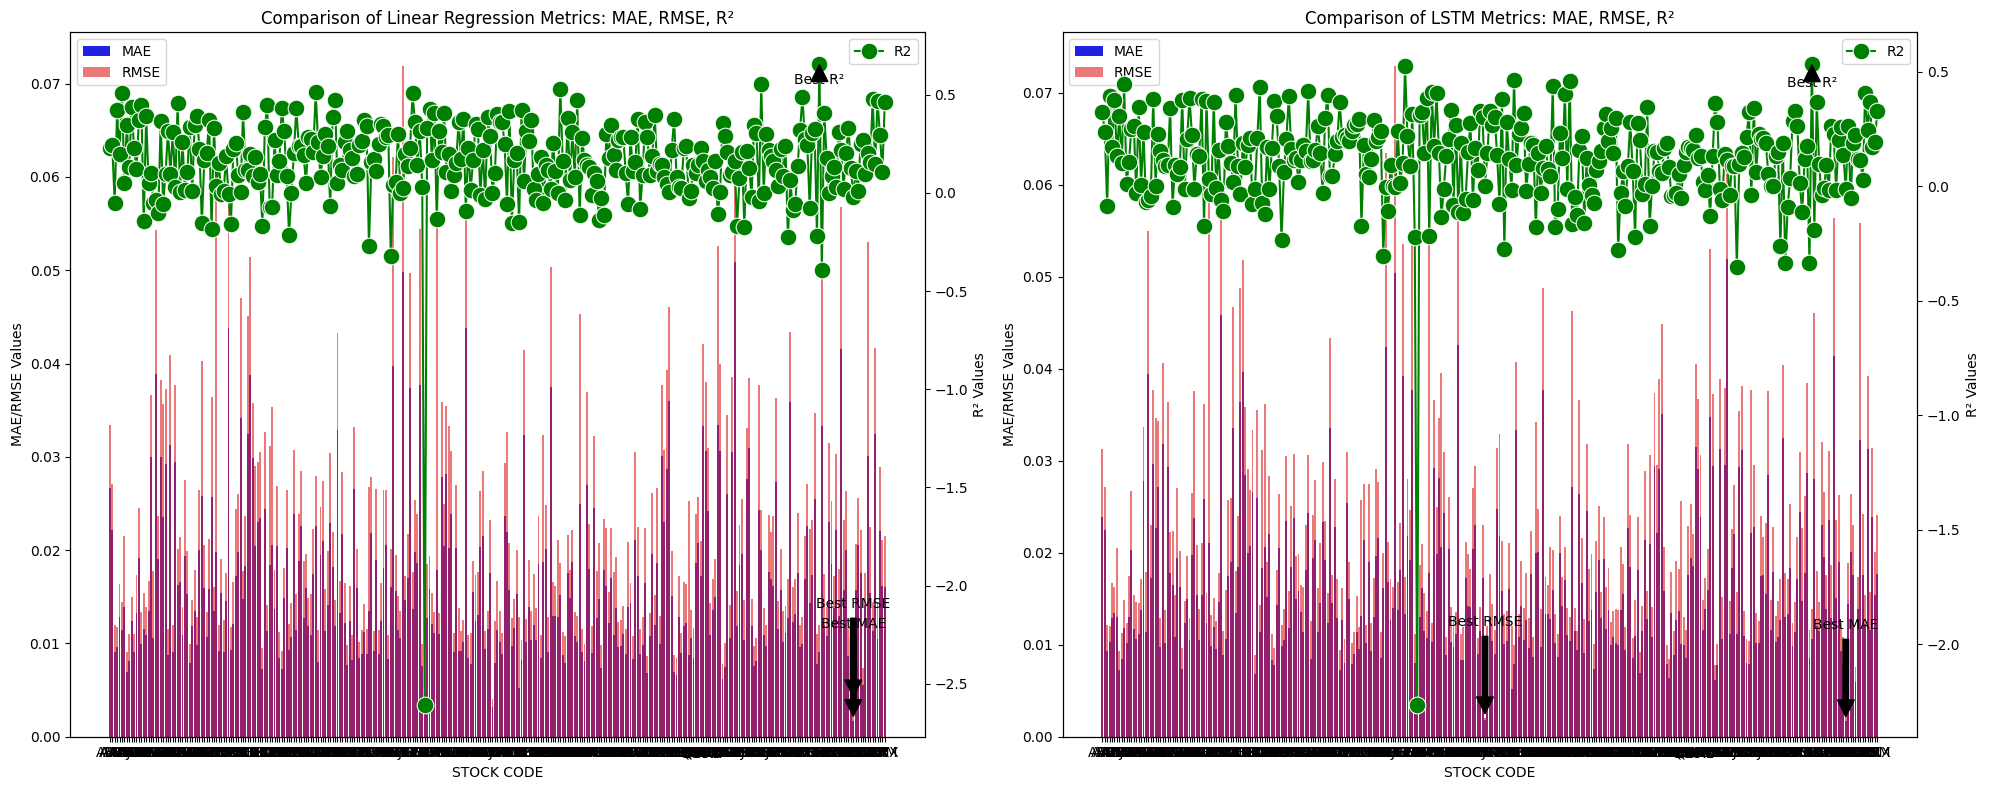

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(20, 8))  # Two plots side by side

# Regression Metrics Plot
sns.barplot(data=stocks_results, x='STOCK CODE', y='mae_reg', ax=ax[0], color='b', label='MAE')
sns.barplot(data=stocks_results, x='STOCK CODE', y='rmse_reg', ax=ax[0], color='r', alpha=0.6, label='RMSE')
ax0_twin = ax[0].twinx()
sns.lineplot(data=stocks_results, x='STOCK CODE', y='r2_reg', ax=ax0_twin, color='g', marker='o', label='R2', markersize=12)
ax[0].set_title('Comparison of Linear Regression Metrics: MAE, RMSE, R²')
ax[0].set_ylabel('MAE/RMSE Values')
ax0_twin.set_ylabel('R² Values')
ax[0].legend(loc='upper left')
ax0_twin.legend(loc='upper right')

# LSTM Metrics Plot
sns.barplot(data=stocks_results, x='STOCK CODE', y='mae_lstm', ax=ax[1], color='b', label='MAE')
sns.barplot(data=stocks_results, x='STOCK CODE', y='rmse_lstm', ax=ax[1], color='r', alpha=0.6, label='RMSE')
ax1_twin = ax[1].twinx()
sns.lineplot(data=stocks_results, x='STOCK CODE', y='r2_lstm', ax=ax1_twin, color='g', marker='o', label='R2', markersize=12)
ax[1].set_title('Comparison of LSTM Metrics: MAE, RMSE, R²')
ax[1].set_ylabel('MAE/RMSE Values')
ax1_twin.set_ylabel('R² Values')
ax[1].legend(loc='upper left')
ax1_twin.legend(loc='upper right')
#Identifying best metrics for Regression
best_mae_reg_index = stocks_results['mae_reg'].idxmin()
best_rmse_reg_index = stocks_results['rmse_reg'].idxmin()
best_r2_reg_index = stocks_results['r2_reg'].idxmax()

# Identifying best metrics for LSTM
best_mae_lstm_index = stocks_results['mae_lstm'].idxmin()
best_rmse_lstm_index = stocks_results['rmse_lstm'].idxmin()
best_r2_lstm_index = stocks_results['r2_lstm'].idxmax()

# Annotations
ax[0].annotate('Best MAE', xy=(best_mae_reg_index, stocks_results['mae_reg'].min()), xytext=(best_mae_reg_index, stocks_results['mae_reg'].min() + 0.01),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
ax[0].annotate('Best RMSE', xy=(best_rmse_reg_index, stocks_results['rmse_reg'].min()), xytext=(best_rmse_reg_index, stocks_results['rmse_reg'].min() + 0.01),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
ax0_twin.annotate('Best R²', xy=(best_r2_reg_index, stocks_results['r2_reg'].max()), xytext=(best_r2_reg_index, stocks_results['r2_reg'].max() - 0.1),
                  arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')

ax[1].annotate('Best MAE', xy=(best_mae_lstm_index, stocks_results['mae_lstm'].min()), xytext=(best_mae_lstm_index, stocks_results['mae_lstm'].min() + 0.01),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
ax[1].annotate('Best RMSE', xy=(best_rmse_lstm_index, stocks_results['rmse_lstm'].min()), xytext=(best_rmse_lstm_index, stocks_results['rmse_lstm'].min() + 0.01),
               arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
ax1_twin.annotate('Best R²', xy=(best_r2_lstm_index, stocks_results['r2_lstm'].max()), xytext=(best_r2_lstm_index, stocks_results['r2_lstm'].max() - 0.1),
                  arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center')
plt.tight_layout()
plt.show()


The above plot shows the performance metrics for two different stock prediction models: a traditional regression model and an LSTM (Long Short-Term Memory) model. The stocks are evaluated based on Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²) values.

For the regression model, stock 'TT' (Trane Technologies PLC) shows the highest R² value of 65.41% of the variance in the stock's returns can be explained by the model. This suggests a strong predictive performance by the regression model for 'TT'.

Similarly, the LSTM model also performs best for stock 'TT' in terms of R², with a value of 0.5316. While this is lower than the regression model's R², it still accounts for over 53.16% of the variance, which is quite significant, indicating that the LSTM model captures a substantial amount of the underlying patterns in the data for 'TT'.

For the MAE metric, stock 'WEL' (Integrated Wellness Acquisition Corp) stands out in both models, with the regression model achieving an MAE of 0.001704 and the LSTM model a slightly better MAE of 0.001697. These low MAE values imply that both models are making very small errors on average when predicting the stock returns for 'WEL', which is exemplary.

In the context of RMSE, stock 'WEL' is again the best performer for the regression model with a value of 0.003802, suggesting that the regression model, on average, makes small errors which are not very spread out. However, the LSTM model's best performance for RMSE is on stock 'IMYSF' (Imerys SA), with an even lower value of 0.002024. This indicates that the LSTM model's predictions for 'IMYSF' are not only close on average to the actual values but also consistent, with less variability in the prediction errors.


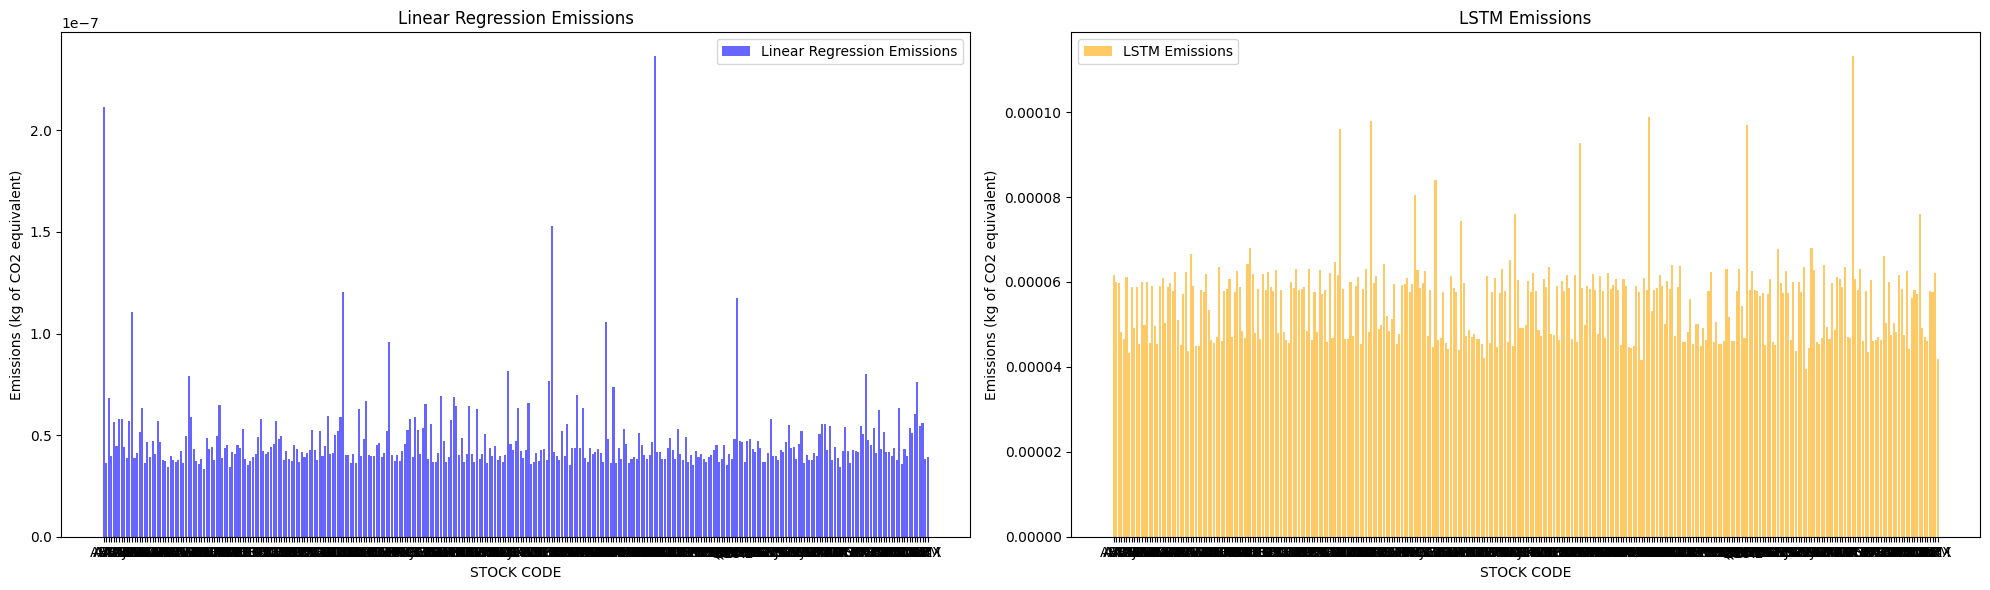

In [39]:
# Set up the plotting area
fig, ax = plt.subplots(1, 2, figsize=(20, 6))  # One row, two columns

# Plot for Linear Regression Emissions
ax[0].bar(stocks_results['STOCK CODE'], stocks_results['Linear_Reg_Emissions'], color='blue', label='Linear Regression Emissions', alpha=0.6)
ax[0].set_title('Linear Regression Emissions')
ax[0].set_ylabel('Emissions (kg of CO2 equivalent)')
ax[0].set_xlabel('STOCK CODE')
ax[0].legend()

# Plot for LSTM Emissions
ax[1].bar(stocks_results['STOCK CODE'], stocks_results['LSTM_Emissions'], color='orange', label='LSTM Emissions', alpha=0.6)
ax[1].set_title('LSTM Emissions')
ax[1].set_ylabel('Emissions (kg of CO2 equivalent)')
ax[1].set_xlabel('STOCK CODE')
ax[1].legend()

# Automatically adjust subplot params for better layout
plt.tight_layout()
plt.show()

The side-by-side comparison of model emissionsdistinctly showcases the carbon footprint of two different computational models used for stock performance prediction: Linear Regression and LSTM. It reveals a stark contrast in the scale of emissions between the two models. Linear Regression emissions, displayed on the left, are several magnitudes smaller than those of the LSTM model. This indicates that despite the apparent lower variability in the LSTM's emissions, the overall environmental impact of the LSTM model is substantially higher compared to the Linear Regression model.

Considering the performance metrics and carbon emissions data, we have decided to concentrate on the linear regression models for the stocks of TT and WEL. These serve as exemplary cases for in-depth analysis to derive investment insights, showcasing a balance between predictive accuracy and environmental sustainability.

In [53]:

import statsmodels.api as sm

# Filter the dataset for TT and WEL stocks
returns_tt = returns[returns['STOCK CODE'] == 'TT']
returns_wel = returns[returns['STOCK CODE'] == 'WEL']

# Function to fit the model, calculate metrics, emissions, and get summary
def analyze_stock(df, features, target):
    # Split the data into training and testing sets
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Adding constant term for statsmodels OLS
    X_train_scaled = sm.add_constant(X_train_scaled)
    X_test_scaled = sm.add_constant(X_test_scaled)

    # Start emissions tracking
    tracker = EmissionsTracker()
    tracker.start()

    # Fit the OLS model with statsmodels, not scikit-learn
    model = sm.OLS(y_train, X_train_scaled).fit()

    # Make predictions using the testing set
    y_pred = model.predict(X_test_scaled)

    # Stop emissions tracking
    emissions = tracker.stop()

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    return model.summary(), mae, rmse, r2, emissions

# Analyze TT stock
summary_tt, mae_tt, rmse_tt, r2_tt, emissions_tt = analyze_stock(returns_tt, features, target)
print(f"TT Analysis - MAE: {mae_tt}, RMSE: {rmse_tt}, R2: {r2_tt}, Emissions: {emissions_tt}\n")

# Analyze WEL stock
summary_wel, mae_wel, rmse_wel, r2_wel, emissions_wel = analyze_stock(returns_wel, features, target)
print(f"WEL Analysis - MAE: {mae_wel}, RMSE: {rmse_wel}, R2: {r2_wel}, Emissions: {emissions_wel}\n")


[codecarbon INFO @ 02:19:31] [setup] RAM Tracking...
[codecarbon INFO @ 02:19:31] [setup] GPU Tracking...
[codecarbon INFO @ 02:19:31] No GPU found.
[codecarbon INFO @ 02:19:31] [setup] CPU Tracking...
[codecarbon WARNING @ 02:19:31] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 02:19:31] Energy consumed for RAM : 0.000673 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 02:19:31] Energy consumed for all CPUs : 0.006021 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:31] 0.006694 kWh of electricity used since the beginning.
[codecarbon INFO @ 02:19:32] Energy consumed for RAM : 0.000634 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 02:19:32] Energy consumed for all CPUs : 0.005666 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:32] 0.006300 kWh of electricity used since the beginning.
[codecarbon WARNING @ 02:19:33] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbo

TT Analysis - MAE: 0.009134522785203748, RMSE: 0.011922404221546154, R2: 0.6543574056402321, Emissions: 5.2602980090278e-08



[codecarbon WARNING @ 02:19:35] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 02:19:35] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 02:19:35] >>> Tracker's metadata:
[codecarbon INFO @ 02:19:35]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 02:19:35]   Python version: 3.10.12
[codecarbon INFO @ 02:19:35]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 02:19:35]   Available RAM : 12.675 GB
[codecarbon INFO @ 02:19:35]   CPU count: 2
[codecarbon INFO @ 02:19:35]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 02:19:35]   GPU count: None
[codecarbon INFO @ 02:19:35]   GPU model: None
[codecarbon INFO @ 02:19:35] Energy consumed for RAM : 0.000000 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 02:19:35] Energy consumed for all CPUs : 0.000000 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 02:19:35] 0.000000 kWh of electricity

WEL Analysis - MAE: 0.0017044916476660749, RMSE: 0.0038019821403469187, R2: -0.019587156374219372, Emissions: 1.9526997656026388e-08



In [52]:
print(summary_tt)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     31.11
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           6.82e-25
Time:                        02:18:54   Log-Likelihood:                 416.62
No. Observations:                 137   AIC:                            -817.2
Df Residuals:                     129   BIC:                            -793.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0046      0.013      0.362      0.7

In [54]:
print(summary_wel)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7653
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.649
Time:                        02:19:35   Log-Likelihood:                 973.15
No. Observations:                 190   AIC:                            -1926.
Df Residuals:                     180   BIC:                            -1894.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.336      0.1

Analyzing the OLS regression results for TT and WEL stocks, we can draw some conclusions about the relationship between climate data and stock returns.

For the TT stock:
- The model has an R-squared of 0.628, suggesting that approximately 62.8% of the variability in the stock's returns can be explained by the model, which is a reasonably good fit.
- The most significant variable is `x8` (which could correspond to `Rm-Rf` given the context provided), with a p-value near 0 and a positive coefficient. This indicates a strong positive relationship with the stock's returns, and as such, it's likely a crucial variable for predicting returns for TT.
- Other variables do not show statistical significance as their p-values are well above the typical alpha level of 0.05, suggesting that they do not have a meaningful impact on the stock's returns.

For the WEL stock:
- The model tells a different story with an R-squared of only 0.037. This indicates that the model explains very little of the variability in WEL's stock returns.
- None of the variables show statistical significance as their p-values are all above 0.05, with most of them being very high. This implies that there's no clear relationship between the observed climate variables and WEL's stock returns based on this model.

The summary notes for TT stock suggest potential multicollinearity issues, given the warning about the smallest eigenvalue. This could mean that the independent variables are not as independent as desired, potentially impacting the reliability of the coefficient estimates.

For WEL, the model's overall fit is not significant, with an F-statistic p-value of 0.649. This means that, as a whole, the variables do not provide a good model for predicting returns.

In [56]:

# Features and target
features = ['Rm-Rf']
target = 'Return'

# Normalize features
scaler = StandardScaler()
returns[features] = scaler.fit_transform(returns[features])


# Filter the dataset for TT and WEL stocks
returns_tt = returns[returns['STOCK CODE'] == 'TT']
returns_wel = returns[returns['STOCK CODE'] == 'WEL']

# Function to fit the model, calculate metrics, emissions, and get summary
def analyze_stock(df, features, target):
    # Split the data into training and testing sets
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Adding constant term for statsmodels OLS
    X_train_scaled = sm.add_constant(X_train_scaled)
    X_test_scaled = sm.add_constant(X_test_scaled)

    # Start emissions tracking
    tracker = EmissionsTracker()
    tracker.start()

    # Fit the OLS model with statsmodels, not scikit-learn
    model = sm.OLS(y_train, X_train_scaled).fit()

    # Make predictions using the testing set
    y_pred = model.predict(X_test_scaled)

    # Stop emissions tracking
    emissions = tracker.stop()

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    return model.summary(), mae, rmse, r2, emissions

# Analyze TT stock
summary_tt, mae_tt, rmse_tt, r2_tt, emissions_tt = analyze_stock(returns_tt, features, target)
print(f"TT Analysis - MAE: {mae_tt}, RMSE: {rmse_tt}, R2: {r2_tt}, Emissions: {emissions_tt}\n")

# Analyze WEL stock
summary_wel, mae_wel, rmse_wel, r2_wel, emissions_wel = analyze_stock(returns_wel, features, target)
print(f"WEL Analysis - MAE: {mae_wel}, RMSE: {rmse_wel}, R2: {r2_wel}, Emissions: {emissions_wel}\n")


[codecarbon INFO @ 04:12:49] [setup] RAM Tracking...
[codecarbon INFO @ 04:12:49] [setup] GPU Tracking...
[codecarbon INFO @ 04:12:49] No GPU found.
[codecarbon INFO @ 04:12:49] [setup] CPU Tracking...
[codecarbon WARNING @ 04:12:49] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 04:12:50] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:12:50] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 04:12:50] >>> Tracker's metadata:
[codecarbon INFO @ 04:12:50]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:12:50]   Python version: 3.10.12
[codecarbon INFO @ 04:12:50]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 04:12:50]   Available RAM : 12.675 GB
[codecarbon INFO @ 04:12:50]   CPU count: 2
[codecarbon INFO @ 04:12:50]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 04:12:50]   GPU count: None
[codec

TT Analysis - MAE: 0.009249809484459135, RMSE: 0.011863523359588518, R2: 0.6577630070983562, Emissions: 7.105314685379117e-08



[codecarbon INFO @ 04:12:52] Energy consumed for RAM : 0.009681 kWh. RAM Power : 4.753046035766602 W
[codecarbon INFO @ 04:12:52] Energy consumed for all CPUs : 0.086583 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 04:12:52] 0.096264 kWh of electricity used since the beginning.
[codecarbon WARNING @ 04:12:53] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 04:12:53] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 04:12:53] >>> Tracker's metadata:
[codecarbon INFO @ 04:12:53]   Platform system: Linux-6.1.58+-x86_64-with-glibc2.35
[codecarbon INFO @ 04:12:53]   Python version: 3.10.12
[codecarbon INFO @ 04:12:53]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 04:12:53]   Available RAM : 12.675 GB
[codecarbon INFO @ 04:12:53]   CPU count: 2
[codecarbon INFO @ 04:12:53]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 04:12:53]   GPU count: None
[codecarbon INFO @ 0

WEL Analysis - MAE: 0.001652170404155446, RMSE: 0.003768495687036961, R2: -0.0017059566107811008, Emissions: 5.676392575499129e-08



In [58]:
print(summary_tt)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     215.7
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           9.07e-30
Time:                        04:13:18   Log-Likelihood:                 414.26
No. Observations:                 137   AIC:                            -824.5
Df Residuals:                     135   BIC:                            -818.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.189      0.8

In [59]:
print(summary_wel)

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.663
Date:                Thu, 25 Apr 2024   Prob (F-statistic):              0.199
Time:                        04:13:19   Log-Likelihood:                 970.41
No. Observations:                 190   AIC:                            -1937.
Df Residuals:                     188   BIC:                            -1930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.346      0.1

## Discussion and Limitations

### Discussion

The analysis reveals a minimal correlation between daily climate variables—such as temperature, precipitation, snow, wind speed, and pressure—and the stock performance of the analyzed companies, TT and WEL. Despite the high correlation between temperature variables, which is to be expected, our findings suggest that short-term climate fluctuations have a negligible impact on stock prices and returns. The correlation matrix and additional tests confirm that these environmental factors do not significantly influence daily stock movements.

Furthermore, the facility count's slight correlation with temperature does not extend to significant impacts on stock metrics, indicating that operational scale does not directly correlate with daily stock performance. This observation suggests that the company's stock fluctuations are largely independent of the immediate climate conditions captured in this dataset.

Interestingly, the analysis also highlights a nuanced relationship between emissions and financial returns. The positive correlation between emissions (both total and per facility) and annual returns indicates that higher emissions are not necessarily detrimental to the company's short-term profitability. This could suggest that larger, more productive facilities contribute to greater financial returns, potentially due to increased efficiency or output, despite their higher emissions footprint.

The direct correlation between facility count and total emissions is evident; however, it does not show a negative correlation with financial returns. This finding challenges the notion that environmental impact is synonymous with financial detriment, at least in the short term. It suggests that current financial success is not immediately compromised by higher emission levels, potentially influenced by operational scale, favorable market conditions, or regulatory frameworks.

### Limitations

Our study faces several limitations:

* Dummy Variables for Weather: We utilized dummy variables to define severe weather conditions. However, these variables did not significantly improve the predictive performance of stock returns compared to the raw climate data. This may be due to suboptimal threshold settings for defining severe weather.
* Weighting of Emissions: While calculating total annual carbon emissions for factories, we applied a weighting based on the company's ownership proportion. However, similar weighting was not applied when calculating the average climate data for the company's facilities, possibly skewing the impact assessment of localized climate effects.
Model Selection: We employed linear regression and LSTM models.
* Including a broader range of models could potentially enhance the predictive accuracy and robustness of our findings. The Capital Asset Pricing Model (CAPM), while foundational in finance, showed limited prediction efficiency in this context, particularly when expanded to include only market variables.
* Financial Metrics: The use of MAE, RMSE, and R² as model metrics, while statistically relevant, may not fully capture the application potential of the models in the stock market. Including financial-specific measures such as annualized return rates based on predictions could provide more actionable insights for investors.

### Future Work

For further analysis, exploring a more refined set of climate and weather-related variables, perhaps with better-defined severe weather thresholds, could elucidate hidden impacts on stock performance. Additionally, expanding the range of financial and predictive models and integrating more comprehensive financial metrics would likely yield insights that are more applicable to real-world investment decisions. This would pave the way for a deeper strategic reflection on long-term sustainability and economic resilience within the evolving market landscape.

## Conclusion

Our project set out to explore the potential links between factory carbon emissions data reported through the GHGRP in 2022 and the financial performance of parent companies listed on the U.S. stock market. This endeavor involved a detailed examination of how emissions data correlates with stock prices and return rates, aiming to uncover actionable insights that could guide investment and operational strategies.

Through rigorous data processing and statistical analysis, we established that while it is not possible to predict the stock returns of parent companies directly from factory-level climate data alone, we did identify meaningful correlations in other areas. Notably, we observed a slight positive correlation between total carbon emissions from facilities and the annual returns of the parent companies. This suggests that higher emissions, which often coincide with higher production levels, might not adversely affect profitability in the short term. Instead, they may reflect larger, more productive operations that contribute positively to financial returns.

However, the direct prediction of stock returns based on facility-level climate data proved challenging, indicating the complexity of financial markets and the multitude of factors that influence stock performance. Our findings challenge the simplistic notion that environmental impact is directly detrimental to financial performance, instead suggesting a more complex interaction that could vary significantly across different industries and companies.

Our study opens numerous avenues for future research that could further elucidate the complex interplay between environmental practices and financial performance. Expanding the timeframe of the data would allow for an assessment of whether the short-term correlations we observed persist over extended periods and under different economic conditions, providing a clearer picture of the enduring effects of sustainability on corporate profitability. Integrating a broader array of environmental, operational, and financial metrics could offer a more holistic view of how sustainability efforts influence corporate profitability. Future analyses could include variables such as energy efficiency, waste management, and the adoption of renewable energy, which might shed light on the multifaceted benefits of these practices.

The application of more sophisticated models, particularly those incorporating machine learning techniques, could uncover complex, non-linear relationships and interactions between variables that traditional statistical methods might fail to capture. These advanced models have the potential to provide deeper insights into the data, revealing patterns and trends that could inform more effective corporate strategies. It is also vital for future research to consider the evolving regulatory landscape concerning environmental reporting and carbon emissions. Understanding how regulatory changes influence corporate strategies and financial outcomes will be increasingly important as governments and international bodies implement stricter environmental policies.

In conclusion, while our project indicates that factory-level carbon emissions do not directly predict stock performance, the correlations we have found with annual returns are significant enough to merit further investigation. As the focus on sustainability continues to grow among companies and regulators, the insights from this and subsequent analyses will become crucial in developing business strategies that align environmental stewardship with financial success. Continued research in this area is essential, not only to refine these insights but also to enhance our understanding of the sustainable practices that could underpin future economic resilience and profitability.

## Carbon cost


In [61]:
# Convert emissions to the same unit if necessary, here assuming all need to be in kg of CO2 equivalent
stocks_emissions['Total_Emissions'] = stocks_emissions['Linear_Reg_Emissions'] + stocks_emissions['LSTM_Emissions']

# Calculate the sum of emissions for all stocks
total_linear_emissions = stocks_emissions['Linear_Reg_Emissions'].sum()
total_lstm_emissions = stocks_emissions['LSTM_Emissions'].sum()
total_emissions = stocks_emissions['Total_Emissions'].sum()
print("Total Linear Regression Emissions: {:.8f} kg CO2 equivalent".format(total_linear_emissions))
print("Total LSTM Emissions: {:.8f} kg CO2 equivalent".format(total_lstm_emissions))
print("Total Emissions from all models: {:.8f} kg CO2 equivalent".format(total_emissions))


Total Linear Regression Emissions: 0.00001523 kg CO2 equivalent
Total LSTM Emissions: 0.01783446 kg CO2 equivalent
Total Emissions from all models: 0.01784968 kg CO2 equivalent


## References




*   Fama, E. F., & French, K. R. (1992). The Cross-Section of Expected Stock Returns. Journal of Finance, 47(2), 427-465.
*   Fama, E. F., & French, K. R. (1993). Common risk factors in the returns on stocks and bonds. Journal of Financial Economics, 33(1), 3-56.
*   Carhart, M. M. (1997). On Persistence in Mutual Fund Performance. The Journal of Finance, 52(1), 57-82.


